In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle
from library import utils, config, cascades

In [3]:
with open('./results/nopricechange/7-9/traderIDs_200_7200_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

In [4]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_200_7200_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_200_7200_100_2_5.npy")
TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_200_7200_100_2_5.csv")

In [5]:
TtotalOrdersNPC

Unnamed: 0  time portfolio  stock  order
0                1   993     wesyg     92   -2.0
1                3   993     wesyg     94    1.0
2                1   993     vdqtz     89   -1.0
3                2   993     vdqtz     90    1.0
4                3   993     vdqtz     91   -2.0
...            ...   ...       ...    ...    ...
638535           1  8192     ypwom     86   -7.0
638536           2  8192     ypwom     47    2.0
638537           0  8192     nqtpu     43   -2.0
638538           1  8192     nqtpu     57    1.0
638539           3  8192     nqtpu     62    3.0

[638540 rows x 5 columns]

In [6]:
type(TtotalOrdersNPC)

cudf.core.dataframe.DataFrame

# minSep = 1

In [25]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192,1)

TypeError: where() missing 1 required positional argument: 'cond'

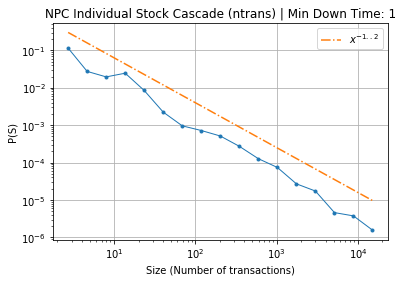

In [12]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_2_5_minSep1_.png", dpi=250)
plt.show()
plt.close()

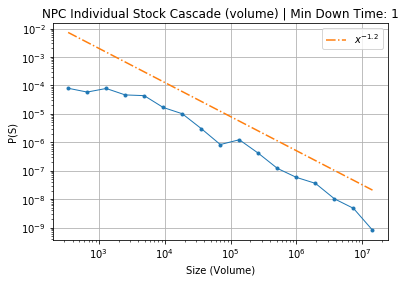

In [13]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_2_5_minSep1_.png", dpi=250)
plt.show()
plt.close()

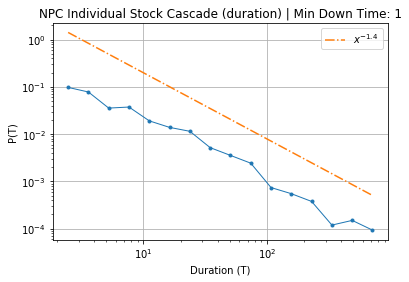

In [14]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_2_5_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [15]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 2)

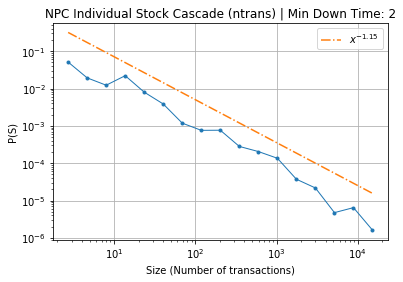

In [16]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_2_5_minSep2_.png", dpi=250)
plt.show()
plt.close()

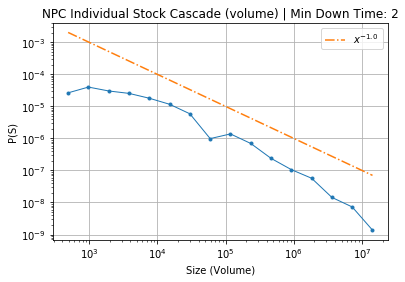

In [17]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_2_5_minSep2_.png", dpi=250)
plt.show()
plt.close()

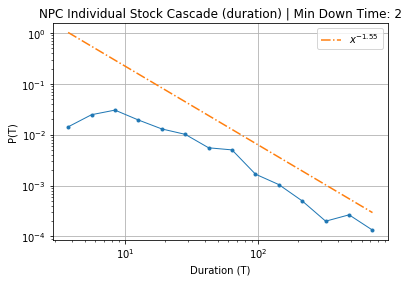

In [18]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_2_5_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [19]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 5)

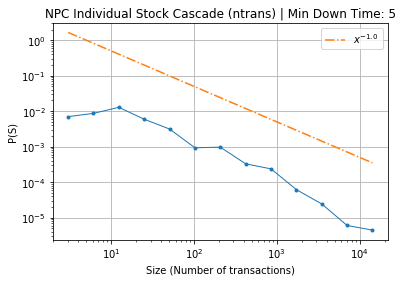

In [20]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_2_5_minSep5_.png", dpi=250)
plt.show()
plt.close()

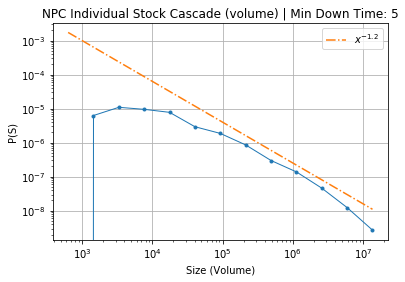

In [21]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_2_5_minSep5_.png", dpi=250)
plt.show()
plt.close()

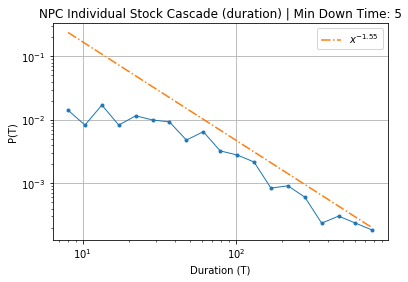

In [22]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_2_5_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [23]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 10)

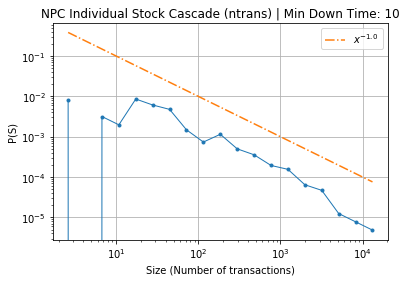

In [24]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_2_5_minSep10_.png", dpi=250)
plt.show()
plt.close()

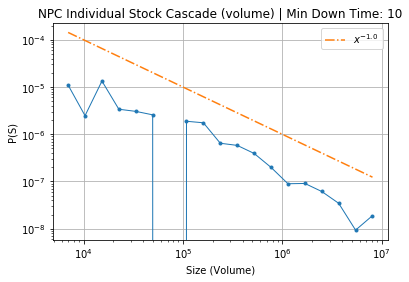

In [25]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_2_5_minSep10_.png", dpi=250)
plt.show()
plt.close()

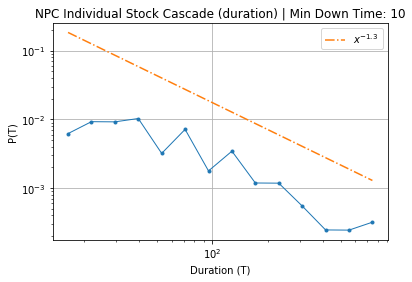

In [26]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_2_5_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [7]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    TtotalOrders = TtotalOrdersNPC
    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [8]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades22_npc_200_7200_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  638540
Cascade length:  498
New Orders left:  638042
making new cascade


OG Orders left:  638042
Cascade length:  432
New Orders left:  637610
making new cascade


OG Orders left:  637610
Cascade length:  682
New Orders left:  636928
making new cascade


OG Orders left:  636928
Cascade length:  589
New Orders left:  636339
making new cascade


OG Orders left:  636339
Cascade length:  709
New Orders left:  635630
making new cascade


OG Orders left:  635630
Cascade length:  200
New Orders left:  635430
making new cascade


OG Orders left:  635430
Cascade length:  1
New Orders left:  635429
making new cascade


OG Orders left:  635429
Cascade length:  474
New Orders left:  634955
making new cascade


OG Orders left:  634955
Cascade length:  2
New Orders left:  634953
making new cascade


OG Orders left:  634953
Cascade length:  4
New Orders left:  634949
making new cascade


OG Orders left:  634949
Cascade length:  3
New Orders left:  634946
making new cascade


OG Orde

Cascade length:  2
New Orders left:  622122
making new cascade


OG Orders left:  622122
Cascade length:  77
New Orders left:  622045
making new cascade


OG Orders left:  622045
Cascade length:  193
New Orders left:  621852
making new cascade


OG Orders left:  621852
Cascade length:  34
New Orders left:  621818
making new cascade


OG Orders left:  621818
Cascade length:  544
New Orders left:  621274
making new cascade


OG Orders left:  621274
Cascade length:  26
New Orders left:  621248
making new cascade


OG Orders left:  621248
Cascade length:  4
New Orders left:  621244
making new cascade


OG Orders left:  621244
Cascade length:  85
New Orders left:  621159
making new cascade


OG Orders left:  621159
Cascade length:  521
New Orders left:  620638
making new cascade


OG Orders left:  620638
Cascade length:  1
New Orders left:  620637
making new cascade


OG Orders left:  620637
Cascade length:  23
New Orders left:  620614
making new cascade


OG Orders left:  620614
Cascade le

Cascade length:  110
New Orders left:  611678
making new cascade


OG Orders left:  611678
Cascade length:  164
New Orders left:  611514
making new cascade


OG Orders left:  611514
Cascade length:  2
New Orders left:  611512
making new cascade


OG Orders left:  611512
Cascade length:  210
New Orders left:  611302
making new cascade


OG Orders left:  611302
Cascade length:  10
New Orders left:  611292
making new cascade


OG Orders left:  611292
Cascade length:  10
New Orders left:  611282
making new cascade


OG Orders left:  611282
Cascade length:  16
New Orders left:  611266
making new cascade


OG Orders left:  611266
Cascade length:  149
New Orders left:  611117
making new cascade


OG Orders left:  611117
Cascade length:  26
New Orders left:  611091
making new cascade


OG Orders left:  611091
Cascade length:  5
New Orders left:  611086
making new cascade


OG Orders left:  611086
Cascade length:  43
New Orders left:  611043
making new cascade


OG Orders left:  611043
Cascade 

Cascade length:  194
New Orders left:  602985
making new cascade


OG Orders left:  602985
Cascade length:  59
New Orders left:  602926
making new cascade


OG Orders left:  602926
Cascade length:  30
New Orders left:  602896
making new cascade


OG Orders left:  602896
Cascade length:  49
New Orders left:  602847
making new cascade


OG Orders left:  602847
Cascade length:  7
New Orders left:  602840
making new cascade


OG Orders left:  602840
Cascade length:  197
New Orders left:  602643
making new cascade


OG Orders left:  602643
Cascade length:  30
New Orders left:  602613
making new cascade


OG Orders left:  602613
Cascade length:  335
New Orders left:  602278
making new cascade


OG Orders left:  602278
Cascade length:  93
New Orders left:  602185
making new cascade


OG Orders left:  602185
Cascade length:  95
New Orders left:  602090
making new cascade


OG Orders left:  602090
Cascade length:  31
New Orders left:  602059
making new cascade


OG Orders left:  602059
Cascade 

Cascade length:  29
New Orders left:  596572
making new cascade


OG Orders left:  596572
Cascade length:  125
New Orders left:  596447
making new cascade


OG Orders left:  596447
Cascade length:  11
New Orders left:  596436
making new cascade


OG Orders left:  596436
Cascade length:  30
New Orders left:  596406
making new cascade


OG Orders left:  596406
Cascade length:  2
New Orders left:  596404
making new cascade


OG Orders left:  596404
Cascade length:  124
New Orders left:  596280
making new cascade


OG Orders left:  596280
Cascade length:  84
New Orders left:  596196
making new cascade


OG Orders left:  596196
Cascade length:  280
New Orders left:  595916
making new cascade


OG Orders left:  595916
Cascade length:  45
New Orders left:  595871
making new cascade


OG Orders left:  595871
Cascade length:  66
New Orders left:  595805
making new cascade


OG Orders left:  595805
Cascade length:  51
New Orders left:  595754
making new cascade


OG Orders left:  595754
Cascade 

Cascade length:  8
New Orders left:  590826
making new cascade


OG Orders left:  590826
Cascade length:  6
New Orders left:  590820
making new cascade


OG Orders left:  590820
Cascade length:  15
New Orders left:  590805
making new cascade


OG Orders left:  590805
Cascade length:  43
New Orders left:  590762
making new cascade


OG Orders left:  590762
Cascade length:  10
New Orders left:  590752
making new cascade


OG Orders left:  590752
Cascade length:  11
New Orders left:  590741
making new cascade


OG Orders left:  590741
Cascade length:  58
New Orders left:  590683
making new cascade


OG Orders left:  590683
Cascade length:  57
New Orders left:  590626
making new cascade


OG Orders left:  590626
Cascade length:  279
New Orders left:  590347
making new cascade


OG Orders left:  590347
Cascade length:  100
New Orders left:  590247
making new cascade


OG Orders left:  590247
Cascade length:  2
New Orders left:  590245
making new cascade


OG Orders left:  590245
Cascade len

Cascade length:  73
New Orders left:  584073
making new cascade


OG Orders left:  584073
Cascade length:  2
New Orders left:  584071
making new cascade


OG Orders left:  584071
Cascade length:  119
New Orders left:  583952
making new cascade


OG Orders left:  583952
Cascade length:  26
New Orders left:  583926
making new cascade


OG Orders left:  583926
Cascade length:  259
New Orders left:  583667
making new cascade


OG Orders left:  583667
Cascade length:  155
New Orders left:  583512
making new cascade


OG Orders left:  583512
Cascade length:  111
New Orders left:  583401
making new cascade


OG Orders left:  583401
Cascade length:  2
New Orders left:  583399
making new cascade


OG Orders left:  583399
Cascade length:  88
New Orders left:  583311
making new cascade


OG Orders left:  583311
Cascade length:  10
New Orders left:  583301
making new cascade


OG Orders left:  583301
Cascade length:  98
New Orders left:  583203
making new cascade


OG Orders left:  583203
Cascade 

Cascade length:  122
New Orders left:  577057
making new cascade


OG Orders left:  577057
Cascade length:  182
New Orders left:  576875
making new cascade


OG Orders left:  576875
Cascade length:  14
New Orders left:  576861
making new cascade


OG Orders left:  576861
Cascade length:  57
New Orders left:  576804
making new cascade


OG Orders left:  576804
Cascade length:  3
New Orders left:  576801
making new cascade


OG Orders left:  576801
Cascade length:  248
New Orders left:  576553
making new cascade


OG Orders left:  576553
Cascade length:  89
New Orders left:  576464
making new cascade


OG Orders left:  576464
Cascade length:  74
New Orders left:  576390
making new cascade


OG Orders left:  576390
Cascade length:  77
New Orders left:  576313
making new cascade


OG Orders left:  576313
Cascade length:  15
New Orders left:  576298
making new cascade


OG Orders left:  576298
Cascade length:  2
New Orders left:  576296
making new cascade


OG Orders left:  576296
Cascade l

Cascade length:  16
New Orders left:  569303
making new cascade


OG Orders left:  569303
Cascade length:  2
New Orders left:  569301
making new cascade


OG Orders left:  569301
Cascade length:  434
New Orders left:  568867
making new cascade


OG Orders left:  568867
Cascade length:  32
New Orders left:  568835
making new cascade


OG Orders left:  568835
Cascade length:  24
New Orders left:  568811
making new cascade


OG Orders left:  568811
Cascade length:  117
New Orders left:  568694
making new cascade


OG Orders left:  568694
Cascade length:  36
New Orders left:  568658
making new cascade


OG Orders left:  568658
Cascade length:  14
New Orders left:  568644
making new cascade


OG Orders left:  568644
Cascade length:  133
New Orders left:  568511
making new cascade


OG Orders left:  568511
Cascade length:  2
New Orders left:  568509
making new cascade


OG Orders left:  568509
Cascade length:  287
New Orders left:  568222
making new cascade


OG Orders left:  568222
Cascade 

Cascade length:  65
New Orders left:  562544
making new cascade


OG Orders left:  562544
Cascade length:  2
New Orders left:  562542
making new cascade


OG Orders left:  562542
Cascade length:  153
New Orders left:  562389
making new cascade


OG Orders left:  562389
Cascade length:  91
New Orders left:  562298
making new cascade


OG Orders left:  562298
Cascade length:  221
New Orders left:  562077
making new cascade


OG Orders left:  562077
Cascade length:  149
New Orders left:  561928
making new cascade


OG Orders left:  561928
Cascade length:  1
New Orders left:  561927
making new cascade


OG Orders left:  561927
Cascade length:  101
New Orders left:  561826
making new cascade


OG Orders left:  561826
Cascade length:  4
New Orders left:  561822
making new cascade


OG Orders left:  561822
Cascade length:  2
New Orders left:  561820
making new cascade


OG Orders left:  561820
Cascade length:  108
New Orders left:  561712
making new cascade


OG Orders left:  561712
Cascade l

Cascade length:  22
New Orders left:  555772
making new cascade


OG Orders left:  555772
Cascade length:  49
New Orders left:  555723
making new cascade


OG Orders left:  555723
Cascade length:  26
New Orders left:  555697
making new cascade


OG Orders left:  555697
Cascade length:  1
New Orders left:  555696
making new cascade


OG Orders left:  555696
Cascade length:  48
New Orders left:  555648
making new cascade


OG Orders left:  555648
Cascade length:  24
New Orders left:  555624
making new cascade


OG Orders left:  555624
Cascade length:  1
New Orders left:  555623
making new cascade


OG Orders left:  555623
Cascade length:  11
New Orders left:  555612
making new cascade


OG Orders left:  555612
Cascade length:  45
New Orders left:  555567
making new cascade


OG Orders left:  555567
Cascade length:  194
New Orders left:  555373
making new cascade


OG Orders left:  555373
Cascade length:  56
New Orders left:  555317
making new cascade


OG Orders left:  555317
Cascade len

Cascade length:  97
New Orders left:  549974
making new cascade


OG Orders left:  549974
Cascade length:  182
New Orders left:  549792
making new cascade


OG Orders left:  549792
Cascade length:  23
New Orders left:  549769
making new cascade


OG Orders left:  549769
Cascade length:  148
New Orders left:  549621
making new cascade


OG Orders left:  549621
Cascade length:  81
New Orders left:  549540
making new cascade


OG Orders left:  549540
Cascade length:  26
New Orders left:  549514
making new cascade


OG Orders left:  549514
Cascade length:  17
New Orders left:  549497
making new cascade


OG Orders left:  549497
Cascade length:  65
New Orders left:  549432
making new cascade


OG Orders left:  549432
Cascade length:  48
New Orders left:  549384
making new cascade


OG Orders left:  549384
Cascade length:  52
New Orders left:  549332
making new cascade


OG Orders left:  549332
Cascade length:  82
New Orders left:  549250
making new cascade


OG Orders left:  549250
Cascade 

Cascade length:  1
New Orders left:  543206
making new cascade


OG Orders left:  543206
Cascade length:  215
New Orders left:  542991
making new cascade


OG Orders left:  542991
Cascade length:  163
New Orders left:  542828
making new cascade


OG Orders left:  542828
Cascade length:  138
New Orders left:  542690
making new cascade


OG Orders left:  542690
Cascade length:  2
New Orders left:  542688
making new cascade


OG Orders left:  542688
Cascade length:  16
New Orders left:  542672
making new cascade


OG Orders left:  542672
Cascade length:  321
New Orders left:  542351
making new cascade


OG Orders left:  542351
Cascade length:  3
New Orders left:  542348
making new cascade


OG Orders left:  542348
Cascade length:  1
New Orders left:  542347
making new cascade


OG Orders left:  542347
Cascade length:  9
New Orders left:  542338
making new cascade


OG Orders left:  542338
Cascade length:  50
New Orders left:  542288
making new cascade


OG Orders left:  542288
Cascade len

Cascade length:  63
New Orders left:  535485
making new cascade


OG Orders left:  535485
Cascade length:  75
New Orders left:  535410
making new cascade


OG Orders left:  535410
Cascade length:  45
New Orders left:  535365
making new cascade


OG Orders left:  535365
Cascade length:  112
New Orders left:  535253
making new cascade


OG Orders left:  535253
Cascade length:  88
New Orders left:  535165
making new cascade


OG Orders left:  535165
Cascade length:  60
New Orders left:  535105
making new cascade


OG Orders left:  535105
Cascade length:  151
New Orders left:  534954
making new cascade


OG Orders left:  534954
Cascade length:  15
New Orders left:  534939
making new cascade


OG Orders left:  534939
Cascade length:  22
New Orders left:  534917
making new cascade


OG Orders left:  534917
Cascade length:  126
New Orders left:  534791
making new cascade


OG Orders left:  534791
Cascade length:  66
New Orders left:  534725
making new cascade


OG Orders left:  534725
Cascade

Cascade length:  2
New Orders left:  529050
making new cascade


OG Orders left:  529050
Cascade length:  1
New Orders left:  529049
making new cascade


OG Orders left:  529049
Cascade length:  96
New Orders left:  528953
making new cascade


OG Orders left:  528953
Cascade length:  23
New Orders left:  528930
making new cascade


OG Orders left:  528930
Cascade length:  8
New Orders left:  528922
making new cascade


OG Orders left:  528922
Cascade length:  394
New Orders left:  528528
making new cascade


OG Orders left:  528528
Cascade length:  29
New Orders left:  528499
making new cascade


OG Orders left:  528499
Cascade length:  8
New Orders left:  528491
making new cascade


OG Orders left:  528491
Cascade length:  46
New Orders left:  528445
making new cascade


OG Orders left:  528445
Cascade length:  6
New Orders left:  528439
making new cascade


OG Orders left:  528439
Cascade length:  4
New Orders left:  528435
making new cascade


OG Orders left:  528435
Cascade length:

Cascade length:  296
New Orders left:  520711
making new cascade


OG Orders left:  520711
Cascade length:  90
New Orders left:  520621
making new cascade


OG Orders left:  520621
Cascade length:  87
New Orders left:  520534
making new cascade


OG Orders left:  520534
Cascade length:  6
New Orders left:  520528
making new cascade


OG Orders left:  520528
Cascade length:  349
New Orders left:  520179
making new cascade


OG Orders left:  520179
Cascade length:  28
New Orders left:  520151
making new cascade


OG Orders left:  520151
Cascade length:  1
New Orders left:  520150
making new cascade


OG Orders left:  520150
Cascade length:  7
New Orders left:  520143
making new cascade


OG Orders left:  520143
Cascade length:  54
New Orders left:  520089
making new cascade


OG Orders left:  520089
Cascade length:  50
New Orders left:  520039
making new cascade


OG Orders left:  520039
Cascade length:  215
New Orders left:  519824
making new cascade


OG Orders left:  519824
Cascade le

Cascade length:  37
New Orders left:  513005
making new cascade


OG Orders left:  513005
Cascade length:  35
New Orders left:  512970
making new cascade


OG Orders left:  512970
Cascade length:  10
New Orders left:  512960
making new cascade


OG Orders left:  512960
Cascade length:  147
New Orders left:  512813
making new cascade


OG Orders left:  512813
Cascade length:  131
New Orders left:  512682
making new cascade


OG Orders left:  512682
Cascade length:  1
New Orders left:  512681
making new cascade


OG Orders left:  512681
Cascade length:  94
New Orders left:  512587
making new cascade


OG Orders left:  512587
Cascade length:  104
New Orders left:  512483
making new cascade


OG Orders left:  512483
Cascade length:  6
New Orders left:  512477
making new cascade


OG Orders left:  512477
Cascade length:  129
New Orders left:  512348
making new cascade


OG Orders left:  512348
Cascade length:  38
New Orders left:  512310
making new cascade


OG Orders left:  512310
Cascade 

Cascade length:  166
New Orders left:  504983
making new cascade


OG Orders left:  504983
Cascade length:  57
New Orders left:  504926
making new cascade


OG Orders left:  504926
Cascade length:  1
New Orders left:  504925
making new cascade


OG Orders left:  504925
Cascade length:  72
New Orders left:  504853
making new cascade


OG Orders left:  504853
Cascade length:  191
New Orders left:  504662
making new cascade


OG Orders left:  504662
Cascade length:  172
New Orders left:  504490
making new cascade


OG Orders left:  504490
Cascade length:  97
New Orders left:  504393
making new cascade


OG Orders left:  504393
Cascade length:  47
New Orders left:  504346
making new cascade


OG Orders left:  504346
Cascade length:  179
New Orders left:  504167
making new cascade


OG Orders left:  504167
Cascade length:  28
New Orders left:  504139
making new cascade


OG Orders left:  504139
Cascade length:  9
New Orders left:  504130
making new cascade


OG Orders left:  504130
Cascade 

Cascade length:  15
New Orders left:  497654
making new cascade


OG Orders left:  497654
Cascade length:  17
New Orders left:  497637
making new cascade


OG Orders left:  497637
Cascade length:  100
New Orders left:  497537
making new cascade


OG Orders left:  497537
Cascade length:  260
New Orders left:  497277
making new cascade


OG Orders left:  497277
Cascade length:  6
New Orders left:  497271
making new cascade


OG Orders left:  497271
Cascade length:  384
New Orders left:  496887
making new cascade


OG Orders left:  496887
Cascade length:  141
New Orders left:  496746
making new cascade


OG Orders left:  496746
Cascade length:  35
New Orders left:  496711
making new cascade


OG Orders left:  496711
Cascade length:  282
New Orders left:  496429
making new cascade


OG Orders left:  496429
Cascade length:  89
New Orders left:  496340
making new cascade


OG Orders left:  496340
Cascade length:  135
New Orders left:  496205
making new cascade


OG Orders left:  496205
Casca

Cascade length:  189
New Orders left:  489167
making new cascade


OG Orders left:  489167
Cascade length:  54
New Orders left:  489113
making new cascade


OG Orders left:  489113
Cascade length:  39
New Orders left:  489074
making new cascade


OG Orders left:  489074
Cascade length:  4
New Orders left:  489070
making new cascade


OG Orders left:  489070
Cascade length:  11
New Orders left:  489059
making new cascade


OG Orders left:  489059
Cascade length:  108
New Orders left:  488951
making new cascade


OG Orders left:  488951
Cascade length:  24
New Orders left:  488927
making new cascade


OG Orders left:  488927
Cascade length:  45
New Orders left:  488882
making new cascade


OG Orders left:  488882
Cascade length:  1
New Orders left:  488881
making new cascade


OG Orders left:  488881
Cascade length:  1
New Orders left:  488880
making new cascade


OG Orders left:  488880
Cascade length:  4
New Orders left:  488876
making new cascade


OG Orders left:  488876
Cascade leng

Cascade length:  12
New Orders left:  483346
making new cascade


OG Orders left:  483346
Cascade length:  30
New Orders left:  483316
making new cascade


OG Orders left:  483316
Cascade length:  62
New Orders left:  483254
making new cascade


OG Orders left:  483254
Cascade length:  69
New Orders left:  483185
making new cascade


OG Orders left:  483185
Cascade length:  11
New Orders left:  483174
making new cascade


OG Orders left:  483174
Cascade length:  11
New Orders left:  483163
making new cascade


OG Orders left:  483163
Cascade length:  52
New Orders left:  483111
making new cascade


OG Orders left:  483111
Cascade length:  36
New Orders left:  483075
making new cascade


OG Orders left:  483075
Cascade length:  15
New Orders left:  483060
making new cascade


OG Orders left:  483060
Cascade length:  67
New Orders left:  482993
making new cascade


OG Orders left:  482993
Cascade length:  54
New Orders left:  482939
making new cascade


OG Orders left:  482939
Cascade le

Cascade length:  243
New Orders left:  476407
making new cascade


OG Orders left:  476407
Cascade length:  22
New Orders left:  476385
making new cascade


OG Orders left:  476385
Cascade length:  16
New Orders left:  476369
making new cascade


OG Orders left:  476369
Cascade length:  6
New Orders left:  476363
making new cascade


OG Orders left:  476363
Cascade length:  25
New Orders left:  476338
making new cascade


OG Orders left:  476338
Cascade length:  64
New Orders left:  476274
making new cascade


OG Orders left:  476274
Cascade length:  164
New Orders left:  476110
making new cascade


OG Orders left:  476110
Cascade length:  21
New Orders left:  476089
making new cascade


OG Orders left:  476089
Cascade length:  3
New Orders left:  476086
making new cascade


OG Orders left:  476086
Cascade length:  25
New Orders left:  476061
making new cascade


OG Orders left:  476061
Cascade length:  136
New Orders left:  475925
making new cascade


OG Orders left:  475925
Cascade l

Cascade length:  4
New Orders left:  469575
making new cascade


OG Orders left:  469575
Cascade length:  26
New Orders left:  469549
making new cascade


OG Orders left:  469549
Cascade length:  8
New Orders left:  469541
making new cascade


OG Orders left:  469541
Cascade length:  2
New Orders left:  469539
making new cascade


OG Orders left:  469539
Cascade length:  255
New Orders left:  469284
making new cascade


OG Orders left:  469284
Cascade length:  33
New Orders left:  469251
making new cascade


OG Orders left:  469251
Cascade length:  44
New Orders left:  469207
making new cascade


OG Orders left:  469207
Cascade length:  212
New Orders left:  468995
making new cascade


OG Orders left:  468995
Cascade length:  105
New Orders left:  468890
making new cascade


OG Orders left:  468890
Cascade length:  234
New Orders left:  468656
making new cascade


OG Orders left:  468656
Cascade length:  2
New Orders left:  468654
making new cascade


OG Orders left:  468654
Cascade le

Cascade length:  165
New Orders left:  463317
making new cascade


OG Orders left:  463317
Cascade length:  199
New Orders left:  463118
making new cascade


OG Orders left:  463118
Cascade length:  156
New Orders left:  462962
making new cascade


OG Orders left:  462962
Cascade length:  29
New Orders left:  462933
making new cascade


OG Orders left:  462933
Cascade length:  369
New Orders left:  462564
making new cascade


OG Orders left:  462564
Cascade length:  3
New Orders left:  462561
making new cascade


OG Orders left:  462561
Cascade length:  26
New Orders left:  462535
making new cascade


OG Orders left:  462535
Cascade length:  2
New Orders left:  462533
making new cascade


OG Orders left:  462533
Cascade length:  23
New Orders left:  462510
making new cascade


OG Orders left:  462510
Cascade length:  34
New Orders left:  462476
making new cascade


OG Orders left:  462476
Cascade length:  6
New Orders left:  462470
making new cascade


OG Orders left:  462470
Cascade l

Cascade length:  2
New Orders left:  454958
making new cascade


OG Orders left:  454958
Cascade length:  50
New Orders left:  454908
making new cascade


OG Orders left:  454908
Cascade length:  224
New Orders left:  454684
making new cascade


OG Orders left:  454684
Cascade length:  1
New Orders left:  454683
making new cascade


OG Orders left:  454683
Cascade length:  8
New Orders left:  454675
making new cascade


OG Orders left:  454675
Cascade length:  152
New Orders left:  454523
making new cascade


OG Orders left:  454523
Cascade length:  214
New Orders left:  454309
making new cascade


OG Orders left:  454309
Cascade length:  11
New Orders left:  454298
making new cascade


OG Orders left:  454298
Cascade length:  1
New Orders left:  454297
making new cascade


OG Orders left:  454297
Cascade length:  4
New Orders left:  454293
making new cascade


OG Orders left:  454293
Cascade length:  3
New Orders left:  454290
making new cascade


OG Orders left:  454290
Cascade lengt

Cascade length:  7
New Orders left:  449598
making new cascade


OG Orders left:  449598
Cascade length:  177
New Orders left:  449421
making new cascade


OG Orders left:  449421
Cascade length:  224
New Orders left:  449197
making new cascade


OG Orders left:  449197
Cascade length:  60
New Orders left:  449137
making new cascade


OG Orders left:  449137
Cascade length:  193
New Orders left:  448944
making new cascade


OG Orders left:  448944
Cascade length:  103
New Orders left:  448841
making new cascade


OG Orders left:  448841
Cascade length:  13
New Orders left:  448828
making new cascade


OG Orders left:  448828
Cascade length:  71
New Orders left:  448757
making new cascade


OG Orders left:  448757
Cascade length:  129
New Orders left:  448628
making new cascade


OG Orders left:  448628
Cascade length:  2
New Orders left:  448626
making new cascade


OG Orders left:  448626
Cascade length:  17
New Orders left:  448609
making new cascade


OG Orders left:  448609
Cascade

Cascade length:  102
New Orders left:  441856
making new cascade


OG Orders left:  441856
Cascade length:  6
New Orders left:  441850
making new cascade


OG Orders left:  441850
Cascade length:  98
New Orders left:  441752
making new cascade


OG Orders left:  441752
Cascade length:  6
New Orders left:  441746
making new cascade


OG Orders left:  441746
Cascade length:  53
New Orders left:  441693
making new cascade


OG Orders left:  441693
Cascade length:  189
New Orders left:  441504
making new cascade


OG Orders left:  441504
Cascade length:  3
New Orders left:  441501
making new cascade


OG Orders left:  441501
Cascade length:  98
New Orders left:  441403
making new cascade


OG Orders left:  441403
Cascade length:  87
New Orders left:  441316
making new cascade


OG Orders left:  441316
Cascade length:  42
New Orders left:  441274
making new cascade


OG Orders left:  441274
Cascade length:  5
New Orders left:  441269
making new cascade


OG Orders left:  441269
Cascade leng

Cascade length:  38
New Orders left:  435803
making new cascade


OG Orders left:  435803
Cascade length:  132
New Orders left:  435671
making new cascade


OG Orders left:  435671
Cascade length:  102
New Orders left:  435569
making new cascade


OG Orders left:  435569
Cascade length:  292
New Orders left:  435277
making new cascade


OG Orders left:  435277
Cascade length:  8
New Orders left:  435269
making new cascade


OG Orders left:  435269
Cascade length:  11
New Orders left:  435258
making new cascade


OG Orders left:  435258
Cascade length:  2
New Orders left:  435256
making new cascade


OG Orders left:  435256
Cascade length:  153
New Orders left:  435103
making new cascade


OG Orders left:  435103
Cascade length:  140
New Orders left:  434963
making new cascade


OG Orders left:  434963
Cascade length:  62
New Orders left:  434901
making new cascade


OG Orders left:  434901
Cascade length:  105
New Orders left:  434796
making new cascade


OG Orders left:  434796
Cascad

Cascade length:  46
New Orders left:  428805
making new cascade


OG Orders left:  428805
Cascade length:  10
New Orders left:  428795
making new cascade


OG Orders left:  428795
Cascade length:  144
New Orders left:  428651
making new cascade


OG Orders left:  428651
Cascade length:  4
New Orders left:  428647
making new cascade


OG Orders left:  428647
Cascade length:  4
New Orders left:  428643
making new cascade


OG Orders left:  428643
Cascade length:  468
New Orders left:  428175
making new cascade


OG Orders left:  428175
Cascade length:  2
New Orders left:  428173
making new cascade


OG Orders left:  428173
Cascade length:  43
New Orders left:  428130
making new cascade


OG Orders left:  428130
Cascade length:  14
New Orders left:  428116
making new cascade


OG Orders left:  428116
Cascade length:  224
New Orders left:  427892
making new cascade


OG Orders left:  427892
Cascade length:  52
New Orders left:  427840
making new cascade


OG Orders left:  427840
Cascade le

Cascade length:  265
New Orders left:  420939
making new cascade


OG Orders left:  420939
Cascade length:  36
New Orders left:  420903
making new cascade


OG Orders left:  420903
Cascade length:  6
New Orders left:  420897
making new cascade


OG Orders left:  420897
Cascade length:  40
New Orders left:  420857
making new cascade


OG Orders left:  420857
Cascade length:  316
New Orders left:  420541
making new cascade


OG Orders left:  420541
Cascade length:  8
New Orders left:  420533
making new cascade


OG Orders left:  420533
Cascade length:  187
New Orders left:  420346
making new cascade


OG Orders left:  420346
Cascade length:  5
New Orders left:  420341
making new cascade


OG Orders left:  420341
Cascade length:  3
New Orders left:  420338
making new cascade


OG Orders left:  420338
Cascade length:  25
New Orders left:  420313
making new cascade


OG Orders left:  420313
Cascade length:  17
New Orders left:  420296
making new cascade


OG Orders left:  420296
Cascade len

Cascade length:  302
New Orders left:  411441
making new cascade


OG Orders left:  411441
Cascade length:  154
New Orders left:  411287
making new cascade


OG Orders left:  411287
Cascade length:  2
New Orders left:  411285
making new cascade


OG Orders left:  411285
Cascade length:  136
New Orders left:  411149
making new cascade


OG Orders left:  411149
Cascade length:  185
New Orders left:  410964
making new cascade


OG Orders left:  410964
Cascade length:  42
New Orders left:  410922
making new cascade


OG Orders left:  410922
Cascade length:  364
New Orders left:  410558
making new cascade


OG Orders left:  410558
Cascade length:  14
New Orders left:  410544
making new cascade


OG Orders left:  410544
Cascade length:  120
New Orders left:  410424
making new cascade


OG Orders left:  410424
Cascade length:  102
New Orders left:  410322
making new cascade


OG Orders left:  410322
Cascade length:  152
New Orders left:  410170
making new cascade


OG Orders left:  410170
Cas

Cascade length:  7
New Orders left:  404677
making new cascade


OG Orders left:  404677
Cascade length:  47
New Orders left:  404630
making new cascade


OG Orders left:  404630
Cascade length:  50
New Orders left:  404580
making new cascade


OG Orders left:  404580
Cascade length:  1
New Orders left:  404579
making new cascade


OG Orders left:  404579
Cascade length:  19
New Orders left:  404560
making new cascade


OG Orders left:  404560
Cascade length:  132
New Orders left:  404428
making new cascade


OG Orders left:  404428
Cascade length:  2
New Orders left:  404426
making new cascade


OG Orders left:  404426
Cascade length:  11
New Orders left:  404415
making new cascade


OG Orders left:  404415
Cascade length:  9
New Orders left:  404406
making new cascade


OG Orders left:  404406
Cascade length:  75
New Orders left:  404331
making new cascade


OG Orders left:  404331
Cascade length:  239
New Orders left:  404092
making new cascade


OG Orders left:  404092
Cascade leng

Cascade length:  7
New Orders left:  399371
making new cascade


OG Orders left:  399371
Cascade length:  15
New Orders left:  399356
making new cascade


OG Orders left:  399356
Cascade length:  84
New Orders left:  399272
making new cascade


OG Orders left:  399272
Cascade length:  1
New Orders left:  399271
making new cascade


OG Orders left:  399271
Cascade length:  115
New Orders left:  399156
making new cascade


OG Orders left:  399156
Cascade length:  1
New Orders left:  399155
making new cascade


OG Orders left:  399155
Cascade length:  70
New Orders left:  399085
making new cascade


OG Orders left:  399085
Cascade length:  1
New Orders left:  399084
making new cascade


OG Orders left:  399084
Cascade length:  64
New Orders left:  399020
making new cascade


OG Orders left:  399020
Cascade length:  24
New Orders left:  398996
making new cascade


OG Orders left:  398996
Cascade length:  83
New Orders left:  398913
making new cascade


OG Orders left:  398913
Cascade lengt

Cascade length:  9
New Orders left:  392279
making new cascade


OG Orders left:  392279
Cascade length:  396
New Orders left:  391883
making new cascade


OG Orders left:  391883
Cascade length:  21
New Orders left:  391862
making new cascade


OG Orders left:  391862
Cascade length:  16
New Orders left:  391846
making new cascade


OG Orders left:  391846
Cascade length:  325
New Orders left:  391521
making new cascade


OG Orders left:  391521
Cascade length:  2
New Orders left:  391519
making new cascade


OG Orders left:  391519
Cascade length:  103
New Orders left:  391416
making new cascade


OG Orders left:  391416
Cascade length:  4
New Orders left:  391412
making new cascade


OG Orders left:  391412
Cascade length:  1
New Orders left:  391411
making new cascade


OG Orders left:  391411
Cascade length:  32
New Orders left:  391379
making new cascade


OG Orders left:  391379
Cascade length:  197
New Orders left:  391182
making new cascade


OG Orders left:  391182
Cascade le

Cascade length:  25
New Orders left:  384162
making new cascade


OG Orders left:  384162
Cascade length:  4
New Orders left:  384158
making new cascade


OG Orders left:  384158
Cascade length:  15
New Orders left:  384143
making new cascade


OG Orders left:  384143
Cascade length:  150
New Orders left:  383993
making new cascade


OG Orders left:  383993
Cascade length:  8
New Orders left:  383985
making new cascade


OG Orders left:  383985
Cascade length:  9
New Orders left:  383976
making new cascade


OG Orders left:  383976
Cascade length:  53
New Orders left:  383923
making new cascade


OG Orders left:  383923
Cascade length:  48
New Orders left:  383875
making new cascade


OG Orders left:  383875
Cascade length:  128
New Orders left:  383747
making new cascade


OG Orders left:  383747
Cascade length:  187
New Orders left:  383560
making new cascade


OG Orders left:  383560
Cascade length:  56
New Orders left:  383504
making new cascade


OG Orders left:  383504
Cascade le

Cascade length:  5
New Orders left:  376341
making new cascade


OG Orders left:  376341
Cascade length:  4
New Orders left:  376337
making new cascade


OG Orders left:  376337
Cascade length:  267
New Orders left:  376070
making new cascade


OG Orders left:  376070
Cascade length:  4
New Orders left:  376066
making new cascade


OG Orders left:  376066
Cascade length:  102
New Orders left:  375964
making new cascade


OG Orders left:  375964
Cascade length:  31
New Orders left:  375933
making new cascade


OG Orders left:  375933
Cascade length:  145
New Orders left:  375788
making new cascade


OG Orders left:  375788
Cascade length:  2
New Orders left:  375786
making new cascade


OG Orders left:  375786
Cascade length:  204
New Orders left:  375582
making new cascade


OG Orders left:  375582
Cascade length:  5
New Orders left:  375577
making new cascade


OG Orders left:  375577
Cascade length:  14
New Orders left:  375563
making new cascade


OG Orders left:  375563
Cascade len

Cascade length:  368
New Orders left:  365257
making new cascade


OG Orders left:  365257
Cascade length:  43
New Orders left:  365214
making new cascade


OG Orders left:  365214
Cascade length:  24
New Orders left:  365190
making new cascade


OG Orders left:  365190
Cascade length:  105
New Orders left:  365085
making new cascade


OG Orders left:  365085
Cascade length:  101
New Orders left:  364984
making new cascade


OG Orders left:  364984
Cascade length:  6
New Orders left:  364978
making new cascade


OG Orders left:  364978
Cascade length:  4
New Orders left:  364974
making new cascade


OG Orders left:  364974
Cascade length:  10
New Orders left:  364964
making new cascade


OG Orders left:  364964
Cascade length:  4
New Orders left:  364960
making new cascade


OG Orders left:  364960
Cascade length:  58
New Orders left:  364902
making new cascade


OG Orders left:  364902
Cascade length:  8
New Orders left:  364894
making new cascade


OG Orders left:  364894
Cascade len

Cascade length:  105
New Orders left:  357239
making new cascade


OG Orders left:  357239
Cascade length:  190
New Orders left:  357049
making new cascade


OG Orders left:  357049
Cascade length:  2
New Orders left:  357047
making new cascade


OG Orders left:  357047
Cascade length:  45
New Orders left:  357002
making new cascade


OG Orders left:  357002
Cascade length:  12
New Orders left:  356990
making new cascade


OG Orders left:  356990
Cascade length:  273
New Orders left:  356717
making new cascade


OG Orders left:  356717
Cascade length:  62
New Orders left:  356655
making new cascade


OG Orders left:  356655
Cascade length:  6
New Orders left:  356649
making new cascade


OG Orders left:  356649
Cascade length:  163
New Orders left:  356486
making new cascade


OG Orders left:  356486
Cascade length:  30
New Orders left:  356456
making new cascade


OG Orders left:  356456
Cascade length:  190
New Orders left:  356266
making new cascade


OG Orders left:  356266
Cascade

Cascade length:  4
New Orders left:  347992
making new cascade


OG Orders left:  347992
Cascade length:  35
New Orders left:  347957
making new cascade


OG Orders left:  347957
Cascade length:  2
New Orders left:  347955
making new cascade


OG Orders left:  347955
Cascade length:  152
New Orders left:  347803
making new cascade


OG Orders left:  347803
Cascade length:  56
New Orders left:  347747
making new cascade


OG Orders left:  347747
Cascade length:  147
New Orders left:  347600
making new cascade


OG Orders left:  347600
Cascade length:  33
New Orders left:  347567
making new cascade


OG Orders left:  347567
Cascade length:  261
New Orders left:  347306
making new cascade


OG Orders left:  347306
Cascade length:  224
New Orders left:  347082
making new cascade


OG Orders left:  347082
Cascade length:  4
New Orders left:  347078
making new cascade


OG Orders left:  347078
Cascade length:  158
New Orders left:  346920
making new cascade


OG Orders left:  346920
Cascade 

Cascade length:  45
New Orders left:  339630
making new cascade


OG Orders left:  339630
Cascade length:  2
New Orders left:  339628
making new cascade


OG Orders left:  339628
Cascade length:  107
New Orders left:  339521
making new cascade


OG Orders left:  339521
Cascade length:  4
New Orders left:  339517
making new cascade


OG Orders left:  339517
Cascade length:  135
New Orders left:  339382
making new cascade


OG Orders left:  339382
Cascade length:  124
New Orders left:  339258
making new cascade


OG Orders left:  339258
Cascade length:  35
New Orders left:  339223
making new cascade


OG Orders left:  339223
Cascade length:  77
New Orders left:  339146
making new cascade


OG Orders left:  339146
Cascade length:  24
New Orders left:  339122
making new cascade


OG Orders left:  339122
Cascade length:  6
New Orders left:  339116
making new cascade


OG Orders left:  339116
Cascade length:  166
New Orders left:  338950
making new cascade


OG Orders left:  338950
Cascade l

Cascade length:  8
New Orders left:  332167
making new cascade


OG Orders left:  332167
Cascade length:  1
New Orders left:  332166
making new cascade


OG Orders left:  332166
Cascade length:  20
New Orders left:  332146
making new cascade


OG Orders left:  332146
Cascade length:  231
New Orders left:  331915
making new cascade


OG Orders left:  331915
Cascade length:  325
New Orders left:  331590
making new cascade


OG Orders left:  331590
Cascade length:  10
New Orders left:  331580
making new cascade


OG Orders left:  331580
Cascade length:  116
New Orders left:  331464
making new cascade


OG Orders left:  331464
Cascade length:  4
New Orders left:  331460
making new cascade


OG Orders left:  331460
Cascade length:  102
New Orders left:  331358
making new cascade


OG Orders left:  331358
Cascade length:  184
New Orders left:  331174
making new cascade


OG Orders left:  331174
Cascade length:  66
New Orders left:  331108
making new cascade


OG Orders left:  331108
Cascade 

Cascade length:  88
New Orders left:  326188
making new cascade


OG Orders left:  326188
Cascade length:  204
New Orders left:  325984
making new cascade


OG Orders left:  325984
Cascade length:  73
New Orders left:  325911
making new cascade


OG Orders left:  325911
Cascade length:  2
New Orders left:  325909
making new cascade


OG Orders left:  325909
Cascade length:  8
New Orders left:  325901
making new cascade


OG Orders left:  325901
Cascade length:  99
New Orders left:  325802
making new cascade


OG Orders left:  325802
Cascade length:  2
New Orders left:  325800
making new cascade


OG Orders left:  325800
Cascade length:  39
New Orders left:  325761
making new cascade


OG Orders left:  325761
Cascade length:  65
New Orders left:  325696
making new cascade


OG Orders left:  325696
Cascade length:  1
New Orders left:  325695
making new cascade


OG Orders left:  325695
Cascade length:  104
New Orders left:  325591
making new cascade


OG Orders left:  325591
Cascade leng

Cascade length:  1
New Orders left:  321607
making new cascade


OG Orders left:  321607
Cascade length:  167
New Orders left:  321440
making new cascade


OG Orders left:  321440
Cascade length:  60
New Orders left:  321380
making new cascade


OG Orders left:  321380
Cascade length:  16
New Orders left:  321364
making new cascade


OG Orders left:  321364
Cascade length:  10
New Orders left:  321354
making new cascade


OG Orders left:  321354
Cascade length:  20
New Orders left:  321334
making new cascade


OG Orders left:  321334
Cascade length:  25
New Orders left:  321309
making new cascade


OG Orders left:  321309
Cascade length:  3
New Orders left:  321306
making new cascade


OG Orders left:  321306
Cascade length:  21
New Orders left:  321285
making new cascade


OG Orders left:  321285
Cascade length:  122
New Orders left:  321163
making new cascade


OG Orders left:  321163
Cascade length:  50
New Orders left:  321113
making new cascade


OG Orders left:  321113
Cascade le

Cascade length:  110
New Orders left:  316535
making new cascade


OG Orders left:  316535
Cascade length:  126
New Orders left:  316409
making new cascade


OG Orders left:  316409
Cascade length:  2
New Orders left:  316407
making new cascade


OG Orders left:  316407
Cascade length:  194
New Orders left:  316213
making new cascade


OG Orders left:  316213
Cascade length:  96
New Orders left:  316117
making new cascade


OG Orders left:  316117
Cascade length:  24
New Orders left:  316093
making new cascade


OG Orders left:  316093
Cascade length:  87
New Orders left:  316006
making new cascade


OG Orders left:  316006
Cascade length:  52
New Orders left:  315954
making new cascade


OG Orders left:  315954
Cascade length:  163
New Orders left:  315791
making new cascade


OG Orders left:  315791
Cascade length:  80
New Orders left:  315711
making new cascade


OG Orders left:  315711
Cascade length:  2
New Orders left:  315709
making new cascade


OG Orders left:  315709
Cascade 

Cascade length:  61
New Orders left:  308510
making new cascade


OG Orders left:  308510
Cascade length:  192
New Orders left:  308318
making new cascade


OG Orders left:  308318
Cascade length:  139
New Orders left:  308179
making new cascade


OG Orders left:  308179
Cascade length:  71
New Orders left:  308108
making new cascade


OG Orders left:  308108
Cascade length:  1
New Orders left:  308107
making new cascade


OG Orders left:  308107
Cascade length:  74
New Orders left:  308033
making new cascade


OG Orders left:  308033
Cascade length:  8
New Orders left:  308025
making new cascade


OG Orders left:  308025
Cascade length:  14
New Orders left:  308011
making new cascade


OG Orders left:  308011
Cascade length:  136
New Orders left:  307875
making new cascade


OG Orders left:  307875
Cascade length:  10
New Orders left:  307865
making new cascade


OG Orders left:  307865
Cascade length:  143
New Orders left:  307722
making new cascade


OG Orders left:  307722
Cascade 

Cascade length:  14
New Orders left:  302795
making new cascade


OG Orders left:  302795
Cascade length:  2
New Orders left:  302793
making new cascade


OG Orders left:  302793
Cascade length:  64
New Orders left:  302729
making new cascade


OG Orders left:  302729
Cascade length:  63
New Orders left:  302666
making new cascade


OG Orders left:  302666
Cascade length:  1
New Orders left:  302665
making new cascade


OG Orders left:  302665
Cascade length:  4
New Orders left:  302661
making new cascade


OG Orders left:  302661
Cascade length:  9
New Orders left:  302652
making new cascade


OG Orders left:  302652
Cascade length:  23
New Orders left:  302629
making new cascade


OG Orders left:  302629
Cascade length:  56
New Orders left:  302573
making new cascade


OG Orders left:  302573
Cascade length:  23
New Orders left:  302550
making new cascade


OG Orders left:  302550
Cascade length:  136
New Orders left:  302414
making new cascade


OG Orders left:  302414
Cascade lengt

Cascade length:  117
New Orders left:  296290
making new cascade


OG Orders left:  296290
Cascade length:  68
New Orders left:  296222
making new cascade


OG Orders left:  296222
Cascade length:  194
New Orders left:  296028
making new cascade


OG Orders left:  296028
Cascade length:  1
New Orders left:  296027
making new cascade


OG Orders left:  296027
Cascade length:  4
New Orders left:  296023
making new cascade


OG Orders left:  296023
Cascade length:  103
New Orders left:  295920
making new cascade


OG Orders left:  295920
Cascade length:  21
New Orders left:  295899
making new cascade


OG Orders left:  295899
Cascade length:  71
New Orders left:  295828
making new cascade


OG Orders left:  295828
Cascade length:  168
New Orders left:  295660
making new cascade


OG Orders left:  295660
Cascade length:  3
New Orders left:  295657
making new cascade


OG Orders left:  295657
Cascade length:  37
New Orders left:  295620
making new cascade


OG Orders left:  295620
Cascade l

Cascade length:  25
New Orders left:  288222
making new cascade


OG Orders left:  288222
Cascade length:  10
New Orders left:  288212
making new cascade


OG Orders left:  288212
Cascade length:  37
New Orders left:  288175
making new cascade


OG Orders left:  288175
Cascade length:  102
New Orders left:  288073
making new cascade


OG Orders left:  288073
Cascade length:  88
New Orders left:  287985
making new cascade


OG Orders left:  287985
Cascade length:  50
New Orders left:  287935
making new cascade


OG Orders left:  287935
Cascade length:  93
New Orders left:  287842
making new cascade


OG Orders left:  287842
Cascade length:  143
New Orders left:  287699
making new cascade


OG Orders left:  287699
Cascade length:  32
New Orders left:  287667
making new cascade


OG Orders left:  287667
Cascade length:  215
New Orders left:  287452
making new cascade


OG Orders left:  287452
Cascade length:  264
New Orders left:  287188
making new cascade


OG Orders left:  287188
Cascad

Cascade length:  48
New Orders left:  276920
making new cascade


OG Orders left:  276920
Cascade length:  32
New Orders left:  276888
making new cascade


OG Orders left:  276888
Cascade length:  96
New Orders left:  276792
making new cascade


OG Orders left:  276792
Cascade length:  347
New Orders left:  276445
making new cascade


OG Orders left:  276445
Cascade length:  2
New Orders left:  276443
making new cascade


OG Orders left:  276443
Cascade length:  70
New Orders left:  276373
making new cascade


OG Orders left:  276373
Cascade length:  162
New Orders left:  276211
making new cascade


OG Orders left:  276211
Cascade length:  119
New Orders left:  276092
making new cascade


OG Orders left:  276092
Cascade length:  226
New Orders left:  275866
making new cascade


OG Orders left:  275866
Cascade length:  1
New Orders left:  275865
making new cascade


OG Orders left:  275865
Cascade length:  115
New Orders left:  275750
making new cascade


OG Orders left:  275750
Cascade

Cascade length:  34
New Orders left:  268798
making new cascade


OG Orders left:  268798
Cascade length:  49
New Orders left:  268749
making new cascade


OG Orders left:  268749
Cascade length:  34
New Orders left:  268715
making new cascade


OG Orders left:  268715
Cascade length:  98
New Orders left:  268617
making new cascade


OG Orders left:  268617
Cascade length:  42
New Orders left:  268575
making new cascade


OG Orders left:  268575
Cascade length:  23
New Orders left:  268552
making new cascade


OG Orders left:  268552
Cascade length:  53
New Orders left:  268499
making new cascade


OG Orders left:  268499
Cascade length:  265
New Orders left:  268234
making new cascade


OG Orders left:  268234
Cascade length:  28
New Orders left:  268206
making new cascade


OG Orders left:  268206
Cascade length:  89
New Orders left:  268117
making new cascade


OG Orders left:  268117
Cascade length:  30
New Orders left:  268087
making new cascade


OG Orders left:  268087
Cascade l

Cascade length:  1
New Orders left:  262228
making new cascade


OG Orders left:  262228
Cascade length:  70
New Orders left:  262158
making new cascade


OG Orders left:  262158
Cascade length:  57
New Orders left:  262101
making new cascade


OG Orders left:  262101
Cascade length:  225
New Orders left:  261876
making new cascade


OG Orders left:  261876
Cascade length:  125
New Orders left:  261751
making new cascade


OG Orders left:  261751
Cascade length:  227
New Orders left:  261524
making new cascade


OG Orders left:  261524
Cascade length:  6
New Orders left:  261518
making new cascade


OG Orders left:  261518
Cascade length:  47
New Orders left:  261471
making new cascade


OG Orders left:  261471
Cascade length:  2
New Orders left:  261469
making new cascade


OG Orders left:  261469
Cascade length:  303
New Orders left:  261166
making new cascade


OG Orders left:  261166
Cascade length:  6
New Orders left:  261160
making new cascade


OG Orders left:  261160
Cascade le

Cascade length:  16
New Orders left:  255319
making new cascade


OG Orders left:  255319
Cascade length:  9
New Orders left:  255310
making new cascade


OG Orders left:  255310
Cascade length:  1
New Orders left:  255309
making new cascade


OG Orders left:  255309
Cascade length:  16
New Orders left:  255293
making new cascade


OG Orders left:  255293
Cascade length:  104
New Orders left:  255189
making new cascade


OG Orders left:  255189
Cascade length:  19
New Orders left:  255170
making new cascade


OG Orders left:  255170
Cascade length:  111
New Orders left:  255059
making new cascade


OG Orders left:  255059
Cascade length:  67
New Orders left:  254992
making new cascade


OG Orders left:  254992
Cascade length:  2
New Orders left:  254990
making new cascade


OG Orders left:  254990
Cascade length:  95
New Orders left:  254895
making new cascade


OG Orders left:  254895
Cascade length:  127
New Orders left:  254768
making new cascade


OG Orders left:  254768
Cascade le

Cascade length:  262
New Orders left:  248579
making new cascade


OG Orders left:  248579
Cascade length:  10
New Orders left:  248569
making new cascade


OG Orders left:  248569
Cascade length:  47
New Orders left:  248522
making new cascade


OG Orders left:  248522
Cascade length:  167
New Orders left:  248355
making new cascade


OG Orders left:  248355
Cascade length:  23
New Orders left:  248332
making new cascade


OG Orders left:  248332
Cascade length:  169
New Orders left:  248163
making new cascade


OG Orders left:  248163
Cascade length:  1
New Orders left:  248162
making new cascade


OG Orders left:  248162
Cascade length:  56
New Orders left:  248106
making new cascade


OG Orders left:  248106
Cascade length:  42
New Orders left:  248064
making new cascade


OG Orders left:  248064
Cascade length:  70
New Orders left:  247994
making new cascade


OG Orders left:  247994
Cascade length:  11
New Orders left:  247983
making new cascade


OG Orders left:  247983
Cascade 

Cascade length:  37
New Orders left:  241356
making new cascade


OG Orders left:  241356
Cascade length:  187
New Orders left:  241169
making new cascade


OG Orders left:  241169
Cascade length:  41
New Orders left:  241128
making new cascade


OG Orders left:  241128
Cascade length:  55
New Orders left:  241073
making new cascade


OG Orders left:  241073
Cascade length:  49
New Orders left:  241024
making new cascade


OG Orders left:  241024
Cascade length:  17
New Orders left:  241007
making new cascade


OG Orders left:  241007
Cascade length:  123
New Orders left:  240884
making new cascade


OG Orders left:  240884
Cascade length:  5
New Orders left:  240879
making new cascade


OG Orders left:  240879
Cascade length:  24
New Orders left:  240855
making new cascade


OG Orders left:  240855
Cascade length:  96
New Orders left:  240759
making new cascade


OG Orders left:  240759
Cascade length:  2
New Orders left:  240757
making new cascade


OG Orders left:  240757
Cascade le

Cascade length:  76
New Orders left:  235373
making new cascade


OG Orders left:  235373
Cascade length:  65
New Orders left:  235308
making new cascade


OG Orders left:  235308
Cascade length:  22
New Orders left:  235286
making new cascade


OG Orders left:  235286
Cascade length:  14
New Orders left:  235272
making new cascade


OG Orders left:  235272
Cascade length:  50
New Orders left:  235222
making new cascade


OG Orders left:  235222
Cascade length:  98
New Orders left:  235124
making new cascade


OG Orders left:  235124
Cascade length:  169
New Orders left:  234955
making new cascade


OG Orders left:  234955
Cascade length:  17
New Orders left:  234938
making new cascade


OG Orders left:  234938
Cascade length:  77
New Orders left:  234861
making new cascade


OG Orders left:  234861
Cascade length:  16
New Orders left:  234845
making new cascade


OG Orders left:  234845
Cascade length:  315
New Orders left:  234530
making new cascade


OG Orders left:  234530
Cascade 

Cascade length:  152
New Orders left:  230438
making new cascade


OG Orders left:  230438
Cascade length:  265
New Orders left:  230173
making new cascade


OG Orders left:  230173
Cascade length:  14
New Orders left:  230159
making new cascade


OG Orders left:  230159
Cascade length:  13
New Orders left:  230146
making new cascade


OG Orders left:  230146
Cascade length:  108
New Orders left:  230038
making new cascade


OG Orders left:  230038
Cascade length:  1
New Orders left:  230037
making new cascade


OG Orders left:  230037
Cascade length:  19
New Orders left:  230018
making new cascade


OG Orders left:  230018
Cascade length:  10
New Orders left:  230008
making new cascade


OG Orders left:  230008
Cascade length:  47
New Orders left:  229961
making new cascade


OG Orders left:  229961
Cascade length:  4
New Orders left:  229957
making new cascade


OG Orders left:  229957
Cascade length:  185
New Orders left:  229772
making new cascade


OG Orders left:  229772
Cascade 

Cascade length:  18
New Orders left:  224568
making new cascade


OG Orders left:  224568
Cascade length:  178
New Orders left:  224390
making new cascade


OG Orders left:  224390
Cascade length:  1
New Orders left:  224389
making new cascade


OG Orders left:  224389
Cascade length:  1
New Orders left:  224388
making new cascade


OG Orders left:  224388
Cascade length:  26
New Orders left:  224362
making new cascade


OG Orders left:  224362
Cascade length:  341
New Orders left:  224021
making new cascade


OG Orders left:  224021
Cascade length:  81
New Orders left:  223940
making new cascade


OG Orders left:  223940
Cascade length:  39
New Orders left:  223901
making new cascade


OG Orders left:  223901
Cascade length:  162
New Orders left:  223739
making new cascade


OG Orders left:  223739
Cascade length:  30
New Orders left:  223709
making new cascade


OG Orders left:  223709
Cascade length:  222
New Orders left:  223487
making new cascade


OG Orders left:  223487
Cascade 

Cascade length:  47
New Orders left:  218200
making new cascade


OG Orders left:  218200
Cascade length:  8
New Orders left:  218192
making new cascade


OG Orders left:  218192
Cascade length:  47
New Orders left:  218145
making new cascade


OG Orders left:  218145
Cascade length:  242
New Orders left:  217903
making new cascade


OG Orders left:  217903
Cascade length:  26
New Orders left:  217877
making new cascade


OG Orders left:  217877
Cascade length:  64
New Orders left:  217813
making new cascade


OG Orders left:  217813
Cascade length:  464
New Orders left:  217349
making new cascade


OG Orders left:  217349
Cascade length:  30
New Orders left:  217319
making new cascade


OG Orders left:  217319
Cascade length:  4
New Orders left:  217315
making new cascade


OG Orders left:  217315
Cascade length:  14
New Orders left:  217301
making new cascade


OG Orders left:  217301
Cascade length:  16
New Orders left:  217285
making new cascade


OG Orders left:  217285
Cascade le

Cascade length:  5
New Orders left:  212078
making new cascade


OG Orders left:  212078
Cascade length:  185
New Orders left:  211893
making new cascade


OG Orders left:  211893
Cascade length:  40
New Orders left:  211853
making new cascade


OG Orders left:  211853
Cascade length:  4
New Orders left:  211849
making new cascade


OG Orders left:  211849
Cascade length:  90
New Orders left:  211759
making new cascade


OG Orders left:  211759
Cascade length:  225
New Orders left:  211534
making new cascade


OG Orders left:  211534
Cascade length:  5
New Orders left:  211529
making new cascade


OG Orders left:  211529
Cascade length:  1
New Orders left:  211528
making new cascade


OG Orders left:  211528
Cascade length:  299
New Orders left:  211229
making new cascade


OG Orders left:  211229
Cascade length:  6
New Orders left:  211223
making new cascade


OG Orders left:  211223
Cascade length:  7
New Orders left:  211216
making new cascade


OG Orders left:  211216
Cascade lengt

Cascade length:  61
New Orders left:  206443
making new cascade


OG Orders left:  206443
Cascade length:  2
New Orders left:  206441
making new cascade


OG Orders left:  206441
Cascade length:  74
New Orders left:  206367
making new cascade


OG Orders left:  206367
Cascade length:  102
New Orders left:  206265
making new cascade


OG Orders left:  206265
Cascade length:  3
New Orders left:  206262
making new cascade


OG Orders left:  206262
Cascade length:  118
New Orders left:  206144
making new cascade


OG Orders left:  206144
Cascade length:  252
New Orders left:  205892
making new cascade


OG Orders left:  205892
Cascade length:  12
New Orders left:  205880
making new cascade


OG Orders left:  205880
Cascade length:  140
New Orders left:  205740
making new cascade


OG Orders left:  205740
Cascade length:  16
New Orders left:  205724
making new cascade


OG Orders left:  205724
Cascade length:  210
New Orders left:  205514
making new cascade


OG Orders left:  205514
Cascade

Cascade length:  350
New Orders left:  199771
making new cascade


OG Orders left:  199771
Cascade length:  15
New Orders left:  199756
making new cascade


OG Orders left:  199756
Cascade length:  55
New Orders left:  199701
making new cascade


OG Orders left:  199701
Cascade length:  190
New Orders left:  199511
making new cascade


OG Orders left:  199511
Cascade length:  13
New Orders left:  199498
making new cascade


OG Orders left:  199498
Cascade length:  13
New Orders left:  199485
making new cascade


OG Orders left:  199485
Cascade length:  226
New Orders left:  199259
making new cascade


OG Orders left:  199259
Cascade length:  42
New Orders left:  199217
making new cascade


OG Orders left:  199217
Cascade length:  62
New Orders left:  199155
making new cascade


OG Orders left:  199155
Cascade length:  230
New Orders left:  198925
making new cascade


OG Orders left:  198925
Cascade length:  56
New Orders left:  198869
making new cascade


OG Orders left:  198869
Cascad

Cascade length:  135
New Orders left:  193635
making new cascade


OG Orders left:  193635
Cascade length:  60
New Orders left:  193575
making new cascade


OG Orders left:  193575
Cascade length:  128
New Orders left:  193447
making new cascade


OG Orders left:  193447
Cascade length:  14
New Orders left:  193433
making new cascade


OG Orders left:  193433
Cascade length:  2
New Orders left:  193431
making new cascade


OG Orders left:  193431
Cascade length:  76
New Orders left:  193355
making new cascade


OG Orders left:  193355
Cascade length:  24
New Orders left:  193331
making new cascade


OG Orders left:  193331
Cascade length:  144
New Orders left:  193187
making new cascade


OG Orders left:  193187
Cascade length:  3
New Orders left:  193184
making new cascade


OG Orders left:  193184
Cascade length:  135
New Orders left:  193049
making new cascade


OG Orders left:  193049
Cascade length:  6
New Orders left:  193043
making new cascade


OG Orders left:  193043
Cascade l

Cascade length:  202
New Orders left:  188520
making new cascade


OG Orders left:  188520
Cascade length:  52
New Orders left:  188468
making new cascade


OG Orders left:  188468
Cascade length:  8
New Orders left:  188460
making new cascade


OG Orders left:  188460
Cascade length:  18
New Orders left:  188442
making new cascade


OG Orders left:  188442
Cascade length:  11
New Orders left:  188431
making new cascade


OG Orders left:  188431
Cascade length:  125
New Orders left:  188306
making new cascade


OG Orders left:  188306
Cascade length:  14
New Orders left:  188292
making new cascade


OG Orders left:  188292
Cascade length:  124
New Orders left:  188168
making new cascade


OG Orders left:  188168
Cascade length:  53
New Orders left:  188115
making new cascade


OG Orders left:  188115
Cascade length:  1
New Orders left:  188114
making new cascade


OG Orders left:  188114
Cascade length:  33
New Orders left:  188081
making new cascade


OG Orders left:  188081
Cascade l

Cascade length:  7
New Orders left:  180920
making new cascade


OG Orders left:  180920
Cascade length:  118
New Orders left:  180802
making new cascade


OG Orders left:  180802
Cascade length:  411
New Orders left:  180391
making new cascade


OG Orders left:  180391
Cascade length:  59
New Orders left:  180332
making new cascade


OG Orders left:  180332
Cascade length:  105
New Orders left:  180227
making new cascade


OG Orders left:  180227
Cascade length:  1
New Orders left:  180226
making new cascade


OG Orders left:  180226
Cascade length:  30
New Orders left:  180196
making new cascade


OG Orders left:  180196
Cascade length:  76
New Orders left:  180120
making new cascade


OG Orders left:  180120
Cascade length:  43
New Orders left:  180077
making new cascade


OG Orders left:  180077
Cascade length:  148
New Orders left:  179929
making new cascade


OG Orders left:  179929
Cascade length:  217
New Orders left:  179712
making new cascade


OG Orders left:  179712
Cascade

Cascade length:  259
New Orders left:  174393
making new cascade


OG Orders left:  174393
Cascade length:  82
New Orders left:  174311
making new cascade


OG Orders left:  174311
Cascade length:  4
New Orders left:  174307
making new cascade


OG Orders left:  174307
Cascade length:  7
New Orders left:  174300
making new cascade


OG Orders left:  174300
Cascade length:  18
New Orders left:  174282
making new cascade


OG Orders left:  174282
Cascade length:  19
New Orders left:  174263
making new cascade


OG Orders left:  174263
Cascade length:  128
New Orders left:  174135
making new cascade


OG Orders left:  174135
Cascade length:  55
New Orders left:  174080
making new cascade


OG Orders left:  174080
Cascade length:  97
New Orders left:  173983
making new cascade


OG Orders left:  173983
Cascade length:  54
New Orders left:  173929
making new cascade


OG Orders left:  173929
Cascade length:  65
New Orders left:  173864
making new cascade


OG Orders left:  173864
Cascade le

Cascade length:  261
New Orders left:  167390
making new cascade


OG Orders left:  167390
Cascade length:  72
New Orders left:  167318
making new cascade


OG Orders left:  167318
Cascade length:  55
New Orders left:  167263
making new cascade


OG Orders left:  167263
Cascade length:  9
New Orders left:  167254
making new cascade


OG Orders left:  167254
Cascade length:  106
New Orders left:  167148
making new cascade


OG Orders left:  167148
Cascade length:  61
New Orders left:  167087
making new cascade


OG Orders left:  167087
Cascade length:  26
New Orders left:  167061
making new cascade


OG Orders left:  167061
Cascade length:  112
New Orders left:  166949
making new cascade


OG Orders left:  166949
Cascade length:  6
New Orders left:  166943
making new cascade


OG Orders left:  166943
Cascade length:  31
New Orders left:  166912
making new cascade


OG Orders left:  166912
Cascade length:  78
New Orders left:  166834
making new cascade


OG Orders left:  166834
Cascade l

Cascade length:  53
New Orders left:  158906
making new cascade


OG Orders left:  158906
Cascade length:  43
New Orders left:  158863
making new cascade


OG Orders left:  158863
Cascade length:  23
New Orders left:  158840
making new cascade


OG Orders left:  158840
Cascade length:  214
New Orders left:  158626
making new cascade


OG Orders left:  158626
Cascade length:  120
New Orders left:  158506
making new cascade


OG Orders left:  158506
Cascade length:  9
New Orders left:  158497
making new cascade


OG Orders left:  158497
Cascade length:  8
New Orders left:  158489
making new cascade


OG Orders left:  158489
Cascade length:  136
New Orders left:  158353
making new cascade


OG Orders left:  158353
Cascade length:  2
New Orders left:  158351
making new cascade


OG Orders left:  158351
Cascade length:  40
New Orders left:  158311
making new cascade


OG Orders left:  158311
Cascade length:  14
New Orders left:  158297
making new cascade


OG Orders left:  158297
Cascade le

Cascade length:  10
New Orders left:  149713
making new cascade


OG Orders left:  149713
Cascade length:  76
New Orders left:  149637
making new cascade


OG Orders left:  149637
Cascade length:  1
New Orders left:  149636
making new cascade


OG Orders left:  149636
Cascade length:  179
New Orders left:  149457
making new cascade


OG Orders left:  149457
Cascade length:  303
New Orders left:  149154
making new cascade


OG Orders left:  149154
Cascade length:  372
New Orders left:  148782
making new cascade


OG Orders left:  148782
Cascade length:  232
New Orders left:  148550
making new cascade


OG Orders left:  148550
Cascade length:  59
New Orders left:  148491
making new cascade


OG Orders left:  148491
Cascade length:  215
New Orders left:  148276
making new cascade


OG Orders left:  148276
Cascade length:  14
New Orders left:  148262
making new cascade


OG Orders left:  148262
Cascade length:  2
New Orders left:  148260
making new cascade


OG Orders left:  148260
Cascade

Cascade length:  260
New Orders left:  137746
making new cascade


OG Orders left:  137746
Cascade length:  8
New Orders left:  137738
making new cascade


OG Orders left:  137738
Cascade length:  13
New Orders left:  137725
making new cascade


OG Orders left:  137725
Cascade length:  283
New Orders left:  137442
making new cascade


OG Orders left:  137442
Cascade length:  239
New Orders left:  137203
making new cascade


OG Orders left:  137203
Cascade length:  4
New Orders left:  137199
making new cascade


OG Orders left:  137199
Cascade length:  33
New Orders left:  137166
making new cascade


OG Orders left:  137166
Cascade length:  2
New Orders left:  137164
making new cascade


OG Orders left:  137164
Cascade length:  118
New Orders left:  137046
making new cascade


OG Orders left:  137046
Cascade length:  12
New Orders left:  137034
making new cascade


OG Orders left:  137034
Cascade length:  7
New Orders left:  137027
making new cascade


OG Orders left:  137027
Cascade le

Cascade length:  160
New Orders left:  129926
making new cascade


OG Orders left:  129926
Cascade length:  3
New Orders left:  129923
making new cascade


OG Orders left:  129923
Cascade length:  203
New Orders left:  129720
making new cascade


OG Orders left:  129720
Cascade length:  51
New Orders left:  129669
making new cascade


OG Orders left:  129669
Cascade length:  42
New Orders left:  129627
making new cascade


OG Orders left:  129627
Cascade length:  2
New Orders left:  129625
making new cascade


OG Orders left:  129625
Cascade length:  89
New Orders left:  129536
making new cascade


OG Orders left:  129536
Cascade length:  107
New Orders left:  129429
making new cascade


OG Orders left:  129429
Cascade length:  1
New Orders left:  129428
making new cascade


OG Orders left:  129428
Cascade length:  165
New Orders left:  129263
making new cascade


OG Orders left:  129263
Cascade length:  304
New Orders left:  128959
making new cascade


OG Orders left:  128959
Cascade 

Cascade length:  622
New Orders left:  119622
making new cascade


OG Orders left:  119622
Cascade length:  204
New Orders left:  119418
making new cascade


OG Orders left:  119418
Cascade length:  88
New Orders left:  119330
making new cascade


OG Orders left:  119330
Cascade length:  127
New Orders left:  119203
making new cascade


OG Orders left:  119203
Cascade length:  2
New Orders left:  119201
making new cascade


OG Orders left:  119201
Cascade length:  17
New Orders left:  119184
making new cascade


OG Orders left:  119184
Cascade length:  81
New Orders left:  119103
making new cascade


OG Orders left:  119103
Cascade length:  25
New Orders left:  119078
making new cascade


OG Orders left:  119078
Cascade length:  128
New Orders left:  118950
making new cascade


OG Orders left:  118950
Cascade length:  216
New Orders left:  118734
making new cascade


OG Orders left:  118734
Cascade length:  20
New Orders left:  118714
making new cascade


OG Orders left:  118714
Cascad

Cascade length:  7
New Orders left:  111726
making new cascade


OG Orders left:  111726
Cascade length:  117
New Orders left:  111609
making new cascade


OG Orders left:  111609
Cascade length:  38
New Orders left:  111571
making new cascade


OG Orders left:  111571
Cascade length:  53
New Orders left:  111518
making new cascade


OG Orders left:  111518
Cascade length:  38
New Orders left:  111480
making new cascade


OG Orders left:  111480
Cascade length:  113
New Orders left:  111367
making new cascade


OG Orders left:  111367
Cascade length:  36
New Orders left:  111331
making new cascade


OG Orders left:  111331
Cascade length:  5
New Orders left:  111326
making new cascade


OG Orders left:  111326
Cascade length:  2
New Orders left:  111324
making new cascade


OG Orders left:  111324
Cascade length:  82
New Orders left:  111242
making new cascade


OG Orders left:  111242
Cascade length:  28
New Orders left:  111214
making new cascade


OG Orders left:  111214
Cascade len

Cascade length:  15
New Orders left:  105281
making new cascade


OG Orders left:  105281
Cascade length:  1
New Orders left:  105280
making new cascade


OG Orders left:  105280
Cascade length:  10
New Orders left:  105270
making new cascade


OG Orders left:  105270
Cascade length:  66
New Orders left:  105204
making new cascade


OG Orders left:  105204
Cascade length:  231
New Orders left:  104973
making new cascade


OG Orders left:  104973
Cascade length:  326
New Orders left:  104647
making new cascade


OG Orders left:  104647
Cascade length:  153
New Orders left:  104494
making new cascade


OG Orders left:  104494
Cascade length:  116
New Orders left:  104378
making new cascade


OG Orders left:  104378
Cascade length:  2
New Orders left:  104376
making new cascade


OG Orders left:  104376
Cascade length:  113
New Orders left:  104263
making new cascade


OG Orders left:  104263
Cascade length:  14
New Orders left:  104249
making new cascade


OG Orders left:  104249
Cascade

Cascade length:  130
New Orders left:  96369
making new cascade


OG Orders left:  96369
Cascade length:  142
New Orders left:  96227
making new cascade


OG Orders left:  96227
Cascade length:  151
New Orders left:  96076
making new cascade


OG Orders left:  96076
Cascade length:  91
New Orders left:  95985
making new cascade


OG Orders left:  95985
Cascade length:  190
New Orders left:  95795
making new cascade


OG Orders left:  95795
Cascade length:  2
New Orders left:  95793
making new cascade


OG Orders left:  95793
Cascade length:  9
New Orders left:  95784
making new cascade


OG Orders left:  95784
Cascade length:  28
New Orders left:  95756
making new cascade


OG Orders left:  95756
Cascade length:  224
New Orders left:  95532
making new cascade


OG Orders left:  95532
Cascade length:  35
New Orders left:  95497
making new cascade


OG Orders left:  95497
Cascade length:  70
New Orders left:  95427
making new cascade


OG Orders left:  95427
Cascade length:  119
New Orde

Cascade length:  117
New Orders left:  88782
making new cascade


OG Orders left:  88782
Cascade length:  5
New Orders left:  88777
making new cascade


OG Orders left:  88777
Cascade length:  55
New Orders left:  88722
making new cascade


OG Orders left:  88722
Cascade length:  34
New Orders left:  88688
making new cascade


OG Orders left:  88688
Cascade length:  26
New Orders left:  88662
making new cascade


OG Orders left:  88662
Cascade length:  51
New Orders left:  88611
making new cascade


OG Orders left:  88611
Cascade length:  5
New Orders left:  88606
making new cascade


OG Orders left:  88606
Cascade length:  94
New Orders left:  88512
making new cascade


OG Orders left:  88512
Cascade length:  17
New Orders left:  88495
making new cascade


OG Orders left:  88495
Cascade length:  15
New Orders left:  88480
making new cascade


OG Orders left:  88480
Cascade length:  109
New Orders left:  88371
making new cascade


OG Orders left:  88371
Cascade length:  234
New Orders 

Cascade length:  47
New Orders left:  82340
making new cascade


OG Orders left:  82340
Cascade length:  21
New Orders left:  82319
making new cascade


OG Orders left:  82319
Cascade length:  236
New Orders left:  82083
making new cascade


OG Orders left:  82083
Cascade length:  44
New Orders left:  82039
making new cascade


OG Orders left:  82039
Cascade length:  14
New Orders left:  82025
making new cascade


OG Orders left:  82025
Cascade length:  107
New Orders left:  81918
making new cascade


OG Orders left:  81918
Cascade length:  67
New Orders left:  81851
making new cascade


OG Orders left:  81851
Cascade length:  38
New Orders left:  81813
making new cascade


OG Orders left:  81813
Cascade length:  124
New Orders left:  81689
making new cascade


OG Orders left:  81689
Cascade length:  16
New Orders left:  81673
making new cascade


OG Orders left:  81673
Cascade length:  24
New Orders left:  81649
making new cascade


OG Orders left:  81649
Cascade length:  12
New Order

Cascade length:  6
New Orders left:  75541
making new cascade


OG Orders left:  75541
Cascade length:  70
New Orders left:  75471
making new cascade


OG Orders left:  75471
Cascade length:  1
New Orders left:  75470
making new cascade


OG Orders left:  75470
Cascade length:  37
New Orders left:  75433
making new cascade


OG Orders left:  75433
Cascade length:  116
New Orders left:  75317
making new cascade


OG Orders left:  75317
Cascade length:  519
New Orders left:  74798
making new cascade


OG Orders left:  74798
Cascade length:  135
New Orders left:  74663
making new cascade


OG Orders left:  74663
Cascade length:  2
New Orders left:  74661
making new cascade


OG Orders left:  74661
Cascade length:  2
New Orders left:  74659
making new cascade


OG Orders left:  74659
Cascade length:  24
New Orders left:  74635
making new cascade


OG Orders left:  74635
Cascade length:  9
New Orders left:  74626
making new cascade


OG Orders left:  74626
Cascade length:  6
New Orders left

Cascade length:  280
New Orders left:  67298
making new cascade


OG Orders left:  67298
Cascade length:  38
New Orders left:  67260
making new cascade


OG Orders left:  67260
Cascade length:  19
New Orders left:  67241
making new cascade


OG Orders left:  67241
Cascade length:  1
New Orders left:  67240
making new cascade


OG Orders left:  67240
Cascade length:  252
New Orders left:  66988
making new cascade


OG Orders left:  66988
Cascade length:  2
New Orders left:  66986
making new cascade


OG Orders left:  66986
Cascade length:  16
New Orders left:  66970
making new cascade


OG Orders left:  66970
Cascade length:  54
New Orders left:  66916
making new cascade


OG Orders left:  66916
Cascade length:  101
New Orders left:  66815
making new cascade


OG Orders left:  66815
Cascade length:  13
New Orders left:  66802
making new cascade


OG Orders left:  66802
Cascade length:  16
New Orders left:  66786
making new cascade


OG Orders left:  66786
Cascade length:  57
New Orders 

Cascade length:  25
New Orders left:  61589
making new cascade


OG Orders left:  61589
Cascade length:  63
New Orders left:  61526
making new cascade


OG Orders left:  61526
Cascade length:  19
New Orders left:  61507
making new cascade


OG Orders left:  61507
Cascade length:  10
New Orders left:  61497
making new cascade


OG Orders left:  61497
Cascade length:  99
New Orders left:  61398
making new cascade


OG Orders left:  61398
Cascade length:  6
New Orders left:  61392
making new cascade


OG Orders left:  61392
Cascade length:  30
New Orders left:  61362
making new cascade


OG Orders left:  61362
Cascade length:  26
New Orders left:  61336
making new cascade


OG Orders left:  61336
Cascade length:  49
New Orders left:  61287
making new cascade


OG Orders left:  61287
Cascade length:  142
New Orders left:  61145
making new cascade


OG Orders left:  61145
Cascade length:  1
New Orders left:  61144
making new cascade


OG Orders left:  61144
Cascade length:  2
New Orders lef

Cascade length:  36
New Orders left:  56632
making new cascade


OG Orders left:  56632
Cascade length:  1
New Orders left:  56631
making new cascade


OG Orders left:  56631
Cascade length:  1
New Orders left:  56630
making new cascade


OG Orders left:  56630
Cascade length:  130
New Orders left:  56500
making new cascade


OG Orders left:  56500
Cascade length:  9
New Orders left:  56491
making new cascade


OG Orders left:  56491
Cascade length:  136
New Orders left:  56355
making new cascade


OG Orders left:  56355
Cascade length:  35
New Orders left:  56320
making new cascade


OG Orders left:  56320
Cascade length:  2
New Orders left:  56318
making new cascade


OG Orders left:  56318
Cascade length:  1
New Orders left:  56317
making new cascade


OG Orders left:  56317
Cascade length:  13
New Orders left:  56304
making new cascade


OG Orders left:  56304
Cascade length:  153
New Orders left:  56151
making new cascade


OG Orders left:  56151
Cascade length:  21
New Orders lef

Cascade length:  172
New Orders left:  49165
making new cascade


OG Orders left:  49165
Cascade length:  5
New Orders left:  49160
making new cascade


OG Orders left:  49160
Cascade length:  19
New Orders left:  49141
making new cascade


OG Orders left:  49141
Cascade length:  1
New Orders left:  49140
making new cascade


OG Orders left:  49140
Cascade length:  226
New Orders left:  48914
making new cascade


OG Orders left:  48914
Cascade length:  17
New Orders left:  48897
making new cascade


OG Orders left:  48897
Cascade length:  17
New Orders left:  48880
making new cascade


OG Orders left:  48880
Cascade length:  129
New Orders left:  48751
making new cascade


OG Orders left:  48751
Cascade length:  2
New Orders left:  48749
making new cascade


OG Orders left:  48749
Cascade length:  31
New Orders left:  48718
making new cascade


OG Orders left:  48718
Cascade length:  195
New Orders left:  48523
making new cascade


OG Orders left:  48523
Cascade length:  68
New Orders 

Cascade length:  2
New Orders left:  41773
making new cascade


OG Orders left:  41773
Cascade length:  118
New Orders left:  41655
making new cascade


OG Orders left:  41655
Cascade length:  68
New Orders left:  41587
making new cascade


OG Orders left:  41587
Cascade length:  77
New Orders left:  41510
making new cascade


OG Orders left:  41510
Cascade length:  310
New Orders left:  41200
making new cascade


OG Orders left:  41200
Cascade length:  245
New Orders left:  40955
making new cascade


OG Orders left:  40955
Cascade length:  5
New Orders left:  40950
making new cascade


OG Orders left:  40950
Cascade length:  10
New Orders left:  40940
making new cascade


OG Orders left:  40940
Cascade length:  351
New Orders left:  40589
making new cascade


OG Orders left:  40589
Cascade length:  43
New Orders left:  40546
making new cascade


OG Orders left:  40546
Cascade length:  23
New Orders left:  40523
making new cascade


OG Orders left:  40523
Cascade length:  14
New Orders

Cascade length:  20
New Orders left:  35321
making new cascade


OG Orders left:  35321
Cascade length:  1
New Orders left:  35320
making new cascade


OG Orders left:  35320
Cascade length:  66
New Orders left:  35254
making new cascade


OG Orders left:  35254
Cascade length:  80
New Orders left:  35174
making new cascade


OG Orders left:  35174
Cascade length:  3
New Orders left:  35171
making new cascade


OG Orders left:  35171
Cascade length:  13
New Orders left:  35158
making new cascade


OG Orders left:  35158
Cascade length:  233
New Orders left:  34925
making new cascade


OG Orders left:  34925
Cascade length:  5
New Orders left:  34920
making new cascade


OG Orders left:  34920
Cascade length:  177
New Orders left:  34743
making new cascade


OG Orders left:  34743
Cascade length:  19
New Orders left:  34724
making new cascade


OG Orders left:  34724
Cascade length:  119
New Orders left:  34605
making new cascade


OG Orders left:  34605
Cascade length:  21
New Orders l

Cascade length:  1
New Orders left:  29994
making new cascade


OG Orders left:  29994
Cascade length:  78
New Orders left:  29916
making new cascade


OG Orders left:  29916
Cascade length:  10
New Orders left:  29906
making new cascade


OG Orders left:  29906
Cascade length:  64
New Orders left:  29842
making new cascade


OG Orders left:  29842
Cascade length:  82
New Orders left:  29760
making new cascade


OG Orders left:  29760
Cascade length:  142
New Orders left:  29618
making new cascade


OG Orders left:  29618
Cascade length:  19
New Orders left:  29599
making new cascade


OG Orders left:  29599
Cascade length:  79
New Orders left:  29520
making new cascade


OG Orders left:  29520
Cascade length:  1
New Orders left:  29519
making new cascade


OG Orders left:  29519
Cascade length:  234
New Orders left:  29285
making new cascade


OG Orders left:  29285
Cascade length:  18
New Orders left:  29267
making new cascade


OG Orders left:  29267
Cascade length:  32
New Orders l

Cascade length:  72
New Orders left:  24203
making new cascade


OG Orders left:  24203
Cascade length:  10
New Orders left:  24193
making new cascade


OG Orders left:  24193
Cascade length:  14
New Orders left:  24179
making new cascade


OG Orders left:  24179
Cascade length:  143
New Orders left:  24036
making new cascade


OG Orders left:  24036
Cascade length:  29
New Orders left:  24007
making new cascade


OG Orders left:  24007
Cascade length:  6
New Orders left:  24001
making new cascade


OG Orders left:  24001
Cascade length:  15
New Orders left:  23986
making new cascade


OG Orders left:  23986
Cascade length:  143
New Orders left:  23843
making new cascade


OG Orders left:  23843
Cascade length:  13
New Orders left:  23830
making new cascade


OG Orders left:  23830
Cascade length:  77
New Orders left:  23753
making new cascade


OG Orders left:  23753
Cascade length:  12
New Orders left:  23741
making new cascade


OG Orders left:  23741
Cascade length:  17
New Orders 

Cascade length:  26
New Orders left:  19336
making new cascade


OG Orders left:  19336
Cascade length:  12
New Orders left:  19324
making new cascade


OG Orders left:  19324
Cascade length:  36
New Orders left:  19288
making new cascade


OG Orders left:  19288
Cascade length:  1
New Orders left:  19287
making new cascade


OG Orders left:  19287
Cascade length:  5
New Orders left:  19282
making new cascade


OG Orders left:  19282
Cascade length:  2
New Orders left:  19280
making new cascade


OG Orders left:  19280
Cascade length:  10
New Orders left:  19270
making new cascade


OG Orders left:  19270
Cascade length:  2
New Orders left:  19268
making new cascade


OG Orders left:  19268
Cascade length:  252
New Orders left:  19016
making new cascade


OG Orders left:  19016
Cascade length:  82
New Orders left:  18934
making new cascade


OG Orders left:  18934
Cascade length:  1
New Orders left:  18933
making new cascade


OG Orders left:  18933
Cascade length:  128
New Orders left

Cascade length:  174
New Orders left:  11894
making new cascade


OG Orders left:  11894
Cascade length:  1
New Orders left:  11893
making new cascade


OG Orders left:  11893
Cascade length:  136
New Orders left:  11757
making new cascade


OG Orders left:  11757
Cascade length:  22
New Orders left:  11735
making new cascade


OG Orders left:  11735
Cascade length:  2
New Orders left:  11733
making new cascade


OG Orders left:  11733
Cascade length:  12
New Orders left:  11721
making new cascade


OG Orders left:  11721
Cascade length:  13
New Orders left:  11708
making new cascade


OG Orders left:  11708
Cascade length:  145
New Orders left:  11563
making new cascade


OG Orders left:  11563
Cascade length:  360
New Orders left:  11203
making new cascade


OG Orders left:  11203
Cascade length:  2
New Orders left:  11201
making new cascade


OG Orders left:  11201
Cascade length:  4
New Orders left:  11197
making new cascade


OG Orders left:  11197
Cascade length:  18
New Orders l

Cascade length:  56
New Orders left:  6607
making new cascade


OG Orders left:  6607
Cascade length:  1
New Orders left:  6606
making new cascade


OG Orders left:  6606
Cascade length:  345
New Orders left:  6261
making new cascade


OG Orders left:  6261
Cascade length:  44
New Orders left:  6217
making new cascade


OG Orders left:  6217
Cascade length:  108
New Orders left:  6109
making new cascade


OG Orders left:  6109
Cascade length:  2
New Orders left:  6107
making new cascade


OG Orders left:  6107
Cascade length:  11
New Orders left:  6096
making new cascade


OG Orders left:  6096
Cascade length:  23
New Orders left:  6073
making new cascade


OG Orders left:  6073
Cascade length:  91
New Orders left:  5982
making new cascade


OG Orders left:  5982
Cascade length:  136
New Orders left:  5846
making new cascade


OG Orders left:  5846
Cascade length:  5
New Orders left:  5841
making new cascade


OG Orders left:  5841
Cascade length:  44
New Orders left:  5797
making new 

Cascade length:  98
New Orders left:  2612
making new cascade


OG Orders left:  2612
Cascade length:  27
New Orders left:  2585
making new cascade


OG Orders left:  2585
Cascade length:  18
New Orders left:  2567
making new cascade


OG Orders left:  2567
Cascade length:  36
New Orders left:  2531
making new cascade


OG Orders left:  2531
Cascade length:  7
New Orders left:  2524
making new cascade


OG Orders left:  2524
Cascade length:  59
New Orders left:  2465
making new cascade


OG Orders left:  2465
Cascade length:  61
New Orders left:  2404
making new cascade


OG Orders left:  2404
Cascade length:  42
New Orders left:  2362
making new cascade


OG Orders left:  2362
Cascade length:  24
New Orders left:  2338
making new cascade


OG Orders left:  2338
Cascade length:  15
New Orders left:  2323
making new cascade


OG Orders left:  2323
Cascade length:  39
New Orders left:  2284
making new cascade


OG Orders left:  2284
Cascade length:  26
New Orders left:  2258
making new c

Cascade length:  3
New Orders left:  2
making new cascade


OG Orders left:  2
Cascade length:  2
New Orders left:  0
making new cascade




In [9]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades21_npc_200_7200_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  638540
Cascade length:  229
New Orders left:  638311
making new cascade


OG Orders left:  638311
Cascade length:  153
New Orders left:  638158
making new cascade


OG Orders left:  638158
Cascade length:  227
New Orders left:  637931
making new cascade


OG Orders left:  637931
Cascade length:  283
New Orders left:  637648
making new cascade


OG Orders left:  637648
Cascade length:  269
New Orders left:  637379
making new cascade


OG Orders left:  637379
Cascade length:  60
New Orders left:  637319
making new cascade


OG Orders left:  637319
Cascade length:  1
New Orders left:  637318
making new cascade


OG Orders left:  637318
Cascade length:  6
New Orders left:  637312
making new cascade


OG Orders left:  637312
Cascade length:  189
New Orders left:  637123
making new cascade


OG Orders left:  637123
Cascade length:  80
New Orders left:  637043
making new cascade


OG Orders left:  637043
Cascade length:  2
New Orders left:  637041
making new cascade


OG Orde

Cascade length:  87
New Orders left:  630418
making new cascade


OG Orders left:  630418
Cascade length:  273
New Orders left:  630145
making new cascade


OG Orders left:  630145
Cascade length:  4
New Orders left:  630141
making new cascade


OG Orders left:  630141
Cascade length:  101
New Orders left:  630040
making new cascade


OG Orders left:  630040
Cascade length:  259
New Orders left:  629781
making new cascade


OG Orders left:  629781
Cascade length:  9
New Orders left:  629772
making new cascade


OG Orders left:  629772
Cascade length:  3
New Orders left:  629769
making new cascade


OG Orders left:  629769
Cascade length:  6
New Orders left:  629763
making new cascade


OG Orders left:  629763
Cascade length:  46
New Orders left:  629717
making new cascade


OG Orders left:  629717
Cascade length:  17
New Orders left:  629700
making new cascade


OG Orders left:  629700
Cascade length:  36
New Orders left:  629664
making new cascade


OG Orders left:  629664
Cascade len

Cascade length:  47
New Orders left:  625078
making new cascade


OG Orders left:  625078
Cascade length:  25
New Orders left:  625053
making new cascade


OG Orders left:  625053
Cascade length:  25
New Orders left:  625028
making new cascade


OG Orders left:  625028
Cascade length:  106
New Orders left:  624922
making new cascade


OG Orders left:  624922
Cascade length:  223
New Orders left:  624699
making new cascade


OG Orders left:  624699
Cascade length:  55
New Orders left:  624644
making new cascade


OG Orders left:  624644
Cascade length:  103
New Orders left:  624541
making new cascade


OG Orders left:  624541
Cascade length:  10
New Orders left:  624531
making new cascade


OG Orders left:  624531
Cascade length:  93
New Orders left:  624438
making new cascade


OG Orders left:  624438
Cascade length:  4
New Orders left:  624434
making new cascade


OG Orders left:  624434
Cascade length:  12
New Orders left:  624422
making new cascade


OG Orders left:  624422
Cascade 

Cascade length:  131
New Orders left:  619459
making new cascade


OG Orders left:  619459
Cascade length:  1
New Orders left:  619458
making new cascade


OG Orders left:  619458
Cascade length:  70
New Orders left:  619388
making new cascade


OG Orders left:  619388
Cascade length:  10
New Orders left:  619378
making new cascade


OG Orders left:  619378
Cascade length:  80
New Orders left:  619298
making new cascade


OG Orders left:  619298
Cascade length:  7
New Orders left:  619291
making new cascade


OG Orders left:  619291
Cascade length:  6
New Orders left:  619285
making new cascade


OG Orders left:  619285
Cascade length:  132
New Orders left:  619153
making new cascade


OG Orders left:  619153
Cascade length:  31
New Orders left:  619122
making new cascade


OG Orders left:  619122
Cascade length:  28
New Orders left:  619094
making new cascade


OG Orders left:  619094
Cascade length:  149
New Orders left:  618945
making new cascade


OG Orders left:  618945
Cascade le

Cascade length:  83
New Orders left:  615086
making new cascade


OG Orders left:  615086
Cascade length:  18
New Orders left:  615068
making new cascade


OG Orders left:  615068
Cascade length:  34
New Orders left:  615034
making new cascade


OG Orders left:  615034
Cascade length:  104
New Orders left:  614930
making new cascade


OG Orders left:  614930
Cascade length:  122
New Orders left:  614808
making new cascade


OG Orders left:  614808
Cascade length:  96
New Orders left:  614712
making new cascade


OG Orders left:  614712
Cascade length:  7
New Orders left:  614705
making new cascade


OG Orders left:  614705
Cascade length:  276
New Orders left:  614429
making new cascade


OG Orders left:  614429
Cascade length:  3
New Orders left:  614426
making new cascade


OG Orders left:  614426
Cascade length:  60
New Orders left:  614366
making new cascade


OG Orders left:  614366
Cascade length:  9
New Orders left:  614357
making new cascade


OG Orders left:  614357
Cascade le

Cascade length:  150
New Orders left:  610061
making new cascade


OG Orders left:  610061
Cascade length:  27
New Orders left:  610034
making new cascade


OG Orders left:  610034
Cascade length:  5
New Orders left:  610029
making new cascade


OG Orders left:  610029
Cascade length:  21
New Orders left:  610008
making new cascade


OG Orders left:  610008
Cascade length:  1
New Orders left:  610007
making new cascade


OG Orders left:  610007
Cascade length:  41
New Orders left:  609966
making new cascade


OG Orders left:  609966
Cascade length:  180
New Orders left:  609786
making new cascade


OG Orders left:  609786
Cascade length:  4
New Orders left:  609782
making new cascade


OG Orders left:  609782
Cascade length:  24
New Orders left:  609758
making new cascade


OG Orders left:  609758
Cascade length:  44
New Orders left:  609714
making new cascade


OG Orders left:  609714
Cascade length:  34
New Orders left:  609680
making new cascade


OG Orders left:  609680
Cascade len

Cascade length:  28
New Orders left:  605886
making new cascade


OG Orders left:  605886
Cascade length:  26
New Orders left:  605860
making new cascade


OG Orders left:  605860
Cascade length:  5
New Orders left:  605855
making new cascade


OG Orders left:  605855
Cascade length:  55
New Orders left:  605800
making new cascade


OG Orders left:  605800
Cascade length:  21
New Orders left:  605779
making new cascade


OG Orders left:  605779
Cascade length:  1
New Orders left:  605778
making new cascade


OG Orders left:  605778
Cascade length:  59
New Orders left:  605719
making new cascade


OG Orders left:  605719
Cascade length:  13
New Orders left:  605706
making new cascade


OG Orders left:  605706
Cascade length:  41
New Orders left:  605665
making new cascade


OG Orders left:  605665
Cascade length:  45
New Orders left:  605620
making new cascade


OG Orders left:  605620
Cascade length:  49
New Orders left:  605571
making new cascade


OG Orders left:  605571
Cascade leng

Cascade length:  29
New Orders left:  601743
making new cascade


OG Orders left:  601743
Cascade length:  25
New Orders left:  601718
making new cascade


OG Orders left:  601718
Cascade length:  44
New Orders left:  601674
making new cascade


OG Orders left:  601674
Cascade length:  104
New Orders left:  601570
making new cascade


OG Orders left:  601570
Cascade length:  23
New Orders left:  601547
making new cascade


OG Orders left:  601547
Cascade length:  70
New Orders left:  601477
making new cascade


OG Orders left:  601477
Cascade length:  22
New Orders left:  601455
making new cascade


OG Orders left:  601455
Cascade length:  11
New Orders left:  601444
making new cascade


OG Orders left:  601444
Cascade length:  90
New Orders left:  601354
making new cascade


OG Orders left:  601354
Cascade length:  75
New Orders left:  601279
making new cascade


OG Orders left:  601279
Cascade length:  1
New Orders left:  601278
making new cascade


OG Orders left:  601278
Cascade le

Cascade length:  2
New Orders left:  597753
making new cascade


OG Orders left:  597753
Cascade length:  7
New Orders left:  597746
making new cascade


OG Orders left:  597746
Cascade length:  41
New Orders left:  597705
making new cascade


OG Orders left:  597705
Cascade length:  81
New Orders left:  597624
making new cascade


OG Orders left:  597624
Cascade length:  3
New Orders left:  597621
making new cascade


OG Orders left:  597621
Cascade length:  3
New Orders left:  597618
making new cascade


OG Orders left:  597618
Cascade length:  50
New Orders left:  597568
making new cascade


OG Orders left:  597568
Cascade length:  18
New Orders left:  597550
making new cascade


OG Orders left:  597550
Cascade length:  2
New Orders left:  597548
making new cascade


OG Orders left:  597548
Cascade length:  81
New Orders left:  597467
making new cascade


OG Orders left:  597467
Cascade length:  18
New Orders left:  597449
making new cascade


OG Orders left:  597449
Cascade length:

Cascade length:  67
New Orders left:  595027
making new cascade


OG Orders left:  595027
Cascade length:  7
New Orders left:  595020
making new cascade


OG Orders left:  595020
Cascade length:  10
New Orders left:  595010
making new cascade


OG Orders left:  595010
Cascade length:  63
New Orders left:  594947
making new cascade


OG Orders left:  594947
Cascade length:  26
New Orders left:  594921
making new cascade


OG Orders left:  594921
Cascade length:  5
New Orders left:  594916
making new cascade


OG Orders left:  594916
Cascade length:  3
New Orders left:  594913
making new cascade


OG Orders left:  594913
Cascade length:  19
New Orders left:  594894
making new cascade


OG Orders left:  594894
Cascade length:  10
New Orders left:  594884
making new cascade


OG Orders left:  594884
Cascade length:  39
New Orders left:  594845
making new cascade


OG Orders left:  594845
Cascade length:  55
New Orders left:  594790
making new cascade


OG Orders left:  594790
Cascade lengt

Cascade length:  2
New Orders left:  591675
making new cascade


OG Orders left:  591675
Cascade length:  87
New Orders left:  591588
making new cascade


OG Orders left:  591588
Cascade length:  159
New Orders left:  591429
making new cascade


OG Orders left:  591429
Cascade length:  8
New Orders left:  591421
making new cascade


OG Orders left:  591421
Cascade length:  27
New Orders left:  591394
making new cascade


OG Orders left:  591394
Cascade length:  37
New Orders left:  591357
making new cascade


OG Orders left:  591357
Cascade length:  34
New Orders left:  591323
making new cascade


OG Orders left:  591323
Cascade length:  61
New Orders left:  591262
making new cascade


OG Orders left:  591262
Cascade length:  29
New Orders left:  591233
making new cascade


OG Orders left:  591233
Cascade length:  133
New Orders left:  591100
making new cascade


OG Orders left:  591100
Cascade length:  20
New Orders left:  591080
making new cascade


OG Orders left:  591080
Cascade le

Cascade length:  76
New Orders left:  586793
making new cascade


OG Orders left:  586793
Cascade length:  8
New Orders left:  586785
making new cascade


OG Orders left:  586785
Cascade length:  50
New Orders left:  586735
making new cascade


OG Orders left:  586735
Cascade length:  4
New Orders left:  586731
making new cascade


OG Orders left:  586731
Cascade length:  60
New Orders left:  586671
making new cascade


OG Orders left:  586671
Cascade length:  14
New Orders left:  586657
making new cascade


OG Orders left:  586657
Cascade length:  1
New Orders left:  586656
making new cascade


OG Orders left:  586656
Cascade length:  4
New Orders left:  586652
making new cascade


OG Orders left:  586652
Cascade length:  60
New Orders left:  586592
making new cascade


OG Orders left:  586592
Cascade length:  19
New Orders left:  586573
making new cascade


OG Orders left:  586573
Cascade length:  126
New Orders left:  586447
making new cascade


OG Orders left:  586447
Cascade lengt

Cascade length:  131
New Orders left:  582661
making new cascade


OG Orders left:  582661
Cascade length:  1
New Orders left:  582660
making new cascade


OG Orders left:  582660
Cascade length:  30
New Orders left:  582630
making new cascade


OG Orders left:  582630
Cascade length:  41
New Orders left:  582589
making new cascade


OG Orders left:  582589
Cascade length:  8
New Orders left:  582581
making new cascade


OG Orders left:  582581
Cascade length:  37
New Orders left:  582544
making new cascade


OG Orders left:  582544
Cascade length:  11
New Orders left:  582533
making new cascade


OG Orders left:  582533
Cascade length:  41
New Orders left:  582492
making new cascade


OG Orders left:  582492
Cascade length:  9
New Orders left:  582483
making new cascade


OG Orders left:  582483
Cascade length:  181
New Orders left:  582302
making new cascade


OG Orders left:  582302
Cascade length:  66
New Orders left:  582236
making new cascade


OG Orders left:  582236
Cascade len

Cascade length:  1
New Orders left:  578607
making new cascade


OG Orders left:  578607
Cascade length:  6
New Orders left:  578601
making new cascade


OG Orders left:  578601
Cascade length:  4
New Orders left:  578597
making new cascade


OG Orders left:  578597
Cascade length:  43
New Orders left:  578554
making new cascade


OG Orders left:  578554
Cascade length:  19
New Orders left:  578535
making new cascade


OG Orders left:  578535
Cascade length:  132
New Orders left:  578403
making new cascade


OG Orders left:  578403
Cascade length:  8
New Orders left:  578395
making new cascade


OG Orders left:  578395
Cascade length:  18
New Orders left:  578377
making new cascade


OG Orders left:  578377
Cascade length:  31
New Orders left:  578346
making new cascade


OG Orders left:  578346
Cascade length:  22
New Orders left:  578324
making new cascade


OG Orders left:  578324
Cascade length:  105
New Orders left:  578219
making new cascade


OG Orders left:  578219
Cascade leng

Cascade length:  3
New Orders left:  574655
making new cascade


OG Orders left:  574655
Cascade length:  107
New Orders left:  574548
making new cascade


OG Orders left:  574548
Cascade length:  42
New Orders left:  574506
making new cascade


OG Orders left:  574506
Cascade length:  131
New Orders left:  574375
making new cascade


OG Orders left:  574375
Cascade length:  1
New Orders left:  574374
making new cascade


OG Orders left:  574374
Cascade length:  35
New Orders left:  574339
making new cascade


OG Orders left:  574339
Cascade length:  87
New Orders left:  574252
making new cascade


OG Orders left:  574252
Cascade length:  15
New Orders left:  574237
making new cascade


OG Orders left:  574237
Cascade length:  74
New Orders left:  574163
making new cascade


OG Orders left:  574163
Cascade length:  1
New Orders left:  574162
making new cascade


OG Orders left:  574162
Cascade length:  12
New Orders left:  574150
making new cascade


OG Orders left:  574150
Cascade len

Cascade length:  40
New Orders left:  571092
making new cascade


OG Orders left:  571092
Cascade length:  63
New Orders left:  571029
making new cascade


OG Orders left:  571029
Cascade length:  70
New Orders left:  570959
making new cascade


OG Orders left:  570959
Cascade length:  36
New Orders left:  570923
making new cascade


OG Orders left:  570923
Cascade length:  60
New Orders left:  570863
making new cascade


OG Orders left:  570863
Cascade length:  14
New Orders left:  570849
making new cascade


OG Orders left:  570849
Cascade length:  6
New Orders left:  570843
making new cascade


OG Orders left:  570843
Cascade length:  95
New Orders left:  570748
making new cascade


OG Orders left:  570748
Cascade length:  2
New Orders left:  570746
making new cascade


OG Orders left:  570746
Cascade length:  39
New Orders left:  570707
making new cascade


OG Orders left:  570707
Cascade length:  15
New Orders left:  570692
making new cascade


OG Orders left:  570692
Cascade leng

Cascade length:  27
New Orders left:  567414
making new cascade


OG Orders left:  567414
Cascade length:  13
New Orders left:  567401
making new cascade


OG Orders left:  567401
Cascade length:  64
New Orders left:  567337
making new cascade


OG Orders left:  567337
Cascade length:  90
New Orders left:  567247
making new cascade


OG Orders left:  567247
Cascade length:  88
New Orders left:  567159
making new cascade


OG Orders left:  567159
Cascade length:  1
New Orders left:  567158
making new cascade


OG Orders left:  567158
Cascade length:  20
New Orders left:  567138
making new cascade


OG Orders left:  567138
Cascade length:  39
New Orders left:  567099
making new cascade


OG Orders left:  567099
Cascade length:  138
New Orders left:  566961
making new cascade


OG Orders left:  566961
Cascade length:  6
New Orders left:  566955
making new cascade


OG Orders left:  566955
Cascade length:  32
New Orders left:  566923
making new cascade


OG Orders left:  566923
Cascade len

Cascade length:  6
New Orders left:  563255
making new cascade


OG Orders left:  563255
Cascade length:  13
New Orders left:  563242
making new cascade


OG Orders left:  563242
Cascade length:  35
New Orders left:  563207
making new cascade


OG Orders left:  563207
Cascade length:  10
New Orders left:  563197
making new cascade


OG Orders left:  563197
Cascade length:  59
New Orders left:  563138
making new cascade


OG Orders left:  563138
Cascade length:  65
New Orders left:  563073
making new cascade


OG Orders left:  563073
Cascade length:  5
New Orders left:  563068
making new cascade


OG Orders left:  563068
Cascade length:  25
New Orders left:  563043
making new cascade


OG Orders left:  563043
Cascade length:  4
New Orders left:  563039
making new cascade


OG Orders left:  563039
Cascade length:  2
New Orders left:  563037
making new cascade


OG Orders left:  563037
Cascade length:  28
New Orders left:  563009
making new cascade


OG Orders left:  563009
Cascade length

Cascade length:  66
New Orders left:  559362
making new cascade


OG Orders left:  559362
Cascade length:  54
New Orders left:  559308
making new cascade


OG Orders left:  559308
Cascade length:  15
New Orders left:  559293
making new cascade


OG Orders left:  559293
Cascade length:  2
New Orders left:  559291
making new cascade


OG Orders left:  559291
Cascade length:  22
New Orders left:  559269
making new cascade


OG Orders left:  559269
Cascade length:  8
New Orders left:  559261
making new cascade


OG Orders left:  559261
Cascade length:  45
New Orders left:  559216
making new cascade


OG Orders left:  559216
Cascade length:  8
New Orders left:  559208
making new cascade


OG Orders left:  559208
Cascade length:  45
New Orders left:  559163
making new cascade


OG Orders left:  559163
Cascade length:  68
New Orders left:  559095
making new cascade


OG Orders left:  559095
Cascade length:  1
New Orders left:  559094
making new cascade


OG Orders left:  559094
Cascade length

Cascade length:  72
New Orders left:  555932
making new cascade


OG Orders left:  555932
Cascade length:  4
New Orders left:  555928
making new cascade


OG Orders left:  555928
Cascade length:  19
New Orders left:  555909
making new cascade


OG Orders left:  555909
Cascade length:  8
New Orders left:  555901
making new cascade


OG Orders left:  555901
Cascade length:  26
New Orders left:  555875
making new cascade


OG Orders left:  555875
Cascade length:  113
New Orders left:  555762
making new cascade


OG Orders left:  555762
Cascade length:  1
New Orders left:  555761
making new cascade


OG Orders left:  555761
Cascade length:  51
New Orders left:  555710
making new cascade


OG Orders left:  555710
Cascade length:  18
New Orders left:  555692
making new cascade


OG Orders left:  555692
Cascade length:  21
New Orders left:  555671
making new cascade


OG Orders left:  555671
Cascade length:  80
New Orders left:  555591
making new cascade


OG Orders left:  555591
Cascade leng

Cascade length:  18
New Orders left:  551897
making new cascade


OG Orders left:  551897
Cascade length:  1
New Orders left:  551896
making new cascade


OG Orders left:  551896
Cascade length:  24
New Orders left:  551872
making new cascade


OG Orders left:  551872
Cascade length:  3
New Orders left:  551869
making new cascade


OG Orders left:  551869
Cascade length:  8
New Orders left:  551861
making new cascade


OG Orders left:  551861
Cascade length:  31
New Orders left:  551830
making new cascade


OG Orders left:  551830
Cascade length:  7
New Orders left:  551823
making new cascade


OG Orders left:  551823
Cascade length:  48
New Orders left:  551775
making new cascade


OG Orders left:  551775
Cascade length:  19
New Orders left:  551756
making new cascade


OG Orders left:  551756
Cascade length:  20
New Orders left:  551736
making new cascade


OG Orders left:  551736
Cascade length:  2
New Orders left:  551734
making new cascade


OG Orders left:  551734
Cascade length:

Cascade length:  61
New Orders left:  548292
making new cascade


OG Orders left:  548292
Cascade length:  4
New Orders left:  548288
making new cascade


OG Orders left:  548288
Cascade length:  97
New Orders left:  548191
making new cascade


OG Orders left:  548191
Cascade length:  63
New Orders left:  548128
making new cascade


OG Orders left:  548128
Cascade length:  175
New Orders left:  547953
making new cascade


OG Orders left:  547953
Cascade length:  50
New Orders left:  547903
making new cascade


OG Orders left:  547903
Cascade length:  17
New Orders left:  547886
making new cascade


OG Orders left:  547886
Cascade length:  32
New Orders left:  547854
making new cascade


OG Orders left:  547854
Cascade length:  2
New Orders left:  547852
making new cascade


OG Orders left:  547852
Cascade length:  3
New Orders left:  547849
making new cascade


OG Orders left:  547849
Cascade length:  123
New Orders left:  547726
making new cascade


OG Orders left:  547726
Cascade len

Cascade length:  9
New Orders left:  544273
making new cascade


OG Orders left:  544273
Cascade length:  8
New Orders left:  544265
making new cascade


OG Orders left:  544265
Cascade length:  22
New Orders left:  544243
making new cascade


OG Orders left:  544243
Cascade length:  33
New Orders left:  544210
making new cascade


OG Orders left:  544210
Cascade length:  2
New Orders left:  544208
making new cascade


OG Orders left:  544208
Cascade length:  161
New Orders left:  544047
making new cascade


OG Orders left:  544047
Cascade length:  27
New Orders left:  544020
making new cascade


OG Orders left:  544020
Cascade length:  3
New Orders left:  544017
making new cascade


OG Orders left:  544017
Cascade length:  4
New Orders left:  544013
making new cascade


OG Orders left:  544013
Cascade length:  14
New Orders left:  543999
making new cascade


OG Orders left:  543999
Cascade length:  53
New Orders left:  543946
making new cascade


OG Orders left:  543946
Cascade length

Cascade length:  114
New Orders left:  540067
making new cascade


OG Orders left:  540067
Cascade length:  69
New Orders left:  539998
making new cascade


OG Orders left:  539998
Cascade length:  86
New Orders left:  539912
making new cascade


OG Orders left:  539912
Cascade length:  71
New Orders left:  539841
making new cascade


OG Orders left:  539841
Cascade length:  5
New Orders left:  539836
making new cascade


OG Orders left:  539836
Cascade length:  59
New Orders left:  539777
making new cascade


OG Orders left:  539777
Cascade length:  29
New Orders left:  539748
making new cascade


OG Orders left:  539748
Cascade length:  13
New Orders left:  539735
making new cascade


OG Orders left:  539735
Cascade length:  57
New Orders left:  539678
making new cascade


OG Orders left:  539678
Cascade length:  65
New Orders left:  539613
making new cascade


OG Orders left:  539613
Cascade length:  37
New Orders left:  539576
making new cascade


OG Orders left:  539576
Cascade le

Cascade length:  56
New Orders left:  536432
making new cascade


OG Orders left:  536432
Cascade length:  5
New Orders left:  536427
making new cascade


OG Orders left:  536427
Cascade length:  1
New Orders left:  536426
making new cascade


OG Orders left:  536426
Cascade length:  16
New Orders left:  536410
making new cascade


OG Orders left:  536410
Cascade length:  72
New Orders left:  536338
making new cascade


OG Orders left:  536338
Cascade length:  27
New Orders left:  536311
making new cascade


OG Orders left:  536311
Cascade length:  88
New Orders left:  536223
making new cascade


OG Orders left:  536223
Cascade length:  15
New Orders left:  536208
making new cascade


OG Orders left:  536208
Cascade length:  92
New Orders left:  536116
making new cascade


OG Orders left:  536116
Cascade length:  48
New Orders left:  536068
making new cascade


OG Orders left:  536068
Cascade length:  2
New Orders left:  536066
making new cascade


OG Orders left:  536066
Cascade lengt

Cascade length:  61
New Orders left:  532823
making new cascade


OG Orders left:  532823
Cascade length:  16
New Orders left:  532807
making new cascade


OG Orders left:  532807
Cascade length:  157
New Orders left:  532650
making new cascade


OG Orders left:  532650
Cascade length:  11
New Orders left:  532639
making new cascade


OG Orders left:  532639
Cascade length:  35
New Orders left:  532604
making new cascade


OG Orders left:  532604
Cascade length:  4
New Orders left:  532600
making new cascade


OG Orders left:  532600
Cascade length:  19
New Orders left:  532581
making new cascade


OG Orders left:  532581
Cascade length:  21
New Orders left:  532560
making new cascade


OG Orders left:  532560
Cascade length:  53
New Orders left:  532507
making new cascade


OG Orders left:  532507
Cascade length:  2
New Orders left:  532505
making new cascade


OG Orders left:  532505
Cascade length:  31
New Orders left:  532474
making new cascade


OG Orders left:  532474
Cascade len

Cascade length:  51
New Orders left:  528895
making new cascade


OG Orders left:  528895
Cascade length:  55
New Orders left:  528840
making new cascade


OG Orders left:  528840
Cascade length:  30
New Orders left:  528810
making new cascade


OG Orders left:  528810
Cascade length:  14
New Orders left:  528796
making new cascade


OG Orders left:  528796
Cascade length:  164
New Orders left:  528632
making new cascade


OG Orders left:  528632
Cascade length:  5
New Orders left:  528627
making new cascade


OG Orders left:  528627
Cascade length:  150
New Orders left:  528477
making new cascade


OG Orders left:  528477
Cascade length:  12
New Orders left:  528465
making new cascade


OG Orders left:  528465
Cascade length:  79
New Orders left:  528386
making new cascade


OG Orders left:  528386
Cascade length:  27
New Orders left:  528359
making new cascade


OG Orders left:  528359
Cascade length:  48
New Orders left:  528311
making new cascade


OG Orders left:  528311
Cascade l

Cascade length:  91
New Orders left:  525015
making new cascade


OG Orders left:  525015
Cascade length:  4
New Orders left:  525011
making new cascade


OG Orders left:  525011
Cascade length:  1
New Orders left:  525010
making new cascade


OG Orders left:  525010
Cascade length:  60
New Orders left:  524950
making new cascade


OG Orders left:  524950
Cascade length:  24
New Orders left:  524926
making new cascade


OG Orders left:  524926
Cascade length:  122
New Orders left:  524804
making new cascade


OG Orders left:  524804
Cascade length:  112
New Orders left:  524692
making new cascade


OG Orders left:  524692
Cascade length:  12
New Orders left:  524680
making new cascade


OG Orders left:  524680
Cascade length:  47
New Orders left:  524633
making new cascade


OG Orders left:  524633
Cascade length:  2
New Orders left:  524631
making new cascade


OG Orders left:  524631
Cascade length:  8
New Orders left:  524623
making new cascade


OG Orders left:  524623
Cascade leng

Cascade length:  13
New Orders left:  521216
making new cascade


OG Orders left:  521216
Cascade length:  3
New Orders left:  521213
making new cascade


OG Orders left:  521213
Cascade length:  38
New Orders left:  521175
making new cascade


OG Orders left:  521175
Cascade length:  74
New Orders left:  521101
making new cascade


OG Orders left:  521101
Cascade length:  10
New Orders left:  521091
making new cascade


OG Orders left:  521091
Cascade length:  15
New Orders left:  521076
making new cascade


OG Orders left:  521076
Cascade length:  9
New Orders left:  521067
making new cascade


OG Orders left:  521067
Cascade length:  108
New Orders left:  520959
making new cascade


OG Orders left:  520959
Cascade length:  100
New Orders left:  520859
making new cascade


OG Orders left:  520859
Cascade length:  22
New Orders left:  520837
making new cascade


OG Orders left:  520837
Cascade length:  8
New Orders left:  520829
making new cascade


OG Orders left:  520829
Cascade len

Cascade length:  27
New Orders left:  517986
making new cascade


OG Orders left:  517986
Cascade length:  27
New Orders left:  517959
making new cascade


OG Orders left:  517959
Cascade length:  74
New Orders left:  517885
making new cascade


OG Orders left:  517885
Cascade length:  1
New Orders left:  517884
making new cascade


OG Orders left:  517884
Cascade length:  12
New Orders left:  517872
making new cascade


OG Orders left:  517872
Cascade length:  51
New Orders left:  517821
making new cascade


OG Orders left:  517821
Cascade length:  26
New Orders left:  517795
making new cascade


OG Orders left:  517795
Cascade length:  22
New Orders left:  517773
making new cascade


OG Orders left:  517773
Cascade length:  64
New Orders left:  517709
making new cascade


OG Orders left:  517709
Cascade length:  107
New Orders left:  517602
making new cascade


OG Orders left:  517602
Cascade length:  8
New Orders left:  517594
making new cascade


OG Orders left:  517594
Cascade len

Cascade length:  9
New Orders left:  514482
making new cascade


OG Orders left:  514482
Cascade length:  22
New Orders left:  514460
making new cascade


OG Orders left:  514460
Cascade length:  3
New Orders left:  514457
making new cascade


OG Orders left:  514457
Cascade length:  23
New Orders left:  514434
making new cascade


OG Orders left:  514434
Cascade length:  11
New Orders left:  514423
making new cascade


OG Orders left:  514423
Cascade length:  5
New Orders left:  514418
making new cascade


OG Orders left:  514418
Cascade length:  12
New Orders left:  514406
making new cascade


OG Orders left:  514406
Cascade length:  14
New Orders left:  514392
making new cascade


OG Orders left:  514392
Cascade length:  5
New Orders left:  514387
making new cascade


OG Orders left:  514387
Cascade length:  130
New Orders left:  514257
making new cascade


OG Orders left:  514257
Cascade length:  80
New Orders left:  514177
making new cascade


OG Orders left:  514177
Cascade lengt

Cascade length:  65
New Orders left:  510655
making new cascade


OG Orders left:  510655
Cascade length:  1
New Orders left:  510654
making new cascade


OG Orders left:  510654
Cascade length:  1
New Orders left:  510653
making new cascade


OG Orders left:  510653
Cascade length:  2
New Orders left:  510651
making new cascade


OG Orders left:  510651
Cascade length:  58
New Orders left:  510593
making new cascade


OG Orders left:  510593
Cascade length:  29
New Orders left:  510564
making new cascade


OG Orders left:  510564
Cascade length:  47
New Orders left:  510517
making new cascade


OG Orders left:  510517
Cascade length:  19
New Orders left:  510498
making new cascade


OG Orders left:  510498
Cascade length:  7
New Orders left:  510491
making new cascade


OG Orders left:  510491
Cascade length:  33
New Orders left:  510458
making new cascade


OG Orders left:  510458
Cascade length:  64
New Orders left:  510394
making new cascade


OG Orders left:  510394
Cascade length

Cascade length:  116
New Orders left:  506632
making new cascade


OG Orders left:  506632
Cascade length:  14
New Orders left:  506618
making new cascade


OG Orders left:  506618
Cascade length:  178
New Orders left:  506440
making new cascade


OG Orders left:  506440
Cascade length:  15
New Orders left:  506425
making new cascade


OG Orders left:  506425
Cascade length:  37
New Orders left:  506388
making new cascade


OG Orders left:  506388
Cascade length:  74
New Orders left:  506314
making new cascade


OG Orders left:  506314
Cascade length:  103
New Orders left:  506211
making new cascade


OG Orders left:  506211
Cascade length:  27
New Orders left:  506184
making new cascade


OG Orders left:  506184
Cascade length:  45
New Orders left:  506139
making new cascade


OG Orders left:  506139
Cascade length:  117
New Orders left:  506022
making new cascade


OG Orders left:  506022
Cascade length:  155
New Orders left:  505867
making new cascade


OG Orders left:  505867
Casca

Cascade length:  94
New Orders left:  501524
making new cascade


OG Orders left:  501524
Cascade length:  35
New Orders left:  501489
making new cascade


OG Orders left:  501489
Cascade length:  2
New Orders left:  501487
making new cascade


OG Orders left:  501487
Cascade length:  28
New Orders left:  501459
making new cascade


OG Orders left:  501459
Cascade length:  6
New Orders left:  501453
making new cascade


OG Orders left:  501453
Cascade length:  151
New Orders left:  501302
making new cascade


OG Orders left:  501302
Cascade length:  74
New Orders left:  501228
making new cascade


OG Orders left:  501228
Cascade length:  8
New Orders left:  501220
making new cascade


OG Orders left:  501220
Cascade length:  75
New Orders left:  501145
making new cascade


OG Orders left:  501145
Cascade length:  25
New Orders left:  501120
making new cascade


OG Orders left:  501120
Cascade length:  25
New Orders left:  501095
making new cascade


OG Orders left:  501095
Cascade leng

Cascade length:  17
New Orders left:  497503
making new cascade


OG Orders left:  497503
Cascade length:  19
New Orders left:  497484
making new cascade


OG Orders left:  497484
Cascade length:  143
New Orders left:  497341
making new cascade


OG Orders left:  497341
Cascade length:  13
New Orders left:  497328
making new cascade


OG Orders left:  497328
Cascade length:  2
New Orders left:  497326
making new cascade


OG Orders left:  497326
Cascade length:  59
New Orders left:  497267
making new cascade


OG Orders left:  497267
Cascade length:  1
New Orders left:  497266
making new cascade


OG Orders left:  497266
Cascade length:  22
New Orders left:  497244
making new cascade


OG Orders left:  497244
Cascade length:  2
New Orders left:  497242
making new cascade


OG Orders left:  497242
Cascade length:  104
New Orders left:  497138
making new cascade


OG Orders left:  497138
Cascade length:  173
New Orders left:  496965
making new cascade


OG Orders left:  496965
Cascade le

Cascade length:  37
New Orders left:  492988
making new cascade


OG Orders left:  492988
Cascade length:  6
New Orders left:  492982
making new cascade


OG Orders left:  492982
Cascade length:  147
New Orders left:  492835
making new cascade


OG Orders left:  492835
Cascade length:  6
New Orders left:  492829
making new cascade


OG Orders left:  492829
Cascade length:  13
New Orders left:  492816
making new cascade


OG Orders left:  492816
Cascade length:  75
New Orders left:  492741
making new cascade


OG Orders left:  492741
Cascade length:  33
New Orders left:  492708
making new cascade


OG Orders left:  492708
Cascade length:  23
New Orders left:  492685
making new cascade


OG Orders left:  492685
Cascade length:  74
New Orders left:  492611
making new cascade


OG Orders left:  492611
Cascade length:  10
New Orders left:  492601
making new cascade


OG Orders left:  492601
Cascade length:  113
New Orders left:  492488
making new cascade


OG Orders left:  492488
Cascade le

Cascade length:  47
New Orders left:  489302
making new cascade


OG Orders left:  489302
Cascade length:  15
New Orders left:  489287
making new cascade


OG Orders left:  489287
Cascade length:  38
New Orders left:  489249
making new cascade


OG Orders left:  489249
Cascade length:  46
New Orders left:  489203
making new cascade


OG Orders left:  489203
Cascade length:  61
New Orders left:  489142
making new cascade


OG Orders left:  489142
Cascade length:  71
New Orders left:  489071
making new cascade


OG Orders left:  489071
Cascade length:  29
New Orders left:  489042
making new cascade


OG Orders left:  489042
Cascade length:  70
New Orders left:  488972
making new cascade


OG Orders left:  488972
Cascade length:  206
New Orders left:  488766
making new cascade


OG Orders left:  488766
Cascade length:  10
New Orders left:  488756
making new cascade


OG Orders left:  488756
Cascade length:  39
New Orders left:  488717
making new cascade


OG Orders left:  488717
Cascade l

Cascade length:  53
New Orders left:  484347
making new cascade


OG Orders left:  484347
Cascade length:  108
New Orders left:  484239
making new cascade


OG Orders left:  484239
Cascade length:  50
New Orders left:  484189
making new cascade


OG Orders left:  484189
Cascade length:  101
New Orders left:  484088
making new cascade


OG Orders left:  484088
Cascade length:  11
New Orders left:  484077
making new cascade


OG Orders left:  484077
Cascade length:  23
New Orders left:  484054
making new cascade


OG Orders left:  484054
Cascade length:  8
New Orders left:  484046
making new cascade


OG Orders left:  484046
Cascade length:  6
New Orders left:  484040
making new cascade


OG Orders left:  484040
Cascade length:  7
New Orders left:  484033
making new cascade


OG Orders left:  484033
Cascade length:  47
New Orders left:  483986
making new cascade


OG Orders left:  483986
Cascade length:  138
New Orders left:  483848
making new cascade


OG Orders left:  483848
Cascade le

Cascade length:  5
New Orders left:  480022
making new cascade


OG Orders left:  480022
Cascade length:  107
New Orders left:  479915
making new cascade


OG Orders left:  479915
Cascade length:  49
New Orders left:  479866
making new cascade


OG Orders left:  479866
Cascade length:  52
New Orders left:  479814
making new cascade


OG Orders left:  479814
Cascade length:  4
New Orders left:  479810
making new cascade


OG Orders left:  479810
Cascade length:  34
New Orders left:  479776
making new cascade


OG Orders left:  479776
Cascade length:  24
New Orders left:  479752
making new cascade


OG Orders left:  479752
Cascade length:  148
New Orders left:  479604
making new cascade


OG Orders left:  479604
Cascade length:  97
New Orders left:  479507
making new cascade


OG Orders left:  479507
Cascade length:  154
New Orders left:  479353
making new cascade


OG Orders left:  479353
Cascade length:  8
New Orders left:  479345
making new cascade


OG Orders left:  479345
Cascade le

Cascade length:  53
New Orders left:  475729
making new cascade


OG Orders left:  475729
Cascade length:  137
New Orders left:  475592
making new cascade


OG Orders left:  475592
Cascade length:  6
New Orders left:  475586
making new cascade


OG Orders left:  475586
Cascade length:  21
New Orders left:  475565
making new cascade


OG Orders left:  475565
Cascade length:  78
New Orders left:  475487
making new cascade


OG Orders left:  475487
Cascade length:  17
New Orders left:  475470
making new cascade


OG Orders left:  475470
Cascade length:  60
New Orders left:  475410
making new cascade


OG Orders left:  475410
Cascade length:  1
New Orders left:  475409
making new cascade


OG Orders left:  475409
Cascade length:  109
New Orders left:  475300
making new cascade


OG Orders left:  475300
Cascade length:  2
New Orders left:  475298
making new cascade


OG Orders left:  475298
Cascade length:  171
New Orders left:  475127
making new cascade


OG Orders left:  475127
Cascade le

Cascade length:  4
New Orders left:  471858
making new cascade


OG Orders left:  471858
Cascade length:  9
New Orders left:  471849
making new cascade


OG Orders left:  471849
Cascade length:  109
New Orders left:  471740
making new cascade


OG Orders left:  471740
Cascade length:  57
New Orders left:  471683
making new cascade


OG Orders left:  471683
Cascade length:  4
New Orders left:  471679
making new cascade


OG Orders left:  471679
Cascade length:  15
New Orders left:  471664
making new cascade


OG Orders left:  471664
Cascade length:  54
New Orders left:  471610
making new cascade


OG Orders left:  471610
Cascade length:  4
New Orders left:  471606
making new cascade


OG Orders left:  471606
Cascade length:  73
New Orders left:  471533
making new cascade


OG Orders left:  471533
Cascade length:  28
New Orders left:  471505
making new cascade


OG Orders left:  471505
Cascade length:  20
New Orders left:  471485
making new cascade


OG Orders left:  471485
Cascade lengt

Cascade length:  34
New Orders left:  468064
making new cascade


OG Orders left:  468064
Cascade length:  15
New Orders left:  468049
making new cascade


OG Orders left:  468049
Cascade length:  107
New Orders left:  467942
making new cascade


OG Orders left:  467942
Cascade length:  1
New Orders left:  467941
making new cascade


OG Orders left:  467941
Cascade length:  2
New Orders left:  467939
making new cascade


OG Orders left:  467939
Cascade length:  77
New Orders left:  467862
making new cascade


OG Orders left:  467862
Cascade length:  25
New Orders left:  467837
making new cascade


OG Orders left:  467837
Cascade length:  11
New Orders left:  467826
making new cascade


OG Orders left:  467826
Cascade length:  9
New Orders left:  467817
making new cascade


OG Orders left:  467817
Cascade length:  2
New Orders left:  467815
making new cascade


OG Orders left:  467815
Cascade length:  12
New Orders left:  467803
making new cascade


OG Orders left:  467803
Cascade lengt

Cascade length:  3
New Orders left:  464609
making new cascade


OG Orders left:  464609
Cascade length:  74
New Orders left:  464535
making new cascade


OG Orders left:  464535
Cascade length:  90
New Orders left:  464445
making new cascade


OG Orders left:  464445
Cascade length:  18
New Orders left:  464427
making new cascade


OG Orders left:  464427
Cascade length:  13
New Orders left:  464414
making new cascade


OG Orders left:  464414
Cascade length:  13
New Orders left:  464401
making new cascade


OG Orders left:  464401
Cascade length:  10
New Orders left:  464391
making new cascade


OG Orders left:  464391
Cascade length:  4
New Orders left:  464387
making new cascade


OG Orders left:  464387
Cascade length:  69
New Orders left:  464318
making new cascade


OG Orders left:  464318
Cascade length:  46
New Orders left:  464272
making new cascade


OG Orders left:  464272
Cascade length:  94
New Orders left:  464178
making new cascade


OG Orders left:  464178
Cascade leng

Cascade length:  5
New Orders left:  460902
making new cascade


OG Orders left:  460902
Cascade length:  97
New Orders left:  460805
making new cascade


OG Orders left:  460805
Cascade length:  101
New Orders left:  460704
making new cascade


OG Orders left:  460704
Cascade length:  4
New Orders left:  460700
making new cascade


OG Orders left:  460700
Cascade length:  57
New Orders left:  460643
making new cascade


OG Orders left:  460643
Cascade length:  67
New Orders left:  460576
making new cascade


OG Orders left:  460576
Cascade length:  6
New Orders left:  460570
making new cascade


OG Orders left:  460570
Cascade length:  28
New Orders left:  460542
making new cascade


OG Orders left:  460542
Cascade length:  3
New Orders left:  460539
making new cascade


OG Orders left:  460539
Cascade length:  95
New Orders left:  460444
making new cascade


OG Orders left:  460444
Cascade length:  228
New Orders left:  460216
making new cascade


OG Orders left:  460216
Cascade leng

Cascade length:  19
New Orders left:  456901
making new cascade


OG Orders left:  456901
Cascade length:  5
New Orders left:  456896
making new cascade


OG Orders left:  456896
Cascade length:  105
New Orders left:  456791
making new cascade


OG Orders left:  456791
Cascade length:  26
New Orders left:  456765
making new cascade


OG Orders left:  456765
Cascade length:  111
New Orders left:  456654
making new cascade


OG Orders left:  456654
Cascade length:  3
New Orders left:  456651
making new cascade


OG Orders left:  456651
Cascade length:  20
New Orders left:  456631
making new cascade


OG Orders left:  456631
Cascade length:  99
New Orders left:  456532
making new cascade


OG Orders left:  456532
Cascade length:  58
New Orders left:  456474
making new cascade


OG Orders left:  456474
Cascade length:  6
New Orders left:  456468
making new cascade


OG Orders left:  456468
Cascade length:  1
New Orders left:  456467
making new cascade


OG Orders left:  456467
Cascade leng

Cascade length:  39
New Orders left:  452896
making new cascade


OG Orders left:  452896
Cascade length:  108
New Orders left:  452788
making new cascade


OG Orders left:  452788
Cascade length:  56
New Orders left:  452732
making new cascade


OG Orders left:  452732
Cascade length:  114
New Orders left:  452618
making new cascade


OG Orders left:  452618
Cascade length:  60
New Orders left:  452558
making new cascade


OG Orders left:  452558
Cascade length:  75
New Orders left:  452483
making new cascade


OG Orders left:  452483
Cascade length:  125
New Orders left:  452358
making new cascade


OG Orders left:  452358
Cascade length:  16
New Orders left:  452342
making new cascade


OG Orders left:  452342
Cascade length:  1
New Orders left:  452341
making new cascade


OG Orders left:  452341
Cascade length:  6
New Orders left:  452335
making new cascade


OG Orders left:  452335
Cascade length:  11
New Orders left:  452324
making new cascade


OG Orders left:  452324
Cascade l

Cascade length:  5
New Orders left:  448722
making new cascade


OG Orders left:  448722
Cascade length:  129
New Orders left:  448593
making new cascade


OG Orders left:  448593
Cascade length:  7
New Orders left:  448586
making new cascade


OG Orders left:  448586
Cascade length:  61
New Orders left:  448525
making new cascade


OG Orders left:  448525
Cascade length:  103
New Orders left:  448422
making new cascade


OG Orders left:  448422
Cascade length:  2
New Orders left:  448420
making new cascade


OG Orders left:  448420
Cascade length:  3
New Orders left:  448417
making new cascade


OG Orders left:  448417
Cascade length:  8
New Orders left:  448409
making new cascade


OG Orders left:  448409
Cascade length:  106
New Orders left:  448303
making new cascade


OG Orders left:  448303
Cascade length:  60
New Orders left:  448243
making new cascade


OG Orders left:  448243
Cascade length:  1
New Orders left:  448242
making new cascade


OG Orders left:  448242
Cascade lengt

Cascade length:  6
New Orders left:  445193
making new cascade


OG Orders left:  445193
Cascade length:  1
New Orders left:  445192
making new cascade


OG Orders left:  445192
Cascade length:  4
New Orders left:  445188
making new cascade


OG Orders left:  445188
Cascade length:  69
New Orders left:  445119
making new cascade


OG Orders left:  445119
Cascade length:  13
New Orders left:  445106
making new cascade


OG Orders left:  445106
Cascade length:  55
New Orders left:  445051
making new cascade


OG Orders left:  445051
Cascade length:  83
New Orders left:  444968
making new cascade


OG Orders left:  444968
Cascade length:  36
New Orders left:  444932
making new cascade


OG Orders left:  444932
Cascade length:  2
New Orders left:  444930
making new cascade


OG Orders left:  444930
Cascade length:  6
New Orders left:  444924
making new cascade


OG Orders left:  444924
Cascade length:  3
New Orders left:  444921
making new cascade


OG Orders left:  444921
Cascade length: 

Cascade length:  147
New Orders left:  441663
making new cascade


OG Orders left:  441663
Cascade length:  90
New Orders left:  441573
making new cascade


OG Orders left:  441573
Cascade length:  1
New Orders left:  441572
making new cascade


OG Orders left:  441572
Cascade length:  68
New Orders left:  441504
making new cascade


OG Orders left:  441504
Cascade length:  83
New Orders left:  441421
making new cascade


OG Orders left:  441421
Cascade length:  22
New Orders left:  441399
making new cascade


OG Orders left:  441399
Cascade length:  33
New Orders left:  441366
making new cascade


OG Orders left:  441366
Cascade length:  48
New Orders left:  441318
making new cascade


OG Orders left:  441318
Cascade length:  10
New Orders left:  441308
making new cascade


OG Orders left:  441308
Cascade length:  9
New Orders left:  441299
making new cascade


OG Orders left:  441299
Cascade length:  9
New Orders left:  441290
making new cascade


OG Orders left:  441290
Cascade leng

Cascade length:  1
New Orders left:  437833
making new cascade


OG Orders left:  437833
Cascade length:  91
New Orders left:  437742
making new cascade


OG Orders left:  437742
Cascade length:  18
New Orders left:  437724
making new cascade


OG Orders left:  437724
Cascade length:  76
New Orders left:  437648
making new cascade


OG Orders left:  437648
Cascade length:  84
New Orders left:  437564
making new cascade


OG Orders left:  437564
Cascade length:  8
New Orders left:  437556
making new cascade


OG Orders left:  437556
Cascade length:  4
New Orders left:  437552
making new cascade


OG Orders left:  437552
Cascade length:  4
New Orders left:  437548
making new cascade


OG Orders left:  437548
Cascade length:  12
New Orders left:  437536
making new cascade


OG Orders left:  437536
Cascade length:  55
New Orders left:  437481
making new cascade


OG Orders left:  437481
Cascade length:  41
New Orders left:  437440
making new cascade


OG Orders left:  437440
Cascade length

Cascade length:  119
New Orders left:  433761
making new cascade


OG Orders left:  433761
Cascade length:  30
New Orders left:  433731
making new cascade


OG Orders left:  433731
Cascade length:  6
New Orders left:  433725
making new cascade


OG Orders left:  433725
Cascade length:  59
New Orders left:  433666
making new cascade


OG Orders left:  433666
Cascade length:  39
New Orders left:  433627
making new cascade


OG Orders left:  433627
Cascade length:  22
New Orders left:  433605
making new cascade


OG Orders left:  433605
Cascade length:  21
New Orders left:  433584
making new cascade


OG Orders left:  433584
Cascade length:  4
New Orders left:  433580
making new cascade


OG Orders left:  433580
Cascade length:  1
New Orders left:  433579
making new cascade


OG Orders left:  433579
Cascade length:  82
New Orders left:  433497
making new cascade


OG Orders left:  433497
Cascade length:  68
New Orders left:  433429
making new cascade


OG Orders left:  433429
Cascade leng

Cascade length:  46
New Orders left:  430325
making new cascade


OG Orders left:  430325
Cascade length:  29
New Orders left:  430296
making new cascade


OG Orders left:  430296
Cascade length:  57
New Orders left:  430239
making new cascade


OG Orders left:  430239
Cascade length:  1
New Orders left:  430238
making new cascade


OG Orders left:  430238
Cascade length:  9
New Orders left:  430229
making new cascade


OG Orders left:  430229
Cascade length:  30
New Orders left:  430199
making new cascade


OG Orders left:  430199
Cascade length:  81
New Orders left:  430118
making new cascade


OG Orders left:  430118
Cascade length:  4
New Orders left:  430114
making new cascade


OG Orders left:  430114
Cascade length:  74
New Orders left:  430040
making new cascade


OG Orders left:  430040
Cascade length:  11
New Orders left:  430029
making new cascade


OG Orders left:  430029
Cascade length:  6
New Orders left:  430023
making new cascade


OG Orders left:  430023
Cascade length

Cascade length:  35
New Orders left:  426132
making new cascade


OG Orders left:  426132
Cascade length:  92
New Orders left:  426040
making new cascade


OG Orders left:  426040
Cascade length:  134
New Orders left:  425906
making new cascade


OG Orders left:  425906
Cascade length:  114
New Orders left:  425792
making new cascade


OG Orders left:  425792
Cascade length:  10
New Orders left:  425782
making new cascade


OG Orders left:  425782
Cascade length:  12
New Orders left:  425770
making new cascade


OG Orders left:  425770
Cascade length:  25
New Orders left:  425745
making new cascade


OG Orders left:  425745
Cascade length:  200
New Orders left:  425545
making new cascade


OG Orders left:  425545
Cascade length:  94
New Orders left:  425451
making new cascade


OG Orders left:  425451
Cascade length:  17
New Orders left:  425434
making new cascade


OG Orders left:  425434
Cascade length:  91
New Orders left:  425343
making new cascade


OG Orders left:  425343
Cascade

Cascade length:  19
New Orders left:  420925
making new cascade


OG Orders left:  420925
Cascade length:  20
New Orders left:  420905
making new cascade


OG Orders left:  420905
Cascade length:  53
New Orders left:  420852
making new cascade


OG Orders left:  420852
Cascade length:  3
New Orders left:  420849
making new cascade


OG Orders left:  420849
Cascade length:  8
New Orders left:  420841
making new cascade


OG Orders left:  420841
Cascade length:  12
New Orders left:  420829
making new cascade


OG Orders left:  420829
Cascade length:  56
New Orders left:  420773
making new cascade


OG Orders left:  420773
Cascade length:  55
New Orders left:  420718
making new cascade


OG Orders left:  420718
Cascade length:  11
New Orders left:  420707
making new cascade


OG Orders left:  420707
Cascade length:  41
New Orders left:  420666
making new cascade


OG Orders left:  420666
Cascade length:  266
New Orders left:  420400
making new cascade


OG Orders left:  420400
Cascade len

Cascade length:  48
New Orders left:  416597
making new cascade


OG Orders left:  416597
Cascade length:  8
New Orders left:  416589
making new cascade


OG Orders left:  416589
Cascade length:  4
New Orders left:  416585
making new cascade


OG Orders left:  416585
Cascade length:  21
New Orders left:  416564
making new cascade


OG Orders left:  416564
Cascade length:  44
New Orders left:  416520
making new cascade


OG Orders left:  416520
Cascade length:  4
New Orders left:  416516
making new cascade


OG Orders left:  416516
Cascade length:  130
New Orders left:  416386
making new cascade


OG Orders left:  416386
Cascade length:  17
New Orders left:  416369
making new cascade


OG Orders left:  416369
Cascade length:  1
New Orders left:  416368
making new cascade


OG Orders left:  416368
Cascade length:  5
New Orders left:  416363
making new cascade


OG Orders left:  416363
Cascade length:  28
New Orders left:  416335
making new cascade


OG Orders left:  416335
Cascade length

Cascade length:  59
New Orders left:  412824
making new cascade


OG Orders left:  412824
Cascade length:  5
New Orders left:  412819
making new cascade


OG Orders left:  412819
Cascade length:  122
New Orders left:  412697
making new cascade


OG Orders left:  412697
Cascade length:  72
New Orders left:  412625
making new cascade


OG Orders left:  412625
Cascade length:  4
New Orders left:  412621
making new cascade


OG Orders left:  412621
Cascade length:  8
New Orders left:  412613
making new cascade


OG Orders left:  412613
Cascade length:  3
New Orders left:  412610
making new cascade


OG Orders left:  412610
Cascade length:  14
New Orders left:  412596
making new cascade


OG Orders left:  412596
Cascade length:  51
New Orders left:  412545
making new cascade


OG Orders left:  412545
Cascade length:  38
New Orders left:  412507
making new cascade


OG Orders left:  412507
Cascade length:  4
New Orders left:  412503
making new cascade


OG Orders left:  412503
Cascade length

Cascade length:  3
New Orders left:  409022
making new cascade


OG Orders left:  409022
Cascade length:  1
New Orders left:  409021
making new cascade


OG Orders left:  409021
Cascade length:  99
New Orders left:  408922
making new cascade


OG Orders left:  408922
Cascade length:  11
New Orders left:  408911
making new cascade


OG Orders left:  408911
Cascade length:  136
New Orders left:  408775
making new cascade


OG Orders left:  408775
Cascade length:  10
New Orders left:  408765
making new cascade


OG Orders left:  408765
Cascade length:  23
New Orders left:  408742
making new cascade


OG Orders left:  408742
Cascade length:  72
New Orders left:  408670
making new cascade


OG Orders left:  408670
Cascade length:  8
New Orders left:  408662
making new cascade


OG Orders left:  408662
Cascade length:  49
New Orders left:  408613
making new cascade


OG Orders left:  408613
Cascade length:  31
New Orders left:  408582
making new cascade


OG Orders left:  408582
Cascade leng

Cascade length:  37
New Orders left:  405001
making new cascade


OG Orders left:  405001
Cascade length:  17
New Orders left:  404984
making new cascade


OG Orders left:  404984
Cascade length:  5
New Orders left:  404979
making new cascade


OG Orders left:  404979
Cascade length:  20
New Orders left:  404959
making new cascade


OG Orders left:  404959
Cascade length:  1
New Orders left:  404958
making new cascade


OG Orders left:  404958
Cascade length:  97
New Orders left:  404861
making new cascade


OG Orders left:  404861
Cascade length:  8
New Orders left:  404853
making new cascade


OG Orders left:  404853
Cascade length:  24
New Orders left:  404829
making new cascade


OG Orders left:  404829
Cascade length:  40
New Orders left:  404789
making new cascade


OG Orders left:  404789
Cascade length:  60
New Orders left:  404729
making new cascade


OG Orders left:  404729
Cascade length:  7
New Orders left:  404722
making new cascade


OG Orders left:  404722
Cascade length

Cascade length:  44
New Orders left:  400705
making new cascade


OG Orders left:  400705
Cascade length:  3
New Orders left:  400702
making new cascade


OG Orders left:  400702
Cascade length:  5
New Orders left:  400697
making new cascade


OG Orders left:  400697
Cascade length:  4
New Orders left:  400693
making new cascade


OG Orders left:  400693
Cascade length:  16
New Orders left:  400677
making new cascade


OG Orders left:  400677
Cascade length:  64
New Orders left:  400613
making new cascade


OG Orders left:  400613
Cascade length:  114
New Orders left:  400499
making new cascade


OG Orders left:  400499
Cascade length:  198
New Orders left:  400301
making new cascade


OG Orders left:  400301
Cascade length:  11
New Orders left:  400290
making new cascade


OG Orders left:  400290
Cascade length:  93
New Orders left:  400197
making new cascade


OG Orders left:  400197
Cascade length:  18
New Orders left:  400179
making new cascade


OG Orders left:  400179
Cascade len

Cascade length:  70
New Orders left:  395840
making new cascade


OG Orders left:  395840
Cascade length:  1
New Orders left:  395839
making new cascade


OG Orders left:  395839
Cascade length:  3
New Orders left:  395836
making new cascade


OG Orders left:  395836
Cascade length:  13
New Orders left:  395823
making new cascade


OG Orders left:  395823
Cascade length:  2
New Orders left:  395821
making new cascade


OG Orders left:  395821
Cascade length:  1
New Orders left:  395820
making new cascade


OG Orders left:  395820
Cascade length:  66
New Orders left:  395754
making new cascade


OG Orders left:  395754
Cascade length:  46
New Orders left:  395708
making new cascade


OG Orders left:  395708
Cascade length:  1
New Orders left:  395707
making new cascade


OG Orders left:  395707
Cascade length:  1
New Orders left:  395706
making new cascade


OG Orders left:  395706
Cascade length:  31
New Orders left:  395675
making new cascade


OG Orders left:  395675
Cascade length: 

Cascade length:  84
New Orders left:  391715
making new cascade


OG Orders left:  391715
Cascade length:  5
New Orders left:  391710
making new cascade


OG Orders left:  391710
Cascade length:  3
New Orders left:  391707
making new cascade


OG Orders left:  391707
Cascade length:  1
New Orders left:  391706
making new cascade


OG Orders left:  391706
Cascade length:  106
New Orders left:  391600
making new cascade


OG Orders left:  391600
Cascade length:  1
New Orders left:  391599
making new cascade


OG Orders left:  391599
Cascade length:  67
New Orders left:  391532
making new cascade


OG Orders left:  391532
Cascade length:  15
New Orders left:  391517
making new cascade


OG Orders left:  391517
Cascade length:  21
New Orders left:  391496
making new cascade


OG Orders left:  391496
Cascade length:  6
New Orders left:  391490
making new cascade


OG Orders left:  391490
Cascade length:  31
New Orders left:  391459
making new cascade


OG Orders left:  391459
Cascade length

Cascade length:  38
New Orders left:  388255
making new cascade


OG Orders left:  388255
Cascade length:  1
New Orders left:  388254
making new cascade


OG Orders left:  388254
Cascade length:  59
New Orders left:  388195
making new cascade


OG Orders left:  388195
Cascade length:  3
New Orders left:  388192
making new cascade


OG Orders left:  388192
Cascade length:  116
New Orders left:  388076
making new cascade


OG Orders left:  388076
Cascade length:  45
New Orders left:  388031
making new cascade


OG Orders left:  388031
Cascade length:  160
New Orders left:  387871
making new cascade


OG Orders left:  387871
Cascade length:  8
New Orders left:  387863
making new cascade


OG Orders left:  387863
Cascade length:  6
New Orders left:  387857
making new cascade


OG Orders left:  387857
Cascade length:  96
New Orders left:  387761
making new cascade


OG Orders left:  387761
Cascade length:  134
New Orders left:  387627
making new cascade


OG Orders left:  387627
Cascade len

Cascade length:  13
New Orders left:  383683
making new cascade


OG Orders left:  383683
Cascade length:  13
New Orders left:  383670
making new cascade


OG Orders left:  383670
Cascade length:  85
New Orders left:  383585
making new cascade


OG Orders left:  383585
Cascade length:  88
New Orders left:  383497
making new cascade


OG Orders left:  383497
Cascade length:  1
New Orders left:  383496
making new cascade


OG Orders left:  383496
Cascade length:  57
New Orders left:  383439
making new cascade


OG Orders left:  383439
Cascade length:  73
New Orders left:  383366
making new cascade


OG Orders left:  383366
Cascade length:  1
New Orders left:  383365
making new cascade


OG Orders left:  383365
Cascade length:  24
New Orders left:  383341
making new cascade


OG Orders left:  383341
Cascade length:  4
New Orders left:  383337
making new cascade


OG Orders left:  383337
Cascade length:  9
New Orders left:  383328
making new cascade


OG Orders left:  383328
Cascade length

Cascade length:  115
New Orders left:  379722
making new cascade


OG Orders left:  379722
Cascade length:  4
New Orders left:  379718
making new cascade


OG Orders left:  379718
Cascade length:  150
New Orders left:  379568
making new cascade


OG Orders left:  379568
Cascade length:  76
New Orders left:  379492
making new cascade


OG Orders left:  379492
Cascade length:  59
New Orders left:  379433
making new cascade


OG Orders left:  379433
Cascade length:  54
New Orders left:  379379
making new cascade


OG Orders left:  379379
Cascade length:  50
New Orders left:  379329
making new cascade


OG Orders left:  379329
Cascade length:  34
New Orders left:  379295
making new cascade


OG Orders left:  379295
Cascade length:  79
New Orders left:  379216
making new cascade


OG Orders left:  379216
Cascade length:  1
New Orders left:  379215
making new cascade


OG Orders left:  379215
Cascade length:  79
New Orders left:  379136
making new cascade


OG Orders left:  379136
Cascade le

Cascade length:  4
New Orders left:  375172
making new cascade


OG Orders left:  375172
Cascade length:  7
New Orders left:  375165
making new cascade


OG Orders left:  375165
Cascade length:  104
New Orders left:  375061
making new cascade


OG Orders left:  375061
Cascade length:  81
New Orders left:  374980
making new cascade


OG Orders left:  374980
Cascade length:  118
New Orders left:  374862
making new cascade


OG Orders left:  374862
Cascade length:  187
New Orders left:  374675
making new cascade


OG Orders left:  374675
Cascade length:  2
New Orders left:  374673
making new cascade


OG Orders left:  374673
Cascade length:  41
New Orders left:  374632
making new cascade


OG Orders left:  374632
Cascade length:  68
New Orders left:  374564
making new cascade


OG Orders left:  374564
Cascade length:  4
New Orders left:  374560
making new cascade


OG Orders left:  374560
Cascade length:  8
New Orders left:  374552
making new cascade


OG Orders left:  374552
Cascade leng

Cascade length:  116
New Orders left:  370800
making new cascade


OG Orders left:  370800
Cascade length:  34
New Orders left:  370766
making new cascade


OG Orders left:  370766
Cascade length:  108
New Orders left:  370658
making new cascade


OG Orders left:  370658
Cascade length:  147
New Orders left:  370511
making new cascade


OG Orders left:  370511
Cascade length:  96
New Orders left:  370415
making new cascade


OG Orders left:  370415
Cascade length:  10
New Orders left:  370405
making new cascade


OG Orders left:  370405
Cascade length:  34
New Orders left:  370371
making new cascade


OG Orders left:  370371
Cascade length:  1
New Orders left:  370370
making new cascade


OG Orders left:  370370
Cascade length:  1
New Orders left:  370369
making new cascade


OG Orders left:  370369
Cascade length:  1
New Orders left:  370368
making new cascade


OG Orders left:  370368
Cascade length:  163
New Orders left:  370205
making new cascade


OG Orders left:  370205
Cascade l

Cascade length:  25
New Orders left:  367391
making new cascade


OG Orders left:  367391
Cascade length:  153
New Orders left:  367238
making new cascade


OG Orders left:  367238
Cascade length:  5
New Orders left:  367233
making new cascade


OG Orders left:  367233
Cascade length:  92
New Orders left:  367141
making new cascade


OG Orders left:  367141
Cascade length:  74
New Orders left:  367067
making new cascade


OG Orders left:  367067
Cascade length:  9
New Orders left:  367058
making new cascade


OG Orders left:  367058
Cascade length:  70
New Orders left:  366988
making new cascade


OG Orders left:  366988
Cascade length:  3
New Orders left:  366985
making new cascade


OG Orders left:  366985
Cascade length:  23
New Orders left:  366962
making new cascade


OG Orders left:  366962
Cascade length:  125
New Orders left:  366837
making new cascade


OG Orders left:  366837
Cascade length:  115
New Orders left:  366722
making new cascade


OG Orders left:  366722
Cascade le

Cascade length:  46
New Orders left:  363383
making new cascade


OG Orders left:  363383
Cascade length:  19
New Orders left:  363364
making new cascade


OG Orders left:  363364
Cascade length:  126
New Orders left:  363238
making new cascade


OG Orders left:  363238
Cascade length:  6
New Orders left:  363232
making new cascade


OG Orders left:  363232
Cascade length:  6
New Orders left:  363226
making new cascade


OG Orders left:  363226
Cascade length:  226
New Orders left:  363000
making new cascade


OG Orders left:  363000
Cascade length:  16
New Orders left:  362984
making new cascade


OG Orders left:  362984
Cascade length:  4
New Orders left:  362980
making new cascade


OG Orders left:  362980
Cascade length:  2
New Orders left:  362978
making new cascade


OG Orders left:  362978
Cascade length:  32
New Orders left:  362946
making new cascade


OG Orders left:  362946
Cascade length:  106
New Orders left:  362840
making new cascade


OG Orders left:  362840
Cascade len

Cascade length:  10
New Orders left:  358402
making new cascade


OG Orders left:  358402
Cascade length:  182
New Orders left:  358220
making new cascade


OG Orders left:  358220
Cascade length:  157
New Orders left:  358063
making new cascade


OG Orders left:  358063
Cascade length:  73
New Orders left:  357990
making new cascade


OG Orders left:  357990
Cascade length:  3
New Orders left:  357987
making new cascade


OG Orders left:  357987
Cascade length:  10
New Orders left:  357977
making new cascade


OG Orders left:  357977
Cascade length:  77
New Orders left:  357900
making new cascade


OG Orders left:  357900
Cascade length:  8
New Orders left:  357892
making new cascade


OG Orders left:  357892
Cascade length:  6
New Orders left:  357886
making new cascade


OG Orders left:  357886
Cascade length:  69
New Orders left:  357817
making new cascade


OG Orders left:  357817
Cascade length:  1
New Orders left:  357816
making new cascade


OG Orders left:  357816
Cascade leng

Cascade length:  11
New Orders left:  353787
making new cascade


OG Orders left:  353787
Cascade length:  151
New Orders left:  353636
making new cascade


OG Orders left:  353636
Cascade length:  1
New Orders left:  353635
making new cascade


OG Orders left:  353635
Cascade length:  213
New Orders left:  353422
making new cascade


OG Orders left:  353422
Cascade length:  140
New Orders left:  353282
making new cascade


OG Orders left:  353282
Cascade length:  59
New Orders left:  353223
making new cascade


OG Orders left:  353223
Cascade length:  36
New Orders left:  353187
making new cascade


OG Orders left:  353187
Cascade length:  77
New Orders left:  353110
making new cascade


OG Orders left:  353110
Cascade length:  60
New Orders left:  353050
making new cascade


OG Orders left:  353050
Cascade length:  17
New Orders left:  353033
making new cascade


OG Orders left:  353033
Cascade length:  48
New Orders left:  352985
making new cascade


OG Orders left:  352985
Cascade 

Cascade length:  9
New Orders left:  349468
making new cascade


OG Orders left:  349468
Cascade length:  63
New Orders left:  349405
making new cascade


OG Orders left:  349405
Cascade length:  57
New Orders left:  349348
making new cascade


OG Orders left:  349348
Cascade length:  13
New Orders left:  349335
making new cascade


OG Orders left:  349335
Cascade length:  2
New Orders left:  349333
making new cascade


OG Orders left:  349333
Cascade length:  94
New Orders left:  349239
making new cascade


OG Orders left:  349239
Cascade length:  89
New Orders left:  349150
making new cascade


OG Orders left:  349150
Cascade length:  13
New Orders left:  349137
making new cascade


OG Orders left:  349137
Cascade length:  12
New Orders left:  349125
making new cascade


OG Orders left:  349125
Cascade length:  44
New Orders left:  349081
making new cascade


OG Orders left:  349081
Cascade length:  64
New Orders left:  349017
making new cascade


OG Orders left:  349017
Cascade leng

Cascade length:  118
New Orders left:  345290
making new cascade


OG Orders left:  345290
Cascade length:  62
New Orders left:  345228
making new cascade


OG Orders left:  345228
Cascade length:  2
New Orders left:  345226
making new cascade


OG Orders left:  345226
Cascade length:  91
New Orders left:  345135
making new cascade


OG Orders left:  345135
Cascade length:  137
New Orders left:  344998
making new cascade


OG Orders left:  344998
Cascade length:  85
New Orders left:  344913
making new cascade


OG Orders left:  344913
Cascade length:  73
New Orders left:  344840
making new cascade


OG Orders left:  344840
Cascade length:  40
New Orders left:  344800
making new cascade


OG Orders left:  344800
Cascade length:  3
New Orders left:  344797
making new cascade


OG Orders left:  344797
Cascade length:  175
New Orders left:  344622
making new cascade


OG Orders left:  344622
Cascade length:  33
New Orders left:  344589
making new cascade


OG Orders left:  344589
Cascade l

Cascade length:  22
New Orders left:  339964
making new cascade


OG Orders left:  339964
Cascade length:  49
New Orders left:  339915
making new cascade


OG Orders left:  339915
Cascade length:  17
New Orders left:  339898
making new cascade


OG Orders left:  339898
Cascade length:  52
New Orders left:  339846
making new cascade


OG Orders left:  339846
Cascade length:  17
New Orders left:  339829
making new cascade


OG Orders left:  339829
Cascade length:  53
New Orders left:  339776
making new cascade


OG Orders left:  339776
Cascade length:  1
New Orders left:  339775
making new cascade


OG Orders left:  339775
Cascade length:  86
New Orders left:  339689
making new cascade


OG Orders left:  339689
Cascade length:  1
New Orders left:  339688
making new cascade


OG Orders left:  339688
Cascade length:  11
New Orders left:  339677
making new cascade


OG Orders left:  339677
Cascade length:  46
New Orders left:  339631
making new cascade


OG Orders left:  339631
Cascade leng

Cascade length:  63
New Orders left:  336145
making new cascade


OG Orders left:  336145
Cascade length:  3
New Orders left:  336142
making new cascade


OG Orders left:  336142
Cascade length:  16
New Orders left:  336126
making new cascade


OG Orders left:  336126
Cascade length:  49
New Orders left:  336077
making new cascade


OG Orders left:  336077
Cascade length:  121
New Orders left:  335956
making new cascade


OG Orders left:  335956
Cascade length:  3
New Orders left:  335953
making new cascade


OG Orders left:  335953
Cascade length:  46
New Orders left:  335907
making new cascade


OG Orders left:  335907
Cascade length:  3
New Orders left:  335904
making new cascade


OG Orders left:  335904
Cascade length:  18
New Orders left:  335886
making new cascade


OG Orders left:  335886
Cascade length:  7
New Orders left:  335879
making new cascade


OG Orders left:  335879
Cascade length:  46
New Orders left:  335833
making new cascade


OG Orders left:  335833
Cascade lengt

Cascade length:  54
New Orders left:  332997
making new cascade


OG Orders left:  332997
Cascade length:  1
New Orders left:  332996
making new cascade


OG Orders left:  332996
Cascade length:  86
New Orders left:  332910
making new cascade


OG Orders left:  332910
Cascade length:  37
New Orders left:  332873
making new cascade


OG Orders left:  332873
Cascade length:  110
New Orders left:  332763
making new cascade


OG Orders left:  332763
Cascade length:  3
New Orders left:  332760
making new cascade


OG Orders left:  332760
Cascade length:  6
New Orders left:  332754
making new cascade


OG Orders left:  332754
Cascade length:  7
New Orders left:  332747
making new cascade


OG Orders left:  332747
Cascade length:  1
New Orders left:  332746
making new cascade


OG Orders left:  332746
Cascade length:  62
New Orders left:  332684
making new cascade


OG Orders left:  332684
Cascade length:  8
New Orders left:  332676
making new cascade


OG Orders left:  332676
Cascade length:

Cascade length:  51
New Orders left:  330468
making new cascade


OG Orders left:  330468
Cascade length:  6
New Orders left:  330462
making new cascade


OG Orders left:  330462
Cascade length:  30
New Orders left:  330432
making new cascade


OG Orders left:  330432
Cascade length:  13
New Orders left:  330419
making new cascade


OG Orders left:  330419
Cascade length:  1
New Orders left:  330418
making new cascade


OG Orders left:  330418
Cascade length:  101
New Orders left:  330317
making new cascade


OG Orders left:  330317
Cascade length:  3
New Orders left:  330314
making new cascade


OG Orders left:  330314
Cascade length:  122
New Orders left:  330192
making new cascade


OG Orders left:  330192
Cascade length:  4
New Orders left:  330188
making new cascade


OG Orders left:  330188
Cascade length:  1
New Orders left:  330187
making new cascade


OG Orders left:  330187
Cascade length:  7
New Orders left:  330180
making new cascade


OG Orders left:  330180
Cascade length

Cascade length:  48
New Orders left:  327666
making new cascade


OG Orders left:  327666
Cascade length:  59
New Orders left:  327607
making new cascade


OG Orders left:  327607
Cascade length:  2
New Orders left:  327605
making new cascade


OG Orders left:  327605
Cascade length:  10
New Orders left:  327595
making new cascade


OG Orders left:  327595
Cascade length:  58
New Orders left:  327537
making new cascade


OG Orders left:  327537
Cascade length:  1
New Orders left:  327536
making new cascade


OG Orders left:  327536
Cascade length:  10
New Orders left:  327526
making new cascade


OG Orders left:  327526
Cascade length:  115
New Orders left:  327411
making new cascade


OG Orders left:  327411
Cascade length:  124
New Orders left:  327287
making new cascade


OG Orders left:  327287
Cascade length:  86
New Orders left:  327201
making new cascade


OG Orders left:  327201
Cascade length:  6
New Orders left:  327195
making new cascade


OG Orders left:  327195
Cascade len

Cascade length:  33
New Orders left:  324547
making new cascade


OG Orders left:  324547
Cascade length:  2
New Orders left:  324545
making new cascade


OG Orders left:  324545
Cascade length:  17
New Orders left:  324528
making new cascade


OG Orders left:  324528
Cascade length:  2
New Orders left:  324526
making new cascade


OG Orders left:  324526
Cascade length:  126
New Orders left:  324400
making new cascade


OG Orders left:  324400
Cascade length:  2
New Orders left:  324398
making new cascade


OG Orders left:  324398
Cascade length:  8
New Orders left:  324390
making new cascade


OG Orders left:  324390
Cascade length:  55
New Orders left:  324335
making new cascade


OG Orders left:  324335
Cascade length:  9
New Orders left:  324326
making new cascade


OG Orders left:  324326
Cascade length:  65
New Orders left:  324261
making new cascade


OG Orders left:  324261
Cascade length:  14
New Orders left:  324247
making new cascade


OG Orders left:  324247
Cascade length

Cascade length:  40
New Orders left:  320343
making new cascade


OG Orders left:  320343
Cascade length:  140
New Orders left:  320203
making new cascade


OG Orders left:  320203
Cascade length:  2
New Orders left:  320201
making new cascade


OG Orders left:  320201
Cascade length:  1
New Orders left:  320200
making new cascade


OG Orders left:  320200
Cascade length:  49
New Orders left:  320151
making new cascade


OG Orders left:  320151
Cascade length:  1
New Orders left:  320150
making new cascade


OG Orders left:  320150
Cascade length:  10
New Orders left:  320140
making new cascade


OG Orders left:  320140
Cascade length:  17
New Orders left:  320123
making new cascade


OG Orders left:  320123
Cascade length:  55
New Orders left:  320068
making new cascade


OG Orders left:  320068
Cascade length:  65
New Orders left:  320003
making new cascade


OG Orders left:  320003
Cascade length:  4
New Orders left:  319999
making new cascade


OG Orders left:  319999
Cascade lengt

Cascade length:  4
New Orders left:  316135
making new cascade


OG Orders left:  316135
Cascade length:  43
New Orders left:  316092
making new cascade


OG Orders left:  316092
Cascade length:  118
New Orders left:  315974
making new cascade


OG Orders left:  315974
Cascade length:  55
New Orders left:  315919
making new cascade


OG Orders left:  315919
Cascade length:  53
New Orders left:  315866
making new cascade


OG Orders left:  315866
Cascade length:  79
New Orders left:  315787
making new cascade


OG Orders left:  315787
Cascade length:  22
New Orders left:  315765
making new cascade


OG Orders left:  315765
Cascade length:  29
New Orders left:  315736
making new cascade


OG Orders left:  315736
Cascade length:  5
New Orders left:  315731
making new cascade


OG Orders left:  315731
Cascade length:  84
New Orders left:  315647
making new cascade


OG Orders left:  315647
Cascade length:  62
New Orders left:  315585
making new cascade


OG Orders left:  315585
Cascade len

Cascade length:  43
New Orders left:  312705
making new cascade


OG Orders left:  312705
Cascade length:  93
New Orders left:  312612
making new cascade


OG Orders left:  312612
Cascade length:  5
New Orders left:  312607
making new cascade


OG Orders left:  312607
Cascade length:  77
New Orders left:  312530
making new cascade


OG Orders left:  312530
Cascade length:  76
New Orders left:  312454
making new cascade


OG Orders left:  312454
Cascade length:  6
New Orders left:  312448
making new cascade


OG Orders left:  312448
Cascade length:  7
New Orders left:  312441
making new cascade


OG Orders left:  312441
Cascade length:  18
New Orders left:  312423
making new cascade


OG Orders left:  312423
Cascade length:  3
New Orders left:  312420
making new cascade


OG Orders left:  312420
Cascade length:  53
New Orders left:  312367
making new cascade


OG Orders left:  312367
Cascade length:  6
New Orders left:  312361
making new cascade


OG Orders left:  312361
Cascade length:

Cascade length:  40
New Orders left:  309431
making new cascade


OG Orders left:  309431
Cascade length:  65
New Orders left:  309366
making new cascade


OG Orders left:  309366
Cascade length:  71
New Orders left:  309295
making new cascade


OG Orders left:  309295
Cascade length:  8
New Orders left:  309287
making new cascade


OG Orders left:  309287
Cascade length:  33
New Orders left:  309254
making new cascade


OG Orders left:  309254
Cascade length:  6
New Orders left:  309248
making new cascade


OG Orders left:  309248
Cascade length:  58
New Orders left:  309190
making new cascade


OG Orders left:  309190
Cascade length:  59
New Orders left:  309131
making new cascade


OG Orders left:  309131
Cascade length:  41
New Orders left:  309090
making new cascade


OG Orders left:  309090
Cascade length:  85
New Orders left:  309005
making new cascade


OG Orders left:  309005
Cascade length:  29
New Orders left:  308976
making new cascade


OG Orders left:  308976
Cascade leng

Cascade length:  22
New Orders left:  306128
making new cascade


OG Orders left:  306128
Cascade length:  40
New Orders left:  306088
making new cascade


OG Orders left:  306088
Cascade length:  61
New Orders left:  306027
making new cascade


OG Orders left:  306027
Cascade length:  37
New Orders left:  305990
making new cascade


OG Orders left:  305990
Cascade length:  18
New Orders left:  305972
making new cascade


OG Orders left:  305972
Cascade length:  4
New Orders left:  305968
making new cascade


OG Orders left:  305968
Cascade length:  24
New Orders left:  305944
making new cascade


OG Orders left:  305944
Cascade length:  44
New Orders left:  305900
making new cascade


OG Orders left:  305900
Cascade length:  1
New Orders left:  305899
making new cascade


OG Orders left:  305899
Cascade length:  26
New Orders left:  305873
making new cascade


OG Orders left:  305873
Cascade length:  107
New Orders left:  305766
making new cascade


OG Orders left:  305766
Cascade len

Cascade length:  11
New Orders left:  302888
making new cascade


OG Orders left:  302888
Cascade length:  29
New Orders left:  302859
making new cascade


OG Orders left:  302859
Cascade length:  15
New Orders left:  302844
making new cascade


OG Orders left:  302844
Cascade length:  25
New Orders left:  302819
making new cascade


OG Orders left:  302819
Cascade length:  48
New Orders left:  302771
making new cascade


OG Orders left:  302771
Cascade length:  61
New Orders left:  302710
making new cascade


OG Orders left:  302710
Cascade length:  1
New Orders left:  302709
making new cascade


OG Orders left:  302709
Cascade length:  116
New Orders left:  302593
making new cascade


OG Orders left:  302593
Cascade length:  92
New Orders left:  302501
making new cascade


OG Orders left:  302501
Cascade length:  36
New Orders left:  302465
making new cascade


OG Orders left:  302465
Cascade length:  99
New Orders left:  302366
making new cascade


OG Orders left:  302366
Cascade le

Cascade length:  16
New Orders left:  298827
making new cascade


OG Orders left:  298827
Cascade length:  4
New Orders left:  298823
making new cascade


OG Orders left:  298823
Cascade length:  48
New Orders left:  298775
making new cascade


OG Orders left:  298775
Cascade length:  149
New Orders left:  298626
making new cascade


OG Orders left:  298626
Cascade length:  19
New Orders left:  298607
making new cascade


OG Orders left:  298607
Cascade length:  199
New Orders left:  298408
making new cascade


OG Orders left:  298408
Cascade length:  79
New Orders left:  298329
making new cascade


OG Orders left:  298329
Cascade length:  2
New Orders left:  298327
making new cascade


OG Orders left:  298327
Cascade length:  106
New Orders left:  298221
making new cascade


OG Orders left:  298221
Cascade length:  1
New Orders left:  298220
making new cascade


OG Orders left:  298220
Cascade length:  1
New Orders left:  298219
making new cascade


OG Orders left:  298219
Cascade len

Cascade length:  100
New Orders left:  294239
making new cascade


OG Orders left:  294239
Cascade length:  132
New Orders left:  294107
making new cascade


OG Orders left:  294107
Cascade length:  4
New Orders left:  294103
making new cascade


OG Orders left:  294103
Cascade length:  4
New Orders left:  294099
making new cascade


OG Orders left:  294099
Cascade length:  89
New Orders left:  294010
making new cascade


OG Orders left:  294010
Cascade length:  52
New Orders left:  293958
making new cascade


OG Orders left:  293958
Cascade length:  105
New Orders left:  293853
making new cascade


OG Orders left:  293853
Cascade length:  26
New Orders left:  293827
making new cascade


OG Orders left:  293827
Cascade length:  2
New Orders left:  293825
making new cascade


OG Orders left:  293825
Cascade length:  18
New Orders left:  293807
making new cascade


OG Orders left:  293807
Cascade length:  90
New Orders left:  293717
making new cascade


OG Orders left:  293717
Cascade le

Cascade length:  142
New Orders left:  288516
making new cascade


OG Orders left:  288516
Cascade length:  24
New Orders left:  288492
making new cascade


OG Orders left:  288492
Cascade length:  14
New Orders left:  288478
making new cascade


OG Orders left:  288478
Cascade length:  85
New Orders left:  288393
making new cascade


OG Orders left:  288393
Cascade length:  8
New Orders left:  288385
making new cascade


OG Orders left:  288385
Cascade length:  147
New Orders left:  288238
making new cascade


OG Orders left:  288238
Cascade length:  28
New Orders left:  288210
making new cascade


OG Orders left:  288210
Cascade length:  48
New Orders left:  288162
making new cascade


OG Orders left:  288162
Cascade length:  129
New Orders left:  288033
making new cascade


OG Orders left:  288033
Cascade length:  51
New Orders left:  287982
making new cascade


OG Orders left:  287982
Cascade length:  19
New Orders left:  287963
making new cascade


OG Orders left:  287963
Cascade 

Cascade length:  20
New Orders left:  283647
making new cascade


OG Orders left:  283647
Cascade length:  33
New Orders left:  283614
making new cascade


OG Orders left:  283614
Cascade length:  63
New Orders left:  283551
making new cascade


OG Orders left:  283551
Cascade length:  30
New Orders left:  283521
making new cascade


OG Orders left:  283521
Cascade length:  76
New Orders left:  283445
making new cascade


OG Orders left:  283445
Cascade length:  51
New Orders left:  283394
making new cascade


OG Orders left:  283394
Cascade length:  9
New Orders left:  283385
making new cascade


OG Orders left:  283385
Cascade length:  45
New Orders left:  283340
making new cascade


OG Orders left:  283340
Cascade length:  85
New Orders left:  283255
making new cascade


OG Orders left:  283255
Cascade length:  83
New Orders left:  283172
making new cascade


OG Orders left:  283172
Cascade length:  63
New Orders left:  283109
making new cascade


OG Orders left:  283109
Cascade len

Cascade length:  96
New Orders left:  279008
making new cascade


OG Orders left:  279008
Cascade length:  10
New Orders left:  278998
making new cascade


OG Orders left:  278998
Cascade length:  26
New Orders left:  278972
making new cascade


OG Orders left:  278972
Cascade length:  4
New Orders left:  278968
making new cascade


OG Orders left:  278968
Cascade length:  102
New Orders left:  278866
making new cascade


OG Orders left:  278866
Cascade length:  5
New Orders left:  278861
making new cascade


OG Orders left:  278861
Cascade length:  32
New Orders left:  278829
making new cascade


OG Orders left:  278829
Cascade length:  22
New Orders left:  278807
making new cascade


OG Orders left:  278807
Cascade length:  69
New Orders left:  278738
making new cascade


OG Orders left:  278738
Cascade length:  80
New Orders left:  278658
making new cascade


OG Orders left:  278658
Cascade length:  4
New Orders left:  278654
making new cascade


OG Orders left:  278654
Cascade leng

Cascade length:  25
New Orders left:  274463
making new cascade


OG Orders left:  274463
Cascade length:  56
New Orders left:  274407
making new cascade


OG Orders left:  274407
Cascade length:  77
New Orders left:  274330
making new cascade


OG Orders left:  274330
Cascade length:  2
New Orders left:  274328
making new cascade


OG Orders left:  274328
Cascade length:  44
New Orders left:  274284
making new cascade


OG Orders left:  274284
Cascade length:  24
New Orders left:  274260
making new cascade


OG Orders left:  274260
Cascade length:  10
New Orders left:  274250
making new cascade


OG Orders left:  274250
Cascade length:  10
New Orders left:  274240
making new cascade


OG Orders left:  274240
Cascade length:  39
New Orders left:  274201
making new cascade


OG Orders left:  274201
Cascade length:  76
New Orders left:  274125
making new cascade


OG Orders left:  274125
Cascade length:  74
New Orders left:  274051
making new cascade


OG Orders left:  274051
Cascade len

Cascade length:  38
New Orders left:  270207
making new cascade


OG Orders left:  270207
Cascade length:  14
New Orders left:  270193
making new cascade


OG Orders left:  270193
Cascade length:  108
New Orders left:  270085
making new cascade


OG Orders left:  270085
Cascade length:  20
New Orders left:  270065
making new cascade


OG Orders left:  270065
Cascade length:  15
New Orders left:  270050
making new cascade


OG Orders left:  270050
Cascade length:  102
New Orders left:  269948
making new cascade


OG Orders left:  269948
Cascade length:  131
New Orders left:  269817
making new cascade


OG Orders left:  269817
Cascade length:  2
New Orders left:  269815
making new cascade


OG Orders left:  269815
Cascade length:  59
New Orders left:  269756
making new cascade


OG Orders left:  269756
Cascade length:  28
New Orders left:  269728
making new cascade


OG Orders left:  269728
Cascade length:  65
New Orders left:  269663
making new cascade


OG Orders left:  269663
Cascade 

Cascade length:  81
New Orders left:  265813
making new cascade


OG Orders left:  265813
Cascade length:  32
New Orders left:  265781
making new cascade


OG Orders left:  265781
Cascade length:  1
New Orders left:  265780
making new cascade


OG Orders left:  265780
Cascade length:  66
New Orders left:  265714
making new cascade


OG Orders left:  265714
Cascade length:  8
New Orders left:  265706
making new cascade


OG Orders left:  265706
Cascade length:  25
New Orders left:  265681
making new cascade


OG Orders left:  265681
Cascade length:  27
New Orders left:  265654
making new cascade


OG Orders left:  265654
Cascade length:  5
New Orders left:  265649
making new cascade


OG Orders left:  265649
Cascade length:  10
New Orders left:  265639
making new cascade


OG Orders left:  265639
Cascade length:  53
New Orders left:  265586
making new cascade


OG Orders left:  265586
Cascade length:  33
New Orders left:  265553
making new cascade


OG Orders left:  265553
Cascade lengt

Cascade length:  8
New Orders left:  262060
making new cascade


OG Orders left:  262060
Cascade length:  24
New Orders left:  262036
making new cascade


OG Orders left:  262036
Cascade length:  64
New Orders left:  261972
making new cascade


OG Orders left:  261972
Cascade length:  11
New Orders left:  261961
making new cascade


OG Orders left:  261961
Cascade length:  29
New Orders left:  261932
making new cascade


OG Orders left:  261932
Cascade length:  2
New Orders left:  261930
making new cascade


OG Orders left:  261930
Cascade length:  137
New Orders left:  261793
making new cascade


OG Orders left:  261793
Cascade length:  24
New Orders left:  261769
making new cascade


OG Orders left:  261769
Cascade length:  25
New Orders left:  261744
making new cascade


OG Orders left:  261744
Cascade length:  43
New Orders left:  261701
making new cascade


OG Orders left:  261701
Cascade length:  8
New Orders left:  261693
making new cascade


OG Orders left:  261693
Cascade leng

Cascade length:  62
New Orders left:  258091
making new cascade


OG Orders left:  258091
Cascade length:  3
New Orders left:  258088
making new cascade


OG Orders left:  258088
Cascade length:  14
New Orders left:  258074
making new cascade


OG Orders left:  258074
Cascade length:  59
New Orders left:  258015
making new cascade


OG Orders left:  258015
Cascade length:  4
New Orders left:  258011
making new cascade


OG Orders left:  258011
Cascade length:  11
New Orders left:  258000
making new cascade


OG Orders left:  258000
Cascade length:  125
New Orders left:  257875
making new cascade


OG Orders left:  257875
Cascade length:  1
New Orders left:  257874
making new cascade


OG Orders left:  257874
Cascade length:  38
New Orders left:  257836
making new cascade


OG Orders left:  257836
Cascade length:  118
New Orders left:  257718
making new cascade


OG Orders left:  257718
Cascade length:  4
New Orders left:  257714
making new cascade


OG Orders left:  257714
Cascade leng

Cascade length:  79
New Orders left:  254398
making new cascade


OG Orders left:  254398
Cascade length:  8
New Orders left:  254390
making new cascade


OG Orders left:  254390
Cascade length:  105
New Orders left:  254285
making new cascade


OG Orders left:  254285
Cascade length:  1
New Orders left:  254284
making new cascade


OG Orders left:  254284
Cascade length:  9
New Orders left:  254275
making new cascade


OG Orders left:  254275
Cascade length:  3
New Orders left:  254272
making new cascade


OG Orders left:  254272
Cascade length:  81
New Orders left:  254191
making new cascade


OG Orders left:  254191
Cascade length:  57
New Orders left:  254134
making new cascade


OG Orders left:  254134
Cascade length:  116
New Orders left:  254018
making new cascade


OG Orders left:  254018
Cascade length:  6
New Orders left:  254012
making new cascade


OG Orders left:  254012
Cascade length:  39
New Orders left:  253973
making new cascade


OG Orders left:  253973
Cascade lengt

Cascade length:  25
New Orders left:  250766
making new cascade


OG Orders left:  250766
Cascade length:  16
New Orders left:  250750
making new cascade


OG Orders left:  250750
Cascade length:  6
New Orders left:  250744
making new cascade


OG Orders left:  250744
Cascade length:  77
New Orders left:  250667
making new cascade


OG Orders left:  250667
Cascade length:  4
New Orders left:  250663
making new cascade


OG Orders left:  250663
Cascade length:  36
New Orders left:  250627
making new cascade


OG Orders left:  250627
Cascade length:  105
New Orders left:  250522
making new cascade


OG Orders left:  250522
Cascade length:  13
New Orders left:  250509
making new cascade


OG Orders left:  250509
Cascade length:  68
New Orders left:  250441
making new cascade


OG Orders left:  250441
Cascade length:  14
New Orders left:  250427
making new cascade


OG Orders left:  250427
Cascade length:  154
New Orders left:  250273
making new cascade


OG Orders left:  250273
Cascade le

Cascade length:  83
New Orders left:  246988
making new cascade


OG Orders left:  246988
Cascade length:  61
New Orders left:  246927
making new cascade


OG Orders left:  246927
Cascade length:  8
New Orders left:  246919
making new cascade


OG Orders left:  246919
Cascade length:  36
New Orders left:  246883
making new cascade


OG Orders left:  246883
Cascade length:  74
New Orders left:  246809
making new cascade


OG Orders left:  246809
Cascade length:  2
New Orders left:  246807
making new cascade


OG Orders left:  246807
Cascade length:  2
New Orders left:  246805
making new cascade


OG Orders left:  246805
Cascade length:  73
New Orders left:  246732
making new cascade


OG Orders left:  246732
Cascade length:  96
New Orders left:  246636
making new cascade


OG Orders left:  246636
Cascade length:  62
New Orders left:  246574
making new cascade


OG Orders left:  246574
Cascade length:  66
New Orders left:  246508
making new cascade


OG Orders left:  246508
Cascade lengt

Cascade length:  142
New Orders left:  243408
making new cascade


OG Orders left:  243408
Cascade length:  47
New Orders left:  243361
making new cascade


OG Orders left:  243361
Cascade length:  7
New Orders left:  243354
making new cascade


OG Orders left:  243354
Cascade length:  53
New Orders left:  243301
making new cascade


OG Orders left:  243301
Cascade length:  53
New Orders left:  243248
making new cascade


OG Orders left:  243248
Cascade length:  20
New Orders left:  243228
making new cascade


OG Orders left:  243228
Cascade length:  11
New Orders left:  243217
making new cascade


OG Orders left:  243217
Cascade length:  56
New Orders left:  243161
making new cascade


OG Orders left:  243161
Cascade length:  54
New Orders left:  243107
making new cascade


OG Orders left:  243107
Cascade length:  173
New Orders left:  242934
making new cascade


OG Orders left:  242934
Cascade length:  40
New Orders left:  242894
making new cascade


OG Orders left:  242894
Cascade l

Cascade length:  14
New Orders left:  240102
making new cascade


OG Orders left:  240102
Cascade length:  115
New Orders left:  239987
making new cascade


OG Orders left:  239987
Cascade length:  1
New Orders left:  239986
making new cascade


OG Orders left:  239986
Cascade length:  2
New Orders left:  239984
making new cascade


OG Orders left:  239984
Cascade length:  22
New Orders left:  239962
making new cascade


OG Orders left:  239962
Cascade length:  33
New Orders left:  239929
making new cascade


OG Orders left:  239929
Cascade length:  8
New Orders left:  239921
making new cascade


OG Orders left:  239921
Cascade length:  5
New Orders left:  239916
making new cascade


OG Orders left:  239916
Cascade length:  140
New Orders left:  239776
making new cascade


OG Orders left:  239776
Cascade length:  1
New Orders left:  239775
making new cascade


OG Orders left:  239775
Cascade length:  15
New Orders left:  239760
making new cascade


OG Orders left:  239760
Cascade lengt

Cascade length:  2
New Orders left:  236967
making new cascade


OG Orders left:  236967
Cascade length:  74
New Orders left:  236893
making new cascade


OG Orders left:  236893
Cascade length:  8
New Orders left:  236885
making new cascade


OG Orders left:  236885
Cascade length:  4
New Orders left:  236881
making new cascade


OG Orders left:  236881
Cascade length:  6
New Orders left:  236875
making new cascade


OG Orders left:  236875
Cascade length:  65
New Orders left:  236810
making new cascade


OG Orders left:  236810
Cascade length:  40
New Orders left:  236770
making new cascade


OG Orders left:  236770
Cascade length:  35
New Orders left:  236735
making new cascade


OG Orders left:  236735
Cascade length:  29
New Orders left:  236706
making new cascade


OG Orders left:  236706
Cascade length:  127
New Orders left:  236579
making new cascade


OG Orders left:  236579
Cascade length:  8
New Orders left:  236571
making new cascade


OG Orders left:  236571
Cascade length

Cascade length:  23
New Orders left:  233729
making new cascade


OG Orders left:  233729
Cascade length:  80
New Orders left:  233649
making new cascade


OG Orders left:  233649
Cascade length:  123
New Orders left:  233526
making new cascade


OG Orders left:  233526
Cascade length:  2
New Orders left:  233524
making new cascade


OG Orders left:  233524
Cascade length:  47
New Orders left:  233477
making new cascade


OG Orders left:  233477
Cascade length:  20
New Orders left:  233457
making new cascade


OG Orders left:  233457
Cascade length:  4
New Orders left:  233453
making new cascade


OG Orders left:  233453
Cascade length:  73
New Orders left:  233380
making new cascade


OG Orders left:  233380
Cascade length:  2
New Orders left:  233378
making new cascade


OG Orders left:  233378
Cascade length:  26
New Orders left:  233352
making new cascade


OG Orders left:  233352
Cascade length:  15
New Orders left:  233337
making new cascade


OG Orders left:  233337
Cascade leng

Cascade length:  4
New Orders left:  229954
making new cascade


OG Orders left:  229954
Cascade length:  124
New Orders left:  229830
making new cascade


OG Orders left:  229830
Cascade length:  104
New Orders left:  229726
making new cascade


OG Orders left:  229726
Cascade length:  52
New Orders left:  229674
making new cascade


OG Orders left:  229674
Cascade length:  3
New Orders left:  229671
making new cascade


OG Orders left:  229671
Cascade length:  99
New Orders left:  229572
making new cascade


OG Orders left:  229572
Cascade length:  4
New Orders left:  229568
making new cascade


OG Orders left:  229568
Cascade length:  1
New Orders left:  229567
making new cascade


OG Orders left:  229567
Cascade length:  11
New Orders left:  229556
making new cascade


OG Orders left:  229556
Cascade length:  1
New Orders left:  229555
making new cascade


OG Orders left:  229555
Cascade length:  24
New Orders left:  229531
making new cascade


OG Orders left:  229531
Cascade lengt

Cascade length:  28
New Orders left:  225805
making new cascade


OG Orders left:  225805
Cascade length:  23
New Orders left:  225782
making new cascade


OG Orders left:  225782
Cascade length:  14
New Orders left:  225768
making new cascade


OG Orders left:  225768
Cascade length:  12
New Orders left:  225756
making new cascade


OG Orders left:  225756
Cascade length:  2
New Orders left:  225754
making new cascade


OG Orders left:  225754
Cascade length:  11
New Orders left:  225743
making new cascade


OG Orders left:  225743
Cascade length:  2
New Orders left:  225741
making new cascade


OG Orders left:  225741
Cascade length:  77
New Orders left:  225664
making new cascade


OG Orders left:  225664
Cascade length:  19
New Orders left:  225645
making new cascade


OG Orders left:  225645
Cascade length:  1
New Orders left:  225644
making new cascade


OG Orders left:  225644
Cascade length:  82
New Orders left:  225562
making new cascade


OG Orders left:  225562
Cascade lengt

Cascade length:  53
New Orders left:  222818
making new cascade


OG Orders left:  222818
Cascade length:  26
New Orders left:  222792
making new cascade


OG Orders left:  222792
Cascade length:  6
New Orders left:  222786
making new cascade


OG Orders left:  222786
Cascade length:  6
New Orders left:  222780
making new cascade


OG Orders left:  222780
Cascade length:  6
New Orders left:  222774
making new cascade


OG Orders left:  222774
Cascade length:  62
New Orders left:  222712
making new cascade


OG Orders left:  222712
Cascade length:  37
New Orders left:  222675
making new cascade


OG Orders left:  222675
Cascade length:  58
New Orders left:  222617
making new cascade


OG Orders left:  222617
Cascade length:  16
New Orders left:  222601
making new cascade


OG Orders left:  222601
Cascade length:  4
New Orders left:  222597
making new cascade


OG Orders left:  222597
Cascade length:  72
New Orders left:  222525
making new cascade


OG Orders left:  222525
Cascade length

Cascade length:  7
New Orders left:  219339
making new cascade


OG Orders left:  219339
Cascade length:  24
New Orders left:  219315
making new cascade


OG Orders left:  219315
Cascade length:  5
New Orders left:  219310
making new cascade


OG Orders left:  219310
Cascade length:  110
New Orders left:  219200
making new cascade


OG Orders left:  219200
Cascade length:  98
New Orders left:  219102
making new cascade


OG Orders left:  219102
Cascade length:  4
New Orders left:  219098
making new cascade


OG Orders left:  219098
Cascade length:  7
New Orders left:  219091
making new cascade


OG Orders left:  219091
Cascade length:  7
New Orders left:  219084
making new cascade


OG Orders left:  219084
Cascade length:  17
New Orders left:  219067
making new cascade


OG Orders left:  219067
Cascade length:  1
New Orders left:  219066
making new cascade


OG Orders left:  219066
Cascade length:  101
New Orders left:  218965
making new cascade


OG Orders left:  218965
Cascade length

Cascade length:  15
New Orders left:  216154
making new cascade


OG Orders left:  216154
Cascade length:  35
New Orders left:  216119
making new cascade


OG Orders left:  216119
Cascade length:  9
New Orders left:  216110
making new cascade


OG Orders left:  216110
Cascade length:  13
New Orders left:  216097
making new cascade


OG Orders left:  216097
Cascade length:  2
New Orders left:  216095
making new cascade


OG Orders left:  216095
Cascade length:  2
New Orders left:  216093
making new cascade


OG Orders left:  216093
Cascade length:  12
New Orders left:  216081
making new cascade


OG Orders left:  216081
Cascade length:  131
New Orders left:  215950
making new cascade


OG Orders left:  215950
Cascade length:  10
New Orders left:  215940
making new cascade


OG Orders left:  215940
Cascade length:  20
New Orders left:  215920
making new cascade


OG Orders left:  215920
Cascade length:  5
New Orders left:  215915
making new cascade


OG Orders left:  215915
Cascade lengt

Cascade length:  186
New Orders left:  212761
making new cascade


OG Orders left:  212761
Cascade length:  1
New Orders left:  212760
making new cascade


OG Orders left:  212760
Cascade length:  5
New Orders left:  212755
making new cascade


OG Orders left:  212755
Cascade length:  12
New Orders left:  212743
making new cascade


OG Orders left:  212743
Cascade length:  5
New Orders left:  212738
making new cascade


OG Orders left:  212738
Cascade length:  4
New Orders left:  212734
making new cascade


OG Orders left:  212734
Cascade length:  8
New Orders left:  212726
making new cascade


OG Orders left:  212726
Cascade length:  15
New Orders left:  212711
making new cascade


OG Orders left:  212711
Cascade length:  22
New Orders left:  212689
making new cascade


OG Orders left:  212689
Cascade length:  14
New Orders left:  212675
making new cascade


OG Orders left:  212675
Cascade length:  3
New Orders left:  212672
making new cascade


OG Orders left:  212672
Cascade length:

Cascade length:  12
New Orders left:  209478
making new cascade


OG Orders left:  209478
Cascade length:  2
New Orders left:  209476
making new cascade


OG Orders left:  209476
Cascade length:  127
New Orders left:  209349
making new cascade


OG Orders left:  209349
Cascade length:  37
New Orders left:  209312
making new cascade


OG Orders left:  209312
Cascade length:  8
New Orders left:  209304
making new cascade


OG Orders left:  209304
Cascade length:  21
New Orders left:  209283
making new cascade


OG Orders left:  209283
Cascade length:  8
New Orders left:  209275
making new cascade


OG Orders left:  209275
Cascade length:  19
New Orders left:  209256
making new cascade


OG Orders left:  209256
Cascade length:  5
New Orders left:  209251
making new cascade


OG Orders left:  209251
Cascade length:  70
New Orders left:  209181
making new cascade


OG Orders left:  209181
Cascade length:  24
New Orders left:  209157
making new cascade


OG Orders left:  209157
Cascade lengt

Cascade length:  82
New Orders left:  206245
making new cascade


OG Orders left:  206245
Cascade length:  4
New Orders left:  206241
making new cascade


OG Orders left:  206241
Cascade length:  88
New Orders left:  206153
making new cascade


OG Orders left:  206153
Cascade length:  49
New Orders left:  206104
making new cascade


OG Orders left:  206104
Cascade length:  6
New Orders left:  206098
making new cascade


OG Orders left:  206098
Cascade length:  1
New Orders left:  206097
making new cascade


OG Orders left:  206097
Cascade length:  6
New Orders left:  206091
making new cascade


OG Orders left:  206091
Cascade length:  1
New Orders left:  206090
making new cascade


OG Orders left:  206090
Cascade length:  18
New Orders left:  206072
making new cascade


OG Orders left:  206072
Cascade length:  6
New Orders left:  206066
making new cascade


OG Orders left:  206066
Cascade length:  11
New Orders left:  206055
making new cascade


OG Orders left:  206055
Cascade length: 

Cascade length:  12
New Orders left:  202930
making new cascade


OG Orders left:  202930
Cascade length:  9
New Orders left:  202921
making new cascade


OG Orders left:  202921
Cascade length:  66
New Orders left:  202855
making new cascade


OG Orders left:  202855
Cascade length:  42
New Orders left:  202813
making new cascade


OG Orders left:  202813
Cascade length:  112
New Orders left:  202701
making new cascade


OG Orders left:  202701
Cascade length:  88
New Orders left:  202613
making new cascade


OG Orders left:  202613
Cascade length:  58
New Orders left:  202555
making new cascade


OG Orders left:  202555
Cascade length:  14
New Orders left:  202541
making new cascade


OG Orders left:  202541
Cascade length:  14
New Orders left:  202527
making new cascade


OG Orders left:  202527
Cascade length:  31
New Orders left:  202496
making new cascade


OG Orders left:  202496
Cascade length:  52
New Orders left:  202444
making new cascade


OG Orders left:  202444
Cascade le

Cascade length:  73
New Orders left:  199779
making new cascade


OG Orders left:  199779
Cascade length:  48
New Orders left:  199731
making new cascade


OG Orders left:  199731
Cascade length:  51
New Orders left:  199680
making new cascade


OG Orders left:  199680
Cascade length:  54
New Orders left:  199626
making new cascade


OG Orders left:  199626
Cascade length:  18
New Orders left:  199608
making new cascade


OG Orders left:  199608
Cascade length:  22
New Orders left:  199586
making new cascade


OG Orders left:  199586
Cascade length:  13
New Orders left:  199573
making new cascade


OG Orders left:  199573
Cascade length:  81
New Orders left:  199492
making new cascade


OG Orders left:  199492
Cascade length:  14
New Orders left:  199478
making new cascade


OG Orders left:  199478
Cascade length:  13
New Orders left:  199465
making new cascade


OG Orders left:  199465
Cascade length:  60
New Orders left:  199405
making new cascade


OG Orders left:  199405
Cascade le

Cascade length:  26
New Orders left:  196822
making new cascade


OG Orders left:  196822
Cascade length:  38
New Orders left:  196784
making new cascade


OG Orders left:  196784
Cascade length:  34
New Orders left:  196750
making new cascade


OG Orders left:  196750
Cascade length:  89
New Orders left:  196661
making new cascade


OG Orders left:  196661
Cascade length:  63
New Orders left:  196598
making new cascade


OG Orders left:  196598
Cascade length:  16
New Orders left:  196582
making new cascade


OG Orders left:  196582
Cascade length:  18
New Orders left:  196564
making new cascade


OG Orders left:  196564
Cascade length:  6
New Orders left:  196558
making new cascade


OG Orders left:  196558
Cascade length:  41
New Orders left:  196517
making new cascade


OG Orders left:  196517
Cascade length:  1
New Orders left:  196516
making new cascade


OG Orders left:  196516
Cascade length:  41
New Orders left:  196475
making new cascade


OG Orders left:  196475
Cascade leng

Cascade length:  2
New Orders left:  193502
making new cascade


OG Orders left:  193502
Cascade length:  33
New Orders left:  193469
making new cascade


OG Orders left:  193469
Cascade length:  70
New Orders left:  193399
making new cascade


OG Orders left:  193399
Cascade length:  4
New Orders left:  193395
making new cascade


OG Orders left:  193395
Cascade length:  32
New Orders left:  193363
making new cascade


OG Orders left:  193363
Cascade length:  16
New Orders left:  193347
making new cascade


OG Orders left:  193347
Cascade length:  45
New Orders left:  193302
making new cascade


OG Orders left:  193302
Cascade length:  1
New Orders left:  193301
making new cascade


OG Orders left:  193301
Cascade length:  75
New Orders left:  193226
making new cascade


OG Orders left:  193226
Cascade length:  56
New Orders left:  193170
making new cascade


OG Orders left:  193170
Cascade length:  4
New Orders left:  193166
making new cascade


OG Orders left:  193166
Cascade length

Cascade length:  20
New Orders left:  190179
making new cascade


OG Orders left:  190179
Cascade length:  6
New Orders left:  190173
making new cascade


OG Orders left:  190173
Cascade length:  78
New Orders left:  190095
making new cascade


OG Orders left:  190095
Cascade length:  10
New Orders left:  190085
making new cascade


OG Orders left:  190085
Cascade length:  3
New Orders left:  190082
making new cascade


OG Orders left:  190082
Cascade length:  4
New Orders left:  190078
making new cascade


OG Orders left:  190078
Cascade length:  9
New Orders left:  190069
making new cascade


OG Orders left:  190069
Cascade length:  5
New Orders left:  190064
making new cascade


OG Orders left:  190064
Cascade length:  19
New Orders left:  190045
making new cascade


OG Orders left:  190045
Cascade length:  34
New Orders left:  190011
making new cascade


OG Orders left:  190011
Cascade length:  43
New Orders left:  189968
making new cascade


OG Orders left:  189968
Cascade length:

Cascade length:  25
New Orders left:  186003
making new cascade


OG Orders left:  186003
Cascade length:  85
New Orders left:  185918
making new cascade


OG Orders left:  185918
Cascade length:  57
New Orders left:  185861
making new cascade


OG Orders left:  185861
Cascade length:  16
New Orders left:  185845
making new cascade


OG Orders left:  185845
Cascade length:  47
New Orders left:  185798
making new cascade


OG Orders left:  185798
Cascade length:  68
New Orders left:  185730
making new cascade


OG Orders left:  185730
Cascade length:  23
New Orders left:  185707
making new cascade


OG Orders left:  185707
Cascade length:  28
New Orders left:  185679
making new cascade


OG Orders left:  185679
Cascade length:  61
New Orders left:  185618
making new cascade


OG Orders left:  185618
Cascade length:  30
New Orders left:  185588
making new cascade


OG Orders left:  185588
Cascade length:  45
New Orders left:  185543
making new cascade


OG Orders left:  185543
Cascade le

Cascade length:  6
New Orders left:  182111
making new cascade


OG Orders left:  182111
Cascade length:  2
New Orders left:  182109
making new cascade


OG Orders left:  182109
Cascade length:  2
New Orders left:  182107
making new cascade


OG Orders left:  182107
Cascade length:  10
New Orders left:  182097
making new cascade


OG Orders left:  182097
Cascade length:  98
New Orders left:  181999
making new cascade


OG Orders left:  181999
Cascade length:  23
New Orders left:  181976
making new cascade


OG Orders left:  181976
Cascade length:  8
New Orders left:  181968
making new cascade


OG Orders left:  181968
Cascade length:  91
New Orders left:  181877
making new cascade


OG Orders left:  181877
Cascade length:  19
New Orders left:  181858
making new cascade


OG Orders left:  181858
Cascade length:  18
New Orders left:  181840
making new cascade


OG Orders left:  181840
Cascade length:  33
New Orders left:  181807
making new cascade


OG Orders left:  181807
Cascade length

Cascade length:  17
New Orders left:  177893
making new cascade


OG Orders left:  177893
Cascade length:  11
New Orders left:  177882
making new cascade


OG Orders left:  177882
Cascade length:  31
New Orders left:  177851
making new cascade


OG Orders left:  177851
Cascade length:  38
New Orders left:  177813
making new cascade


OG Orders left:  177813
Cascade length:  25
New Orders left:  177788
making new cascade


OG Orders left:  177788
Cascade length:  118
New Orders left:  177670
making new cascade


OG Orders left:  177670
Cascade length:  52
New Orders left:  177618
making new cascade


OG Orders left:  177618
Cascade length:  24
New Orders left:  177594
making new cascade


OG Orders left:  177594
Cascade length:  50
New Orders left:  177544
making new cascade


OG Orders left:  177544
Cascade length:  4
New Orders left:  177540
making new cascade


OG Orders left:  177540
Cascade length:  4
New Orders left:  177536
making new cascade


OG Orders left:  177536
Cascade len

Cascade length:  59
New Orders left:  174303
making new cascade


OG Orders left:  174303
Cascade length:  50
New Orders left:  174253
making new cascade


OG Orders left:  174253
Cascade length:  76
New Orders left:  174177
making new cascade


OG Orders left:  174177
Cascade length:  35
New Orders left:  174142
making new cascade


OG Orders left:  174142
Cascade length:  10
New Orders left:  174132
making new cascade


OG Orders left:  174132
Cascade length:  1
New Orders left:  174131
making new cascade


OG Orders left:  174131
Cascade length:  42
New Orders left:  174089
making new cascade


OG Orders left:  174089
Cascade length:  5
New Orders left:  174084
making new cascade


OG Orders left:  174084
Cascade length:  24
New Orders left:  174060
making new cascade


OG Orders left:  174060
Cascade length:  9
New Orders left:  174051
making new cascade


OG Orders left:  174051
Cascade length:  82
New Orders left:  173969
making new cascade


OG Orders left:  173969
Cascade lengt

Cascade length:  83
New Orders left:  170206
making new cascade


OG Orders left:  170206
Cascade length:  4
New Orders left:  170202
making new cascade


OG Orders left:  170202
Cascade length:  129
New Orders left:  170073
making new cascade


OG Orders left:  170073
Cascade length:  2
New Orders left:  170071
making new cascade


OG Orders left:  170071
Cascade length:  155
New Orders left:  169916
making new cascade


OG Orders left:  169916
Cascade length:  22
New Orders left:  169894
making new cascade


OG Orders left:  169894
Cascade length:  58
New Orders left:  169836
making new cascade


OG Orders left:  169836
Cascade length:  22
New Orders left:  169814
making new cascade


OG Orders left:  169814
Cascade length:  69
New Orders left:  169745
making new cascade


OG Orders left:  169745
Cascade length:  21
New Orders left:  169724
making new cascade


OG Orders left:  169724
Cascade length:  140
New Orders left:  169584
making new cascade


OG Orders left:  169584
Cascade l

Cascade length:  67
New Orders left:  165143
making new cascade


OG Orders left:  165143
Cascade length:  60
New Orders left:  165083
making new cascade


OG Orders left:  165083
Cascade length:  52
New Orders left:  165031
making new cascade


OG Orders left:  165031
Cascade length:  2
New Orders left:  165029
making new cascade


OG Orders left:  165029
Cascade length:  13
New Orders left:  165016
making new cascade


OG Orders left:  165016
Cascade length:  78
New Orders left:  164938
making new cascade


OG Orders left:  164938
Cascade length:  1
New Orders left:  164937
making new cascade


OG Orders left:  164937
Cascade length:  6
New Orders left:  164931
making new cascade


OG Orders left:  164931
Cascade length:  58
New Orders left:  164873
making new cascade


OG Orders left:  164873
Cascade length:  83
New Orders left:  164790
making new cascade


OG Orders left:  164790
Cascade length:  75
New Orders left:  164715
making new cascade


OG Orders left:  164715
Cascade lengt

Cascade length:  1
New Orders left:  160011
making new cascade


OG Orders left:  160011
Cascade length:  84
New Orders left:  159927
making new cascade


OG Orders left:  159927
Cascade length:  121
New Orders left:  159806
making new cascade


OG Orders left:  159806
Cascade length:  47
New Orders left:  159759
making new cascade


OG Orders left:  159759
Cascade length:  120
New Orders left:  159639
making new cascade


OG Orders left:  159639
Cascade length:  11
New Orders left:  159628
making new cascade


OG Orders left:  159628
Cascade length:  18
New Orders left:  159610
making new cascade


OG Orders left:  159610
Cascade length:  17
New Orders left:  159593
making new cascade


OG Orders left:  159593
Cascade length:  46
New Orders left:  159547
making new cascade


OG Orders left:  159547
Cascade length:  62
New Orders left:  159485
making new cascade


OG Orders left:  159485
Cascade length:  8
New Orders left:  159477
making new cascade


OG Orders left:  159477
Cascade le

Cascade length:  91
New Orders left:  155019
making new cascade


OG Orders left:  155019
Cascade length:  1
New Orders left:  155018
making new cascade


OG Orders left:  155018
Cascade length:  14
New Orders left:  155004
making new cascade


OG Orders left:  155004
Cascade length:  12
New Orders left:  154992
making new cascade


OG Orders left:  154992
Cascade length:  12
New Orders left:  154980
making new cascade


OG Orders left:  154980
Cascade length:  128
New Orders left:  154852
making new cascade


OG Orders left:  154852
Cascade length:  2
New Orders left:  154850
making new cascade


OG Orders left:  154850
Cascade length:  56
New Orders left:  154794
making new cascade


OG Orders left:  154794
Cascade length:  75
New Orders left:  154719
making new cascade


OG Orders left:  154719
Cascade length:  235
New Orders left:  154484
making new cascade


OG Orders left:  154484
Cascade length:  150
New Orders left:  154334
making new cascade


OG Orders left:  154334
Cascade l

Cascade length:  2
New Orders left:  150214
making new cascade


OG Orders left:  150214
Cascade length:  61
New Orders left:  150153
making new cascade


OG Orders left:  150153
Cascade length:  63
New Orders left:  150090
making new cascade


OG Orders left:  150090
Cascade length:  14
New Orders left:  150076
making new cascade


OG Orders left:  150076
Cascade length:  126
New Orders left:  149950
making new cascade


OG Orders left:  149950
Cascade length:  6
New Orders left:  149944
making new cascade


OG Orders left:  149944
Cascade length:  43
New Orders left:  149901
making new cascade


OG Orders left:  149901
Cascade length:  10
New Orders left:  149891
making new cascade


OG Orders left:  149891
Cascade length:  1
New Orders left:  149890
making new cascade


OG Orders left:  149890
Cascade length:  45
New Orders left:  149845
making new cascade


OG Orders left:  149845
Cascade length:  151
New Orders left:  149694
making new cascade


OG Orders left:  149694
Cascade len

Cascade length:  8
New Orders left:  145364
making new cascade


OG Orders left:  145364
Cascade length:  59
New Orders left:  145305
making new cascade


OG Orders left:  145305
Cascade length:  16
New Orders left:  145289
making new cascade


OG Orders left:  145289
Cascade length:  22
New Orders left:  145267
making new cascade


OG Orders left:  145267
Cascade length:  39
New Orders left:  145228
making new cascade


OG Orders left:  145228
Cascade length:  11
New Orders left:  145217
making new cascade


OG Orders left:  145217
Cascade length:  109
New Orders left:  145108
making new cascade


OG Orders left:  145108
Cascade length:  13
New Orders left:  145095
making new cascade


OG Orders left:  145095
Cascade length:  100
New Orders left:  144995
making new cascade


OG Orders left:  144995
Cascade length:  11
New Orders left:  144984
making new cascade


OG Orders left:  144984
Cascade length:  80
New Orders left:  144904
making new cascade


OG Orders left:  144904
Cascade l

Cascade length:  135
New Orders left:  141284
making new cascade


OG Orders left:  141284
Cascade length:  92
New Orders left:  141192
making new cascade


OG Orders left:  141192
Cascade length:  4
New Orders left:  141188
making new cascade


OG Orders left:  141188
Cascade length:  1
New Orders left:  141187
making new cascade


OG Orders left:  141187
Cascade length:  17
New Orders left:  141170
making new cascade


OG Orders left:  141170
Cascade length:  6
New Orders left:  141164
making new cascade


OG Orders left:  141164
Cascade length:  15
New Orders left:  141149
making new cascade


OG Orders left:  141149
Cascade length:  50
New Orders left:  141099
making new cascade


OG Orders left:  141099
Cascade length:  38
New Orders left:  141061
making new cascade


OG Orders left:  141061
Cascade length:  26
New Orders left:  141035
making new cascade


OG Orders left:  141035
Cascade length:  4
New Orders left:  141031
making new cascade


OG Orders left:  141031
Cascade lengt

Cascade length:  54
New Orders left:  136793
making new cascade


OG Orders left:  136793
Cascade length:  40
New Orders left:  136753
making new cascade


OG Orders left:  136753
Cascade length:  5
New Orders left:  136748
making new cascade


OG Orders left:  136748
Cascade length:  4
New Orders left:  136744
making new cascade


OG Orders left:  136744
Cascade length:  51
New Orders left:  136693
making new cascade


OG Orders left:  136693
Cascade length:  143
New Orders left:  136550
making new cascade


OG Orders left:  136550
Cascade length:  1
New Orders left:  136549
making new cascade


OG Orders left:  136549
Cascade length:  1
New Orders left:  136548
making new cascade


OG Orders left:  136548
Cascade length:  8
New Orders left:  136540
making new cascade


OG Orders left:  136540
Cascade length:  12
New Orders left:  136528
making new cascade


OG Orders left:  136528
Cascade length:  1
New Orders left:  136527
making new cascade


OG Orders left:  136527
Cascade length:

Cascade length:  11
New Orders left:  132245
making new cascade


OG Orders left:  132245
Cascade length:  236
New Orders left:  132009
making new cascade


OG Orders left:  132009
Cascade length:  151
New Orders left:  131858
making new cascade


OG Orders left:  131858
Cascade length:  33
New Orders left:  131825
making new cascade


OG Orders left:  131825
Cascade length:  131
New Orders left:  131694
making new cascade


OG Orders left:  131694
Cascade length:  52
New Orders left:  131642
making new cascade


OG Orders left:  131642
Cascade length:  92
New Orders left:  131550
making new cascade


OG Orders left:  131550
Cascade length:  26
New Orders left:  131524
making new cascade


OG Orders left:  131524
Cascade length:  2
New Orders left:  131522
making new cascade


OG Orders left:  131522
Cascade length:  71
New Orders left:  131451
making new cascade


OG Orders left:  131451
Cascade length:  1
New Orders left:  131450
making new cascade


OG Orders left:  131450
Cascade l

Cascade length:  4
New Orders left:  126933
making new cascade


OG Orders left:  126933
Cascade length:  46
New Orders left:  126887
making new cascade


OG Orders left:  126887
Cascade length:  5
New Orders left:  126882
making new cascade


OG Orders left:  126882
Cascade length:  25
New Orders left:  126857
making new cascade


OG Orders left:  126857
Cascade length:  45
New Orders left:  126812
making new cascade


OG Orders left:  126812
Cascade length:  39
New Orders left:  126773
making new cascade


OG Orders left:  126773
Cascade length:  185
New Orders left:  126588
making new cascade


OG Orders left:  126588
Cascade length:  134
New Orders left:  126454
making new cascade


OG Orders left:  126454
Cascade length:  13
New Orders left:  126441
making new cascade


OG Orders left:  126441
Cascade length:  4
New Orders left:  126437
making new cascade


OG Orders left:  126437
Cascade length:  76
New Orders left:  126361
making new cascade


OG Orders left:  126361
Cascade len

Cascade length:  39
New Orders left:  122197
making new cascade


OG Orders left:  122197
Cascade length:  159
New Orders left:  122038
making new cascade


OG Orders left:  122038
Cascade length:  25
New Orders left:  122013
making new cascade


OG Orders left:  122013
Cascade length:  4
New Orders left:  122009
making new cascade


OG Orders left:  122009
Cascade length:  53
New Orders left:  121956
making new cascade


OG Orders left:  121956
Cascade length:  96
New Orders left:  121860
making new cascade


OG Orders left:  121860
Cascade length:  7
New Orders left:  121853
making new cascade


OG Orders left:  121853
Cascade length:  9
New Orders left:  121844
making new cascade


OG Orders left:  121844
Cascade length:  29
New Orders left:  121815
making new cascade


OG Orders left:  121815
Cascade length:  73
New Orders left:  121742
making new cascade


OG Orders left:  121742
Cascade length:  10
New Orders left:  121732
making new cascade


OG Orders left:  121732
Cascade leng

Cascade length:  4
New Orders left:  117816
making new cascade


OG Orders left:  117816
Cascade length:  13
New Orders left:  117803
making new cascade


OG Orders left:  117803
Cascade length:  151
New Orders left:  117652
making new cascade


OG Orders left:  117652
Cascade length:  40
New Orders left:  117612
making new cascade


OG Orders left:  117612
Cascade length:  30
New Orders left:  117582
making new cascade


OG Orders left:  117582
Cascade length:  4
New Orders left:  117578
making new cascade


OG Orders left:  117578
Cascade length:  2
New Orders left:  117576
making new cascade


OG Orders left:  117576
Cascade length:  1
New Orders left:  117575
making new cascade


OG Orders left:  117575
Cascade length:  1
New Orders left:  117574
making new cascade


OG Orders left:  117574
Cascade length:  6
New Orders left:  117568
making new cascade


OG Orders left:  117568
Cascade length:  10
New Orders left:  117558
making new cascade


OG Orders left:  117558
Cascade length:

Cascade length:  35
New Orders left:  113361
making new cascade


OG Orders left:  113361
Cascade length:  125
New Orders left:  113236
making new cascade


OG Orders left:  113236
Cascade length:  87
New Orders left:  113149
making new cascade


OG Orders left:  113149
Cascade length:  5
New Orders left:  113144
making new cascade


OG Orders left:  113144
Cascade length:  64
New Orders left:  113080
making new cascade


OG Orders left:  113080
Cascade length:  137
New Orders left:  112943
making new cascade


OG Orders left:  112943
Cascade length:  28
New Orders left:  112915
making new cascade


OG Orders left:  112915
Cascade length:  87
New Orders left:  112828
making new cascade


OG Orders left:  112828
Cascade length:  31
New Orders left:  112797
making new cascade


OG Orders left:  112797
Cascade length:  1
New Orders left:  112796
making new cascade


OG Orders left:  112796
Cascade length:  57
New Orders left:  112739
making new cascade


OG Orders left:  112739
Cascade le

Cascade length:  86
New Orders left:  108577
making new cascade


OG Orders left:  108577
Cascade length:  35
New Orders left:  108542
making new cascade


OG Orders left:  108542
Cascade length:  58
New Orders left:  108484
making new cascade


OG Orders left:  108484
Cascade length:  4
New Orders left:  108480
making new cascade


OG Orders left:  108480
Cascade length:  50
New Orders left:  108430
making new cascade


OG Orders left:  108430
Cascade length:  108
New Orders left:  108322
making new cascade


OG Orders left:  108322
Cascade length:  13
New Orders left:  108309
making new cascade


OG Orders left:  108309
Cascade length:  7
New Orders left:  108302
making new cascade


OG Orders left:  108302
Cascade length:  120
New Orders left:  108182
making new cascade


OG Orders left:  108182
Cascade length:  6
New Orders left:  108176
making new cascade


OG Orders left:  108176
Cascade length:  16
New Orders left:  108160
making new cascade


OG Orders left:  108160
Cascade len

Cascade length:  129
New Orders left:  104543
making new cascade


OG Orders left:  104543
Cascade length:  175
New Orders left:  104368
making new cascade


OG Orders left:  104368
Cascade length:  12
New Orders left:  104356
making new cascade


OG Orders left:  104356
Cascade length:  68
New Orders left:  104288
making new cascade


OG Orders left:  104288
Cascade length:  8
New Orders left:  104280
making new cascade


OG Orders left:  104280
Cascade length:  10
New Orders left:  104270
making new cascade


OG Orders left:  104270
Cascade length:  5
New Orders left:  104265
making new cascade


OG Orders left:  104265
Cascade length:  10
New Orders left:  104255
making new cascade


OG Orders left:  104255
Cascade length:  48
New Orders left:  104207
making new cascade


OG Orders left:  104207
Cascade length:  3
New Orders left:  104204
making new cascade


OG Orders left:  104204
Cascade length:  8
New Orders left:  104196
making new cascade


OG Orders left:  104196
Cascade leng

Cascade length:  20
New Orders left:  99945
making new cascade


OG Orders left:  99945
Cascade length:  105
New Orders left:  99840
making new cascade


OG Orders left:  99840
Cascade length:  73
New Orders left:  99767
making new cascade


OG Orders left:  99767
Cascade length:  77
New Orders left:  99690
making new cascade


OG Orders left:  99690
Cascade length:  76
New Orders left:  99614
making new cascade


OG Orders left:  99614
Cascade length:  40
New Orders left:  99574
making new cascade


OG Orders left:  99574
Cascade length:  71
New Orders left:  99503
making new cascade


OG Orders left:  99503
Cascade length:  14
New Orders left:  99489
making new cascade


OG Orders left:  99489
Cascade length:  108
New Orders left:  99381
making new cascade


OG Orders left:  99381
Cascade length:  4
New Orders left:  99377
making new cascade


OG Orders left:  99377
Cascade length:  30
New Orders left:  99347
making new cascade


OG Orders left:  99347
Cascade length:  84
New Orders 

Cascade length:  17
New Orders left:  95934
making new cascade


OG Orders left:  95934
Cascade length:  9
New Orders left:  95925
making new cascade


OG Orders left:  95925
Cascade length:  62
New Orders left:  95863
making new cascade


OG Orders left:  95863
Cascade length:  40
New Orders left:  95823
making new cascade


OG Orders left:  95823
Cascade length:  11
New Orders left:  95812
making new cascade


OG Orders left:  95812
Cascade length:  8
New Orders left:  95804
making new cascade


OG Orders left:  95804
Cascade length:  15
New Orders left:  95789
making new cascade


OG Orders left:  95789
Cascade length:  45
New Orders left:  95744
making new cascade


OG Orders left:  95744
Cascade length:  114
New Orders left:  95630
making new cascade


OG Orders left:  95630
Cascade length:  27
New Orders left:  95603
making new cascade


OG Orders left:  95603
Cascade length:  14
New Orders left:  95589
making new cascade


OG Orders left:  95589
Cascade length:  42
New Orders le

Cascade length:  70
New Orders left:  91349
making new cascade


OG Orders left:  91349
Cascade length:  57
New Orders left:  91292
making new cascade


OG Orders left:  91292
Cascade length:  66
New Orders left:  91226
making new cascade


OG Orders left:  91226
Cascade length:  12
New Orders left:  91214
making new cascade


OG Orders left:  91214
Cascade length:  2
New Orders left:  91212
making new cascade


OG Orders left:  91212
Cascade length:  1
New Orders left:  91211
making new cascade


OG Orders left:  91211
Cascade length:  31
New Orders left:  91180
making new cascade


OG Orders left:  91180
Cascade length:  36
New Orders left:  91144
making new cascade


OG Orders left:  91144
Cascade length:  51
New Orders left:  91093
making new cascade


OG Orders left:  91093
Cascade length:  39
New Orders left:  91054
making new cascade


OG Orders left:  91054
Cascade length:  10
New Orders left:  91044
making new cascade


OG Orders left:  91044
Cascade length:  3
New Orders left

Cascade length:  37
New Orders left:  87507
making new cascade


OG Orders left:  87507
Cascade length:  39
New Orders left:  87468
making new cascade


OG Orders left:  87468
Cascade length:  3
New Orders left:  87465
making new cascade


OG Orders left:  87465
Cascade length:  9
New Orders left:  87456
making new cascade


OG Orders left:  87456
Cascade length:  115
New Orders left:  87341
making new cascade


OG Orders left:  87341
Cascade length:  65
New Orders left:  87276
making new cascade


OG Orders left:  87276
Cascade length:  6
New Orders left:  87270
making new cascade


OG Orders left:  87270
Cascade length:  8
New Orders left:  87262
making new cascade


OG Orders left:  87262
Cascade length:  8
New Orders left:  87254
making new cascade


OG Orders left:  87254
Cascade length:  27
New Orders left:  87227
making new cascade


OG Orders left:  87227
Cascade length:  31
New Orders left:  87196
making new cascade


OG Orders left:  87196
Cascade length:  163
New Orders left

Cascade length:  48
New Orders left:  83679
making new cascade


OG Orders left:  83679
Cascade length:  1
New Orders left:  83678
making new cascade


OG Orders left:  83678
Cascade length:  5
New Orders left:  83673
making new cascade


OG Orders left:  83673
Cascade length:  3
New Orders left:  83670
making new cascade


OG Orders left:  83670
Cascade length:  1
New Orders left:  83669
making new cascade


OG Orders left:  83669
Cascade length:  15
New Orders left:  83654
making new cascade


OG Orders left:  83654
Cascade length:  40
New Orders left:  83614
making new cascade


OG Orders left:  83614
Cascade length:  215
New Orders left:  83399
making new cascade


OG Orders left:  83399
Cascade length:  17
New Orders left:  83382
making new cascade


OG Orders left:  83382
Cascade length:  92
New Orders left:  83290
making new cascade


OG Orders left:  83290
Cascade length:  159
New Orders left:  83131
making new cascade


OG Orders left:  83131
Cascade length:  9
New Orders left

Cascade length:  14
New Orders left:  80048
making new cascade


OG Orders left:  80048
Cascade length:  113
New Orders left:  79935
making new cascade


OG Orders left:  79935
Cascade length:  85
New Orders left:  79850
making new cascade


OG Orders left:  79850
Cascade length:  85
New Orders left:  79765
making new cascade


OG Orders left:  79765
Cascade length:  40
New Orders left:  79725
making new cascade


OG Orders left:  79725
Cascade length:  12
New Orders left:  79713
making new cascade


OG Orders left:  79713
Cascade length:  1
New Orders left:  79712
making new cascade


OG Orders left:  79712
Cascade length:  18
New Orders left:  79694
making new cascade


OG Orders left:  79694
Cascade length:  91
New Orders left:  79603
making new cascade


OG Orders left:  79603
Cascade length:  1
New Orders left:  79602
making new cascade


OG Orders left:  79602
Cascade length:  106
New Orders left:  79496
making new cascade


OG Orders left:  79496
Cascade length:  80
New Orders l

Cascade length:  10
New Orders left:  75741
making new cascade


OG Orders left:  75741
Cascade length:  1
New Orders left:  75740
making new cascade


OG Orders left:  75740
Cascade length:  34
New Orders left:  75706
making new cascade


OG Orders left:  75706
Cascade length:  21
New Orders left:  75685
making new cascade


OG Orders left:  75685
Cascade length:  80
New Orders left:  75605
making new cascade


OG Orders left:  75605
Cascade length:  139
New Orders left:  75466
making new cascade


OG Orders left:  75466
Cascade length:  113
New Orders left:  75353
making new cascade


OG Orders left:  75353
Cascade length:  4
New Orders left:  75349
making new cascade


OG Orders left:  75349
Cascade length:  63
New Orders left:  75286
making new cascade


OG Orders left:  75286
Cascade length:  8
New Orders left:  75278
making new cascade


OG Orders left:  75278
Cascade length:  5
New Orders left:  75273
making new cascade


OG Orders left:  75273
Cascade length:  5
New Orders left

Cascade length:  115
New Orders left:  71407
making new cascade


OG Orders left:  71407
Cascade length:  10
New Orders left:  71397
making new cascade


OG Orders left:  71397
Cascade length:  31
New Orders left:  71366
making new cascade


OG Orders left:  71366
Cascade length:  25
New Orders left:  71341
making new cascade


OG Orders left:  71341
Cascade length:  11
New Orders left:  71330
making new cascade


OG Orders left:  71330
Cascade length:  58
New Orders left:  71272
making new cascade


OG Orders left:  71272
Cascade length:  45
New Orders left:  71227
making new cascade


OG Orders left:  71227
Cascade length:  8
New Orders left:  71219
making new cascade


OG Orders left:  71219
Cascade length:  67
New Orders left:  71152
making new cascade


OG Orders left:  71152
Cascade length:  65
New Orders left:  71087
making new cascade


OG Orders left:  71087
Cascade length:  27
New Orders left:  71060
making new cascade


OG Orders left:  71060
Cascade length:  31
New Orders l

Cascade length:  73
New Orders left:  67814
making new cascade


OG Orders left:  67814
Cascade length:  1
New Orders left:  67813
making new cascade


OG Orders left:  67813
Cascade length:  178
New Orders left:  67635
making new cascade


OG Orders left:  67635
Cascade length:  19
New Orders left:  67616
making new cascade


OG Orders left:  67616
Cascade length:  51
New Orders left:  67565
making new cascade


OG Orders left:  67565
Cascade length:  61
New Orders left:  67504
making new cascade


OG Orders left:  67504
Cascade length:  1
New Orders left:  67503
making new cascade


OG Orders left:  67503
Cascade length:  13
New Orders left:  67490
making new cascade


OG Orders left:  67490
Cascade length:  49
New Orders left:  67441
making new cascade


OG Orders left:  67441
Cascade length:  66
New Orders left:  67375
making new cascade


OG Orders left:  67375
Cascade length:  81
New Orders left:  67294
making new cascade


OG Orders left:  67294
Cascade length:  11
New Orders le

Cascade length:  55
New Orders left:  64098
making new cascade


OG Orders left:  64098
Cascade length:  107
New Orders left:  63991
making new cascade


OG Orders left:  63991
Cascade length:  31
New Orders left:  63960
making new cascade


OG Orders left:  63960
Cascade length:  14
New Orders left:  63946
making new cascade


OG Orders left:  63946
Cascade length:  26
New Orders left:  63920
making new cascade


OG Orders left:  63920
Cascade length:  57
New Orders left:  63863
making new cascade


OG Orders left:  63863
Cascade length:  1
New Orders left:  63862
making new cascade


OG Orders left:  63862
Cascade length:  14
New Orders left:  63848
making new cascade


OG Orders left:  63848
Cascade length:  20
New Orders left:  63828
making new cascade


OG Orders left:  63828
Cascade length:  18
New Orders left:  63810
making new cascade


OG Orders left:  63810
Cascade length:  48
New Orders left:  63762
making new cascade


OG Orders left:  63762
Cascade length:  3
New Orders le

Cascade length:  9
New Orders left:  60222
making new cascade


OG Orders left:  60222
Cascade length:  7
New Orders left:  60215
making new cascade


OG Orders left:  60215
Cascade length:  63
New Orders left:  60152
making new cascade


OG Orders left:  60152
Cascade length:  154
New Orders left:  59998
making new cascade


OG Orders left:  59998
Cascade length:  16
New Orders left:  59982
making new cascade


OG Orders left:  59982
Cascade length:  81
New Orders left:  59901
making new cascade


OG Orders left:  59901
Cascade length:  47
New Orders left:  59854
making new cascade


OG Orders left:  59854
Cascade length:  77
New Orders left:  59777
making new cascade


OG Orders left:  59777
Cascade length:  121
New Orders left:  59656
making new cascade


OG Orders left:  59656
Cascade length:  2
New Orders left:  59654
making new cascade


OG Orders left:  59654
Cascade length:  150
New Orders left:  59504
making new cascade


OG Orders left:  59504
Cascade length:  7
New Orders le

Cascade length:  9
New Orders left:  56153
making new cascade


OG Orders left:  56153
Cascade length:  41
New Orders left:  56112
making new cascade


OG Orders left:  56112
Cascade length:  45
New Orders left:  56067
making new cascade


OG Orders left:  56067
Cascade length:  4
New Orders left:  56063
making new cascade


OG Orders left:  56063
Cascade length:  2
New Orders left:  56061
making new cascade


OG Orders left:  56061
Cascade length:  92
New Orders left:  55969
making new cascade


OG Orders left:  55969
Cascade length:  14
New Orders left:  55955
making new cascade


OG Orders left:  55955
Cascade length:  47
New Orders left:  55908
making new cascade


OG Orders left:  55908
Cascade length:  47
New Orders left:  55861
making new cascade


OG Orders left:  55861
Cascade length:  6
New Orders left:  55855
making new cascade


OG Orders left:  55855
Cascade length:  84
New Orders left:  55771
making new cascade


OG Orders left:  55771
Cascade length:  57
New Orders left:

Cascade length:  7
New Orders left:  52105
making new cascade


OG Orders left:  52105
Cascade length:  134
New Orders left:  51971
making new cascade


OG Orders left:  51971
Cascade length:  12
New Orders left:  51959
making new cascade


OG Orders left:  51959
Cascade length:  2
New Orders left:  51957
making new cascade


OG Orders left:  51957
Cascade length:  33
New Orders left:  51924
making new cascade


OG Orders left:  51924
Cascade length:  4
New Orders left:  51920
making new cascade


OG Orders left:  51920
Cascade length:  37
New Orders left:  51883
making new cascade


OG Orders left:  51883
Cascade length:  124
New Orders left:  51759
making new cascade


OG Orders left:  51759
Cascade length:  4
New Orders left:  51755
making new cascade


OG Orders left:  51755
Cascade length:  68
New Orders left:  51687
making new cascade


OG Orders left:  51687
Cascade length:  23
New Orders left:  51664
making new cascade


OG Orders left:  51664
Cascade length:  11
New Orders lef

Cascade length:  179
New Orders left:  47848
making new cascade


OG Orders left:  47848
Cascade length:  1
New Orders left:  47847
making new cascade


OG Orders left:  47847
Cascade length:  7
New Orders left:  47840
making new cascade


OG Orders left:  47840
Cascade length:  9
New Orders left:  47831
making new cascade


OG Orders left:  47831
Cascade length:  87
New Orders left:  47744
making new cascade


OG Orders left:  47744
Cascade length:  44
New Orders left:  47700
making new cascade


OG Orders left:  47700
Cascade length:  93
New Orders left:  47607
making new cascade


OG Orders left:  47607
Cascade length:  19
New Orders left:  47588
making new cascade


OG Orders left:  47588
Cascade length:  2
New Orders left:  47586
making new cascade


OG Orders left:  47586
Cascade length:  17
New Orders left:  47569
making new cascade


OG Orders left:  47569
Cascade length:  14
New Orders left:  47555
making new cascade


OG Orders left:  47555
Cascade length:  75
New Orders left

Cascade length:  30
New Orders left:  44010
making new cascade


OG Orders left:  44010
Cascade length:  34
New Orders left:  43976
making new cascade


OG Orders left:  43976
Cascade length:  19
New Orders left:  43957
making new cascade


OG Orders left:  43957
Cascade length:  68
New Orders left:  43889
making new cascade


OG Orders left:  43889
Cascade length:  6
New Orders left:  43883
making new cascade


OG Orders left:  43883
Cascade length:  60
New Orders left:  43823
making new cascade


OG Orders left:  43823
Cascade length:  79
New Orders left:  43744
making new cascade


OG Orders left:  43744
Cascade length:  12
New Orders left:  43732
making new cascade


OG Orders left:  43732
Cascade length:  31
New Orders left:  43701
making new cascade


OG Orders left:  43701
Cascade length:  32
New Orders left:  43669
making new cascade


OG Orders left:  43669
Cascade length:  55
New Orders left:  43614
making new cascade


OG Orders left:  43614
Cascade length:  8
New Orders lef

Cascade length:  169
New Orders left:  40833
making new cascade


OG Orders left:  40833
Cascade length:  122
New Orders left:  40711
making new cascade


OG Orders left:  40711
Cascade length:  47
New Orders left:  40664
making new cascade


OG Orders left:  40664
Cascade length:  57
New Orders left:  40607
making new cascade


OG Orders left:  40607
Cascade length:  14
New Orders left:  40593
making new cascade


OG Orders left:  40593
Cascade length:  27
New Orders left:  40566
making new cascade


OG Orders left:  40566
Cascade length:  54
New Orders left:  40512
making new cascade


OG Orders left:  40512
Cascade length:  3
New Orders left:  40509
making new cascade


OG Orders left:  40509
Cascade length:  9
New Orders left:  40500
making new cascade


OG Orders left:  40500
Cascade length:  23
New Orders left:  40477
making new cascade


OG Orders left:  40477
Cascade length:  173
New Orders left:  40304
making new cascade


OG Orders left:  40304
Cascade length:  2
New Orders l

Cascade length:  10
New Orders left:  37019
making new cascade


OG Orders left:  37019
Cascade length:  60
New Orders left:  36959
making new cascade


OG Orders left:  36959
Cascade length:  5
New Orders left:  36954
making new cascade


OG Orders left:  36954
Cascade length:  14
New Orders left:  36940
making new cascade


OG Orders left:  36940
Cascade length:  41
New Orders left:  36899
making new cascade


OG Orders left:  36899
Cascade length:  96
New Orders left:  36803
making new cascade


OG Orders left:  36803
Cascade length:  132
New Orders left:  36671
making new cascade


OG Orders left:  36671
Cascade length:  3
New Orders left:  36668
making new cascade


OG Orders left:  36668
Cascade length:  29
New Orders left:  36639
making new cascade


OG Orders left:  36639
Cascade length:  55
New Orders left:  36584
making new cascade


OG Orders left:  36584
Cascade length:  24
New Orders left:  36560
making new cascade


OG Orders left:  36560
Cascade length:  9
New Orders lef

Cascade length:  7
New Orders left:  33428
making new cascade


OG Orders left:  33428
Cascade length:  1
New Orders left:  33427
making new cascade


OG Orders left:  33427
Cascade length:  34
New Orders left:  33393
making new cascade


OG Orders left:  33393
Cascade length:  8
New Orders left:  33385
making new cascade


OG Orders left:  33385
Cascade length:  84
New Orders left:  33301
making new cascade


OG Orders left:  33301
Cascade length:  36
New Orders left:  33265
making new cascade


OG Orders left:  33265
Cascade length:  15
New Orders left:  33250
making new cascade


OG Orders left:  33250
Cascade length:  33
New Orders left:  33217
making new cascade


OG Orders left:  33217
Cascade length:  58
New Orders left:  33159
making new cascade


OG Orders left:  33159
Cascade length:  15
New Orders left:  33144
making new cascade


OG Orders left:  33144
Cascade length:  1
New Orders left:  33143
making new cascade


OG Orders left:  33143
Cascade length:  88
New Orders left:

Cascade length:  91
New Orders left:  29938
making new cascade


OG Orders left:  29938
Cascade length:  2
New Orders left:  29936
making new cascade


OG Orders left:  29936
Cascade length:  66
New Orders left:  29870
making new cascade


OG Orders left:  29870
Cascade length:  17
New Orders left:  29853
making new cascade


OG Orders left:  29853
Cascade length:  1
New Orders left:  29852
making new cascade


OG Orders left:  29852
Cascade length:  16
New Orders left:  29836
making new cascade


OG Orders left:  29836
Cascade length:  30
New Orders left:  29806
making new cascade


OG Orders left:  29806
Cascade length:  11
New Orders left:  29795
making new cascade


OG Orders left:  29795
Cascade length:  2
New Orders left:  29793
making new cascade


OG Orders left:  29793
Cascade length:  1
New Orders left:  29792
making new cascade


OG Orders left:  29792
Cascade length:  6
New Orders left:  29786
making new cascade


OG Orders left:  29786
Cascade length:  19
New Orders left: 

Cascade length:  11
New Orders left:  27178
making new cascade


OG Orders left:  27178
Cascade length:  7
New Orders left:  27171
making new cascade


OG Orders left:  27171
Cascade length:  2
New Orders left:  27169
making new cascade


OG Orders left:  27169
Cascade length:  13
New Orders left:  27156
making new cascade


OG Orders left:  27156
Cascade length:  2
New Orders left:  27154
making new cascade


OG Orders left:  27154
Cascade length:  70
New Orders left:  27084
making new cascade


OG Orders left:  27084
Cascade length:  14
New Orders left:  27070
making new cascade


OG Orders left:  27070
Cascade length:  56
New Orders left:  27014
making new cascade


OG Orders left:  27014
Cascade length:  5
New Orders left:  27009
making new cascade


OG Orders left:  27009
Cascade length:  14
New Orders left:  26995
making new cascade


OG Orders left:  26995
Cascade length:  46
New Orders left:  26949
making new cascade


OG Orders left:  26949
Cascade length:  70
New Orders left:

Cascade length:  1
New Orders left:  24695
making new cascade


OG Orders left:  24695
Cascade length:  5
New Orders left:  24690
making new cascade


OG Orders left:  24690
Cascade length:  17
New Orders left:  24673
making new cascade


OG Orders left:  24673
Cascade length:  4
New Orders left:  24669
making new cascade


OG Orders left:  24669
Cascade length:  1
New Orders left:  24668
making new cascade


OG Orders left:  24668
Cascade length:  5
New Orders left:  24663
making new cascade


OG Orders left:  24663
Cascade length:  20
New Orders left:  24643
making new cascade


OG Orders left:  24643
Cascade length:  16
New Orders left:  24627
making new cascade


OG Orders left:  24627
Cascade length:  11
New Orders left:  24616
making new cascade


OG Orders left:  24616
Cascade length:  12
New Orders left:  24604
making new cascade


OG Orders left:  24604
Cascade length:  64
New Orders left:  24540
making new cascade


OG Orders left:  24540
Cascade length:  36
New Orders left: 

Cascade length:  47
New Orders left:  21134
making new cascade


OG Orders left:  21134
Cascade length:  49
New Orders left:  21085
making new cascade


OG Orders left:  21085
Cascade length:  100
New Orders left:  20985
making new cascade


OG Orders left:  20985
Cascade length:  7
New Orders left:  20978
making new cascade


OG Orders left:  20978
Cascade length:  145
New Orders left:  20833
making new cascade


OG Orders left:  20833
Cascade length:  43
New Orders left:  20790
making new cascade


OG Orders left:  20790
Cascade length:  17
New Orders left:  20773
making new cascade


OG Orders left:  20773
Cascade length:  81
New Orders left:  20692
making new cascade


OG Orders left:  20692
Cascade length:  31
New Orders left:  20661
making new cascade


OG Orders left:  20661
Cascade length:  2
New Orders left:  20659
making new cascade


OG Orders left:  20659
Cascade length:  42
New Orders left:  20617
making new cascade


OG Orders left:  20617
Cascade length:  20
New Orders l

Cascade length:  19
New Orders left:  17027
making new cascade


OG Orders left:  17027
Cascade length:  101
New Orders left:  16926
making new cascade


OG Orders left:  16926
Cascade length:  8
New Orders left:  16918
making new cascade


OG Orders left:  16918
Cascade length:  3
New Orders left:  16915
making new cascade


OG Orders left:  16915
Cascade length:  4
New Orders left:  16911
making new cascade


OG Orders left:  16911
Cascade length:  19
New Orders left:  16892
making new cascade


OG Orders left:  16892
Cascade length:  136
New Orders left:  16756
making new cascade


OG Orders left:  16756
Cascade length:  40
New Orders left:  16716
making new cascade


OG Orders left:  16716
Cascade length:  22
New Orders left:  16694
making new cascade


OG Orders left:  16694
Cascade length:  10
New Orders left:  16684
making new cascade


OG Orders left:  16684
Cascade length:  4
New Orders left:  16680
making new cascade


OG Orders left:  16680
Cascade length:  215
New Orders le

Cascade length:  98
New Orders left:  13019
making new cascade


OG Orders left:  13019
Cascade length:  3
New Orders left:  13016
making new cascade


OG Orders left:  13016
Cascade length:  39
New Orders left:  12977
making new cascade


OG Orders left:  12977
Cascade length:  11
New Orders left:  12966
making new cascade


OG Orders left:  12966
Cascade length:  150
New Orders left:  12816
making new cascade


OG Orders left:  12816
Cascade length:  21
New Orders left:  12795
making new cascade


OG Orders left:  12795
Cascade length:  6
New Orders left:  12789
making new cascade


OG Orders left:  12789
Cascade length:  68
New Orders left:  12721
making new cascade


OG Orders left:  12721
Cascade length:  161
New Orders left:  12560
making new cascade


OG Orders left:  12560
Cascade length:  93
New Orders left:  12467
making new cascade


OG Orders left:  12467
Cascade length:  10
New Orders left:  12457
making new cascade


OG Orders left:  12457
Cascade length:  110
New Orders 

Cascade length:  136
New Orders left:  9384
making new cascade


OG Orders left:  9384
Cascade length:  25
New Orders left:  9359
making new cascade


OG Orders left:  9359
Cascade length:  126
New Orders left:  9233
making new cascade


OG Orders left:  9233
Cascade length:  57
New Orders left:  9176
making new cascade


OG Orders left:  9176
Cascade length:  4
New Orders left:  9172
making new cascade


OG Orders left:  9172
Cascade length:  30
New Orders left:  9142
making new cascade


OG Orders left:  9142
Cascade length:  86
New Orders left:  9056
making new cascade


OG Orders left:  9056
Cascade length:  9
New Orders left:  9047
making new cascade


OG Orders left:  9047
Cascade length:  39
New Orders left:  9008
making new cascade


OG Orders left:  9008
Cascade length:  55
New Orders left:  8953
making new cascade


OG Orders left:  8953
Cascade length:  4
New Orders left:  8949
making new cascade


OG Orders left:  8949
Cascade length:  30
New Orders left:  8919
making new c

Cascade length:  49
New Orders left:  5891
making new cascade


OG Orders left:  5891
Cascade length:  8
New Orders left:  5883
making new cascade


OG Orders left:  5883
Cascade length:  26
New Orders left:  5857
making new cascade


OG Orders left:  5857
Cascade length:  1
New Orders left:  5856
making new cascade


OG Orders left:  5856
Cascade length:  104
New Orders left:  5752
making new cascade


OG Orders left:  5752
Cascade length:  4
New Orders left:  5748
making new cascade


OG Orders left:  5748
Cascade length:  12
New Orders left:  5736
making new cascade


OG Orders left:  5736
Cascade length:  9
New Orders left:  5727
making new cascade


OG Orders left:  5727
Cascade length:  9
New Orders left:  5718
making new cascade


OG Orders left:  5718
Cascade length:  9
New Orders left:  5709
making new cascade


OG Orders left:  5709
Cascade length:  2
New Orders left:  5707
making new cascade


OG Orders left:  5707
Cascade length:  39
New Orders left:  5668
making new cascad

Cascade length:  8
New Orders left:  2443
making new cascade


OG Orders left:  2443
Cascade length:  6
New Orders left:  2437
making new cascade


OG Orders left:  2437
Cascade length:  13
New Orders left:  2424
making new cascade


OG Orders left:  2424
Cascade length:  42
New Orders left:  2382
making new cascade


OG Orders left:  2382
Cascade length:  7
New Orders left:  2375
making new cascade


OG Orders left:  2375
Cascade length:  40
New Orders left:  2335
making new cascade


OG Orders left:  2335
Cascade length:  97
New Orders left:  2238
making new cascade


OG Orders left:  2238
Cascade length:  30
New Orders left:  2208
making new cascade


OG Orders left:  2208
Cascade length:  15
New Orders left:  2193
making new cascade


OG Orders left:  2193
Cascade length:  18
New Orders left:  2175
making new cascade


OG Orders left:  2175
Cascade length:  5
New Orders left:  2170
making new cascade


OG Orders left:  2170
Cascade length:  4
New Orders left:  2166
making new casca

Cascade length:  4
New Orders left:  330
making new cascade


OG Orders left:  330
Cascade length:  3
New Orders left:  327
making new cascade


OG Orders left:  327
Cascade length:  35
New Orders left:  292
making new cascade


OG Orders left:  292
Cascade length:  13
New Orders left:  279
making new cascade


OG Orders left:  279
Cascade length:  21
New Orders left:  258
making new cascade


OG Orders left:  258
Cascade length:  10
New Orders left:  248
making new cascade


OG Orders left:  248
Cascade length:  6
New Orders left:  242
making new cascade


OG Orders left:  242
Cascade length:  9
New Orders left:  233
making new cascade


OG Orders left:  233
Cascade length:  15
New Orders left:  218
making new cascade


OG Orders left:  218
Cascade length:  4
New Orders left:  214
making new cascade


OG Orders left:  214
Cascade length:  19
New Orders left:  195
making new cascade


OG Orders left:  195
Cascade length:  8
New Orders left:  187
making new cascade


OG Orders left:  18

In [10]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades12_npc_200_7200_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  638540
Cascade length:  494
New Orders left:  638046
making new cascade


OG Orders left:  638046
Cascade length:  358
New Orders left:  637688
making new cascade


OG Orders left:  637688
Cascade length:  565
New Orders left:  637123
making new cascade


OG Orders left:  637123
Cascade length:  606
New Orders left:  636517
making new cascade


OG Orders left:  636517
Cascade length:  538
New Orders left:  635979
making new cascade


OG Orders left:  635979
Cascade length:  188
New Orders left:  635791
making new cascade


OG Orders left:  635791
Cascade length:  1
New Orders left:  635790
making new cascade


OG Orders left:  635790
Cascade length:  384
New Orders left:  635406
making new cascade


OG Orders left:  635406
Cascade length:  2
New Orders left:  635404
making new cascade


OG Orders left:  635404
Cascade length:  2
New Orders left:  635402
making new cascade


OG Orders left:  635402
Cascade length:  3
New Orders left:  635399
making new cascade


OG Orde

Cascade length:  2
New Orders left:  625977
making new cascade


OG Orders left:  625977
Cascade length:  271
New Orders left:  625706
making new cascade


OG Orders left:  625706
Cascade length:  86
New Orders left:  625620
making new cascade


OG Orders left:  625620
Cascade length:  4
New Orders left:  625616
making new cascade


OG Orders left:  625616
Cascade length:  45
New Orders left:  625571
making new cascade


OG Orders left:  625571
Cascade length:  18
New Orders left:  625553
making new cascade


OG Orders left:  625553
Cascade length:  1
New Orders left:  625552
making new cascade


OG Orders left:  625552
Cascade length:  1
New Orders left:  625551
making new cascade


OG Orders left:  625551
Cascade length:  15
New Orders left:  625536
making new cascade


OG Orders left:  625536
Cascade length:  88
New Orders left:  625448
making new cascade


OG Orders left:  625448
Cascade length:  3
New Orders left:  625445
making new cascade


OG Orders left:  625445
Cascade length

Cascade length:  66
New Orders left:  617585
making new cascade


OG Orders left:  617585
Cascade length:  215
New Orders left:  617370
making new cascade


OG Orders left:  617370
Cascade length:  35
New Orders left:  617335
making new cascade


OG Orders left:  617335
Cascade length:  26
New Orders left:  617309
making new cascade


OG Orders left:  617309
Cascade length:  83
New Orders left:  617226
making new cascade


OG Orders left:  617226
Cascade length:  104
New Orders left:  617122
making new cascade


OG Orders left:  617122
Cascade length:  3
New Orders left:  617119
making new cascade


OG Orders left:  617119
Cascade length:  161
New Orders left:  616958
making new cascade


OG Orders left:  616958
Cascade length:  1
New Orders left:  616957
making new cascade


OG Orders left:  616957
Cascade length:  297
New Orders left:  616660
making new cascade


OG Orders left:  616660
Cascade length:  131
New Orders left:  616529
making new cascade


OG Orders left:  616529
Cascade

Cascade length:  237
New Orders left:  609723
making new cascade


OG Orders left:  609723
Cascade length:  2
New Orders left:  609721
making new cascade


OG Orders left:  609721
Cascade length:  43
New Orders left:  609678
making new cascade


OG Orders left:  609678
Cascade length:  41
New Orders left:  609637
making new cascade


OG Orders left:  609637
Cascade length:  331
New Orders left:  609306
making new cascade


OG Orders left:  609306
Cascade length:  105
New Orders left:  609201
making new cascade


OG Orders left:  609201
Cascade length:  5
New Orders left:  609196
making new cascade


OG Orders left:  609196
Cascade length:  309
New Orders left:  608887
making new cascade


OG Orders left:  608887
Cascade length:  16
New Orders left:  608871
making new cascade


OG Orders left:  608871
Cascade length:  24
New Orders left:  608847
making new cascade


OG Orders left:  608847
Cascade length:  7
New Orders left:  608840
making new cascade


OG Orders left:  608840
Cascade l

Cascade length:  70
New Orders left:  603358
making new cascade


OG Orders left:  603358
Cascade length:  39
New Orders left:  603319
making new cascade


OG Orders left:  603319
Cascade length:  44
New Orders left:  603275
making new cascade


OG Orders left:  603275
Cascade length:  4
New Orders left:  603271
making new cascade


OG Orders left:  603271
Cascade length:  228
New Orders left:  603043
making new cascade


OG Orders left:  603043
Cascade length:  61
New Orders left:  602982
making new cascade


OG Orders left:  602982
Cascade length:  8
New Orders left:  602974
making new cascade


OG Orders left:  602974
Cascade length:  24
New Orders left:  602950
making new cascade


OG Orders left:  602950
Cascade length:  142
New Orders left:  602808
making new cascade


OG Orders left:  602808
Cascade length:  5
New Orders left:  602803
making new cascade


OG Orders left:  602803
Cascade length:  4
New Orders left:  602799
making new cascade


OG Orders left:  602799
Cascade leng

Cascade length:  4
New Orders left:  598259
making new cascade


OG Orders left:  598259
Cascade length:  5
New Orders left:  598254
making new cascade


OG Orders left:  598254
Cascade length:  172
New Orders left:  598082
making new cascade


OG Orders left:  598082
Cascade length:  38
New Orders left:  598044
making new cascade


OG Orders left:  598044
Cascade length:  133
New Orders left:  597911
making new cascade


OG Orders left:  597911
Cascade length:  5
New Orders left:  597906
making new cascade


OG Orders left:  597906
Cascade length:  87
New Orders left:  597819
making new cascade


OG Orders left:  597819
Cascade length:  2
New Orders left:  597817
making new cascade


OG Orders left:  597817
Cascade length:  2
New Orders left:  597815
making new cascade


OG Orders left:  597815
Cascade length:  164
New Orders left:  597651
making new cascade


OG Orders left:  597651
Cascade length:  11
New Orders left:  597640
making new cascade


OG Orders left:  597640
Cascade leng

Cascade length:  10
New Orders left:  594027
making new cascade


OG Orders left:  594027
Cascade length:  18
New Orders left:  594009
making new cascade


OG Orders left:  594009
Cascade length:  6
New Orders left:  594003
making new cascade


OG Orders left:  594003
Cascade length:  44
New Orders left:  593959
making new cascade


OG Orders left:  593959
Cascade length:  2
New Orders left:  593957
making new cascade


OG Orders left:  593957
Cascade length:  4
New Orders left:  593953
making new cascade


OG Orders left:  593953
Cascade length:  22
New Orders left:  593931
making new cascade


OG Orders left:  593931
Cascade length:  4
New Orders left:  593927
making new cascade


OG Orders left:  593927
Cascade length:  124
New Orders left:  593803
making new cascade


OG Orders left:  593803
Cascade length:  79
New Orders left:  593724
making new cascade


OG Orders left:  593724
Cascade length:  149
New Orders left:  593575
making new cascade


OG Orders left:  593575
Cascade leng

Cascade length:  11
New Orders left:  587540
making new cascade


OG Orders left:  587540
Cascade length:  90
New Orders left:  587450
making new cascade


OG Orders left:  587450
Cascade length:  1
New Orders left:  587449
making new cascade


OG Orders left:  587449
Cascade length:  4
New Orders left:  587445
making new cascade


OG Orders left:  587445
Cascade length:  2
New Orders left:  587443
making new cascade


OG Orders left:  587443
Cascade length:  129
New Orders left:  587314
making new cascade


OG Orders left:  587314
Cascade length:  2
New Orders left:  587312
making new cascade


OG Orders left:  587312
Cascade length:  21
New Orders left:  587291
making new cascade


OG Orders left:  587291
Cascade length:  7
New Orders left:  587284
making new cascade


OG Orders left:  587284
Cascade length:  7
New Orders left:  587277
making new cascade


OG Orders left:  587277
Cascade length:  84
New Orders left:  587193
making new cascade


OG Orders left:  587193
Cascade length:

Cascade length:  123
New Orders left:  582056
making new cascade


OG Orders left:  582056
Cascade length:  4
New Orders left:  582052
making new cascade


OG Orders left:  582052
Cascade length:  23
New Orders left:  582029
making new cascade


OG Orders left:  582029
Cascade length:  210
New Orders left:  581819
making new cascade


OG Orders left:  581819
Cascade length:  38
New Orders left:  581781
making new cascade


OG Orders left:  581781
Cascade length:  41
New Orders left:  581740
making new cascade


OG Orders left:  581740
Cascade length:  4
New Orders left:  581736
making new cascade


OG Orders left:  581736
Cascade length:  14
New Orders left:  581722
making new cascade


OG Orders left:  581722
Cascade length:  17
New Orders left:  581705
making new cascade


OG Orders left:  581705
Cascade length:  181
New Orders left:  581524
making new cascade


OG Orders left:  581524
Cascade length:  11
New Orders left:  581513
making new cascade


OG Orders left:  581513
Cascade l

Cascade length:  6
New Orders left:  575694
making new cascade


OG Orders left:  575694
Cascade length:  29
New Orders left:  575665
making new cascade


OG Orders left:  575665
Cascade length:  2
New Orders left:  575663
making new cascade


OG Orders left:  575663
Cascade length:  12
New Orders left:  575651
making new cascade


OG Orders left:  575651
Cascade length:  35
New Orders left:  575616
making new cascade


OG Orders left:  575616
Cascade length:  197
New Orders left:  575419
making new cascade


OG Orders left:  575419
Cascade length:  68
New Orders left:  575351
making new cascade


OG Orders left:  575351
Cascade length:  4
New Orders left:  575347
making new cascade


OG Orders left:  575347
Cascade length:  92
New Orders left:  575255
making new cascade


OG Orders left:  575255
Cascade length:  64
New Orders left:  575191
making new cascade


OG Orders left:  575191
Cascade length:  4
New Orders left:  575187
making new cascade


OG Orders left:  575187
Cascade lengt

Cascade length:  95
New Orders left:  570006
making new cascade


OG Orders left:  570006
Cascade length:  91
New Orders left:  569915
making new cascade


OG Orders left:  569915
Cascade length:  6
New Orders left:  569909
making new cascade


OG Orders left:  569909
Cascade length:  196
New Orders left:  569713
making new cascade


OG Orders left:  569713
Cascade length:  97
New Orders left:  569616
making new cascade


OG Orders left:  569616
Cascade length:  9
New Orders left:  569607
making new cascade


OG Orders left:  569607
Cascade length:  285
New Orders left:  569322
making new cascade


OG Orders left:  569322
Cascade length:  14
New Orders left:  569308
making new cascade


OG Orders left:  569308
Cascade length:  7
New Orders left:  569301
making new cascade


OG Orders left:  569301
Cascade length:  1
New Orders left:  569300
making new cascade


OG Orders left:  569300
Cascade length:  2
New Orders left:  569298
making new cascade


OG Orders left:  569298
Cascade lengt

Cascade length:  53
New Orders left:  563938
making new cascade


OG Orders left:  563938
Cascade length:  160
New Orders left:  563778
making new cascade


OG Orders left:  563778
Cascade length:  29
New Orders left:  563749
making new cascade


OG Orders left:  563749
Cascade length:  1
New Orders left:  563748
making new cascade


OG Orders left:  563748
Cascade length:  1
New Orders left:  563747
making new cascade


OG Orders left:  563747
Cascade length:  159
New Orders left:  563588
making new cascade


OG Orders left:  563588
Cascade length:  54
New Orders left:  563534
making new cascade


OG Orders left:  563534
Cascade length:  1
New Orders left:  563533
making new cascade


OG Orders left:  563533
Cascade length:  1
New Orders left:  563532
making new cascade


OG Orders left:  563532
Cascade length:  97
New Orders left:  563435
making new cascade


OG Orders left:  563435
Cascade length:  4
New Orders left:  563431
making new cascade


OG Orders left:  563431
Cascade lengt

Cascade length:  148
New Orders left:  558590
making new cascade


OG Orders left:  558590
Cascade length:  552
New Orders left:  558038
making new cascade


OG Orders left:  558038
Cascade length:  1
New Orders left:  558037
making new cascade


OG Orders left:  558037
Cascade length:  12
New Orders left:  558025
making new cascade


OG Orders left:  558025
Cascade length:  21
New Orders left:  558004
making new cascade


OG Orders left:  558004
Cascade length:  40
New Orders left:  557964
making new cascade


OG Orders left:  557964
Cascade length:  11
New Orders left:  557953
making new cascade


OG Orders left:  557953
Cascade length:  6
New Orders left:  557947
making new cascade


OG Orders left:  557947
Cascade length:  22
New Orders left:  557925
making new cascade


OG Orders left:  557925
Cascade length:  256
New Orders left:  557669
making new cascade


OG Orders left:  557669
Cascade length:  81
New Orders left:  557588
making new cascade


OG Orders left:  557588
Cascade l

Cascade length:  21
New Orders left:  552487
making new cascade


OG Orders left:  552487
Cascade length:  102
New Orders left:  552385
making new cascade


OG Orders left:  552385
Cascade length:  10
New Orders left:  552375
making new cascade


OG Orders left:  552375
Cascade length:  4
New Orders left:  552371
making new cascade


OG Orders left:  552371
Cascade length:  155
New Orders left:  552216
making new cascade


OG Orders left:  552216
Cascade length:  49
New Orders left:  552167
making new cascade


OG Orders left:  552167
Cascade length:  51
New Orders left:  552116
making new cascade


OG Orders left:  552116
Cascade length:  4
New Orders left:  552112
making new cascade


OG Orders left:  552112
Cascade length:  24
New Orders left:  552088
making new cascade


OG Orders left:  552088
Cascade length:  24
New Orders left:  552064
making new cascade


OG Orders left:  552064
Cascade length:  64
New Orders left:  552000
making new cascade


OG Orders left:  552000
Cascade le

Cascade length:  1
New Orders left:  547145
making new cascade


OG Orders left:  547145
Cascade length:  11
New Orders left:  547134
making new cascade


OG Orders left:  547134
Cascade length:  1
New Orders left:  547133
making new cascade


OG Orders left:  547133
Cascade length:  2
New Orders left:  547131
making new cascade


OG Orders left:  547131
Cascade length:  4
New Orders left:  547127
making new cascade


OG Orders left:  547127
Cascade length:  194
New Orders left:  546933
making new cascade


OG Orders left:  546933
Cascade length:  2
New Orders left:  546931
making new cascade


OG Orders left:  546931
Cascade length:  3
New Orders left:  546928
making new cascade


OG Orders left:  546928
Cascade length:  1
New Orders left:  546927
making new cascade


OG Orders left:  546927
Cascade length:  180
New Orders left:  546747
making new cascade


OG Orders left:  546747
Cascade length:  77
New Orders left:  546670
making new cascade


OG Orders left:  546670
Cascade length:

Cascade length:  45
New Orders left:  540851
making new cascade


OG Orders left:  540851
Cascade length:  145
New Orders left:  540706
making new cascade


OG Orders left:  540706
Cascade length:  144
New Orders left:  540562
making new cascade


OG Orders left:  540562
Cascade length:  20
New Orders left:  540542
making new cascade


OG Orders left:  540542
Cascade length:  2
New Orders left:  540540
making new cascade


OG Orders left:  540540
Cascade length:  57
New Orders left:  540483
making new cascade


OG Orders left:  540483
Cascade length:  2
New Orders left:  540481
making new cascade


OG Orders left:  540481
Cascade length:  77
New Orders left:  540404
making new cascade


OG Orders left:  540404
Cascade length:  2
New Orders left:  540402
making new cascade


OG Orders left:  540402
Cascade length:  174
New Orders left:  540228
making new cascade


OG Orders left:  540228
Cascade length:  61
New Orders left:  540167
making new cascade


OG Orders left:  540167
Cascade le

Cascade length:  299
New Orders left:  533898
making new cascade


OG Orders left:  533898
Cascade length:  229
New Orders left:  533669
making new cascade


OG Orders left:  533669
Cascade length:  96
New Orders left:  533573
making new cascade


OG Orders left:  533573
Cascade length:  6
New Orders left:  533567
making new cascade


OG Orders left:  533567
Cascade length:  31
New Orders left:  533536
making new cascade


OG Orders left:  533536
Cascade length:  28
New Orders left:  533508
making new cascade


OG Orders left:  533508
Cascade length:  6
New Orders left:  533502
making new cascade


OG Orders left:  533502
Cascade length:  4
New Orders left:  533498
making new cascade


OG Orders left:  533498
Cascade length:  4
New Orders left:  533494
making new cascade


OG Orders left:  533494
Cascade length:  89
New Orders left:  533405
making new cascade


OG Orders left:  533405
Cascade length:  3
New Orders left:  533402
making new cascade


OG Orders left:  533402
Cascade lengt

Cascade length:  2
New Orders left:  529274
making new cascade


OG Orders left:  529274
Cascade length:  251
New Orders left:  529023
making new cascade


OG Orders left:  529023
Cascade length:  2
New Orders left:  529021
making new cascade


OG Orders left:  529021
Cascade length:  42
New Orders left:  528979
making new cascade


OG Orders left:  528979
Cascade length:  5
New Orders left:  528974
making new cascade


OG Orders left:  528974
Cascade length:  4
New Orders left:  528970
making new cascade


OG Orders left:  528970
Cascade length:  6
New Orders left:  528964
making new cascade


OG Orders left:  528964
Cascade length:  20
New Orders left:  528944
making new cascade


OG Orders left:  528944
Cascade length:  2
New Orders left:  528942
making new cascade


OG Orders left:  528942
Cascade length:  171
New Orders left:  528771
making new cascade


OG Orders left:  528771
Cascade length:  36
New Orders left:  528735
making new cascade


OG Orders left:  528735
Cascade length

Cascade length:  37
New Orders left:  522765
making new cascade


OG Orders left:  522765
Cascade length:  38
New Orders left:  522727
making new cascade


OG Orders left:  522727
Cascade length:  8
New Orders left:  522719
making new cascade


OG Orders left:  522719
Cascade length:  100
New Orders left:  522619
making new cascade


OG Orders left:  522619
Cascade length:  14
New Orders left:  522605
making new cascade


OG Orders left:  522605
Cascade length:  26
New Orders left:  522579
making new cascade


OG Orders left:  522579
Cascade length:  107
New Orders left:  522472
making new cascade


OG Orders left:  522472
Cascade length:  15
New Orders left:  522457
making new cascade


OG Orders left:  522457
Cascade length:  155
New Orders left:  522302
making new cascade


OG Orders left:  522302
Cascade length:  2
New Orders left:  522300
making new cascade


OG Orders left:  522300
Cascade length:  1
New Orders left:  522299
making new cascade


OG Orders left:  522299
Cascade le

Cascade length:  49
New Orders left:  516797
making new cascade


OG Orders left:  516797
Cascade length:  16
New Orders left:  516781
making new cascade


OG Orders left:  516781
Cascade length:  1
New Orders left:  516780
making new cascade


OG Orders left:  516780
Cascade length:  58
New Orders left:  516722
making new cascade


OG Orders left:  516722
Cascade length:  152
New Orders left:  516570
making new cascade


OG Orders left:  516570
Cascade length:  129
New Orders left:  516441
making new cascade


OG Orders left:  516441
Cascade length:  4
New Orders left:  516437
making new cascade


OG Orders left:  516437
Cascade length:  41
New Orders left:  516396
making new cascade


OG Orders left:  516396
Cascade length:  2
New Orders left:  516394
making new cascade


OG Orders left:  516394
Cascade length:  217
New Orders left:  516177
making new cascade


OG Orders left:  516177
Cascade length:  157
New Orders left:  516020
making new cascade


OG Orders left:  516020
Cascade l

Cascade length:  1
New Orders left:  510502
making new cascade


OG Orders left:  510502
Cascade length:  8
New Orders left:  510494
making new cascade


OG Orders left:  510494
Cascade length:  4
New Orders left:  510490
making new cascade


OG Orders left:  510490
Cascade length:  21
New Orders left:  510469
making new cascade


OG Orders left:  510469
Cascade length:  8
New Orders left:  510461
making new cascade


OG Orders left:  510461
Cascade length:  17
New Orders left:  510444
making new cascade


OG Orders left:  510444
Cascade length:  22
New Orders left:  510422
making new cascade


OG Orders left:  510422
Cascade length:  155
New Orders left:  510267
making new cascade


OG Orders left:  510267
Cascade length:  1
New Orders left:  510266
making new cascade


OG Orders left:  510266
Cascade length:  1
New Orders left:  510265
making new cascade


OG Orders left:  510265
Cascade length:  43
New Orders left:  510222
making new cascade


OG Orders left:  510222
Cascade length:

Cascade length:  313
New Orders left:  505434
making new cascade


OG Orders left:  505434
Cascade length:  4
New Orders left:  505430
making new cascade


OG Orders left:  505430
Cascade length:  76
New Orders left:  505354
making new cascade


OG Orders left:  505354
Cascade length:  52
New Orders left:  505302
making new cascade


OG Orders left:  505302
Cascade length:  77
New Orders left:  505225
making new cascade


OG Orders left:  505225
Cascade length:  166
New Orders left:  505059
making new cascade


OG Orders left:  505059
Cascade length:  161
New Orders left:  504898
making new cascade


OG Orders left:  504898
Cascade length:  2
New Orders left:  504896
making new cascade


OG Orders left:  504896
Cascade length:  4
New Orders left:  504892
making new cascade


OG Orders left:  504892
Cascade length:  50
New Orders left:  504842
making new cascade


OG Orders left:  504842
Cascade length:  13
New Orders left:  504829
making new cascade


OG Orders left:  504829
Cascade le

Cascade length:  2
New Orders left:  497818
making new cascade


OG Orders left:  497818
Cascade length:  14
New Orders left:  497804
making new cascade


OG Orders left:  497804
Cascade length:  6
New Orders left:  497798
making new cascade


OG Orders left:  497798
Cascade length:  25
New Orders left:  497773
making new cascade


OG Orders left:  497773
Cascade length:  3
New Orders left:  497770
making new cascade


OG Orders left:  497770
Cascade length:  21
New Orders left:  497749
making new cascade


OG Orders left:  497749
Cascade length:  60
New Orders left:  497689
making new cascade


OG Orders left:  497689
Cascade length:  2
New Orders left:  497687
making new cascade


OG Orders left:  497687
Cascade length:  214
New Orders left:  497473
making new cascade


OG Orders left:  497473
Cascade length:  11
New Orders left:  497462
making new cascade


OG Orders left:  497462
Cascade length:  259
New Orders left:  497203
making new cascade


OG Orders left:  497203
Cascade leng

Cascade length:  170
New Orders left:  491822
making new cascade


OG Orders left:  491822
Cascade length:  427
New Orders left:  491395
making new cascade


OG Orders left:  491395
Cascade length:  21
New Orders left:  491374
making new cascade


OG Orders left:  491374
Cascade length:  6
New Orders left:  491368
making new cascade


OG Orders left:  491368
Cascade length:  192
New Orders left:  491176
making new cascade


OG Orders left:  491176
Cascade length:  48
New Orders left:  491128
making new cascade


OG Orders left:  491128
Cascade length:  4
New Orders left:  491124
making new cascade


OG Orders left:  491124
Cascade length:  9
New Orders left:  491115
making new cascade


OG Orders left:  491115
Cascade length:  16
New Orders left:  491099
making new cascade


OG Orders left:  491099
Cascade length:  2
New Orders left:  491097
making new cascade


OG Orders left:  491097
Cascade length:  2
New Orders left:  491095
making new cascade


OG Orders left:  491095
Cascade leng

Cascade length:  81
New Orders left:  484795
making new cascade


OG Orders left:  484795
Cascade length:  146
New Orders left:  484649
making new cascade


OG Orders left:  484649
Cascade length:  8
New Orders left:  484641
making new cascade


OG Orders left:  484641
Cascade length:  13
New Orders left:  484628
making new cascade


OG Orders left:  484628
Cascade length:  2
New Orders left:  484626
making new cascade


OG Orders left:  484626
Cascade length:  119
New Orders left:  484507
making new cascade


OG Orders left:  484507
Cascade length:  31
New Orders left:  484476
making new cascade


OG Orders left:  484476
Cascade length:  15
New Orders left:  484461
making new cascade


OG Orders left:  484461
Cascade length:  7
New Orders left:  484454
making new cascade


OG Orders left:  484454
Cascade length:  230
New Orders left:  484224
making new cascade


OG Orders left:  484224
Cascade length:  22
New Orders left:  484202
making new cascade


OG Orders left:  484202
Cascade le

Cascade length:  11
New Orders left:  479157
making new cascade


OG Orders left:  479157
Cascade length:  4
New Orders left:  479153
making new cascade


OG Orders left:  479153
Cascade length:  125
New Orders left:  479028
making new cascade


OG Orders left:  479028
Cascade length:  11
New Orders left:  479017
making new cascade


OG Orders left:  479017
Cascade length:  23
New Orders left:  478994
making new cascade


OG Orders left:  478994
Cascade length:  14
New Orders left:  478980
making new cascade


OG Orders left:  478980
Cascade length:  187
New Orders left:  478793
making new cascade


OG Orders left:  478793
Cascade length:  27
New Orders left:  478766
making new cascade


OG Orders left:  478766
Cascade length:  5
New Orders left:  478761
making new cascade


OG Orders left:  478761
Cascade length:  108
New Orders left:  478653
making new cascade


OG Orders left:  478653
Cascade length:  92
New Orders left:  478561
making new cascade


OG Orders left:  478561
Cascade l

Cascade length:  6
New Orders left:  473931
making new cascade


OG Orders left:  473931
Cascade length:  3
New Orders left:  473928
making new cascade


OG Orders left:  473928
Cascade length:  4
New Orders left:  473924
making new cascade


OG Orders left:  473924
Cascade length:  47
New Orders left:  473877
making new cascade


OG Orders left:  473877
Cascade length:  4
New Orders left:  473873
making new cascade


OG Orders left:  473873
Cascade length:  267
New Orders left:  473606
making new cascade


OG Orders left:  473606
Cascade length:  229
New Orders left:  473377
making new cascade


OG Orders left:  473377
Cascade length:  348
New Orders left:  473029
making new cascade


OG Orders left:  473029
Cascade length:  188
New Orders left:  472841
making new cascade


OG Orders left:  472841
Cascade length:  13
New Orders left:  472828
making new cascade


OG Orders left:  472828
Cascade length:  119
New Orders left:  472709
making new cascade


OG Orders left:  472709
Cascade l

Cascade length:  2
New Orders left:  468997
making new cascade


OG Orders left:  468997
Cascade length:  31
New Orders left:  468966
making new cascade


OG Orders left:  468966
Cascade length:  4
New Orders left:  468962
making new cascade


OG Orders left:  468962
Cascade length:  77
New Orders left:  468885
making new cascade


OG Orders left:  468885
Cascade length:  135
New Orders left:  468750
making new cascade


OG Orders left:  468750
Cascade length:  89
New Orders left:  468661
making new cascade


OG Orders left:  468661
Cascade length:  186
New Orders left:  468475
making new cascade


OG Orders left:  468475
Cascade length:  11
New Orders left:  468464
making new cascade


OG Orders left:  468464
Cascade length:  25
New Orders left:  468439
making new cascade


OG Orders left:  468439
Cascade length:  18
New Orders left:  468421
making new cascade


OG Orders left:  468421
Cascade length:  1
New Orders left:  468420
making new cascade


OG Orders left:  468420
Cascade len

Cascade length:  2
New Orders left:  462105
making new cascade


OG Orders left:  462105
Cascade length:  49
New Orders left:  462056
making new cascade


OG Orders left:  462056
Cascade length:  75
New Orders left:  461981
making new cascade


OG Orders left:  461981
Cascade length:  7
New Orders left:  461974
making new cascade


OG Orders left:  461974
Cascade length:  99
New Orders left:  461875
making new cascade


OG Orders left:  461875
Cascade length:  7
New Orders left:  461868
making new cascade


OG Orders left:  461868
Cascade length:  8
New Orders left:  461860
making new cascade


OG Orders left:  461860
Cascade length:  2
New Orders left:  461858
making new cascade


OG Orders left:  461858
Cascade length:  2
New Orders left:  461856
making new cascade


OG Orders left:  461856
Cascade length:  9
New Orders left:  461847
making new cascade


OG Orders left:  461847
Cascade length:  2
New Orders left:  461845
making new cascade


OG Orders left:  461845
Cascade length:  4

Cascade length:  2
New Orders left:  457553
making new cascade


OG Orders left:  457553
Cascade length:  4
New Orders left:  457549
making new cascade


OG Orders left:  457549
Cascade length:  4
New Orders left:  457545
making new cascade


OG Orders left:  457545
Cascade length:  2
New Orders left:  457543
making new cascade


OG Orders left:  457543
Cascade length:  3
New Orders left:  457540
making new cascade


OG Orders left:  457540
Cascade length:  37
New Orders left:  457503
making new cascade


OG Orders left:  457503
Cascade length:  11
New Orders left:  457492
making new cascade


OG Orders left:  457492
Cascade length:  128
New Orders left:  457364
making new cascade


OG Orders left:  457364
Cascade length:  15
New Orders left:  457349
making new cascade


OG Orders left:  457349
Cascade length:  27
New Orders left:  457322
making new cascade


OG Orders left:  457322
Cascade length:  4
New Orders left:  457318
making new cascade


OG Orders left:  457318
Cascade length:

Cascade length:  2
New Orders left:  451571
making new cascade


OG Orders left:  451571
Cascade length:  1
New Orders left:  451570
making new cascade


OG Orders left:  451570
Cascade length:  5
New Orders left:  451565
making new cascade


OG Orders left:  451565
Cascade length:  240
New Orders left:  451325
making new cascade


OG Orders left:  451325
Cascade length:  159
New Orders left:  451166
making new cascade


OG Orders left:  451166
Cascade length:  1
New Orders left:  451165
making new cascade


OG Orders left:  451165
Cascade length:  19
New Orders left:  451146
making new cascade


OG Orders left:  451146
Cascade length:  38
New Orders left:  451108
making new cascade


OG Orders left:  451108
Cascade length:  7
New Orders left:  451101
making new cascade


OG Orders left:  451101
Cascade length:  287
New Orders left:  450814
making new cascade


OG Orders left:  450814
Cascade length:  459
New Orders left:  450355
making new cascade


OG Orders left:  450355
Cascade len

Cascade length:  3
New Orders left:  446186
making new cascade


OG Orders left:  446186
Cascade length:  33
New Orders left:  446153
making new cascade


OG Orders left:  446153
Cascade length:  6
New Orders left:  446147
making new cascade


OG Orders left:  446147
Cascade length:  47
New Orders left:  446100
making new cascade


OG Orders left:  446100
Cascade length:  55
New Orders left:  446045
making new cascade


OG Orders left:  446045
Cascade length:  35
New Orders left:  446010
making new cascade


OG Orders left:  446010
Cascade length:  64
New Orders left:  445946
making new cascade


OG Orders left:  445946
Cascade length:  2
New Orders left:  445944
making new cascade


OG Orders left:  445944
Cascade length:  25
New Orders left:  445919
making new cascade


OG Orders left:  445919
Cascade length:  82
New Orders left:  445837
making new cascade


OG Orders left:  445837
Cascade length:  22
New Orders left:  445815
making new cascade


OG Orders left:  445815
Cascade lengt

Cascade length:  459
New Orders left:  440438
making new cascade


OG Orders left:  440438
Cascade length:  102
New Orders left:  440336
making new cascade


OG Orders left:  440336
Cascade length:  63
New Orders left:  440273
making new cascade


OG Orders left:  440273
Cascade length:  115
New Orders left:  440158
making new cascade


OG Orders left:  440158
Cascade length:  27
New Orders left:  440131
making new cascade


OG Orders left:  440131
Cascade length:  134
New Orders left:  439997
making new cascade


OG Orders left:  439997
Cascade length:  2
New Orders left:  439995
making new cascade


OG Orders left:  439995
Cascade length:  3
New Orders left:  439992
making new cascade


OG Orders left:  439992
Cascade length:  38
New Orders left:  439954
making new cascade


OG Orders left:  439954
Cascade length:  5
New Orders left:  439949
making new cascade


OG Orders left:  439949
Cascade length:  5
New Orders left:  439944
making new cascade


OG Orders left:  439944
Cascade le

Cascade length:  260
New Orders left:  434590
making new cascade


OG Orders left:  434590
Cascade length:  2
New Orders left:  434588
making new cascade


OG Orders left:  434588
Cascade length:  26
New Orders left:  434562
making new cascade


OG Orders left:  434562
Cascade length:  239
New Orders left:  434323
making new cascade


OG Orders left:  434323
Cascade length:  13
New Orders left:  434310
making new cascade


OG Orders left:  434310
Cascade length:  2
New Orders left:  434308
making new cascade


OG Orders left:  434308
Cascade length:  15
New Orders left:  434293
making new cascade


OG Orders left:  434293
Cascade length:  2
New Orders left:  434291
making new cascade


OG Orders left:  434291
Cascade length:  39
New Orders left:  434252
making new cascade


OG Orders left:  434252
Cascade length:  5
New Orders left:  434247
making new cascade


OG Orders left:  434247
Cascade length:  67
New Orders left:  434180
making new cascade


OG Orders left:  434180
Cascade leng

Cascade length:  2
New Orders left:  429212
making new cascade


OG Orders left:  429212
Cascade length:  4
New Orders left:  429208
making new cascade


OG Orders left:  429208
Cascade length:  4
New Orders left:  429204
making new cascade


OG Orders left:  429204
Cascade length:  206
New Orders left:  428998
making new cascade


OG Orders left:  428998
Cascade length:  197
New Orders left:  428801
making new cascade


OG Orders left:  428801
Cascade length:  15
New Orders left:  428786
making new cascade


OG Orders left:  428786
Cascade length:  2
New Orders left:  428784
making new cascade


OG Orders left:  428784
Cascade length:  275
New Orders left:  428509
making new cascade


OG Orders left:  428509
Cascade length:  16
New Orders left:  428493
making new cascade


OG Orders left:  428493
Cascade length:  115
New Orders left:  428378
making new cascade


OG Orders left:  428378
Cascade length:  68
New Orders left:  428310
making new cascade


OG Orders left:  428310
Cascade le

Cascade length:  16
New Orders left:  422519
making new cascade


OG Orders left:  422519
Cascade length:  407
New Orders left:  422112
making new cascade


OG Orders left:  422112
Cascade length:  288
New Orders left:  421824
making new cascade


OG Orders left:  421824
Cascade length:  28
New Orders left:  421796
making new cascade


OG Orders left:  421796
Cascade length:  3
New Orders left:  421793
making new cascade


OG Orders left:  421793
Cascade length:  472
New Orders left:  421321
making new cascade


OG Orders left:  421321
Cascade length:  61
New Orders left:  421260
making new cascade


OG Orders left:  421260
Cascade length:  22
New Orders left:  421238
making new cascade


OG Orders left:  421238
Cascade length:  2
New Orders left:  421236
making new cascade


OG Orders left:  421236
Cascade length:  276
New Orders left:  420960
making new cascade


OG Orders left:  420960
Cascade length:  38
New Orders left:  420922
making new cascade


OG Orders left:  420922
Cascade 

Cascade length:  275
New Orders left:  415395
making new cascade


OG Orders left:  415395
Cascade length:  42
New Orders left:  415353
making new cascade


OG Orders left:  415353
Cascade length:  19
New Orders left:  415334
making new cascade


OG Orders left:  415334
Cascade length:  8
New Orders left:  415326
making new cascade


OG Orders left:  415326
Cascade length:  2
New Orders left:  415324
making new cascade


OG Orders left:  415324
Cascade length:  4
New Orders left:  415320
making new cascade


OG Orders left:  415320
Cascade length:  4
New Orders left:  415316
making new cascade


OG Orders left:  415316
Cascade length:  1
New Orders left:  415315
making new cascade


OG Orders left:  415315
Cascade length:  2
New Orders left:  415313
making new cascade


OG Orders left:  415313
Cascade length:  16
New Orders left:  415297
making new cascade


OG Orders left:  415297
Cascade length:  178
New Orders left:  415119
making new cascade


OG Orders left:  415119
Cascade length

Cascade length:  60
New Orders left:  409849
making new cascade


OG Orders left:  409849
Cascade length:  3
New Orders left:  409846
making new cascade


OG Orders left:  409846
Cascade length:  333
New Orders left:  409513
making new cascade


OG Orders left:  409513
Cascade length:  143
New Orders left:  409370
making new cascade


OG Orders left:  409370
Cascade length:  4
New Orders left:  409366
making new cascade


OG Orders left:  409366
Cascade length:  8
New Orders left:  409358
making new cascade


OG Orders left:  409358
Cascade length:  12
New Orders left:  409346
making new cascade


OG Orders left:  409346
Cascade length:  23
New Orders left:  409323
making new cascade


OG Orders left:  409323
Cascade length:  177
New Orders left:  409146
making new cascade


OG Orders left:  409146
Cascade length:  104
New Orders left:  409042
making new cascade


OG Orders left:  409042
Cascade length:  9
New Orders left:  409033
making new cascade


OG Orders left:  409033
Cascade le

Cascade length:  144
New Orders left:  404335
making new cascade


OG Orders left:  404335
Cascade length:  368
New Orders left:  403967
making new cascade


OG Orders left:  403967
Cascade length:  4
New Orders left:  403963
making new cascade


OG Orders left:  403963
Cascade length:  1
New Orders left:  403962
making new cascade


OG Orders left:  403962
Cascade length:  21
New Orders left:  403941
making new cascade


OG Orders left:  403941
Cascade length:  43
New Orders left:  403898
making new cascade


OG Orders left:  403898
Cascade length:  16
New Orders left:  403882
making new cascade


OG Orders left:  403882
Cascade length:  1
New Orders left:  403881
making new cascade


OG Orders left:  403881
Cascade length:  221
New Orders left:  403660
making new cascade


OG Orders left:  403660
Cascade length:  6
New Orders left:  403654
making new cascade


OG Orders left:  403654
Cascade length:  16
New Orders left:  403638
making new cascade


OG Orders left:  403638
Cascade len

Cascade length:  6
New Orders left:  397548
making new cascade


OG Orders left:  397548
Cascade length:  2
New Orders left:  397546
making new cascade


OG Orders left:  397546
Cascade length:  243
New Orders left:  397303
making new cascade


OG Orders left:  397303
Cascade length:  7
New Orders left:  397296
making new cascade


OG Orders left:  397296
Cascade length:  95
New Orders left:  397201
making new cascade


OG Orders left:  397201
Cascade length:  219
New Orders left:  396982
making new cascade


OG Orders left:  396982
Cascade length:  9
New Orders left:  396973
making new cascade


OG Orders left:  396973
Cascade length:  2
New Orders left:  396971
making new cascade


OG Orders left:  396971
Cascade length:  1
New Orders left:  396970
making new cascade


OG Orders left:  396970
Cascade length:  80
New Orders left:  396890
making new cascade


OG Orders left:  396890
Cascade length:  21
New Orders left:  396869
making new cascade


OG Orders left:  396869
Cascade length

Cascade length:  169
New Orders left:  390946
making new cascade


OG Orders left:  390946
Cascade length:  1
New Orders left:  390945
making new cascade


OG Orders left:  390945
Cascade length:  107
New Orders left:  390838
making new cascade


OG Orders left:  390838
Cascade length:  5
New Orders left:  390833
making new cascade


OG Orders left:  390833
Cascade length:  178
New Orders left:  390655
making new cascade


OG Orders left:  390655
Cascade length:  358
New Orders left:  390297
making new cascade


OG Orders left:  390297
Cascade length:  4
New Orders left:  390293
making new cascade


OG Orders left:  390293
Cascade length:  12
New Orders left:  390281
making new cascade


OG Orders left:  390281
Cascade length:  18
New Orders left:  390263
making new cascade


OG Orders left:  390263
Cascade length:  54
New Orders left:  390209
making new cascade


OG Orders left:  390209
Cascade length:  53
New Orders left:  390156
making new cascade


OG Orders left:  390156
Cascade l

Cascade length:  14
New Orders left:  383529
making new cascade


OG Orders left:  383529
Cascade length:  10
New Orders left:  383519
making new cascade


OG Orders left:  383519
Cascade length:  472
New Orders left:  383047
making new cascade


OG Orders left:  383047
Cascade length:  13
New Orders left:  383034
making new cascade


OG Orders left:  383034
Cascade length:  128
New Orders left:  382906
making new cascade


OG Orders left:  382906
Cascade length:  312
New Orders left:  382594
making new cascade


OG Orders left:  382594
Cascade length:  108
New Orders left:  382486
making new cascade


OG Orders left:  382486
Cascade length:  78
New Orders left:  382408
making new cascade


OG Orders left:  382408
Cascade length:  38
New Orders left:  382370
making new cascade


OG Orders left:  382370
Cascade length:  1
New Orders left:  382369
making new cascade


OG Orders left:  382369
Cascade length:  1
New Orders left:  382368
making new cascade


OG Orders left:  382368
Cascade 

Cascade length:  5
New Orders left:  376423
making new cascade


OG Orders left:  376423
Cascade length:  177
New Orders left:  376246
making new cascade


OG Orders left:  376246
Cascade length:  4
New Orders left:  376242
making new cascade


OG Orders left:  376242
Cascade length:  5
New Orders left:  376237
making new cascade


OG Orders left:  376237
Cascade length:  281
New Orders left:  375956
making new cascade


OG Orders left:  375956
Cascade length:  9
New Orders left:  375947
making new cascade


OG Orders left:  375947
Cascade length:  109
New Orders left:  375838
making new cascade


OG Orders left:  375838
Cascade length:  2
New Orders left:  375836
making new cascade


OG Orders left:  375836
Cascade length:  10
New Orders left:  375826
making new cascade


OG Orders left:  375826
Cascade length:  13
New Orders left:  375813
making new cascade


OG Orders left:  375813
Cascade length:  107
New Orders left:  375706
making new cascade


OG Orders left:  375706
Cascade len

Cascade length:  201
New Orders left:  369531
making new cascade


OG Orders left:  369531
Cascade length:  7
New Orders left:  369524
making new cascade


OG Orders left:  369524
Cascade length:  193
New Orders left:  369331
making new cascade


OG Orders left:  369331
Cascade length:  4
New Orders left:  369327
making new cascade


OG Orders left:  369327
Cascade length:  261
New Orders left:  369066
making new cascade


OG Orders left:  369066
Cascade length:  153
New Orders left:  368913
making new cascade


OG Orders left:  368913
Cascade length:  2
New Orders left:  368911
making new cascade


OG Orders left:  368911
Cascade length:  52
New Orders left:  368859
making new cascade


OG Orders left:  368859
Cascade length:  23
New Orders left:  368836
making new cascade


OG Orders left:  368836
Cascade length:  6
New Orders left:  368830
making new cascade


OG Orders left:  368830
Cascade length:  263
New Orders left:  368567
making new cascade


OG Orders left:  368567
Cascade l

Cascade length:  2
New Orders left:  361585
making new cascade


OG Orders left:  361585
Cascade length:  34
New Orders left:  361551
making new cascade


OG Orders left:  361551
Cascade length:  2
New Orders left:  361549
making new cascade


OG Orders left:  361549
Cascade length:  212
New Orders left:  361337
making new cascade


OG Orders left:  361337
Cascade length:  172
New Orders left:  361165
making new cascade


OG Orders left:  361165
Cascade length:  5
New Orders left:  361160
making new cascade


OG Orders left:  361160
Cascade length:  2
New Orders left:  361158
making new cascade


OG Orders left:  361158
Cascade length:  56
New Orders left:  361102
making new cascade


OG Orders left:  361102
Cascade length:  2
New Orders left:  361100
making new cascade


OG Orders left:  361100
Cascade length:  361
New Orders left:  360739
making new cascade


OG Orders left:  360739
Cascade length:  54
New Orders left:  360685
making new cascade


OG Orders left:  360685
Cascade leng

Cascade length:  4
New Orders left:  353449
making new cascade


OG Orders left:  353449
Cascade length:  2
New Orders left:  353447
making new cascade


OG Orders left:  353447
Cascade length:  32
New Orders left:  353415
making new cascade


OG Orders left:  353415
Cascade length:  36
New Orders left:  353379
making new cascade


OG Orders left:  353379
Cascade length:  26
New Orders left:  353353
making new cascade


OG Orders left:  353353
Cascade length:  371
New Orders left:  352982
making new cascade


OG Orders left:  352982
Cascade length:  95
New Orders left:  352887
making new cascade


OG Orders left:  352887
Cascade length:  48
New Orders left:  352839
making new cascade


OG Orders left:  352839
Cascade length:  187
New Orders left:  352652
making new cascade


OG Orders left:  352652
Cascade length:  4
New Orders left:  352648
making new cascade


OG Orders left:  352648
Cascade length:  9
New Orders left:  352639
making new cascade


OG Orders left:  352639
Cascade leng

Cascade length:  361
New Orders left:  346733
making new cascade


OG Orders left:  346733
Cascade length:  21
New Orders left:  346712
making new cascade


OG Orders left:  346712
Cascade length:  1
New Orders left:  346711
making new cascade


OG Orders left:  346711
Cascade length:  18
New Orders left:  346693
making new cascade


OG Orders left:  346693
Cascade length:  4
New Orders left:  346689
making new cascade


OG Orders left:  346689
Cascade length:  2
New Orders left:  346687
making new cascade


OG Orders left:  346687
Cascade length:  13
New Orders left:  346674
making new cascade


OG Orders left:  346674
Cascade length:  204
New Orders left:  346470
making new cascade


OG Orders left:  346470
Cascade length:  2
New Orders left:  346468
making new cascade


OG Orders left:  346468
Cascade length:  102
New Orders left:  346366
making new cascade


OG Orders left:  346366
Cascade length:  2
New Orders left:  346364
making new cascade


OG Orders left:  346364
Cascade leng

Cascade length:  25
New Orders left:  339308
making new cascade


OG Orders left:  339308
Cascade length:  1
New Orders left:  339307
making new cascade


OG Orders left:  339307
Cascade length:  9
New Orders left:  339298
making new cascade


OG Orders left:  339298
Cascade length:  2
New Orders left:  339296
making new cascade


OG Orders left:  339296
Cascade length:  9
New Orders left:  339287
making new cascade


OG Orders left:  339287
Cascade length:  5
New Orders left:  339282
making new cascade


OG Orders left:  339282
Cascade length:  1
New Orders left:  339281
making new cascade


OG Orders left:  339281
Cascade length:  51
New Orders left:  339230
making new cascade


OG Orders left:  339230
Cascade length:  360
New Orders left:  338870
making new cascade


OG Orders left:  338870
Cascade length:  3
New Orders left:  338867
making new cascade


OG Orders left:  338867
Cascade length:  8
New Orders left:  338859
making new cascade


OG Orders left:  338859
Cascade length:  

Cascade length:  20
New Orders left:  334401
making new cascade


OG Orders left:  334401
Cascade length:  91
New Orders left:  334310
making new cascade


OG Orders left:  334310
Cascade length:  24
New Orders left:  334286
making new cascade


OG Orders left:  334286
Cascade length:  22
New Orders left:  334264
making new cascade


OG Orders left:  334264
Cascade length:  10
New Orders left:  334254
making new cascade


OG Orders left:  334254
Cascade length:  1
New Orders left:  334253
making new cascade


OG Orders left:  334253
Cascade length:  93
New Orders left:  334160
making new cascade


OG Orders left:  334160
Cascade length:  125
New Orders left:  334035
making new cascade


OG Orders left:  334035
Cascade length:  4
New Orders left:  334031
making new cascade


OG Orders left:  334031
Cascade length:  2
New Orders left:  334029
making new cascade


OG Orders left:  334029
Cascade length:  2
New Orders left:  334027
making new cascade


OG Orders left:  334027
Cascade lengt

Cascade length:  140
New Orders left:  329843
making new cascade


OG Orders left:  329843
Cascade length:  1
New Orders left:  329842
making new cascade


OG Orders left:  329842
Cascade length:  12
New Orders left:  329830
making new cascade


OG Orders left:  329830
Cascade length:  30
New Orders left:  329800
making new cascade


OG Orders left:  329800
Cascade length:  182
New Orders left:  329618
making new cascade


OG Orders left:  329618
Cascade length:  1
New Orders left:  329617
making new cascade


OG Orders left:  329617
Cascade length:  69
New Orders left:  329548
making new cascade


OG Orders left:  329548
Cascade length:  6
New Orders left:  329542
making new cascade


OG Orders left:  329542
Cascade length:  1
New Orders left:  329541
making new cascade


OG Orders left:  329541
Cascade length:  165
New Orders left:  329376
making new cascade


OG Orders left:  329376
Cascade length:  6
New Orders left:  329370
making new cascade


OG Orders left:  329370
Cascade leng

Cascade length:  8
New Orders left:  325619
making new cascade


OG Orders left:  325619
Cascade length:  2
New Orders left:  325617
making new cascade


OG Orders left:  325617
Cascade length:  9
New Orders left:  325608
making new cascade


OG Orders left:  325608
Cascade length:  1
New Orders left:  325607
making new cascade


OG Orders left:  325607
Cascade length:  34
New Orders left:  325573
making new cascade


OG Orders left:  325573
Cascade length:  2
New Orders left:  325571
making new cascade


OG Orders left:  325571
Cascade length:  85
New Orders left:  325486
making new cascade


OG Orders left:  325486
Cascade length:  26
New Orders left:  325460
making new cascade


OG Orders left:  325460
Cascade length:  84
New Orders left:  325376
making new cascade


OG Orders left:  325376
Cascade length:  2
New Orders left:  325374
making new cascade


OG Orders left:  325374
Cascade length:  315
New Orders left:  325059
making new cascade


OG Orders left:  325059
Cascade length:

Cascade length:  287
New Orders left:  319771
making new cascade


OG Orders left:  319771
Cascade length:  73
New Orders left:  319698
making new cascade


OG Orders left:  319698
Cascade length:  120
New Orders left:  319578
making new cascade


OG Orders left:  319578
Cascade length:  1
New Orders left:  319577
making new cascade


OG Orders left:  319577
Cascade length:  139
New Orders left:  319438
making new cascade


OG Orders left:  319438
Cascade length:  2
New Orders left:  319436
making new cascade


OG Orders left:  319436
Cascade length:  282
New Orders left:  319154
making new cascade


OG Orders left:  319154
Cascade length:  122
New Orders left:  319032
making new cascade


OG Orders left:  319032
Cascade length:  10
New Orders left:  319022
making new cascade


OG Orders left:  319022
Cascade length:  2
New Orders left:  319020
making new cascade


OG Orders left:  319020
Cascade length:  8
New Orders left:  319012
making new cascade


OG Orders left:  319012
Cascade l

Cascade length:  23
New Orders left:  313129
making new cascade


OG Orders left:  313129
Cascade length:  57
New Orders left:  313072
making new cascade


OG Orders left:  313072
Cascade length:  153
New Orders left:  312919
making new cascade


OG Orders left:  312919
Cascade length:  80
New Orders left:  312839
making new cascade


OG Orders left:  312839
Cascade length:  119
New Orders left:  312720
making new cascade


OG Orders left:  312720
Cascade length:  7
New Orders left:  312713
making new cascade


OG Orders left:  312713
Cascade length:  8
New Orders left:  312705
making new cascade


OG Orders left:  312705
Cascade length:  4
New Orders left:  312701
making new cascade


OG Orders left:  312701
Cascade length:  69
New Orders left:  312632
making new cascade


OG Orders left:  312632
Cascade length:  35
New Orders left:  312597
making new cascade


OG Orders left:  312597
Cascade length:  39
New Orders left:  312558
making new cascade


OG Orders left:  312558
Cascade len

Cascade length:  1
New Orders left:  307752
making new cascade


OG Orders left:  307752
Cascade length:  23
New Orders left:  307729
making new cascade


OG Orders left:  307729
Cascade length:  4
New Orders left:  307725
making new cascade


OG Orders left:  307725
Cascade length:  2
New Orders left:  307723
making new cascade


OG Orders left:  307723
Cascade length:  8
New Orders left:  307715
making new cascade


OG Orders left:  307715
Cascade length:  229
New Orders left:  307486
making new cascade


OG Orders left:  307486
Cascade length:  2
New Orders left:  307484
making new cascade


OG Orders left:  307484
Cascade length:  2
New Orders left:  307482
making new cascade


OG Orders left:  307482
Cascade length:  103
New Orders left:  307379
making new cascade


OG Orders left:  307379
Cascade length:  12
New Orders left:  307367
making new cascade


OG Orders left:  307367
Cascade length:  1
New Orders left:  307366
making new cascade


OG Orders left:  307366
Cascade length:

Cascade length:  130
New Orders left:  302702
making new cascade


OG Orders left:  302702
Cascade length:  106
New Orders left:  302596
making new cascade


OG Orders left:  302596
Cascade length:  124
New Orders left:  302472
making new cascade


OG Orders left:  302472
Cascade length:  18
New Orders left:  302454
making new cascade


OG Orders left:  302454
Cascade length:  3
New Orders left:  302451
making new cascade


OG Orders left:  302451
Cascade length:  41
New Orders left:  302410
making new cascade


OG Orders left:  302410
Cascade length:  5
New Orders left:  302405
making new cascade


OG Orders left:  302405
Cascade length:  160
New Orders left:  302245
making new cascade


OG Orders left:  302245
Cascade length:  196
New Orders left:  302049
making new cascade


OG Orders left:  302049
Cascade length:  137
New Orders left:  301912
making new cascade


OG Orders left:  301912
Cascade length:  1
New Orders left:  301911
making new cascade


OG Orders left:  301911
Cascade

Cascade length:  159
New Orders left:  295812
making new cascade


OG Orders left:  295812
Cascade length:  2
New Orders left:  295810
making new cascade


OG Orders left:  295810
Cascade length:  57
New Orders left:  295753
making new cascade


OG Orders left:  295753
Cascade length:  165
New Orders left:  295588
making new cascade


OG Orders left:  295588
Cascade length:  12
New Orders left:  295576
making new cascade


OG Orders left:  295576
Cascade length:  38
New Orders left:  295538
making new cascade


OG Orders left:  295538
Cascade length:  1
New Orders left:  295537
making new cascade


OG Orders left:  295537
Cascade length:  472
New Orders left:  295065
making new cascade


OG Orders left:  295065
Cascade length:  88
New Orders left:  294977
making new cascade


OG Orders left:  294977
Cascade length:  8
New Orders left:  294969
making new cascade


OG Orders left:  294969
Cascade length:  57
New Orders left:  294912
making new cascade


OG Orders left:  294912
Cascade le

Cascade length:  161
New Orders left:  286016
making new cascade


OG Orders left:  286016
Cascade length:  341
New Orders left:  285675
making new cascade


OG Orders left:  285675
Cascade length:  2
New Orders left:  285673
making new cascade


OG Orders left:  285673
Cascade length:  331
New Orders left:  285342
making new cascade


OG Orders left:  285342
Cascade length:  15
New Orders left:  285327
making new cascade


OG Orders left:  285327
Cascade length:  21
New Orders left:  285306
making new cascade


OG Orders left:  285306
Cascade length:  3
New Orders left:  285303
making new cascade


OG Orders left:  285303
Cascade length:  2
New Orders left:  285301
making new cascade


OG Orders left:  285301
Cascade length:  66
New Orders left:  285235
making new cascade


OG Orders left:  285235
Cascade length:  2
New Orders left:  285233
making new cascade


OG Orders left:  285233
Cascade length:  56
New Orders left:  285177
making new cascade


OG Orders left:  285177
Cascade len

Cascade length:  2
New Orders left:  278566
making new cascade


OG Orders left:  278566
Cascade length:  81
New Orders left:  278485
making new cascade


OG Orders left:  278485
Cascade length:  2
New Orders left:  278483
making new cascade


OG Orders left:  278483
Cascade length:  268
New Orders left:  278215
making new cascade


OG Orders left:  278215
Cascade length:  4
New Orders left:  278211
making new cascade


OG Orders left:  278211
Cascade length:  53
New Orders left:  278158
making new cascade


OG Orders left:  278158
Cascade length:  505
New Orders left:  277653
making new cascade


OG Orders left:  277653
Cascade length:  14
New Orders left:  277639
making new cascade


OG Orders left:  277639
Cascade length:  17
New Orders left:  277622
making new cascade


OG Orders left:  277622
Cascade length:  117
New Orders left:  277505
making new cascade


OG Orders left:  277505
Cascade length:  79
New Orders left:  277426
making new cascade


OG Orders left:  277426
Cascade le

Cascade length:  78
New Orders left:  272040
making new cascade


OG Orders left:  272040
Cascade length:  58
New Orders left:  271982
making new cascade


OG Orders left:  271982
Cascade length:  65
New Orders left:  271917
making new cascade


OG Orders left:  271917
Cascade length:  2
New Orders left:  271915
making new cascade


OG Orders left:  271915
Cascade length:  217
New Orders left:  271698
making new cascade


OG Orders left:  271698
Cascade length:  4
New Orders left:  271694
making new cascade


OG Orders left:  271694
Cascade length:  108
New Orders left:  271586
making new cascade


OG Orders left:  271586
Cascade length:  2
New Orders left:  271584
making new cascade


OG Orders left:  271584
Cascade length:  21
New Orders left:  271563
making new cascade


OG Orders left:  271563
Cascade length:  24
New Orders left:  271539
making new cascade


OG Orders left:  271539
Cascade length:  93
New Orders left:  271446
making new cascade


OG Orders left:  271446
Cascade len

Cascade length:  1
New Orders left:  266161
making new cascade


OG Orders left:  266161
Cascade length:  33
New Orders left:  266128
making new cascade


OG Orders left:  266128
Cascade length:  25
New Orders left:  266103
making new cascade


OG Orders left:  266103
Cascade length:  32
New Orders left:  266071
making new cascade


OG Orders left:  266071
Cascade length:  70
New Orders left:  266001
making new cascade


OG Orders left:  266001
Cascade length:  269
New Orders left:  265732
making new cascade


OG Orders left:  265732
Cascade length:  264
New Orders left:  265468
making new cascade


OG Orders left:  265468
Cascade length:  84
New Orders left:  265384
making new cascade


OG Orders left:  265384
Cascade length:  154
New Orders left:  265230
making new cascade


OG Orders left:  265230
Cascade length:  2
New Orders left:  265228
making new cascade


OG Orders left:  265228
Cascade length:  52
New Orders left:  265176
making new cascade


OG Orders left:  265176
Cascade l

Cascade length:  17
New Orders left:  260177
making new cascade


OG Orders left:  260177
Cascade length:  11
New Orders left:  260166
making new cascade


OG Orders left:  260166
Cascade length:  54
New Orders left:  260112
making new cascade


OG Orders left:  260112
Cascade length:  23
New Orders left:  260089
making new cascade


OG Orders left:  260089
Cascade length:  48
New Orders left:  260041
making new cascade


OG Orders left:  260041
Cascade length:  22
New Orders left:  260019
making new cascade


OG Orders left:  260019
Cascade length:  21
New Orders left:  259998
making new cascade


OG Orders left:  259998
Cascade length:  26
New Orders left:  259972
making new cascade


OG Orders left:  259972
Cascade length:  1
New Orders left:  259971
making new cascade


OG Orders left:  259971
Cascade length:  246
New Orders left:  259725
making new cascade


OG Orders left:  259725
Cascade length:  57
New Orders left:  259668
making new cascade


OG Orders left:  259668
Cascade le

Cascade length:  146
New Orders left:  254576
making new cascade


OG Orders left:  254576
Cascade length:  259
New Orders left:  254317
making new cascade


OG Orders left:  254317
Cascade length:  144
New Orders left:  254173
making new cascade


OG Orders left:  254173
Cascade length:  22
New Orders left:  254151
making new cascade


OG Orders left:  254151
Cascade length:  208
New Orders left:  253943
making new cascade


OG Orders left:  253943
Cascade length:  12
New Orders left:  253931
making new cascade


OG Orders left:  253931
Cascade length:  305
New Orders left:  253626
making new cascade


OG Orders left:  253626
Cascade length:  189
New Orders left:  253437
making new cascade


OG Orders left:  253437
Cascade length:  23
New Orders left:  253414
making new cascade


OG Orders left:  253414
Cascade length:  1
New Orders left:  253413
making new cascade


OG Orders left:  253413
Cascade length:  11
New Orders left:  253402
making new cascade


OG Orders left:  253402
Casca

Cascade length:  111
New Orders left:  248088
making new cascade


OG Orders left:  248088
Cascade length:  110
New Orders left:  247978
making new cascade


OG Orders left:  247978
Cascade length:  258
New Orders left:  247720
making new cascade


OG Orders left:  247720
Cascade length:  4
New Orders left:  247716
making new cascade


OG Orders left:  247716
Cascade length:  105
New Orders left:  247611
making new cascade


OG Orders left:  247611
Cascade length:  147
New Orders left:  247464
making new cascade


OG Orders left:  247464
Cascade length:  28
New Orders left:  247436
making new cascade


OG Orders left:  247436
Cascade length:  2
New Orders left:  247434
making new cascade


OG Orders left:  247434
Cascade length:  2
New Orders left:  247432
making new cascade


OG Orders left:  247432
Cascade length:  4
New Orders left:  247428
making new cascade


OG Orders left:  247428
Cascade length:  147
New Orders left:  247281
making new cascade


OG Orders left:  247281
Cascade 

Cascade length:  4
New Orders left:  242858
making new cascade


OG Orders left:  242858
Cascade length:  298
New Orders left:  242560
making new cascade


OG Orders left:  242560
Cascade length:  24
New Orders left:  242536
making new cascade


OG Orders left:  242536
Cascade length:  2
New Orders left:  242534
making new cascade


OG Orders left:  242534
Cascade length:  80
New Orders left:  242454
making new cascade


OG Orders left:  242454
Cascade length:  31
New Orders left:  242423
making new cascade


OG Orders left:  242423
Cascade length:  6
New Orders left:  242417
making new cascade


OG Orders left:  242417
Cascade length:  106
New Orders left:  242311
making new cascade


OG Orders left:  242311
Cascade length:  21
New Orders left:  242290
making new cascade


OG Orders left:  242290
Cascade length:  115
New Orders left:  242175
making new cascade


OG Orders left:  242175
Cascade length:  16
New Orders left:  242159
making new cascade


OG Orders left:  242159
Cascade le

Cascade length:  136
New Orders left:  238119
making new cascade


OG Orders left:  238119
Cascade length:  4
New Orders left:  238115
making new cascade


OG Orders left:  238115
Cascade length:  329
New Orders left:  237786
making new cascade


OG Orders left:  237786
Cascade length:  103
New Orders left:  237683
making new cascade


OG Orders left:  237683
Cascade length:  1
New Orders left:  237682
making new cascade


OG Orders left:  237682
Cascade length:  17
New Orders left:  237665
making new cascade


OG Orders left:  237665
Cascade length:  5
New Orders left:  237660
making new cascade


OG Orders left:  237660
Cascade length:  94
New Orders left:  237566
making new cascade


OG Orders left:  237566
Cascade length:  21
New Orders left:  237545
making new cascade


OG Orders left:  237545
Cascade length:  2
New Orders left:  237543
making new cascade


OG Orders left:  237543
Cascade length:  56
New Orders left:  237487
making new cascade


OG Orders left:  237487
Cascade len

Cascade length:  104
New Orders left:  233194
making new cascade


OG Orders left:  233194
Cascade length:  26
New Orders left:  233168
making new cascade


OG Orders left:  233168
Cascade length:  36
New Orders left:  233132
making new cascade


OG Orders left:  233132
Cascade length:  85
New Orders left:  233047
making new cascade


OG Orders left:  233047
Cascade length:  22
New Orders left:  233025
making new cascade


OG Orders left:  233025
Cascade length:  46
New Orders left:  232979
making new cascade


OG Orders left:  232979
Cascade length:  2
New Orders left:  232977
making new cascade


OG Orders left:  232977
Cascade length:  4
New Orders left:  232973
making new cascade


OG Orders left:  232973
Cascade length:  10
New Orders left:  232963
making new cascade


OG Orders left:  232963
Cascade length:  2
New Orders left:  232961
making new cascade


OG Orders left:  232961
Cascade length:  8
New Orders left:  232953
making new cascade


OG Orders left:  232953
Cascade lengt

Cascade length:  59
New Orders left:  226775
making new cascade


OG Orders left:  226775
Cascade length:  1
New Orders left:  226774
making new cascade


OG Orders left:  226774
Cascade length:  9
New Orders left:  226765
making new cascade


OG Orders left:  226765
Cascade length:  43
New Orders left:  226722
making new cascade


OG Orders left:  226722
Cascade length:  16
New Orders left:  226706
making new cascade


OG Orders left:  226706
Cascade length:  2
New Orders left:  226704
making new cascade


OG Orders left:  226704
Cascade length:  1
New Orders left:  226703
making new cascade


OG Orders left:  226703
Cascade length:  2
New Orders left:  226701
making new cascade


OG Orders left:  226701
Cascade length:  5
New Orders left:  226696
making new cascade


OG Orders left:  226696
Cascade length:  102
New Orders left:  226594
making new cascade


OG Orders left:  226594
Cascade length:  9
New Orders left:  226585
making new cascade


OG Orders left:  226585
Cascade length: 

Cascade length:  12
New Orders left:  222733
making new cascade


OG Orders left:  222733
Cascade length:  162
New Orders left:  222571
making new cascade


OG Orders left:  222571
Cascade length:  77
New Orders left:  222494
making new cascade


OG Orders left:  222494
Cascade length:  27
New Orders left:  222467
making new cascade


OG Orders left:  222467
Cascade length:  8
New Orders left:  222459
making new cascade


OG Orders left:  222459
Cascade length:  17
New Orders left:  222442
making new cascade


OG Orders left:  222442
Cascade length:  1
New Orders left:  222441
making new cascade


OG Orders left:  222441
Cascade length:  16
New Orders left:  222425
making new cascade


OG Orders left:  222425
Cascade length:  1
New Orders left:  222424
making new cascade


OG Orders left:  222424
Cascade length:  25
New Orders left:  222399
making new cascade


OG Orders left:  222399
Cascade length:  69
New Orders left:  222330
making new cascade


OG Orders left:  222330
Cascade leng

Cascade length:  6
New Orders left:  217925
making new cascade


OG Orders left:  217925
Cascade length:  86
New Orders left:  217839
making new cascade


OG Orders left:  217839
Cascade length:  2
New Orders left:  217837
making new cascade


OG Orders left:  217837
Cascade length:  6
New Orders left:  217831
making new cascade


OG Orders left:  217831
Cascade length:  9
New Orders left:  217822
making new cascade


OG Orders left:  217822
Cascade length:  17
New Orders left:  217805
making new cascade


OG Orders left:  217805
Cascade length:  47
New Orders left:  217758
making new cascade


OG Orders left:  217758
Cascade length:  139
New Orders left:  217619
making new cascade


OG Orders left:  217619
Cascade length:  86
New Orders left:  217533
making new cascade


OG Orders left:  217533
Cascade length:  39
New Orders left:  217494
making new cascade


OG Orders left:  217494
Cascade length:  240
New Orders left:  217254
making new cascade


OG Orders left:  217254
Cascade leng

Cascade length:  6
New Orders left:  213177
making new cascade


OG Orders left:  213177
Cascade length:  9
New Orders left:  213168
making new cascade


OG Orders left:  213168
Cascade length:  3
New Orders left:  213165
making new cascade


OG Orders left:  213165
Cascade length:  23
New Orders left:  213142
making new cascade


OG Orders left:  213142
Cascade length:  17
New Orders left:  213125
making new cascade


OG Orders left:  213125
Cascade length:  4
New Orders left:  213121
making new cascade


OG Orders left:  213121
Cascade length:  7
New Orders left:  213114
making new cascade


OG Orders left:  213114
Cascade length:  206
New Orders left:  212908
making new cascade


OG Orders left:  212908
Cascade length:  20
New Orders left:  212888
making new cascade


OG Orders left:  212888
Cascade length:  436
New Orders left:  212452
making new cascade


OG Orders left:  212452
Cascade length:  138
New Orders left:  212314
making new cascade


OG Orders left:  212314
Cascade leng

Cascade length:  53
New Orders left:  208520
making new cascade


OG Orders left:  208520
Cascade length:  8
New Orders left:  208512
making new cascade


OG Orders left:  208512
Cascade length:  2
New Orders left:  208510
making new cascade


OG Orders left:  208510
Cascade length:  111
New Orders left:  208399
making new cascade


OG Orders left:  208399
Cascade length:  13
New Orders left:  208386
making new cascade


OG Orders left:  208386
Cascade length:  15
New Orders left:  208371
making new cascade


OG Orders left:  208371
Cascade length:  153
New Orders left:  208218
making new cascade


OG Orders left:  208218
Cascade length:  4
New Orders left:  208214
making new cascade


OG Orders left:  208214
Cascade length:  30
New Orders left:  208184
making new cascade


OG Orders left:  208184
Cascade length:  3
New Orders left:  208181
making new cascade


OG Orders left:  208181
Cascade length:  31
New Orders left:  208150
making new cascade


OG Orders left:  208150
Cascade leng

Cascade length:  37
New Orders left:  203498
making new cascade


OG Orders left:  203498
Cascade length:  4
New Orders left:  203494
making new cascade


OG Orders left:  203494
Cascade length:  19
New Orders left:  203475
making new cascade


OG Orders left:  203475
Cascade length:  146
New Orders left:  203329
making new cascade


OG Orders left:  203329
Cascade length:  245
New Orders left:  203084
making new cascade


OG Orders left:  203084
Cascade length:  4
New Orders left:  203080
making new cascade


OG Orders left:  203080
Cascade length:  17
New Orders left:  203063
making new cascade


OG Orders left:  203063
Cascade length:  57
New Orders left:  203006
making new cascade


OG Orders left:  203006
Cascade length:  176
New Orders left:  202830
making new cascade


OG Orders left:  202830
Cascade length:  19
New Orders left:  202811
making new cascade


OG Orders left:  202811
Cascade length:  18
New Orders left:  202793
making new cascade


OG Orders left:  202793
Cascade l

Cascade length:  20
New Orders left:  198415
making new cascade


OG Orders left:  198415
Cascade length:  10
New Orders left:  198405
making new cascade


OG Orders left:  198405
Cascade length:  3
New Orders left:  198402
making new cascade


OG Orders left:  198402
Cascade length:  2
New Orders left:  198400
making new cascade


OG Orders left:  198400
Cascade length:  17
New Orders left:  198383
making new cascade


OG Orders left:  198383
Cascade length:  61
New Orders left:  198322
making new cascade


OG Orders left:  198322
Cascade length:  23
New Orders left:  198299
making new cascade


OG Orders left:  198299
Cascade length:  30
New Orders left:  198269
making new cascade


OG Orders left:  198269
Cascade length:  179
New Orders left:  198090
making new cascade


OG Orders left:  198090
Cascade length:  256
New Orders left:  197834
making new cascade


OG Orders left:  197834
Cascade length:  3
New Orders left:  197831
making new cascade


OG Orders left:  197831
Cascade len

Cascade length:  59
New Orders left:  193776
making new cascade


OG Orders left:  193776
Cascade length:  19
New Orders left:  193757
making new cascade


OG Orders left:  193757
Cascade length:  63
New Orders left:  193694
making new cascade


OG Orders left:  193694
Cascade length:  11
New Orders left:  193683
making new cascade


OG Orders left:  193683
Cascade length:  68
New Orders left:  193615
making new cascade


OG Orders left:  193615
Cascade length:  2
New Orders left:  193613
making new cascade


OG Orders left:  193613
Cascade length:  8
New Orders left:  193605
making new cascade


OG Orders left:  193605
Cascade length:  2
New Orders left:  193603
making new cascade


OG Orders left:  193603
Cascade length:  344
New Orders left:  193259
making new cascade


OG Orders left:  193259
Cascade length:  115
New Orders left:  193144
making new cascade


OG Orders left:  193144
Cascade length:  66
New Orders left:  193078
making new cascade


OG Orders left:  193078
Cascade len

Cascade length:  212
New Orders left:  187579
making new cascade


OG Orders left:  187579
Cascade length:  27
New Orders left:  187552
making new cascade


OG Orders left:  187552
Cascade length:  39
New Orders left:  187513
making new cascade


OG Orders left:  187513
Cascade length:  71
New Orders left:  187442
making new cascade


OG Orders left:  187442
Cascade length:  14
New Orders left:  187428
making new cascade


OG Orders left:  187428
Cascade length:  64
New Orders left:  187364
making new cascade


OG Orders left:  187364
Cascade length:  10
New Orders left:  187354
making new cascade


OG Orders left:  187354
Cascade length:  24
New Orders left:  187330
making new cascade


OG Orders left:  187330
Cascade length:  4
New Orders left:  187326
making new cascade


OG Orders left:  187326
Cascade length:  6
New Orders left:  187320
making new cascade


OG Orders left:  187320
Cascade length:  4
New Orders left:  187316
making new cascade


OG Orders left:  187316
Cascade leng

Cascade length:  95
New Orders left:  182032
making new cascade


OG Orders left:  182032
Cascade length:  6
New Orders left:  182026
making new cascade


OG Orders left:  182026
Cascade length:  14
New Orders left:  182012
making new cascade


OG Orders left:  182012
Cascade length:  153
New Orders left:  181859
making new cascade


OG Orders left:  181859
Cascade length:  10
New Orders left:  181849
making new cascade


OG Orders left:  181849
Cascade length:  15
New Orders left:  181834
making new cascade


OG Orders left:  181834
Cascade length:  2
New Orders left:  181832
making new cascade


OG Orders left:  181832
Cascade length:  8
New Orders left:  181824
making new cascade


OG Orders left:  181824
Cascade length:  67
New Orders left:  181757
making new cascade


OG Orders left:  181757
Cascade length:  21
New Orders left:  181736
making new cascade


OG Orders left:  181736
Cascade length:  2
New Orders left:  181734
making new cascade


OG Orders left:  181734
Cascade lengt

Cascade length:  9
New Orders left:  176029
making new cascade


OG Orders left:  176029
Cascade length:  38
New Orders left:  175991
making new cascade


OG Orders left:  175991
Cascade length:  5
New Orders left:  175986
making new cascade


OG Orders left:  175986
Cascade length:  2
New Orders left:  175984
making new cascade


OG Orders left:  175984
Cascade length:  8
New Orders left:  175976
making new cascade


OG Orders left:  175976
Cascade length:  188
New Orders left:  175788
making new cascade


OG Orders left:  175788
Cascade length:  210
New Orders left:  175578
making new cascade


OG Orders left:  175578
Cascade length:  4
New Orders left:  175574
making new cascade


OG Orders left:  175574
Cascade length:  2
New Orders left:  175572
making new cascade


OG Orders left:  175572
Cascade length:  135
New Orders left:  175437
making new cascade


OG Orders left:  175437
Cascade length:  6
New Orders left:  175431
making new cascade


OG Orders left:  175431
Cascade length

Cascade length:  2
New Orders left:  170426
making new cascade


OG Orders left:  170426
Cascade length:  1
New Orders left:  170425
making new cascade


OG Orders left:  170425
Cascade length:  72
New Orders left:  170353
making new cascade


OG Orders left:  170353
Cascade length:  9
New Orders left:  170344
making new cascade


OG Orders left:  170344
Cascade length:  2
New Orders left:  170342
making new cascade


OG Orders left:  170342
Cascade length:  9
New Orders left:  170333
making new cascade


OG Orders left:  170333
Cascade length:  248
New Orders left:  170085
making new cascade


OG Orders left:  170085
Cascade length:  1
New Orders left:  170084
making new cascade


OG Orders left:  170084
Cascade length:  3
New Orders left:  170081
making new cascade


OG Orders left:  170081
Cascade length:  46
New Orders left:  170035
making new cascade


OG Orders left:  170035
Cascade length:  54
New Orders left:  169981
making new cascade


OG Orders left:  169981
Cascade length: 

Cascade length:  399
New Orders left:  162082
making new cascade


OG Orders left:  162082
Cascade length:  2
New Orders left:  162080
making new cascade


OG Orders left:  162080
Cascade length:  15
New Orders left:  162065
making new cascade


OG Orders left:  162065
Cascade length:  2
New Orders left:  162063
making new cascade


OG Orders left:  162063
Cascade length:  26
New Orders left:  162037
making new cascade


OG Orders left:  162037
Cascade length:  154
New Orders left:  161883
making new cascade


OG Orders left:  161883
Cascade length:  30
New Orders left:  161853
making new cascade


OG Orders left:  161853
Cascade length:  38
New Orders left:  161815
making new cascade


OG Orders left:  161815
Cascade length:  97
New Orders left:  161718
making new cascade


OG Orders left:  161718
Cascade length:  4
New Orders left:  161714
making new cascade


OG Orders left:  161714
Cascade length:  5
New Orders left:  161709
making new cascade


OG Orders left:  161709
Cascade leng

Cascade length:  73
New Orders left:  154436
making new cascade


OG Orders left:  154436
Cascade length:  133
New Orders left:  154303
making new cascade


OG Orders left:  154303
Cascade length:  14
New Orders left:  154289
making new cascade


OG Orders left:  154289
Cascade length:  372
New Orders left:  153917
making new cascade


OG Orders left:  153917
Cascade length:  2
New Orders left:  153915
making new cascade


OG Orders left:  153915
Cascade length:  2
New Orders left:  153913
making new cascade


OG Orders left:  153913
Cascade length:  184
New Orders left:  153729
making new cascade


OG Orders left:  153729
Cascade length:  252
New Orders left:  153477
making new cascade


OG Orders left:  153477
Cascade length:  196
New Orders left:  153281
making new cascade


OG Orders left:  153281
Cascade length:  289
New Orders left:  152992
making new cascade


OG Orders left:  152992
Cascade length:  45
New Orders left:  152947
making new cascade


OG Orders left:  152947
Cascad

Cascade length:  192
New Orders left:  145770
making new cascade


OG Orders left:  145770
Cascade length:  117
New Orders left:  145653
making new cascade


OG Orders left:  145653
Cascade length:  21
New Orders left:  145632
making new cascade


OG Orders left:  145632
Cascade length:  129
New Orders left:  145503
making new cascade


OG Orders left:  145503
Cascade length:  4
New Orders left:  145499
making new cascade


OG Orders left:  145499
Cascade length:  141
New Orders left:  145358
making new cascade


OG Orders left:  145358
Cascade length:  11
New Orders left:  145347
making new cascade


OG Orders left:  145347
Cascade length:  360
New Orders left:  144987
making new cascade


OG Orders left:  144987
Cascade length:  151
New Orders left:  144836
making new cascade


OG Orders left:  144836
Cascade length:  213
New Orders left:  144623
making new cascade


OG Orders left:  144623
Cascade length:  2
New Orders left:  144621
making new cascade


OG Orders left:  144621
Casca

Cascade length:  2
New Orders left:  137810
making new cascade


OG Orders left:  137810
Cascade length:  54
New Orders left:  137756
making new cascade


OG Orders left:  137756
Cascade length:  177
New Orders left:  137579
making new cascade


OG Orders left:  137579
Cascade length:  16
New Orders left:  137563
making new cascade


OG Orders left:  137563
Cascade length:  3
New Orders left:  137560
making new cascade


OG Orders left:  137560
Cascade length:  94
New Orders left:  137466
making new cascade


OG Orders left:  137466
Cascade length:  4
New Orders left:  137462
making new cascade


OG Orders left:  137462
Cascade length:  2
New Orders left:  137460
making new cascade


OG Orders left:  137460
Cascade length:  3
New Orders left:  137457
making new cascade


OG Orders left:  137457
Cascade length:  144
New Orders left:  137313
making new cascade


OG Orders left:  137313
Cascade length:  57
New Orders left:  137256
making new cascade


OG Orders left:  137256
Cascade lengt

Cascade length:  99
New Orders left:  130054
making new cascade


OG Orders left:  130054
Cascade length:  94
New Orders left:  129960
making new cascade


OG Orders left:  129960
Cascade length:  1
New Orders left:  129959
making new cascade


OG Orders left:  129959
Cascade length:  128
New Orders left:  129831
making new cascade


OG Orders left:  129831
Cascade length:  4
New Orders left:  129827
making new cascade


OG Orders left:  129827
Cascade length:  87
New Orders left:  129740
making new cascade


OG Orders left:  129740
Cascade length:  30
New Orders left:  129710
making new cascade


OG Orders left:  129710
Cascade length:  50
New Orders left:  129660
making new cascade


OG Orders left:  129660
Cascade length:  36
New Orders left:  129624
making new cascade


OG Orders left:  129624
Cascade length:  299
New Orders left:  129325
making new cascade


OG Orders left:  129325
Cascade length:  45
New Orders left:  129280
making new cascade


OG Orders left:  129280
Cascade le

Cascade length:  19
New Orders left:  122006
making new cascade


OG Orders left:  122006
Cascade length:  157
New Orders left:  121849
making new cascade


OG Orders left:  121849
Cascade length:  535
New Orders left:  121314
making new cascade


OG Orders left:  121314
Cascade length:  4
New Orders left:  121310
making new cascade


OG Orders left:  121310
Cascade length:  219
New Orders left:  121091
making new cascade


OG Orders left:  121091
Cascade length:  12
New Orders left:  121079
making new cascade


OG Orders left:  121079
Cascade length:  39
New Orders left:  121040
making new cascade


OG Orders left:  121040
Cascade length:  41
New Orders left:  120999
making new cascade


OG Orders left:  120999
Cascade length:  19
New Orders left:  120980
making new cascade


OG Orders left:  120980
Cascade length:  85
New Orders left:  120895
making new cascade


OG Orders left:  120895
Cascade length:  185
New Orders left:  120710
making new cascade


OG Orders left:  120710
Cascade

Cascade length:  30
New Orders left:  115648
making new cascade


OG Orders left:  115648
Cascade length:  3
New Orders left:  115645
making new cascade


OG Orders left:  115645
Cascade length:  1
New Orders left:  115644
making new cascade


OG Orders left:  115644
Cascade length:  2
New Orders left:  115642
making new cascade


OG Orders left:  115642
Cascade length:  1
New Orders left:  115641
making new cascade


OG Orders left:  115641
Cascade length:  13
New Orders left:  115628
making new cascade


OG Orders left:  115628
Cascade length:  92
New Orders left:  115536
making new cascade


OG Orders left:  115536
Cascade length:  351
New Orders left:  115185
making new cascade


OG Orders left:  115185
Cascade length:  2
New Orders left:  115183
making new cascade


OG Orders left:  115183
Cascade length:  4
New Orders left:  115179
making new cascade


OG Orders left:  115179
Cascade length:  39
New Orders left:  115140
making new cascade


OG Orders left:  115140
Cascade length:

Cascade length:  2
New Orders left:  107675
making new cascade


OG Orders left:  107675
Cascade length:  52
New Orders left:  107623
making new cascade


OG Orders left:  107623
Cascade length:  2
New Orders left:  107621
making new cascade


OG Orders left:  107621
Cascade length:  11
New Orders left:  107610
making new cascade


OG Orders left:  107610
Cascade length:  14
New Orders left:  107596
making new cascade


OG Orders left:  107596
Cascade length:  105
New Orders left:  107491
making new cascade


OG Orders left:  107491
Cascade length:  183
New Orders left:  107308
making new cascade


OG Orders left:  107308
Cascade length:  83
New Orders left:  107225
making new cascade


OG Orders left:  107225
Cascade length:  7
New Orders left:  107218
making new cascade


OG Orders left:  107218
Cascade length:  6
New Orders left:  107212
making new cascade


OG Orders left:  107212
Cascade length:  10
New Orders left:  107202
making new cascade


OG Orders left:  107202
Cascade leng

Cascade length:  4
New Orders left:  100510
making new cascade


OG Orders left:  100510
Cascade length:  2
New Orders left:  100508
making new cascade


OG Orders left:  100508
Cascade length:  102
New Orders left:  100406
making new cascade


OG Orders left:  100406
Cascade length:  2
New Orders left:  100404
making new cascade


OG Orders left:  100404
Cascade length:  4
New Orders left:  100400
making new cascade


OG Orders left:  100400
Cascade length:  3
New Orders left:  100397
making new cascade


OG Orders left:  100397
Cascade length:  225
New Orders left:  100172
making new cascade


OG Orders left:  100172
Cascade length:  13
New Orders left:  100159
making new cascade


OG Orders left:  100159
Cascade length:  3
New Orders left:  100156
making new cascade


OG Orders left:  100156
Cascade length:  135
New Orders left:  100021
making new cascade


OG Orders left:  100021
Cascade length:  64
New Orders left:  99957
making new cascade


OG Orders left:  99957
Cascade length:

Cascade length:  5
New Orders left:  94251
making new cascade


OG Orders left:  94251
Cascade length:  153
New Orders left:  94098
making new cascade


OG Orders left:  94098
Cascade length:  4
New Orders left:  94094
making new cascade


OG Orders left:  94094
Cascade length:  203
New Orders left:  93891
making new cascade


OG Orders left:  93891
Cascade length:  115
New Orders left:  93776
making new cascade


OG Orders left:  93776
Cascade length:  13
New Orders left:  93763
making new cascade


OG Orders left:  93763
Cascade length:  60
New Orders left:  93703
making new cascade


OG Orders left:  93703
Cascade length:  133
New Orders left:  93570
making new cascade


OG Orders left:  93570
Cascade length:  4
New Orders left:  93566
making new cascade


OG Orders left:  93566
Cascade length:  42
New Orders left:  93524
making new cascade


OG Orders left:  93524
Cascade length:  320
New Orders left:  93204
making new cascade


OG Orders left:  93204
Cascade length:  9
New Orders 

Cascade length:  3
New Orders left:  87738
making new cascade


OG Orders left:  87738
Cascade length:  5
New Orders left:  87733
making new cascade


OG Orders left:  87733
Cascade length:  3
New Orders left:  87730
making new cascade


OG Orders left:  87730
Cascade length:  33
New Orders left:  87697
making new cascade


OG Orders left:  87697
Cascade length:  4
New Orders left:  87693
making new cascade


OG Orders left:  87693
Cascade length:  1
New Orders left:  87692
making new cascade


OG Orders left:  87692
Cascade length:  1
New Orders left:  87691
making new cascade


OG Orders left:  87691
Cascade length:  23
New Orders left:  87668
making new cascade


OG Orders left:  87668
Cascade length:  1
New Orders left:  87667
making new cascade


OG Orders left:  87667
Cascade length:  37
New Orders left:  87630
making new cascade


OG Orders left:  87630
Cascade length:  66
New Orders left:  87564
making new cascade


OG Orders left:  87564
Cascade length:  63
New Orders left:  8

Cascade length:  173
New Orders left:  83848
making new cascade


OG Orders left:  83848
Cascade length:  52
New Orders left:  83796
making new cascade


OG Orders left:  83796
Cascade length:  9
New Orders left:  83787
making new cascade


OG Orders left:  83787
Cascade length:  1
New Orders left:  83786
making new cascade


OG Orders left:  83786
Cascade length:  1
New Orders left:  83785
making new cascade


OG Orders left:  83785
Cascade length:  2
New Orders left:  83783
making new cascade


OG Orders left:  83783
Cascade length:  26
New Orders left:  83757
making new cascade


OG Orders left:  83757
Cascade length:  133
New Orders left:  83624
making new cascade


OG Orders left:  83624
Cascade length:  80
New Orders left:  83544
making new cascade


OG Orders left:  83544
Cascade length:  2
New Orders left:  83542
making new cascade


OG Orders left:  83542
Cascade length:  266
New Orders left:  83276
making new cascade


OG Orders left:  83276
Cascade length:  13
New Orders lef

Cascade length:  1
New Orders left:  77694
making new cascade


OG Orders left:  77694
Cascade length:  6
New Orders left:  77688
making new cascade


OG Orders left:  77688
Cascade length:  35
New Orders left:  77653
making new cascade


OG Orders left:  77653
Cascade length:  157
New Orders left:  77496
making new cascade


OG Orders left:  77496
Cascade length:  137
New Orders left:  77359
making new cascade


OG Orders left:  77359
Cascade length:  35
New Orders left:  77324
making new cascade


OG Orders left:  77324
Cascade length:  3
New Orders left:  77321
making new cascade


OG Orders left:  77321
Cascade length:  177
New Orders left:  77144
making new cascade


OG Orders left:  77144
Cascade length:  31
New Orders left:  77113
making new cascade


OG Orders left:  77113
Cascade length:  48
New Orders left:  77065
making new cascade


OG Orders left:  77065
Cascade length:  4
New Orders left:  77061
making new cascade


OG Orders left:  77061
Cascade length:  28
New Orders le

Cascade length:  6
New Orders left:  72246
making new cascade


OG Orders left:  72246
Cascade length:  55
New Orders left:  72191
making new cascade


OG Orders left:  72191
Cascade length:  3
New Orders left:  72188
making new cascade


OG Orders left:  72188
Cascade length:  10
New Orders left:  72178
making new cascade


OG Orders left:  72178
Cascade length:  84
New Orders left:  72094
making new cascade


OG Orders left:  72094
Cascade length:  2
New Orders left:  72092
making new cascade


OG Orders left:  72092
Cascade length:  110
New Orders left:  71982
making new cascade


OG Orders left:  71982
Cascade length:  1
New Orders left:  71981
making new cascade


OG Orders left:  71981
Cascade length:  2
New Orders left:  71979
making new cascade


OG Orders left:  71979
Cascade length:  91
New Orders left:  71888
making new cascade


OG Orders left:  71888
Cascade length:  92
New Orders left:  71796
making new cascade


OG Orders left:  71796
Cascade length:  55
New Orders left:

Cascade length:  203
New Orders left:  67086
making new cascade


OG Orders left:  67086
Cascade length:  1
New Orders left:  67085
making new cascade


OG Orders left:  67085
Cascade length:  75
New Orders left:  67010
making new cascade


OG Orders left:  67010
Cascade length:  615
New Orders left:  66395
making new cascade


OG Orders left:  66395
Cascade length:  118
New Orders left:  66277
making new cascade


OG Orders left:  66277
Cascade length:  2
New Orders left:  66275
making new cascade


OG Orders left:  66275
Cascade length:  115
New Orders left:  66160
making new cascade


OG Orders left:  66160
Cascade length:  93
New Orders left:  66067
making new cascade


OG Orders left:  66067
Cascade length:  2
New Orders left:  66065
making new cascade


OG Orders left:  66065
Cascade length:  2
New Orders left:  66063
making new cascade


OG Orders left:  66063
Cascade length:  2
New Orders left:  66061
making new cascade


OG Orders left:  66061
Cascade length:  80
New Orders le

Cascade length:  9
New Orders left:  61217
making new cascade


OG Orders left:  61217
Cascade length:  148
New Orders left:  61069
making new cascade


OG Orders left:  61069
Cascade length:  49
New Orders left:  61020
making new cascade


OG Orders left:  61020
Cascade length:  90
New Orders left:  60930
making new cascade


OG Orders left:  60930
Cascade length:  164
New Orders left:  60766
making new cascade


OG Orders left:  60766
Cascade length:  130
New Orders left:  60636
making new cascade


OG Orders left:  60636
Cascade length:  2
New Orders left:  60634
making new cascade


OG Orders left:  60634
Cascade length:  1
New Orders left:  60633
making new cascade


OG Orders left:  60633
Cascade length:  8
New Orders left:  60625
making new cascade


OG Orders left:  60625
Cascade length:  42
New Orders left:  60583
making new cascade


OG Orders left:  60583
Cascade length:  1
New Orders left:  60582
making new cascade


OG Orders left:  60582
Cascade length:  4
New Orders left

Cascade length:  148
New Orders left:  55641
making new cascade


OG Orders left:  55641
Cascade length:  123
New Orders left:  55518
making new cascade


OG Orders left:  55518
Cascade length:  19
New Orders left:  55499
making new cascade


OG Orders left:  55499
Cascade length:  8
New Orders left:  55491
making new cascade


OG Orders left:  55491
Cascade length:  2
New Orders left:  55489
making new cascade


OG Orders left:  55489
Cascade length:  6
New Orders left:  55483
making new cascade


OG Orders left:  55483
Cascade length:  289
New Orders left:  55194
making new cascade


OG Orders left:  55194
Cascade length:  14
New Orders left:  55180
making new cascade


OG Orders left:  55180
Cascade length:  2
New Orders left:  55178
making new cascade


OG Orders left:  55178
Cascade length:  70
New Orders left:  55108
making new cascade


OG Orders left:  55108
Cascade length:  36
New Orders left:  55072
making new cascade


OG Orders left:  55072
Cascade length:  154
New Orders l

Cascade length:  102
New Orders left:  49355
making new cascade


OG Orders left:  49355
Cascade length:  55
New Orders left:  49300
making new cascade


OG Orders left:  49300
Cascade length:  75
New Orders left:  49225
making new cascade


OG Orders left:  49225
Cascade length:  37
New Orders left:  49188
making new cascade


OG Orders left:  49188
Cascade length:  85
New Orders left:  49103
making new cascade


OG Orders left:  49103
Cascade length:  8
New Orders left:  49095
making new cascade


OG Orders left:  49095
Cascade length:  2
New Orders left:  49093
making new cascade


OG Orders left:  49093
Cascade length:  7
New Orders left:  49086
making new cascade


OG Orders left:  49086
Cascade length:  85
New Orders left:  49001
making new cascade


OG Orders left:  49001
Cascade length:  8
New Orders left:  48993
making new cascade


OG Orders left:  48993
Cascade length:  13
New Orders left:  48980
making new cascade


OG Orders left:  48980
Cascade length:  16
New Orders left

Cascade length:  243
New Orders left:  42515
making new cascade


OG Orders left:  42515
Cascade length:  8
New Orders left:  42507
making new cascade


OG Orders left:  42507
Cascade length:  141
New Orders left:  42366
making new cascade


OG Orders left:  42366
Cascade length:  8
New Orders left:  42358
making new cascade


OG Orders left:  42358
Cascade length:  4
New Orders left:  42354
making new cascade


OG Orders left:  42354
Cascade length:  252
New Orders left:  42102
making new cascade


OG Orders left:  42102
Cascade length:  1
New Orders left:  42101
making new cascade


OG Orders left:  42101
Cascade length:  90
New Orders left:  42011
making new cascade


OG Orders left:  42011
Cascade length:  217
New Orders left:  41794
making new cascade


OG Orders left:  41794
Cascade length:  70
New Orders left:  41724
making new cascade


OG Orders left:  41724
Cascade length:  1
New Orders left:  41723
making new cascade


OG Orders left:  41723
Cascade length:  67
New Orders le

Cascade length:  2
New Orders left:  37125
making new cascade


OG Orders left:  37125
Cascade length:  84
New Orders left:  37041
making new cascade


OG Orders left:  37041
Cascade length:  169
New Orders left:  36872
making new cascade


OG Orders left:  36872
Cascade length:  90
New Orders left:  36782
making new cascade


OG Orders left:  36782
Cascade length:  31
New Orders left:  36751
making new cascade


OG Orders left:  36751
Cascade length:  4
New Orders left:  36747
making new cascade


OG Orders left:  36747
Cascade length:  14
New Orders left:  36733
making new cascade


OG Orders left:  36733
Cascade length:  2
New Orders left:  36731
making new cascade


OG Orders left:  36731
Cascade length:  4
New Orders left:  36727
making new cascade


OG Orders left:  36727
Cascade length:  10
New Orders left:  36717
making new cascade


OG Orders left:  36717
Cascade length:  70
New Orders left:  36647
making new cascade


OG Orders left:  36647
Cascade length:  71
New Orders left

Cascade length:  15
New Orders left:  32442
making new cascade


OG Orders left:  32442
Cascade length:  33
New Orders left:  32409
making new cascade


OG Orders left:  32409
Cascade length:  51
New Orders left:  32358
making new cascade


OG Orders left:  32358
Cascade length:  17
New Orders left:  32341
making new cascade


OG Orders left:  32341
Cascade length:  20
New Orders left:  32321
making new cascade


OG Orders left:  32321
Cascade length:  4
New Orders left:  32317
making new cascade


OG Orders left:  32317
Cascade length:  10
New Orders left:  32307
making new cascade


OG Orders left:  32307
Cascade length:  257
New Orders left:  32050
making new cascade


OG Orders left:  32050
Cascade length:  58
New Orders left:  31992
making new cascade


OG Orders left:  31992
Cascade length:  176
New Orders left:  31816
making new cascade


OG Orders left:  31816
Cascade length:  345
New Orders left:  31471
making new cascade


OG Orders left:  31471
Cascade length:  4
New Orders 

Cascade length:  6
New Orders left:  27224
making new cascade


OG Orders left:  27224
Cascade length:  1
New Orders left:  27223
making new cascade


OG Orders left:  27223
Cascade length:  8
New Orders left:  27215
making new cascade


OG Orders left:  27215
Cascade length:  21
New Orders left:  27194
making new cascade


OG Orders left:  27194
Cascade length:  3
New Orders left:  27191
making new cascade


OG Orders left:  27191
Cascade length:  17
New Orders left:  27174
making new cascade


OG Orders left:  27174
Cascade length:  2
New Orders left:  27172
making new cascade


OG Orders left:  27172
Cascade length:  14
New Orders left:  27158
making new cascade


OG Orders left:  27158
Cascade length:  152
New Orders left:  27006
making new cascade


OG Orders left:  27006
Cascade length:  128
New Orders left:  26878
making new cascade


OG Orders left:  26878
Cascade length:  108
New Orders left:  26770
making new cascade


OG Orders left:  26770
Cascade length:  2
New Orders left

Cascade length:  10
New Orders left:  22373
making new cascade


OG Orders left:  22373
Cascade length:  145
New Orders left:  22228
making new cascade


OG Orders left:  22228
Cascade length:  84
New Orders left:  22144
making new cascade


OG Orders left:  22144
Cascade length:  38
New Orders left:  22106
making new cascade


OG Orders left:  22106
Cascade length:  1
New Orders left:  22105
making new cascade


OG Orders left:  22105
Cascade length:  32
New Orders left:  22073
making new cascade


OG Orders left:  22073
Cascade length:  16
New Orders left:  22057
making new cascade


OG Orders left:  22057
Cascade length:  26
New Orders left:  22031
making new cascade


OG Orders left:  22031
Cascade length:  120
New Orders left:  21911
making new cascade


OG Orders left:  21911
Cascade length:  61
New Orders left:  21850
making new cascade


OG Orders left:  21850
Cascade length:  6
New Orders left:  21844
making new cascade


OG Orders left:  21844
Cascade length:  118
New Orders 

Cascade length:  167
New Orders left:  17074
making new cascade


OG Orders left:  17074
Cascade length:  2
New Orders left:  17072
making new cascade


OG Orders left:  17072
Cascade length:  2
New Orders left:  17070
making new cascade


OG Orders left:  17070
Cascade length:  2
New Orders left:  17068
making new cascade


OG Orders left:  17068
Cascade length:  376
New Orders left:  16692
making new cascade


OG Orders left:  16692
Cascade length:  69
New Orders left:  16623
making new cascade


OG Orders left:  16623
Cascade length:  272
New Orders left:  16351
making new cascade


OG Orders left:  16351
Cascade length:  4
New Orders left:  16347
making new cascade


OG Orders left:  16347
Cascade length:  6
New Orders left:  16341
making new cascade


OG Orders left:  16341
Cascade length:  4
New Orders left:  16337
making new cascade


OG Orders left:  16337
Cascade length:  2
New Orders left:  16335
making new cascade


OG Orders left:  16335
Cascade length:  1
New Orders left: 

Cascade length:  148
New Orders left:  10448
making new cascade


OG Orders left:  10448
Cascade length:  1
New Orders left:  10447
making new cascade


OG Orders left:  10447
Cascade length:  2
New Orders left:  10445
making new cascade


OG Orders left:  10445
Cascade length:  2
New Orders left:  10443
making new cascade


OG Orders left:  10443
Cascade length:  1
New Orders left:  10442
making new cascade


OG Orders left:  10442
Cascade length:  7
New Orders left:  10435
making new cascade


OG Orders left:  10435
Cascade length:  14
New Orders left:  10421
making new cascade


OG Orders left:  10421
Cascade length:  67
New Orders left:  10354
making new cascade


OG Orders left:  10354
Cascade length:  8
New Orders left:  10346
making new cascade


OG Orders left:  10346
Cascade length:  5
New Orders left:  10341
making new cascade


OG Orders left:  10341
Cascade length:  8
New Orders left:  10333
making new cascade


OG Orders left:  10333
Cascade length:  61
New Orders left:  1

Cascade length:  2
New Orders left:  5893
making new cascade


OG Orders left:  5893
Cascade length:  8
New Orders left:  5885
making new cascade


OG Orders left:  5885
Cascade length:  32
New Orders left:  5853
making new cascade


OG Orders left:  5853
Cascade length:  167
New Orders left:  5686
making new cascade


OG Orders left:  5686
Cascade length:  26
New Orders left:  5660
making new cascade


OG Orders left:  5660
Cascade length:  30
New Orders left:  5630
making new cascade


OG Orders left:  5630
Cascade length:  2
New Orders left:  5628
making new cascade


OG Orders left:  5628
Cascade length:  12
New Orders left:  5616
making new cascade


OG Orders left:  5616
Cascade length:  45
New Orders left:  5571
making new cascade


OG Orders left:  5571
Cascade length:  17
New Orders left:  5554
making new cascade


OG Orders left:  5554
Cascade length:  153
New Orders left:  5401
making new cascade


OG Orders left:  5401
Cascade length:  64
New Orders left:  5337
making new c

Cascade length:  24
New Orders left:  1606
making new cascade


OG Orders left:  1606
Cascade length:  7
New Orders left:  1599
making new cascade


OG Orders left:  1599
Cascade length:  83
New Orders left:  1516
making new cascade


OG Orders left:  1516
Cascade length:  10
New Orders left:  1506
making new cascade


OG Orders left:  1506
Cascade length:  2
New Orders left:  1504
making new cascade


OG Orders left:  1504
Cascade length:  57
New Orders left:  1447
making new cascade


OG Orders left:  1447
Cascade length:  40
New Orders left:  1407
making new cascade


OG Orders left:  1407
Cascade length:  54
New Orders left:  1353
making new cascade


OG Orders left:  1353
Cascade length:  1
New Orders left:  1352
making new cascade


OG Orders left:  1352
Cascade length:  5
New Orders left:  1347
making new cascade


OG Orders left:  1347
Cascade length:  19
New Orders left:  1328
making new cascade


OG Orders left:  1328
Cascade length:  8
New Orders left:  1320
making new casca

In [11]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades11_npc_200_7200_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  638540
Cascade length:  226
New Orders left:  638314
making new cascade


OG Orders left:  638314
Cascade length:  12
New Orders left:  638302
making new cascade


OG Orders left:  638302
Cascade length:  232
New Orders left:  638070
making new cascade


OG Orders left:  638070
Cascade length:  287
New Orders left:  637783
making new cascade


OG Orders left:  637783
Cascade length:  268
New Orders left:  637515
making new cascade


OG Orders left:  637515
Cascade length:  64
New Orders left:  637451
making new cascade


OG Orders left:  637451
Cascade length:  1
New Orders left:  637450
making new cascade


OG Orders left:  637450
Cascade length:  1
New Orders left:  637449
making new cascade


OG Orders left:  637449
Cascade length:  2
New Orders left:  637447
making new cascade


OG Orders left:  637447
Cascade length:  68
New Orders left:  637379
making new cascade


OG Orders left:  637379
Cascade length:  2
New Orders left:  637377
making new cascade


OG Orders 

Cascade length:  2
New Orders left:  632896
making new cascade


OG Orders left:  632896
Cascade length:  1
New Orders left:  632895
making new cascade


OG Orders left:  632895
Cascade length:  81
New Orders left:  632814
making new cascade


OG Orders left:  632814
Cascade length:  156
New Orders left:  632658
making new cascade


OG Orders left:  632658
Cascade length:  2
New Orders left:  632656
making new cascade


OG Orders left:  632656
Cascade length:  28
New Orders left:  632628
making new cascade


OG Orders left:  632628
Cascade length:  102
New Orders left:  632526
making new cascade


OG Orders left:  632526
Cascade length:  10
New Orders left:  632516
making new cascade


OG Orders left:  632516
Cascade length:  26
New Orders left:  632490
making new cascade


OG Orders left:  632490
Cascade length:  84
New Orders left:  632406
making new cascade


OG Orders left:  632406
Cascade length:  1
New Orders left:  632405
making new cascade


OG Orders left:  632405
Cascade leng

Cascade length:  148
New Orders left:  628091
making new cascade


OG Orders left:  628091
Cascade length:  38
New Orders left:  628053
making new cascade


OG Orders left:  628053
Cascade length:  10
New Orders left:  628043
making new cascade


OG Orders left:  628043
Cascade length:  16
New Orders left:  628027
making new cascade


OG Orders left:  628027
Cascade length:  17
New Orders left:  628010
making new cascade


OG Orders left:  628010
Cascade length:  2
New Orders left:  628008
making new cascade


OG Orders left:  628008
Cascade length:  111
New Orders left:  627897
making new cascade


OG Orders left:  627897
Cascade length:  35
New Orders left:  627862
making new cascade


OG Orders left:  627862
Cascade length:  3
New Orders left:  627859
making new cascade


OG Orders left:  627859
Cascade length:  58
New Orders left:  627801
making new cascade


OG Orders left:  627801
Cascade length:  4
New Orders left:  627797
making new cascade


OG Orders left:  627797
Cascade len

Cascade length:  2
New Orders left:  624020
making new cascade


OG Orders left:  624020
Cascade length:  18
New Orders left:  624002
making new cascade


OG Orders left:  624002
Cascade length:  2
New Orders left:  624000
making new cascade


OG Orders left:  624000
Cascade length:  194
New Orders left:  623806
making new cascade


OG Orders left:  623806
Cascade length:  32
New Orders left:  623774
making new cascade


OG Orders left:  623774
Cascade length:  43
New Orders left:  623731
making new cascade


OG Orders left:  623731
Cascade length:  31
New Orders left:  623700
making new cascade


OG Orders left:  623700
Cascade length:  29
New Orders left:  623671
making new cascade


OG Orders left:  623671
Cascade length:  10
New Orders left:  623661
making new cascade


OG Orders left:  623661
Cascade length:  14
New Orders left:  623647
making new cascade


OG Orders left:  623647
Cascade length:  15
New Orders left:  623632
making new cascade


OG Orders left:  623632
Cascade len

Cascade length:  101
New Orders left:  620003
making new cascade


OG Orders left:  620003
Cascade length:  17
New Orders left:  619986
making new cascade


OG Orders left:  619986
Cascade length:  45
New Orders left:  619941
making new cascade


OG Orders left:  619941
Cascade length:  2
New Orders left:  619939
making new cascade


OG Orders left:  619939
Cascade length:  15
New Orders left:  619924
making new cascade


OG Orders left:  619924
Cascade length:  1
New Orders left:  619923
making new cascade


OG Orders left:  619923
Cascade length:  238
New Orders left:  619685
making new cascade


OG Orders left:  619685
Cascade length:  1
New Orders left:  619684
making new cascade


OG Orders left:  619684
Cascade length:  111
New Orders left:  619573
making new cascade


OG Orders left:  619573
Cascade length:  35
New Orders left:  619538
making new cascade


OG Orders left:  619538
Cascade length:  30
New Orders left:  619508
making new cascade


OG Orders left:  619508
Cascade le

Cascade length:  258
New Orders left:  615973
making new cascade


OG Orders left:  615973
Cascade length:  60
New Orders left:  615913
making new cascade


OG Orders left:  615913
Cascade length:  6
New Orders left:  615907
making new cascade


OG Orders left:  615907
Cascade length:  64
New Orders left:  615843
making new cascade


OG Orders left:  615843
Cascade length:  2
New Orders left:  615841
making new cascade


OG Orders left:  615841
Cascade length:  3
New Orders left:  615838
making new cascade


OG Orders left:  615838
Cascade length:  18
New Orders left:  615820
making new cascade


OG Orders left:  615820
Cascade length:  4
New Orders left:  615816
making new cascade


OG Orders left:  615816
Cascade length:  40
New Orders left:  615776
making new cascade


OG Orders left:  615776
Cascade length:  8
New Orders left:  615768
making new cascade


OG Orders left:  615768
Cascade length:  6
New Orders left:  615762
making new cascade


OG Orders left:  615762
Cascade length:

Cascade length:  1
New Orders left:  611876
making new cascade


OG Orders left:  611876
Cascade length:  130
New Orders left:  611746
making new cascade


OG Orders left:  611746
Cascade length:  2
New Orders left:  611744
making new cascade


OG Orders left:  611744
Cascade length:  2
New Orders left:  611742
making new cascade


OG Orders left:  611742
Cascade length:  18
New Orders left:  611724
making new cascade


OG Orders left:  611724
Cascade length:  165
New Orders left:  611559
making new cascade


OG Orders left:  611559
Cascade length:  2
New Orders left:  611557
making new cascade


OG Orders left:  611557
Cascade length:  14
New Orders left:  611543
making new cascade


OG Orders left:  611543
Cascade length:  25
New Orders left:  611518
making new cascade


OG Orders left:  611518
Cascade length:  76
New Orders left:  611442
making new cascade


OG Orders left:  611442
Cascade length:  12
New Orders left:  611430
making new cascade


OG Orders left:  611430
Cascade leng

Cascade length:  8
New Orders left:  608245
making new cascade


OG Orders left:  608245
Cascade length:  1
New Orders left:  608244
making new cascade


OG Orders left:  608244
Cascade length:  1
New Orders left:  608243
making new cascade


OG Orders left:  608243
Cascade length:  10
New Orders left:  608233
making new cascade


OG Orders left:  608233
Cascade length:  85
New Orders left:  608148
making new cascade


OG Orders left:  608148
Cascade length:  1
New Orders left:  608147
making new cascade


OG Orders left:  608147
Cascade length:  59
New Orders left:  608088
making new cascade


OG Orders left:  608088
Cascade length:  11
New Orders left:  608077
making new cascade


OG Orders left:  608077
Cascade length:  54
New Orders left:  608023
making new cascade


OG Orders left:  608023
Cascade length:  3
New Orders left:  608020
making new cascade


OG Orders left:  608020
Cascade length:  26
New Orders left:  607994
making new cascade


OG Orders left:  607994
Cascade length:

Cascade length:  52
New Orders left:  604706
making new cascade


OG Orders left:  604706
Cascade length:  54
New Orders left:  604652
making new cascade


OG Orders left:  604652
Cascade length:  16
New Orders left:  604636
making new cascade


OG Orders left:  604636
Cascade length:  42
New Orders left:  604594
making new cascade


OG Orders left:  604594
Cascade length:  4
New Orders left:  604590
making new cascade


OG Orders left:  604590
Cascade length:  3
New Orders left:  604587
making new cascade


OG Orders left:  604587
Cascade length:  46
New Orders left:  604541
making new cascade


OG Orders left:  604541
Cascade length:  4
New Orders left:  604537
making new cascade


OG Orders left:  604537
Cascade length:  9
New Orders left:  604528
making new cascade


OG Orders left:  604528
Cascade length:  36
New Orders left:  604492
making new cascade


OG Orders left:  604492
Cascade length:  6
New Orders left:  604486
making new cascade


OG Orders left:  604486
Cascade length:

Cascade length:  101
New Orders left:  601071
making new cascade


OG Orders left:  601071
Cascade length:  21
New Orders left:  601050
making new cascade


OG Orders left:  601050
Cascade length:  2
New Orders left:  601048
making new cascade


OG Orders left:  601048
Cascade length:  64
New Orders left:  600984
making new cascade


OG Orders left:  600984
Cascade length:  3
New Orders left:  600981
making new cascade


OG Orders left:  600981
Cascade length:  45
New Orders left:  600936
making new cascade


OG Orders left:  600936
Cascade length:  10
New Orders left:  600926
making new cascade


OG Orders left:  600926
Cascade length:  58
New Orders left:  600868
making new cascade


OG Orders left:  600868
Cascade length:  71
New Orders left:  600797
making new cascade


OG Orders left:  600797
Cascade length:  4
New Orders left:  600793
making new cascade


OG Orders left:  600793
Cascade length:  102
New Orders left:  600691
making new cascade


OG Orders left:  600691
Cascade len

Cascade length:  28
New Orders left:  598390
making new cascade


OG Orders left:  598390
Cascade length:  12
New Orders left:  598378
making new cascade


OG Orders left:  598378
Cascade length:  6
New Orders left:  598372
making new cascade


OG Orders left:  598372
Cascade length:  5
New Orders left:  598367
making new cascade


OG Orders left:  598367
Cascade length:  81
New Orders left:  598286
making new cascade


OG Orders left:  598286
Cascade length:  87
New Orders left:  598199
making new cascade


OG Orders left:  598199
Cascade length:  4
New Orders left:  598195
making new cascade


OG Orders left:  598195
Cascade length:  4
New Orders left:  598191
making new cascade


OG Orders left:  598191
Cascade length:  84
New Orders left:  598107
making new cascade


OG Orders left:  598107
Cascade length:  36
New Orders left:  598071
making new cascade


OG Orders left:  598071
Cascade length:  3
New Orders left:  598068
making new cascade


OG Orders left:  598068
Cascade length:

Cascade length:  11
New Orders left:  596192
making new cascade


OG Orders left:  596192
Cascade length:  2
New Orders left:  596190
making new cascade


OG Orders left:  596190
Cascade length:  3
New Orders left:  596187
making new cascade


OG Orders left:  596187
Cascade length:  73
New Orders left:  596114
making new cascade


OG Orders left:  596114
Cascade length:  54
New Orders left:  596060
making new cascade


OG Orders left:  596060
Cascade length:  46
New Orders left:  596014
making new cascade


OG Orders left:  596014
Cascade length:  74
New Orders left:  595940
making new cascade


OG Orders left:  595940
Cascade length:  4
New Orders left:  595936
making new cascade


OG Orders left:  595936
Cascade length:  1
New Orders left:  595935
making new cascade


OG Orders left:  595935
Cascade length:  125
New Orders left:  595810
making new cascade


OG Orders left:  595810
Cascade length:  1
New Orders left:  595809
making new cascade


OG Orders left:  595809
Cascade length

Cascade length:  20
New Orders left:  593347
making new cascade


OG Orders left:  593347
Cascade length:  25
New Orders left:  593322
making new cascade


OG Orders left:  593322
Cascade length:  89
New Orders left:  593233
making new cascade


OG Orders left:  593233
Cascade length:  134
New Orders left:  593099
making new cascade


OG Orders left:  593099
Cascade length:  1
New Orders left:  593098
making new cascade


OG Orders left:  593098
Cascade length:  40
New Orders left:  593058
making new cascade


OG Orders left:  593058
Cascade length:  109
New Orders left:  592949
making new cascade


OG Orders left:  592949
Cascade length:  51
New Orders left:  592898
making new cascade


OG Orders left:  592898
Cascade length:  45
New Orders left:  592853
making new cascade


OG Orders left:  592853
Cascade length:  2
New Orders left:  592851
making new cascade


OG Orders left:  592851
Cascade length:  2
New Orders left:  592849
making new cascade


OG Orders left:  592849
Cascade len

Cascade length:  8
New Orders left:  589133
making new cascade


OG Orders left:  589133
Cascade length:  5
New Orders left:  589128
making new cascade


OG Orders left:  589128
Cascade length:  28
New Orders left:  589100
making new cascade


OG Orders left:  589100
Cascade length:  2
New Orders left:  589098
making new cascade


OG Orders left:  589098
Cascade length:  1
New Orders left:  589097
making new cascade


OG Orders left:  589097
Cascade length:  2
New Orders left:  589095
making new cascade


OG Orders left:  589095
Cascade length:  69
New Orders left:  589026
making new cascade


OG Orders left:  589026
Cascade length:  32
New Orders left:  588994
making new cascade


OG Orders left:  588994
Cascade length:  22
New Orders left:  588972
making new cascade


OG Orders left:  588972
Cascade length:  37
New Orders left:  588935
making new cascade


OG Orders left:  588935
Cascade length:  88
New Orders left:  588847
making new cascade


OG Orders left:  588847
Cascade length:

Cascade length:  22
New Orders left:  585972
making new cascade


OG Orders left:  585972
Cascade length:  49
New Orders left:  585923
making new cascade


OG Orders left:  585923
Cascade length:  1
New Orders left:  585922
making new cascade


OG Orders left:  585922
Cascade length:  2
New Orders left:  585920
making new cascade


OG Orders left:  585920
Cascade length:  6
New Orders left:  585914
making new cascade


OG Orders left:  585914
Cascade length:  2
New Orders left:  585912
making new cascade


OG Orders left:  585912
Cascade length:  1
New Orders left:  585911
making new cascade


OG Orders left:  585911
Cascade length:  6
New Orders left:  585905
making new cascade


OG Orders left:  585905
Cascade length:  92
New Orders left:  585813
making new cascade


OG Orders left:  585813
Cascade length:  2
New Orders left:  585811
making new cascade


OG Orders left:  585811
Cascade length:  150
New Orders left:  585661
making new cascade


OG Orders left:  585661
Cascade length: 

Cascade length:  38
New Orders left:  582229
making new cascade


OG Orders left:  582229
Cascade length:  92
New Orders left:  582137
making new cascade


OG Orders left:  582137
Cascade length:  55
New Orders left:  582082
making new cascade


OG Orders left:  582082
Cascade length:  1
New Orders left:  582081
making new cascade


OG Orders left:  582081
Cascade length:  27
New Orders left:  582054
making new cascade


OG Orders left:  582054
Cascade length:  5
New Orders left:  582049
making new cascade


OG Orders left:  582049
Cascade length:  33
New Orders left:  582016
making new cascade


OG Orders left:  582016
Cascade length:  1
New Orders left:  582015
making new cascade


OG Orders left:  582015
Cascade length:  19
New Orders left:  581996
making new cascade


OG Orders left:  581996
Cascade length:  22
New Orders left:  581974
making new cascade


OG Orders left:  581974
Cascade length:  2
New Orders left:  581972
making new cascade


OG Orders left:  581972
Cascade length

Cascade length:  144
New Orders left:  579006
making new cascade


OG Orders left:  579006
Cascade length:  32
New Orders left:  578974
making new cascade


OG Orders left:  578974
Cascade length:  1
New Orders left:  578973
making new cascade


OG Orders left:  578973
Cascade length:  89
New Orders left:  578884
making new cascade


OG Orders left:  578884
Cascade length:  1
New Orders left:  578883
making new cascade


OG Orders left:  578883
Cascade length:  95
New Orders left:  578788
making new cascade


OG Orders left:  578788
Cascade length:  5
New Orders left:  578783
making new cascade


OG Orders left:  578783
Cascade length:  47
New Orders left:  578736
making new cascade


OG Orders left:  578736
Cascade length:  4
New Orders left:  578732
making new cascade


OG Orders left:  578732
Cascade length:  97
New Orders left:  578635
making new cascade


OG Orders left:  578635
Cascade length:  1
New Orders left:  578634
making new cascade


OG Orders left:  578634
Cascade length

Cascade length:  49
New Orders left:  575597
making new cascade


OG Orders left:  575597
Cascade length:  12
New Orders left:  575585
making new cascade


OG Orders left:  575585
Cascade length:  2
New Orders left:  575583
making new cascade


OG Orders left:  575583
Cascade length:  101
New Orders left:  575482
making new cascade


OG Orders left:  575482
Cascade length:  18
New Orders left:  575464
making new cascade


OG Orders left:  575464
Cascade length:  22
New Orders left:  575442
making new cascade


OG Orders left:  575442
Cascade length:  7
New Orders left:  575435
making new cascade


OG Orders left:  575435
Cascade length:  93
New Orders left:  575342
making new cascade


OG Orders left:  575342
Cascade length:  1
New Orders left:  575341
making new cascade


OG Orders left:  575341
Cascade length:  7
New Orders left:  575334
making new cascade


OG Orders left:  575334
Cascade length:  11
New Orders left:  575323
making new cascade


OG Orders left:  575323
Cascade lengt

Cascade length:  8
New Orders left:  572689
making new cascade


OG Orders left:  572689
Cascade length:  137
New Orders left:  572552
making new cascade


OG Orders left:  572552
Cascade length:  95
New Orders left:  572457
making new cascade


OG Orders left:  572457
Cascade length:  7
New Orders left:  572450
making new cascade


OG Orders left:  572450
Cascade length:  44
New Orders left:  572406
making new cascade


OG Orders left:  572406
Cascade length:  16
New Orders left:  572390
making new cascade


OG Orders left:  572390
Cascade length:  11
New Orders left:  572379
making new cascade


OG Orders left:  572379
Cascade length:  84
New Orders left:  572295
making new cascade


OG Orders left:  572295
Cascade length:  55
New Orders left:  572240
making new cascade


OG Orders left:  572240
Cascade length:  39
New Orders left:  572201
making new cascade


OG Orders left:  572201
Cascade length:  2
New Orders left:  572199
making new cascade


OG Orders left:  572199
Cascade leng

Cascade length:  10
New Orders left:  570035
making new cascade


OG Orders left:  570035
Cascade length:  2
New Orders left:  570033
making new cascade


OG Orders left:  570033
Cascade length:  2
New Orders left:  570031
making new cascade


OG Orders left:  570031
Cascade length:  9
New Orders left:  570022
making new cascade


OG Orders left:  570022
Cascade length:  14
New Orders left:  570008
making new cascade


OG Orders left:  570008
Cascade length:  2
New Orders left:  570006
making new cascade


OG Orders left:  570006
Cascade length:  69
New Orders left:  569937
making new cascade


OG Orders left:  569937
Cascade length:  1
New Orders left:  569936
making new cascade


OG Orders left:  569936
Cascade length:  4
New Orders left:  569932
making new cascade


OG Orders left:  569932
Cascade length:  72
New Orders left:  569860
making new cascade


OG Orders left:  569860
Cascade length:  48
New Orders left:  569812
making new cascade


OG Orders left:  569812
Cascade length: 

Cascade length:  4
New Orders left:  566423
making new cascade


OG Orders left:  566423
Cascade length:  4
New Orders left:  566419
making new cascade


OG Orders left:  566419
Cascade length:  30
New Orders left:  566389
making new cascade


OG Orders left:  566389
Cascade length:  8
New Orders left:  566381
making new cascade


OG Orders left:  566381
Cascade length:  1
New Orders left:  566380
making new cascade


OG Orders left:  566380
Cascade length:  70
New Orders left:  566310
making new cascade


OG Orders left:  566310
Cascade length:  2
New Orders left:  566308
making new cascade


OG Orders left:  566308
Cascade length:  68
New Orders left:  566240
making new cascade


OG Orders left:  566240
Cascade length:  27
New Orders left:  566213
making new cascade


OG Orders left:  566213
Cascade length:  1
New Orders left:  566212
making new cascade


OG Orders left:  566212
Cascade length:  1
New Orders left:  566211
making new cascade


OG Orders left:  566211
Cascade length:  

Cascade length:  7
New Orders left:  563468
making new cascade


OG Orders left:  563468
Cascade length:  11
New Orders left:  563457
making new cascade


OG Orders left:  563457
Cascade length:  41
New Orders left:  563416
making new cascade


OG Orders left:  563416
Cascade length:  47
New Orders left:  563369
making new cascade


OG Orders left:  563369
Cascade length:  123
New Orders left:  563246
making new cascade


OG Orders left:  563246
Cascade length:  1
New Orders left:  563245
making new cascade


OG Orders left:  563245
Cascade length:  1
New Orders left:  563244
making new cascade


OG Orders left:  563244
Cascade length:  5
New Orders left:  563239
making new cascade


OG Orders left:  563239
Cascade length:  6
New Orders left:  563233
making new cascade


OG Orders left:  563233
Cascade length:  84
New Orders left:  563149
making new cascade


OG Orders left:  563149
Cascade length:  7
New Orders left:  563142
making new cascade


OG Orders left:  563142
Cascade length:

Cascade length:  52
New Orders left:  560086
making new cascade


OG Orders left:  560086
Cascade length:  9
New Orders left:  560077
making new cascade


OG Orders left:  560077
Cascade length:  4
New Orders left:  560073
making new cascade


OG Orders left:  560073
Cascade length:  4
New Orders left:  560069
making new cascade


OG Orders left:  560069
Cascade length:  4
New Orders left:  560065
making new cascade


OG Orders left:  560065
Cascade length:  23
New Orders left:  560042
making new cascade


OG Orders left:  560042
Cascade length:  48
New Orders left:  559994
making new cascade


OG Orders left:  559994
Cascade length:  40
New Orders left:  559954
making new cascade


OG Orders left:  559954
Cascade length:  47
New Orders left:  559907
making new cascade


OG Orders left:  559907
Cascade length:  17
New Orders left:  559890
making new cascade


OG Orders left:  559890
Cascade length:  6
New Orders left:  559884
making new cascade


OG Orders left:  559884
Cascade length:

Cascade length:  4
New Orders left:  557297
making new cascade


OG Orders left:  557297
Cascade length:  53
New Orders left:  557244
making new cascade


OG Orders left:  557244
Cascade length:  12
New Orders left:  557232
making new cascade


OG Orders left:  557232
Cascade length:  21
New Orders left:  557211
making new cascade


OG Orders left:  557211
Cascade length:  29
New Orders left:  557182
making new cascade


OG Orders left:  557182
Cascade length:  34
New Orders left:  557148
making new cascade


OG Orders left:  557148
Cascade length:  2
New Orders left:  557146
making new cascade


OG Orders left:  557146
Cascade length:  229
New Orders left:  556917
making new cascade


OG Orders left:  556917
Cascade length:  38
New Orders left:  556879
making new cascade


OG Orders left:  556879
Cascade length:  20
New Orders left:  556859
making new cascade


OG Orders left:  556859
Cascade length:  24
New Orders left:  556835
making new cascade


OG Orders left:  556835
Cascade len

Cascade length:  12
New Orders left:  554062
making new cascade


OG Orders left:  554062
Cascade length:  2
New Orders left:  554060
making new cascade


OG Orders left:  554060
Cascade length:  8
New Orders left:  554052
making new cascade


OG Orders left:  554052
Cascade length:  23
New Orders left:  554029
making new cascade


OG Orders left:  554029
Cascade length:  81
New Orders left:  553948
making new cascade


OG Orders left:  553948
Cascade length:  20
New Orders left:  553928
making new cascade


OG Orders left:  553928
Cascade length:  9
New Orders left:  553919
making new cascade


OG Orders left:  553919
Cascade length:  1
New Orders left:  553918
making new cascade


OG Orders left:  553918
Cascade length:  33
New Orders left:  553885
making new cascade


OG Orders left:  553885
Cascade length:  2
New Orders left:  553883
making new cascade


OG Orders left:  553883
Cascade length:  49
New Orders left:  553834
making new cascade


OG Orders left:  553834
Cascade length:

Cascade length:  62
New Orders left:  551165
making new cascade


OG Orders left:  551165
Cascade length:  2
New Orders left:  551163
making new cascade


OG Orders left:  551163
Cascade length:  90
New Orders left:  551073
making new cascade


OG Orders left:  551073
Cascade length:  58
New Orders left:  551015
making new cascade


OG Orders left:  551015
Cascade length:  17
New Orders left:  550998
making new cascade


OG Orders left:  550998
Cascade length:  22
New Orders left:  550976
making new cascade


OG Orders left:  550976
Cascade length:  56
New Orders left:  550920
making new cascade


OG Orders left:  550920
Cascade length:  13
New Orders left:  550907
making new cascade


OG Orders left:  550907
Cascade length:  137
New Orders left:  550770
making new cascade


OG Orders left:  550770
Cascade length:  2
New Orders left:  550768
making new cascade


OG Orders left:  550768
Cascade length:  44
New Orders left:  550724
making new cascade


OG Orders left:  550724
Cascade len

Cascade length:  56
New Orders left:  547928
making new cascade


OG Orders left:  547928
Cascade length:  9
New Orders left:  547919
making new cascade


OG Orders left:  547919
Cascade length:  2
New Orders left:  547917
making new cascade


OG Orders left:  547917
Cascade length:  9
New Orders left:  547908
making new cascade


OG Orders left:  547908
Cascade length:  35
New Orders left:  547873
making new cascade


OG Orders left:  547873
Cascade length:  123
New Orders left:  547750
making new cascade


OG Orders left:  547750
Cascade length:  1
New Orders left:  547749
making new cascade


OG Orders left:  547749
Cascade length:  21
New Orders left:  547728
making new cascade


OG Orders left:  547728
Cascade length:  64
New Orders left:  547664
making new cascade


OG Orders left:  547664
Cascade length:  1
New Orders left:  547663
making new cascade


OG Orders left:  547663
Cascade length:  110
New Orders left:  547553
making new cascade


OG Orders left:  547553
Cascade lengt

Cascade length:  16
New Orders left:  544704
making new cascade


OG Orders left:  544704
Cascade length:  1
New Orders left:  544703
making new cascade


OG Orders left:  544703
Cascade length:  51
New Orders left:  544652
making new cascade


OG Orders left:  544652
Cascade length:  49
New Orders left:  544603
making new cascade


OG Orders left:  544603
Cascade length:  118
New Orders left:  544485
making new cascade


OG Orders left:  544485
Cascade length:  104
New Orders left:  544381
making new cascade


OG Orders left:  544381
Cascade length:  10
New Orders left:  544371
making new cascade


OG Orders left:  544371
Cascade length:  29
New Orders left:  544342
making new cascade


OG Orders left:  544342
Cascade length:  2
New Orders left:  544340
making new cascade


OG Orders left:  544340
Cascade length:  8
New Orders left:  544332
making new cascade


OG Orders left:  544332
Cascade length:  33
New Orders left:  544299
making new cascade


OG Orders left:  544299
Cascade len

Cascade length:  25
New Orders left:  541016
making new cascade


OG Orders left:  541016
Cascade length:  51
New Orders left:  540965
making new cascade


OG Orders left:  540965
Cascade length:  2
New Orders left:  540963
making new cascade


OG Orders left:  540963
Cascade length:  57
New Orders left:  540906
making new cascade


OG Orders left:  540906
Cascade length:  12
New Orders left:  540894
making new cascade


OG Orders left:  540894
Cascade length:  54
New Orders left:  540840
making new cascade


OG Orders left:  540840
Cascade length:  11
New Orders left:  540829
making new cascade


OG Orders left:  540829
Cascade length:  23
New Orders left:  540806
making new cascade


OG Orders left:  540806
Cascade length:  5
New Orders left:  540801
making new cascade


OG Orders left:  540801
Cascade length:  46
New Orders left:  540755
making new cascade


OG Orders left:  540755
Cascade length:  34
New Orders left:  540721
making new cascade


OG Orders left:  540721
Cascade leng

Cascade length:  88
New Orders left:  538201
making new cascade


OG Orders left:  538201
Cascade length:  24
New Orders left:  538177
making new cascade


OG Orders left:  538177
Cascade length:  14
New Orders left:  538163
making new cascade


OG Orders left:  538163
Cascade length:  16
New Orders left:  538147
making new cascade


OG Orders left:  538147
Cascade length:  109
New Orders left:  538038
making new cascade


OG Orders left:  538038
Cascade length:  50
New Orders left:  537988
making new cascade


OG Orders left:  537988
Cascade length:  37
New Orders left:  537951
making new cascade


OG Orders left:  537951
Cascade length:  75
New Orders left:  537876
making new cascade


OG Orders left:  537876
Cascade length:  2
New Orders left:  537874
making new cascade


OG Orders left:  537874
Cascade length:  23
New Orders left:  537851
making new cascade


OG Orders left:  537851
Cascade length:  96
New Orders left:  537755
making new cascade


OG Orders left:  537755
Cascade le

Cascade length:  20
New Orders left:  535513
making new cascade


OG Orders left:  535513
Cascade length:  62
New Orders left:  535451
making new cascade


OG Orders left:  535451
Cascade length:  28
New Orders left:  535423
making new cascade


OG Orders left:  535423
Cascade length:  11
New Orders left:  535412
making new cascade


OG Orders left:  535412
Cascade length:  16
New Orders left:  535396
making new cascade


OG Orders left:  535396
Cascade length:  23
New Orders left:  535373
making new cascade


OG Orders left:  535373
Cascade length:  12
New Orders left:  535361
making new cascade


OG Orders left:  535361
Cascade length:  129
New Orders left:  535232
making new cascade


OG Orders left:  535232
Cascade length:  25
New Orders left:  535207
making new cascade


OG Orders left:  535207
Cascade length:  1
New Orders left:  535206
making new cascade


OG Orders left:  535206
Cascade length:  4
New Orders left:  535202
making new cascade


OG Orders left:  535202
Cascade len

Cascade length:  5
New Orders left:  533045
making new cascade


OG Orders left:  533045
Cascade length:  58
New Orders left:  532987
making new cascade


OG Orders left:  532987
Cascade length:  1
New Orders left:  532986
making new cascade


OG Orders left:  532986
Cascade length:  1
New Orders left:  532985
making new cascade


OG Orders left:  532985
Cascade length:  14
New Orders left:  532971
making new cascade


OG Orders left:  532971
Cascade length:  1
New Orders left:  532970
making new cascade


OG Orders left:  532970
Cascade length:  32
New Orders left:  532938
making new cascade


OG Orders left:  532938
Cascade length:  2
New Orders left:  532936
making new cascade


OG Orders left:  532936
Cascade length:  12
New Orders left:  532924
making new cascade


OG Orders left:  532924
Cascade length:  12
New Orders left:  532912
making new cascade


OG Orders left:  532912
Cascade length:  76
New Orders left:  532836
making new cascade


OG Orders left:  532836
Cascade length:

Cascade length:  60
New Orders left:  529679
making new cascade


OG Orders left:  529679
Cascade length:  80
New Orders left:  529599
making new cascade


OG Orders left:  529599
Cascade length:  6
New Orders left:  529593
making new cascade


OG Orders left:  529593
Cascade length:  50
New Orders left:  529543
making new cascade


OG Orders left:  529543
Cascade length:  3
New Orders left:  529540
making new cascade


OG Orders left:  529540
Cascade length:  20
New Orders left:  529520
making new cascade


OG Orders left:  529520
Cascade length:  1
New Orders left:  529519
making new cascade


OG Orders left:  529519
Cascade length:  36
New Orders left:  529483
making new cascade


OG Orders left:  529483
Cascade length:  82
New Orders left:  529401
making new cascade


OG Orders left:  529401
Cascade length:  1
New Orders left:  529400
making new cascade


OG Orders left:  529400
Cascade length:  16
New Orders left:  529384
making new cascade


OG Orders left:  529384
Cascade length

Cascade length:  12
New Orders left:  526495
making new cascade


OG Orders left:  526495
Cascade length:  27
New Orders left:  526468
making new cascade


OG Orders left:  526468
Cascade length:  74
New Orders left:  526394
making new cascade


OG Orders left:  526394
Cascade length:  19
New Orders left:  526375
making new cascade


OG Orders left:  526375
Cascade length:  5
New Orders left:  526370
making new cascade


OG Orders left:  526370
Cascade length:  4
New Orders left:  526366
making new cascade


OG Orders left:  526366
Cascade length:  1
New Orders left:  526365
making new cascade


OG Orders left:  526365
Cascade length:  35
New Orders left:  526330
making new cascade


OG Orders left:  526330
Cascade length:  26
New Orders left:  526304
making new cascade


OG Orders left:  526304
Cascade length:  58
New Orders left:  526246
making new cascade


OG Orders left:  526246
Cascade length:  2
New Orders left:  526244
making new cascade


OG Orders left:  526244
Cascade length

Cascade length:  3
New Orders left:  523217
making new cascade


OG Orders left:  523217
Cascade length:  28
New Orders left:  523189
making new cascade


OG Orders left:  523189
Cascade length:  8
New Orders left:  523181
making new cascade


OG Orders left:  523181
Cascade length:  7
New Orders left:  523174
making new cascade


OG Orders left:  523174
Cascade length:  24
New Orders left:  523150
making new cascade


OG Orders left:  523150
Cascade length:  58
New Orders left:  523092
making new cascade


OG Orders left:  523092
Cascade length:  138
New Orders left:  522954
making new cascade


OG Orders left:  522954
Cascade length:  2
New Orders left:  522952
making new cascade


OG Orders left:  522952
Cascade length:  3
New Orders left:  522949
making new cascade


OG Orders left:  522949
Cascade length:  5
New Orders left:  522944
making new cascade


OG Orders left:  522944
Cascade length:  134
New Orders left:  522810
making new cascade


OG Orders left:  522810
Cascade length

Cascade length:  1
New Orders left:  520754
making new cascade


OG Orders left:  520754
Cascade length:  75
New Orders left:  520679
making new cascade


OG Orders left:  520679
Cascade length:  3
New Orders left:  520676
making new cascade


OG Orders left:  520676
Cascade length:  1
New Orders left:  520675
making new cascade


OG Orders left:  520675
Cascade length:  37
New Orders left:  520638
making new cascade


OG Orders left:  520638
Cascade length:  2
New Orders left:  520636
making new cascade


OG Orders left:  520636
Cascade length:  1
New Orders left:  520635
making new cascade


OG Orders left:  520635
Cascade length:  1
New Orders left:  520634
making new cascade


OG Orders left:  520634
Cascade length:  2
New Orders left:  520632
making new cascade


OG Orders left:  520632
Cascade length:  14
New Orders left:  520618
making new cascade


OG Orders left:  520618
Cascade length:  6
New Orders left:  520612
making new cascade


OG Orders left:  520612
Cascade length:  2

Cascade length:  19
New Orders left:  518313
making new cascade


OG Orders left:  518313
Cascade length:  4
New Orders left:  518309
making new cascade


OG Orders left:  518309
Cascade length:  100
New Orders left:  518209
making new cascade


OG Orders left:  518209
Cascade length:  2
New Orders left:  518207
making new cascade


OG Orders left:  518207
Cascade length:  128
New Orders left:  518079
making new cascade


OG Orders left:  518079
Cascade length:  5
New Orders left:  518074
making new cascade


OG Orders left:  518074
Cascade length:  21
New Orders left:  518053
making new cascade


OG Orders left:  518053
Cascade length:  108
New Orders left:  517945
making new cascade


OG Orders left:  517945
Cascade length:  88
New Orders left:  517857
making new cascade


OG Orders left:  517857
Cascade length:  46
New Orders left:  517811
making new cascade


OG Orders left:  517811
Cascade length:  69
New Orders left:  517742
making new cascade


OG Orders left:  517742
Cascade le

Cascade length:  15
New Orders left:  514765
making new cascade


OG Orders left:  514765
Cascade length:  45
New Orders left:  514720
making new cascade


OG Orders left:  514720
Cascade length:  17
New Orders left:  514703
making new cascade


OG Orders left:  514703
Cascade length:  6
New Orders left:  514697
making new cascade


OG Orders left:  514697
Cascade length:  10
New Orders left:  514687
making new cascade


OG Orders left:  514687
Cascade length:  12
New Orders left:  514675
making new cascade


OG Orders left:  514675
Cascade length:  69
New Orders left:  514606
making new cascade


OG Orders left:  514606
Cascade length:  7
New Orders left:  514599
making new cascade


OG Orders left:  514599
Cascade length:  5
New Orders left:  514594
making new cascade


OG Orders left:  514594
Cascade length:  22
New Orders left:  514572
making new cascade


OG Orders left:  514572
Cascade length:  44
New Orders left:  514528
making new cascade


OG Orders left:  514528
Cascade lengt

Cascade length:  173
New Orders left:  511507
making new cascade


OG Orders left:  511507
Cascade length:  167
New Orders left:  511340
making new cascade


OG Orders left:  511340
Cascade length:  11
New Orders left:  511329
making new cascade


OG Orders left:  511329
Cascade length:  1
New Orders left:  511328
making new cascade


OG Orders left:  511328
Cascade length:  3
New Orders left:  511325
making new cascade


OG Orders left:  511325
Cascade length:  76
New Orders left:  511249
making new cascade


OG Orders left:  511249
Cascade length:  2
New Orders left:  511247
making new cascade


OG Orders left:  511247
Cascade length:  298
New Orders left:  510949
making new cascade


OG Orders left:  510949
Cascade length:  2
New Orders left:  510947
making new cascade


OG Orders left:  510947
Cascade length:  49
New Orders left:  510898
making new cascade


OG Orders left:  510898
Cascade length:  148
New Orders left:  510750
making new cascade


OG Orders left:  510750
Cascade le

Cascade length:  138
New Orders left:  507343
making new cascade


OG Orders left:  507343
Cascade length:  68
New Orders left:  507275
making new cascade


OG Orders left:  507275
Cascade length:  15
New Orders left:  507260
making new cascade


OG Orders left:  507260
Cascade length:  4
New Orders left:  507256
making new cascade


OG Orders left:  507256
Cascade length:  75
New Orders left:  507181
making new cascade


OG Orders left:  507181
Cascade length:  32
New Orders left:  507149
making new cascade


OG Orders left:  507149
Cascade length:  114
New Orders left:  507035
making new cascade


OG Orders left:  507035
Cascade length:  60
New Orders left:  506975
making new cascade


OG Orders left:  506975
Cascade length:  12
New Orders left:  506963
making new cascade


OG Orders left:  506963
Cascade length:  89
New Orders left:  506874
making new cascade


OG Orders left:  506874
Cascade length:  3
New Orders left:  506871
making new cascade


OG Orders left:  506871
Cascade le

Cascade length:  78
New Orders left:  503126
making new cascade


OG Orders left:  503126
Cascade length:  124
New Orders left:  503002
making new cascade


OG Orders left:  503002
Cascade length:  1
New Orders left:  503001
making new cascade


OG Orders left:  503001
Cascade length:  24
New Orders left:  502977
making new cascade


OG Orders left:  502977
Cascade length:  2
New Orders left:  502975
making new cascade


OG Orders left:  502975
Cascade length:  38
New Orders left:  502937
making new cascade


OG Orders left:  502937
Cascade length:  3
New Orders left:  502934
making new cascade


OG Orders left:  502934
Cascade length:  105
New Orders left:  502829
making new cascade


OG Orders left:  502829
Cascade length:  31
New Orders left:  502798
making new cascade


OG Orders left:  502798
Cascade length:  15
New Orders left:  502783
making new cascade


OG Orders left:  502783
Cascade length:  9
New Orders left:  502774
making new cascade


OG Orders left:  502774
Cascade leng

Cascade length:  90
New Orders left:  499457
making new cascade


OG Orders left:  499457
Cascade length:  11
New Orders left:  499446
making new cascade


OG Orders left:  499446
Cascade length:  4
New Orders left:  499442
making new cascade


OG Orders left:  499442
Cascade length:  54
New Orders left:  499388
making new cascade


OG Orders left:  499388
Cascade length:  38
New Orders left:  499350
making new cascade


OG Orders left:  499350
Cascade length:  1
New Orders left:  499349
making new cascade


OG Orders left:  499349
Cascade length:  2
New Orders left:  499347
making new cascade


OG Orders left:  499347
Cascade length:  1
New Orders left:  499346
making new cascade


OG Orders left:  499346
Cascade length:  1
New Orders left:  499345
making new cascade


OG Orders left:  499345
Cascade length:  6
New Orders left:  499339
making new cascade


OG Orders left:  499339
Cascade length:  7
New Orders left:  499332
making new cascade


OG Orders left:  499332
Cascade length:  

Cascade length:  90
New Orders left:  496046
making new cascade


OG Orders left:  496046
Cascade length:  241
New Orders left:  495805
making new cascade


OG Orders left:  495805
Cascade length:  3
New Orders left:  495802
making new cascade


OG Orders left:  495802
Cascade length:  100
New Orders left:  495702
making new cascade


OG Orders left:  495702
Cascade length:  3
New Orders left:  495699
making new cascade


OG Orders left:  495699
Cascade length:  18
New Orders left:  495681
making new cascade


OG Orders left:  495681
Cascade length:  38
New Orders left:  495643
making new cascade


OG Orders left:  495643
Cascade length:  2
New Orders left:  495641
making new cascade


OG Orders left:  495641
Cascade length:  23
New Orders left:  495618
making new cascade


OG Orders left:  495618
Cascade length:  76
New Orders left:  495542
making new cascade


OG Orders left:  495542
Cascade length:  54
New Orders left:  495488
making new cascade


OG Orders left:  495488
Cascade len

Cascade length:  29
New Orders left:  492298
making new cascade


OG Orders left:  492298
Cascade length:  45
New Orders left:  492253
making new cascade


OG Orders left:  492253
Cascade length:  14
New Orders left:  492239
making new cascade


OG Orders left:  492239
Cascade length:  2
New Orders left:  492237
making new cascade


OG Orders left:  492237
Cascade length:  12
New Orders left:  492225
making new cascade


OG Orders left:  492225
Cascade length:  26
New Orders left:  492199
making new cascade


OG Orders left:  492199
Cascade length:  40
New Orders left:  492159
making new cascade


OG Orders left:  492159
Cascade length:  95
New Orders left:  492064
making new cascade


OG Orders left:  492064
Cascade length:  2
New Orders left:  492062
making new cascade


OG Orders left:  492062
Cascade length:  4
New Orders left:  492058
making new cascade


OG Orders left:  492058
Cascade length:  25
New Orders left:  492033
making new cascade


OG Orders left:  492033
Cascade lengt

Cascade length:  4
New Orders left:  488220
making new cascade


OG Orders left:  488220
Cascade length:  1
New Orders left:  488219
making new cascade


OG Orders left:  488219
Cascade length:  89
New Orders left:  488130
making new cascade


OG Orders left:  488130
Cascade length:  126
New Orders left:  488004
making new cascade


OG Orders left:  488004
Cascade length:  31
New Orders left:  487973
making new cascade


OG Orders left:  487973
Cascade length:  1
New Orders left:  487972
making new cascade


OG Orders left:  487972
Cascade length:  1
New Orders left:  487971
making new cascade


OG Orders left:  487971
Cascade length:  6
New Orders left:  487965
making new cascade


OG Orders left:  487965
Cascade length:  41
New Orders left:  487924
making new cascade


OG Orders left:  487924
Cascade length:  6
New Orders left:  487918
making new cascade


OG Orders left:  487918
Cascade length:  3
New Orders left:  487915
making new cascade


OG Orders left:  487915
Cascade length: 

Cascade length:  106
New Orders left:  484370
making new cascade


OG Orders left:  484370
Cascade length:  97
New Orders left:  484273
making new cascade


OG Orders left:  484273
Cascade length:  6
New Orders left:  484267
making new cascade


OG Orders left:  484267
Cascade length:  183
New Orders left:  484084
making new cascade


OG Orders left:  484084
Cascade length:  230
New Orders left:  483854
making new cascade


OG Orders left:  483854
Cascade length:  16
New Orders left:  483838
making new cascade


OG Orders left:  483838
Cascade length:  2
New Orders left:  483836
making new cascade


OG Orders left:  483836
Cascade length:  1
New Orders left:  483835
making new cascade


OG Orders left:  483835
Cascade length:  20
New Orders left:  483815
making new cascade


OG Orders left:  483815
Cascade length:  2
New Orders left:  483813
making new cascade


OG Orders left:  483813
Cascade length:  18
New Orders left:  483795
making new cascade


OG Orders left:  483795
Cascade len

Cascade length:  8
New Orders left:  480989
making new cascade


OG Orders left:  480989
Cascade length:  11
New Orders left:  480978
making new cascade


OG Orders left:  480978
Cascade length:  60
New Orders left:  480918
making new cascade


OG Orders left:  480918
Cascade length:  6
New Orders left:  480912
making new cascade


OG Orders left:  480912
Cascade length:  55
New Orders left:  480857
making new cascade


OG Orders left:  480857
Cascade length:  2
New Orders left:  480855
making new cascade


OG Orders left:  480855
Cascade length:  1
New Orders left:  480854
making new cascade


OG Orders left:  480854
Cascade length:  5
New Orders left:  480849
making new cascade


OG Orders left:  480849
Cascade length:  67
New Orders left:  480782
making new cascade


OG Orders left:  480782
Cascade length:  27
New Orders left:  480755
making new cascade


OG Orders left:  480755
Cascade length:  4
New Orders left:  480751
making new cascade


OG Orders left:  480751
Cascade length: 

Cascade length:  156
New Orders left:  477762
making new cascade


OG Orders left:  477762
Cascade length:  5
New Orders left:  477757
making new cascade


OG Orders left:  477757
Cascade length:  1
New Orders left:  477756
making new cascade


OG Orders left:  477756
Cascade length:  6
New Orders left:  477750
making new cascade


OG Orders left:  477750
Cascade length:  32
New Orders left:  477718
making new cascade


OG Orders left:  477718
Cascade length:  29
New Orders left:  477689
making new cascade


OG Orders left:  477689
Cascade length:  94
New Orders left:  477595
making new cascade


OG Orders left:  477595
Cascade length:  166
New Orders left:  477429
making new cascade


OG Orders left:  477429
Cascade length:  21
New Orders left:  477408
making new cascade


OG Orders left:  477408
Cascade length:  27
New Orders left:  477381
making new cascade


OG Orders left:  477381
Cascade length:  2
New Orders left:  477379
making new cascade


OG Orders left:  477379
Cascade leng

Cascade length:  4
New Orders left:  474209
making new cascade


OG Orders left:  474209
Cascade length:  4
New Orders left:  474205
making new cascade


OG Orders left:  474205
Cascade length:  2
New Orders left:  474203
making new cascade


OG Orders left:  474203
Cascade length:  70
New Orders left:  474133
making new cascade


OG Orders left:  474133
Cascade length:  14
New Orders left:  474119
making new cascade


OG Orders left:  474119
Cascade length:  79
New Orders left:  474040
making new cascade


OG Orders left:  474040
Cascade length:  20
New Orders left:  474020
making new cascade


OG Orders left:  474020
Cascade length:  28
New Orders left:  473992
making new cascade


OG Orders left:  473992
Cascade length:  4
New Orders left:  473988
making new cascade


OG Orders left:  473988
Cascade length:  97
New Orders left:  473891
making new cascade


OG Orders left:  473891
Cascade length:  2
New Orders left:  473889
making new cascade


OG Orders left:  473889
Cascade length:

Cascade length:  42
New Orders left:  471526
making new cascade


OG Orders left:  471526
Cascade length:  33
New Orders left:  471493
making new cascade


OG Orders left:  471493
Cascade length:  27
New Orders left:  471466
making new cascade


OG Orders left:  471466
Cascade length:  140
New Orders left:  471326
making new cascade


OG Orders left:  471326
Cascade length:  102
New Orders left:  471224
making new cascade


OG Orders left:  471224
Cascade length:  3
New Orders left:  471221
making new cascade


OG Orders left:  471221
Cascade length:  10
New Orders left:  471211
making new cascade


OG Orders left:  471211
Cascade length:  61
New Orders left:  471150
making new cascade


OG Orders left:  471150
Cascade length:  74
New Orders left:  471076
making new cascade


OG Orders left:  471076
Cascade length:  67
New Orders left:  471009
making new cascade


OG Orders left:  471009
Cascade length:  24
New Orders left:  470985
making new cascade


OG Orders left:  470985
Cascade l

Cascade length:  1
New Orders left:  468453
making new cascade


OG Orders left:  468453
Cascade length:  31
New Orders left:  468422
making new cascade


OG Orders left:  468422
Cascade length:  116
New Orders left:  468306
making new cascade


OG Orders left:  468306
Cascade length:  52
New Orders left:  468254
making new cascade


OG Orders left:  468254
Cascade length:  2
New Orders left:  468252
making new cascade


OG Orders left:  468252
Cascade length:  1
New Orders left:  468251
making new cascade


OG Orders left:  468251
Cascade length:  1
New Orders left:  468250
making new cascade


OG Orders left:  468250
Cascade length:  192
New Orders left:  468058
making new cascade


OG Orders left:  468058
Cascade length:  43
New Orders left:  468015
making new cascade


OG Orders left:  468015
Cascade length:  49
New Orders left:  467966
making new cascade


OG Orders left:  467966
Cascade length:  81
New Orders left:  467885
making new cascade


OG Orders left:  467885
Cascade leng

Cascade length:  125
New Orders left:  465293
making new cascade


OG Orders left:  465293
Cascade length:  2
New Orders left:  465291
making new cascade


OG Orders left:  465291
Cascade length:  21
New Orders left:  465270
making new cascade


OG Orders left:  465270
Cascade length:  1
New Orders left:  465269
making new cascade


OG Orders left:  465269
Cascade length:  1
New Orders left:  465268
making new cascade


OG Orders left:  465268
Cascade length:  130
New Orders left:  465138
making new cascade


OG Orders left:  465138
Cascade length:  1
New Orders left:  465137
making new cascade


OG Orders left:  465137
Cascade length:  1
New Orders left:  465136
making new cascade


OG Orders left:  465136
Cascade length:  48
New Orders left:  465088
making new cascade


OG Orders left:  465088
Cascade length:  35
New Orders left:  465053
making new cascade


OG Orders left:  465053
Cascade length:  2
New Orders left:  465051
making new cascade


OG Orders left:  465051
Cascade length

Cascade length:  8
New Orders left:  462645
making new cascade


OG Orders left:  462645
Cascade length:  1
New Orders left:  462644
making new cascade


OG Orders left:  462644
Cascade length:  24
New Orders left:  462620
making new cascade


OG Orders left:  462620
Cascade length:  2
New Orders left:  462618
making new cascade


OG Orders left:  462618
Cascade length:  155
New Orders left:  462463
making new cascade


OG Orders left:  462463
Cascade length:  87
New Orders left:  462376
making new cascade


OG Orders left:  462376
Cascade length:  59
New Orders left:  462317
making new cascade


OG Orders left:  462317
Cascade length:  2
New Orders left:  462315
making new cascade


OG Orders left:  462315
Cascade length:  2
New Orders left:  462313
making new cascade


OG Orders left:  462313
Cascade length:  1
New Orders left:  462312
making new cascade


OG Orders left:  462312
Cascade length:  1
New Orders left:  462311
making new cascade


OG Orders left:  462311
Cascade length: 

Cascade length:  11
New Orders left:  459565
making new cascade


OG Orders left:  459565
Cascade length:  7
New Orders left:  459558
making new cascade


OG Orders left:  459558
Cascade length:  85
New Orders left:  459473
making new cascade


OG Orders left:  459473
Cascade length:  1
New Orders left:  459472
making new cascade


OG Orders left:  459472
Cascade length:  3
New Orders left:  459469
making new cascade


OG Orders left:  459469
Cascade length:  99
New Orders left:  459370
making new cascade


OG Orders left:  459370
Cascade length:  5
New Orders left:  459365
making new cascade


OG Orders left:  459365
Cascade length:  37
New Orders left:  459328
making new cascade


OG Orders left:  459328
Cascade length:  59
New Orders left:  459269
making new cascade


OG Orders left:  459269
Cascade length:  132
New Orders left:  459137
making new cascade


OG Orders left:  459137
Cascade length:  58
New Orders left:  459079
making new cascade


OG Orders left:  459079
Cascade lengt

Cascade length:  84
New Orders left:  456147
making new cascade


OG Orders left:  456147
Cascade length:  7
New Orders left:  456140
making new cascade


OG Orders left:  456140
Cascade length:  48
New Orders left:  456092
making new cascade


OG Orders left:  456092
Cascade length:  6
New Orders left:  456086
making new cascade


OG Orders left:  456086
Cascade length:  120
New Orders left:  455966
making new cascade


OG Orders left:  455966
Cascade length:  119
New Orders left:  455847
making new cascade


OG Orders left:  455847
Cascade length:  4
New Orders left:  455843
making new cascade


OG Orders left:  455843
Cascade length:  41
New Orders left:  455802
making new cascade


OG Orders left:  455802
Cascade length:  11
New Orders left:  455791
making new cascade


OG Orders left:  455791
Cascade length:  49
New Orders left:  455742
making new cascade


OG Orders left:  455742
Cascade length:  10
New Orders left:  455732
making new cascade


OG Orders left:  455732
Cascade len

Cascade length:  229
New Orders left:  452215
making new cascade


OG Orders left:  452215
Cascade length:  1
New Orders left:  452214
making new cascade


OG Orders left:  452214
Cascade length:  17
New Orders left:  452197
making new cascade


OG Orders left:  452197
Cascade length:  166
New Orders left:  452031
making new cascade


OG Orders left:  452031
Cascade length:  76
New Orders left:  451955
making new cascade


OG Orders left:  451955
Cascade length:  21
New Orders left:  451934
making new cascade


OG Orders left:  451934
Cascade length:  3
New Orders left:  451931
making new cascade


OG Orders left:  451931
Cascade length:  5
New Orders left:  451926
making new cascade


OG Orders left:  451926
Cascade length:  44
New Orders left:  451882
making new cascade


OG Orders left:  451882
Cascade length:  60
New Orders left:  451822
making new cascade


OG Orders left:  451822
Cascade length:  146
New Orders left:  451676
making new cascade


OG Orders left:  451676
Cascade le

Cascade length:  1
New Orders left:  448824
making new cascade


OG Orders left:  448824
Cascade length:  58
New Orders left:  448766
making new cascade


OG Orders left:  448766
Cascade length:  20
New Orders left:  448746
making new cascade


OG Orders left:  448746
Cascade length:  62
New Orders left:  448684
making new cascade


OG Orders left:  448684
Cascade length:  16
New Orders left:  448668
making new cascade


OG Orders left:  448668
Cascade length:  2
New Orders left:  448666
making new cascade


OG Orders left:  448666
Cascade length:  69
New Orders left:  448597
making new cascade


OG Orders left:  448597
Cascade length:  1
New Orders left:  448596
making new cascade


OG Orders left:  448596
Cascade length:  80
New Orders left:  448516
making new cascade


OG Orders left:  448516
Cascade length:  2
New Orders left:  448514
making new cascade


OG Orders left:  448514
Cascade length:  10
New Orders left:  448504
making new cascade


OG Orders left:  448504
Cascade length

Cascade length:  34
New Orders left:  446151
making new cascade


OG Orders left:  446151
Cascade length:  89
New Orders left:  446062
making new cascade


OG Orders left:  446062
Cascade length:  1
New Orders left:  446061
making new cascade


OG Orders left:  446061
Cascade length:  50
New Orders left:  446011
making new cascade


OG Orders left:  446011
Cascade length:  17
New Orders left:  445994
making new cascade


OG Orders left:  445994
Cascade length:  40
New Orders left:  445954
making new cascade


OG Orders left:  445954
Cascade length:  60
New Orders left:  445894
making new cascade


OG Orders left:  445894
Cascade length:  1
New Orders left:  445893
making new cascade


OG Orders left:  445893
Cascade length:  6
New Orders left:  445887
making new cascade


OG Orders left:  445887
Cascade length:  41
New Orders left:  445846
making new cascade


OG Orders left:  445846
Cascade length:  24
New Orders left:  445822
making new cascade


OG Orders left:  445822
Cascade lengt

Cascade length:  4
New Orders left:  443222
making new cascade


OG Orders left:  443222
Cascade length:  4
New Orders left:  443218
making new cascade


OG Orders left:  443218
Cascade length:  21
New Orders left:  443197
making new cascade


OG Orders left:  443197
Cascade length:  52
New Orders left:  443145
making new cascade


OG Orders left:  443145
Cascade length:  1
New Orders left:  443144
making new cascade


OG Orders left:  443144
Cascade length:  3
New Orders left:  443141
making new cascade


OG Orders left:  443141
Cascade length:  94
New Orders left:  443047
making new cascade


OG Orders left:  443047
Cascade length:  6
New Orders left:  443041
making new cascade


OG Orders left:  443041
Cascade length:  82
New Orders left:  442959
making new cascade


OG Orders left:  442959
Cascade length:  2
New Orders left:  442957
making new cascade


OG Orders left:  442957
Cascade length:  1
New Orders left:  442956
making new cascade


OG Orders left:  442956
Cascade length:  

Cascade length:  4
New Orders left:  440097
making new cascade


OG Orders left:  440097
Cascade length:  18
New Orders left:  440079
making new cascade


OG Orders left:  440079
Cascade length:  75
New Orders left:  440004
making new cascade


OG Orders left:  440004
Cascade length:  190
New Orders left:  439814
making new cascade


OG Orders left:  439814
Cascade length:  2
New Orders left:  439812
making new cascade


OG Orders left:  439812
Cascade length:  3
New Orders left:  439809
making new cascade


OG Orders left:  439809
Cascade length:  1
New Orders left:  439808
making new cascade


OG Orders left:  439808
Cascade length:  10
New Orders left:  439798
making new cascade


OG Orders left:  439798
Cascade length:  24
New Orders left:  439774
making new cascade


OG Orders left:  439774
Cascade length:  29
New Orders left:  439745
making new cascade


OG Orders left:  439745
Cascade length:  14
New Orders left:  439731
making new cascade


OG Orders left:  439731
Cascade lengt

Cascade length:  2
New Orders left:  436859
making new cascade


OG Orders left:  436859
Cascade length:  55
New Orders left:  436804
making new cascade


OG Orders left:  436804
Cascade length:  1
New Orders left:  436803
making new cascade


OG Orders left:  436803
Cascade length:  89
New Orders left:  436714
making new cascade


OG Orders left:  436714
Cascade length:  102
New Orders left:  436612
making new cascade


OG Orders left:  436612
Cascade length:  8
New Orders left:  436604
making new cascade


OG Orders left:  436604
Cascade length:  1
New Orders left:  436603
making new cascade


OG Orders left:  436603
Cascade length:  42
New Orders left:  436561
making new cascade


OG Orders left:  436561
Cascade length:  25
New Orders left:  436536
making new cascade


OG Orders left:  436536
Cascade length:  1
New Orders left:  436535
making new cascade


OG Orders left:  436535
Cascade length:  2
New Orders left:  436533
making new cascade


OG Orders left:  436533
Cascade length:

Cascade length:  72
New Orders left:  433915
making new cascade


OG Orders left:  433915
Cascade length:  78
New Orders left:  433837
making new cascade


OG Orders left:  433837
Cascade length:  2
New Orders left:  433835
making new cascade


OG Orders left:  433835
Cascade length:  3
New Orders left:  433832
making new cascade


OG Orders left:  433832
Cascade length:  5
New Orders left:  433827
making new cascade


OG Orders left:  433827
Cascade length:  1
New Orders left:  433826
making new cascade


OG Orders left:  433826
Cascade length:  5
New Orders left:  433821
making new cascade


OG Orders left:  433821
Cascade length:  19
New Orders left:  433802
making new cascade


OG Orders left:  433802
Cascade length:  1
New Orders left:  433801
making new cascade


OG Orders left:  433801
Cascade length:  44
New Orders left:  433757
making new cascade


OG Orders left:  433757
Cascade length:  78
New Orders left:  433679
making new cascade


OG Orders left:  433679
Cascade length: 

Cascade length:  13
New Orders left:  430472
making new cascade


OG Orders left:  430472
Cascade length:  1
New Orders left:  430471
making new cascade


OG Orders left:  430471
Cascade length:  2
New Orders left:  430469
making new cascade


OG Orders left:  430469
Cascade length:  15
New Orders left:  430454
making new cascade


OG Orders left:  430454
Cascade length:  3
New Orders left:  430451
making new cascade


OG Orders left:  430451
Cascade length:  9
New Orders left:  430442
making new cascade


OG Orders left:  430442
Cascade length:  99
New Orders left:  430343
making new cascade


OG Orders left:  430343
Cascade length:  89
New Orders left:  430254
making new cascade


OG Orders left:  430254
Cascade length:  10
New Orders left:  430244
making new cascade


OG Orders left:  430244
Cascade length:  39
New Orders left:  430205
making new cascade


OG Orders left:  430205
Cascade length:  5
New Orders left:  430200
making new cascade


OG Orders left:  430200
Cascade length:

Cascade length:  3
New Orders left:  426508
making new cascade


OG Orders left:  426508
Cascade length:  35
New Orders left:  426473
making new cascade


OG Orders left:  426473
Cascade length:  30
New Orders left:  426443
making new cascade


OG Orders left:  426443
Cascade length:  118
New Orders left:  426325
making new cascade


OG Orders left:  426325
Cascade length:  125
New Orders left:  426200
making new cascade


OG Orders left:  426200
Cascade length:  15
New Orders left:  426185
making new cascade


OG Orders left:  426185
Cascade length:  5
New Orders left:  426180
making new cascade


OG Orders left:  426180
Cascade length:  65
New Orders left:  426115
making new cascade


OG Orders left:  426115
Cascade length:  43
New Orders left:  426072
making new cascade


OG Orders left:  426072
Cascade length:  1
New Orders left:  426071
making new cascade


OG Orders left:  426071
Cascade length:  235
New Orders left:  425836
making new cascade


OG Orders left:  425836
Cascade le

Cascade length:  73
New Orders left:  421759
making new cascade


OG Orders left:  421759
Cascade length:  2
New Orders left:  421757
making new cascade


OG Orders left:  421757
Cascade length:  15
New Orders left:  421742
making new cascade


OG Orders left:  421742
Cascade length:  4
New Orders left:  421738
making new cascade


OG Orders left:  421738
Cascade length:  56
New Orders left:  421682
making new cascade


OG Orders left:  421682
Cascade length:  50
New Orders left:  421632
making new cascade


OG Orders left:  421632
Cascade length:  3
New Orders left:  421629
making new cascade


OG Orders left:  421629
Cascade length:  11
New Orders left:  421618
making new cascade


OG Orders left:  421618
Cascade length:  2
New Orders left:  421616
making new cascade


OG Orders left:  421616
Cascade length:  16
New Orders left:  421600
making new cascade


OG Orders left:  421600
Cascade length:  6
New Orders left:  421594
making new cascade


OG Orders left:  421594
Cascade length:

Cascade length:  10
New Orders left:  418889
making new cascade


OG Orders left:  418889
Cascade length:  15
New Orders left:  418874
making new cascade


OG Orders left:  418874
Cascade length:  6
New Orders left:  418868
making new cascade


OG Orders left:  418868
Cascade length:  1
New Orders left:  418867
making new cascade


OG Orders left:  418867
Cascade length:  1
New Orders left:  418866
making new cascade


OG Orders left:  418866
Cascade length:  15
New Orders left:  418851
making new cascade


OG Orders left:  418851
Cascade length:  190
New Orders left:  418661
making new cascade


OG Orders left:  418661
Cascade length:  18
New Orders left:  418643
making new cascade


OG Orders left:  418643
Cascade length:  38
New Orders left:  418605
making new cascade


OG Orders left:  418605
Cascade length:  29
New Orders left:  418576
making new cascade


OG Orders left:  418576
Cascade length:  13
New Orders left:  418563
making new cascade


OG Orders left:  418563
Cascade leng

Cascade length:  7
New Orders left:  415201
making new cascade


OG Orders left:  415201
Cascade length:  13
New Orders left:  415188
making new cascade


OG Orders left:  415188
Cascade length:  23
New Orders left:  415165
making new cascade


OG Orders left:  415165
Cascade length:  15
New Orders left:  415150
making new cascade


OG Orders left:  415150
Cascade length:  13
New Orders left:  415137
making new cascade


OG Orders left:  415137
Cascade length:  41
New Orders left:  415096
making new cascade


OG Orders left:  415096
Cascade length:  4
New Orders left:  415092
making new cascade


OG Orders left:  415092
Cascade length:  101
New Orders left:  414991
making new cascade


OG Orders left:  414991
Cascade length:  17
New Orders left:  414974
making new cascade


OG Orders left:  414974
Cascade length:  34
New Orders left:  414940
making new cascade


OG Orders left:  414940
Cascade length:  80
New Orders left:  414860
making new cascade


OG Orders left:  414860
Cascade len

Cascade length:  10
New Orders left:  412111
making new cascade


OG Orders left:  412111
Cascade length:  125
New Orders left:  411986
making new cascade


OG Orders left:  411986
Cascade length:  4
New Orders left:  411982
making new cascade


OG Orders left:  411982
Cascade length:  18
New Orders left:  411964
making new cascade


OG Orders left:  411964
Cascade length:  24
New Orders left:  411940
making new cascade


OG Orders left:  411940
Cascade length:  108
New Orders left:  411832
making new cascade


OG Orders left:  411832
Cascade length:  37
New Orders left:  411795
making new cascade


OG Orders left:  411795
Cascade length:  2
New Orders left:  411793
making new cascade


OG Orders left:  411793
Cascade length:  7
New Orders left:  411786
making new cascade


OG Orders left:  411786
Cascade length:  39
New Orders left:  411747
making new cascade


OG Orders left:  411747
Cascade length:  25
New Orders left:  411722
making new cascade


OG Orders left:  411722
Cascade len

Cascade length:  11
New Orders left:  408529
making new cascade


OG Orders left:  408529
Cascade length:  6
New Orders left:  408523
making new cascade


OG Orders left:  408523
Cascade length:  1
New Orders left:  408522
making new cascade


OG Orders left:  408522
Cascade length:  33
New Orders left:  408489
making new cascade


OG Orders left:  408489
Cascade length:  3
New Orders left:  408486
making new cascade


OG Orders left:  408486
Cascade length:  7
New Orders left:  408479
making new cascade


OG Orders left:  408479
Cascade length:  2
New Orders left:  408477
making new cascade


OG Orders left:  408477
Cascade length:  2
New Orders left:  408475
making new cascade


OG Orders left:  408475
Cascade length:  30
New Orders left:  408445
making new cascade


OG Orders left:  408445
Cascade length:  36
New Orders left:  408409
making new cascade


OG Orders left:  408409
Cascade length:  69
New Orders left:  408340
making new cascade


OG Orders left:  408340
Cascade length: 

Cascade length:  89
New Orders left:  405475
making new cascade


OG Orders left:  405475
Cascade length:  7
New Orders left:  405468
making new cascade


OG Orders left:  405468
Cascade length:  43
New Orders left:  405425
making new cascade


OG Orders left:  405425
Cascade length:  13
New Orders left:  405412
making new cascade


OG Orders left:  405412
Cascade length:  1
New Orders left:  405411
making new cascade


OG Orders left:  405411
Cascade length:  86
New Orders left:  405325
making new cascade


OG Orders left:  405325
Cascade length:  19
New Orders left:  405306
making new cascade


OG Orders left:  405306
Cascade length:  8
New Orders left:  405298
making new cascade


OG Orders left:  405298
Cascade length:  74
New Orders left:  405224
making new cascade


OG Orders left:  405224
Cascade length:  8
New Orders left:  405216
making new cascade


OG Orders left:  405216
Cascade length:  3
New Orders left:  405213
making new cascade


OG Orders left:  405213
Cascade length:

Cascade length:  147
New Orders left:  401656
making new cascade


OG Orders left:  401656
Cascade length:  1
New Orders left:  401655
making new cascade


OG Orders left:  401655
Cascade length:  24
New Orders left:  401631
making new cascade


OG Orders left:  401631
Cascade length:  22
New Orders left:  401609
making new cascade


OG Orders left:  401609
Cascade length:  1
New Orders left:  401608
making new cascade


OG Orders left:  401608
Cascade length:  17
New Orders left:  401591
making new cascade


OG Orders left:  401591
Cascade length:  18
New Orders left:  401573
making new cascade


OG Orders left:  401573
Cascade length:  7
New Orders left:  401566
making new cascade


OG Orders left:  401566
Cascade length:  1
New Orders left:  401565
making new cascade


OG Orders left:  401565
Cascade length:  64
New Orders left:  401501
making new cascade


OG Orders left:  401501
Cascade length:  23
New Orders left:  401478
making new cascade


OG Orders left:  401478
Cascade lengt

Cascade length:  22
New Orders left:  397797
making new cascade


OG Orders left:  397797
Cascade length:  2
New Orders left:  397795
making new cascade


OG Orders left:  397795
Cascade length:  185
New Orders left:  397610
making new cascade


OG Orders left:  397610
Cascade length:  67
New Orders left:  397543
making new cascade


OG Orders left:  397543
Cascade length:  4
New Orders left:  397539
making new cascade


OG Orders left:  397539
Cascade length:  1
New Orders left:  397538
making new cascade


OG Orders left:  397538
Cascade length:  4
New Orders left:  397534
making new cascade


OG Orders left:  397534
Cascade length:  54
New Orders left:  397480
making new cascade


OG Orders left:  397480
Cascade length:  7
New Orders left:  397473
making new cascade


OG Orders left:  397473
Cascade length:  2
New Orders left:  397471
making new cascade


OG Orders left:  397471
Cascade length:  1
New Orders left:  397470
making new cascade


OG Orders left:  397470
Cascade length: 

Cascade length:  13
New Orders left:  394143
making new cascade


OG Orders left:  394143
Cascade length:  12
New Orders left:  394131
making new cascade


OG Orders left:  394131
Cascade length:  10
New Orders left:  394121
making new cascade


OG Orders left:  394121
Cascade length:  4
New Orders left:  394117
making new cascade


OG Orders left:  394117
Cascade length:  3
New Orders left:  394114
making new cascade


OG Orders left:  394114
Cascade length:  96
New Orders left:  394018
making new cascade


OG Orders left:  394018
Cascade length:  85
New Orders left:  393933
making new cascade


OG Orders left:  393933
Cascade length:  9
New Orders left:  393924
making new cascade


OG Orders left:  393924
Cascade length:  16
New Orders left:  393908
making new cascade


OG Orders left:  393908
Cascade length:  13
New Orders left:  393895
making new cascade


OG Orders left:  393895
Cascade length:  3
New Orders left:  393892
making new cascade


OG Orders left:  393892
Cascade length

Cascade length:  26
New Orders left:  390830
making new cascade


OG Orders left:  390830
Cascade length:  94
New Orders left:  390736
making new cascade


OG Orders left:  390736
Cascade length:  14
New Orders left:  390722
making new cascade


OG Orders left:  390722
Cascade length:  10
New Orders left:  390712
making new cascade


OG Orders left:  390712
Cascade length:  19
New Orders left:  390693
making new cascade


OG Orders left:  390693
Cascade length:  14
New Orders left:  390679
making new cascade


OG Orders left:  390679
Cascade length:  57
New Orders left:  390622
making new cascade


OG Orders left:  390622
Cascade length:  11
New Orders left:  390611
making new cascade


OG Orders left:  390611
Cascade length:  13
New Orders left:  390598
making new cascade


OG Orders left:  390598
Cascade length:  8
New Orders left:  390590
making new cascade


OG Orders left:  390590
Cascade length:  9
New Orders left:  390581
making new cascade


OG Orders left:  390581
Cascade leng

Cascade length:  3
New Orders left:  387489
making new cascade


OG Orders left:  387489
Cascade length:  31
New Orders left:  387458
making new cascade


OG Orders left:  387458
Cascade length:  21
New Orders left:  387437
making new cascade


OG Orders left:  387437
Cascade length:  8
New Orders left:  387429
making new cascade


OG Orders left:  387429
Cascade length:  2
New Orders left:  387427
making new cascade


OG Orders left:  387427
Cascade length:  8
New Orders left:  387419
making new cascade


OG Orders left:  387419
Cascade length:  112
New Orders left:  387307
making new cascade


OG Orders left:  387307
Cascade length:  1
New Orders left:  387306
making new cascade


OG Orders left:  387306
Cascade length:  140
New Orders left:  387166
making new cascade


OG Orders left:  387166
Cascade length:  87
New Orders left:  387079
making new cascade


OG Orders left:  387079
Cascade length:  10
New Orders left:  387069
making new cascade


OG Orders left:  387069
Cascade lengt

Cascade length:  5
New Orders left:  383760
making new cascade


OG Orders left:  383760
Cascade length:  19
New Orders left:  383741
making new cascade


OG Orders left:  383741
Cascade length:  11
New Orders left:  383730
making new cascade


OG Orders left:  383730
Cascade length:  1
New Orders left:  383729
making new cascade


OG Orders left:  383729
Cascade length:  69
New Orders left:  383660
making new cascade


OG Orders left:  383660
Cascade length:  156
New Orders left:  383504
making new cascade


OG Orders left:  383504
Cascade length:  1
New Orders left:  383503
making new cascade


OG Orders left:  383503
Cascade length:  15
New Orders left:  383488
making new cascade


OG Orders left:  383488
Cascade length:  5
New Orders left:  383483
making new cascade


OG Orders left:  383483
Cascade length:  133
New Orders left:  383350
making new cascade


OG Orders left:  383350
Cascade length:  1
New Orders left:  383349
making new cascade


OG Orders left:  383349
Cascade lengt

Cascade length:  12
New Orders left:  380056
making new cascade


OG Orders left:  380056
Cascade length:  1
New Orders left:  380055
making new cascade


OG Orders left:  380055
Cascade length:  19
New Orders left:  380036
making new cascade


OG Orders left:  380036
Cascade length:  5
New Orders left:  380031
making new cascade


OG Orders left:  380031
Cascade length:  47
New Orders left:  379984
making new cascade


OG Orders left:  379984
Cascade length:  2
New Orders left:  379982
making new cascade


OG Orders left:  379982
Cascade length:  105
New Orders left:  379877
making new cascade


OG Orders left:  379877
Cascade length:  1
New Orders left:  379876
making new cascade


OG Orders left:  379876
Cascade length:  20
New Orders left:  379856
making new cascade


OG Orders left:  379856
Cascade length:  7
New Orders left:  379849
making new cascade


OG Orders left:  379849
Cascade length:  65
New Orders left:  379784
making new cascade


OG Orders left:  379784
Cascade length

Cascade length:  7
New Orders left:  376455
making new cascade


OG Orders left:  376455
Cascade length:  10
New Orders left:  376445
making new cascade


OG Orders left:  376445
Cascade length:  158
New Orders left:  376287
making new cascade


OG Orders left:  376287
Cascade length:  35
New Orders left:  376252
making new cascade


OG Orders left:  376252
Cascade length:  13
New Orders left:  376239
making new cascade


OG Orders left:  376239
Cascade length:  9
New Orders left:  376230
making new cascade


OG Orders left:  376230
Cascade length:  79
New Orders left:  376151
making new cascade


OG Orders left:  376151
Cascade length:  12
New Orders left:  376139
making new cascade


OG Orders left:  376139
Cascade length:  1
New Orders left:  376138
making new cascade


OG Orders left:  376138
Cascade length:  97
New Orders left:  376041
making new cascade


OG Orders left:  376041
Cascade length:  1
New Orders left:  376040
making new cascade


OG Orders left:  376040
Cascade lengt

Cascade length:  8
New Orders left:  373169
making new cascade


OG Orders left:  373169
Cascade length:  27
New Orders left:  373142
making new cascade


OG Orders left:  373142
Cascade length:  2
New Orders left:  373140
making new cascade


OG Orders left:  373140
Cascade length:  70
New Orders left:  373070
making new cascade


OG Orders left:  373070
Cascade length:  21
New Orders left:  373049
making new cascade


OG Orders left:  373049
Cascade length:  26
New Orders left:  373023
making new cascade


OG Orders left:  373023
Cascade length:  10
New Orders left:  373013
making new cascade


OG Orders left:  373013
Cascade length:  16
New Orders left:  372997
making new cascade


OG Orders left:  372997
Cascade length:  2
New Orders left:  372995
making new cascade


OG Orders left:  372995
Cascade length:  20
New Orders left:  372975
making new cascade


OG Orders left:  372975
Cascade length:  2
New Orders left:  372973
making new cascade


OG Orders left:  372973
Cascade length

Cascade length:  43
New Orders left:  370417
making new cascade


OG Orders left:  370417
Cascade length:  22
New Orders left:  370395
making new cascade


OG Orders left:  370395
Cascade length:  8
New Orders left:  370387
making new cascade


OG Orders left:  370387
Cascade length:  106
New Orders left:  370281
making new cascade


OG Orders left:  370281
Cascade length:  51
New Orders left:  370230
making new cascade


OG Orders left:  370230
Cascade length:  1
New Orders left:  370229
making new cascade


OG Orders left:  370229
Cascade length:  33
New Orders left:  370196
making new cascade


OG Orders left:  370196
Cascade length:  89
New Orders left:  370107
making new cascade


OG Orders left:  370107
Cascade length:  56
New Orders left:  370051
making new cascade


OG Orders left:  370051
Cascade length:  2
New Orders left:  370049
making new cascade


OG Orders left:  370049
Cascade length:  3
New Orders left:  370046
making new cascade


OG Orders left:  370046
Cascade lengt

Cascade length:  2
New Orders left:  366834
making new cascade


OG Orders left:  366834
Cascade length:  5
New Orders left:  366829
making new cascade


OG Orders left:  366829
Cascade length:  5
New Orders left:  366824
making new cascade


OG Orders left:  366824
Cascade length:  4
New Orders left:  366820
making new cascade


OG Orders left:  366820
Cascade length:  6
New Orders left:  366814
making new cascade


OG Orders left:  366814
Cascade length:  8
New Orders left:  366806
making new cascade


OG Orders left:  366806
Cascade length:  1
New Orders left:  366805
making new cascade


OG Orders left:  366805
Cascade length:  23
New Orders left:  366782
making new cascade


OG Orders left:  366782
Cascade length:  143
New Orders left:  366639
making new cascade


OG Orders left:  366639
Cascade length:  54
New Orders left:  366585
making new cascade


OG Orders left:  366585
Cascade length:  15
New Orders left:  366570
making new cascade


OG Orders left:  366570
Cascade length: 

Cascade length:  42
New Orders left:  363208
making new cascade


OG Orders left:  363208
Cascade length:  15
New Orders left:  363193
making new cascade


OG Orders left:  363193
Cascade length:  21
New Orders left:  363172
making new cascade


OG Orders left:  363172
Cascade length:  2
New Orders left:  363170
making new cascade


OG Orders left:  363170
Cascade length:  2
New Orders left:  363168
making new cascade


OG Orders left:  363168
Cascade length:  2
New Orders left:  363166
making new cascade


OG Orders left:  363166
Cascade length:  9
New Orders left:  363157
making new cascade


OG Orders left:  363157
Cascade length:  28
New Orders left:  363129
making new cascade


OG Orders left:  363129
Cascade length:  1
New Orders left:  363128
making new cascade


OG Orders left:  363128
Cascade length:  201
New Orders left:  362927
making new cascade


OG Orders left:  362927
Cascade length:  5
New Orders left:  362922
making new cascade


OG Orders left:  362922
Cascade length:

Cascade length:  10
New Orders left:  359676
making new cascade


OG Orders left:  359676
Cascade length:  46
New Orders left:  359630
making new cascade


OG Orders left:  359630
Cascade length:  13
New Orders left:  359617
making new cascade


OG Orders left:  359617
Cascade length:  4
New Orders left:  359613
making new cascade


OG Orders left:  359613
Cascade length:  65
New Orders left:  359548
making new cascade


OG Orders left:  359548
Cascade length:  101
New Orders left:  359447
making new cascade


OG Orders left:  359447
Cascade length:  100
New Orders left:  359347
making new cascade


OG Orders left:  359347
Cascade length:  1
New Orders left:  359346
making new cascade


OG Orders left:  359346
Cascade length:  144
New Orders left:  359202
making new cascade


OG Orders left:  359202
Cascade length:  13
New Orders left:  359189
making new cascade


OG Orders left:  359189
Cascade length:  53
New Orders left:  359136
making new cascade


OG Orders left:  359136
Cascade l

Cascade length:  9
New Orders left:  355615
making new cascade


OG Orders left:  355615
Cascade length:  67
New Orders left:  355548
making new cascade


OG Orders left:  355548
Cascade length:  159
New Orders left:  355389
making new cascade


OG Orders left:  355389
Cascade length:  7
New Orders left:  355382
making new cascade


OG Orders left:  355382
Cascade length:  3
New Orders left:  355379
making new cascade


OG Orders left:  355379
Cascade length:  8
New Orders left:  355371
making new cascade


OG Orders left:  355371
Cascade length:  1
New Orders left:  355370
making new cascade


OG Orders left:  355370
Cascade length:  4
New Orders left:  355366
making new cascade


OG Orders left:  355366
Cascade length:  39
New Orders left:  355327
making new cascade


OG Orders left:  355327
Cascade length:  32
New Orders left:  355295
making new cascade


OG Orders left:  355295
Cascade length:  2
New Orders left:  355293
making new cascade


OG Orders left:  355293
Cascade length: 

Cascade length:  4
New Orders left:  351716
making new cascade


OG Orders left:  351716
Cascade length:  148
New Orders left:  351568
making new cascade


OG Orders left:  351568
Cascade length:  3
New Orders left:  351565
making new cascade


OG Orders left:  351565
Cascade length:  2
New Orders left:  351563
making new cascade


OG Orders left:  351563
Cascade length:  40
New Orders left:  351523
making new cascade


OG Orders left:  351523
Cascade length:  43
New Orders left:  351480
making new cascade


OG Orders left:  351480
Cascade length:  37
New Orders left:  351443
making new cascade


OG Orders left:  351443
Cascade length:  11
New Orders left:  351432
making new cascade


OG Orders left:  351432
Cascade length:  3
New Orders left:  351429
making new cascade


OG Orders left:  351429
Cascade length:  3
New Orders left:  351426
making new cascade


OG Orders left:  351426
Cascade length:  3
New Orders left:  351423
making new cascade


OG Orders left:  351423
Cascade length:

Cascade length:  4
New Orders left:  348377
making new cascade


OG Orders left:  348377
Cascade length:  185
New Orders left:  348192
making new cascade


OG Orders left:  348192
Cascade length:  14
New Orders left:  348178
making new cascade


OG Orders left:  348178
Cascade length:  48
New Orders left:  348130
making new cascade


OG Orders left:  348130
Cascade length:  44
New Orders left:  348086
making new cascade


OG Orders left:  348086
Cascade length:  70
New Orders left:  348016
making new cascade


OG Orders left:  348016
Cascade length:  3
New Orders left:  348013
making new cascade


OG Orders left:  348013
Cascade length:  161
New Orders left:  347852
making new cascade


OG Orders left:  347852
Cascade length:  10
New Orders left:  347842
making new cascade


OG Orders left:  347842
Cascade length:  2
New Orders left:  347840
making new cascade


OG Orders left:  347840
Cascade length:  67
New Orders left:  347773
making new cascade


OG Orders left:  347773
Cascade len

Cascade length:  3
New Orders left:  343523
making new cascade


OG Orders left:  343523
Cascade length:  99
New Orders left:  343424
making new cascade


OG Orders left:  343424
Cascade length:  2
New Orders left:  343422
making new cascade


OG Orders left:  343422
Cascade length:  2
New Orders left:  343420
making new cascade


OG Orders left:  343420
Cascade length:  112
New Orders left:  343308
making new cascade


OG Orders left:  343308
Cascade length:  17
New Orders left:  343291
making new cascade


OG Orders left:  343291
Cascade length:  73
New Orders left:  343218
making new cascade


OG Orders left:  343218
Cascade length:  95
New Orders left:  343123
making new cascade


OG Orders left:  343123
Cascade length:  1
New Orders left:  343122
making new cascade


OG Orders left:  343122
Cascade length:  97
New Orders left:  343025
making new cascade


OG Orders left:  343025
Cascade length:  59
New Orders left:  342966
making new cascade


OG Orders left:  342966
Cascade lengt

Cascade length:  8
New Orders left:  339913
making new cascade


OG Orders left:  339913
Cascade length:  4
New Orders left:  339909
making new cascade


OG Orders left:  339909
Cascade length:  94
New Orders left:  339815
making new cascade


OG Orders left:  339815
Cascade length:  3
New Orders left:  339812
making new cascade


OG Orders left:  339812
Cascade length:  7
New Orders left:  339805
making new cascade


OG Orders left:  339805
Cascade length:  4
New Orders left:  339801
making new cascade


OG Orders left:  339801
Cascade length:  19
New Orders left:  339782
making new cascade


OG Orders left:  339782
Cascade length:  14
New Orders left:  339768
making new cascade


OG Orders left:  339768
Cascade length:  2
New Orders left:  339766
making new cascade


OG Orders left:  339766
Cascade length:  63
New Orders left:  339703
making new cascade


OG Orders left:  339703
Cascade length:  2
New Orders left:  339701
making new cascade


OG Orders left:  339701
Cascade length:  

Cascade length:  52
New Orders left:  336861
making new cascade


OG Orders left:  336861
Cascade length:  5
New Orders left:  336856
making new cascade


OG Orders left:  336856
Cascade length:  1
New Orders left:  336855
making new cascade


OG Orders left:  336855
Cascade length:  36
New Orders left:  336819
making new cascade


OG Orders left:  336819
Cascade length:  106
New Orders left:  336713
making new cascade


OG Orders left:  336713
Cascade length:  47
New Orders left:  336666
making new cascade


OG Orders left:  336666
Cascade length:  18
New Orders left:  336648
making new cascade


OG Orders left:  336648
Cascade length:  20
New Orders left:  336628
making new cascade


OG Orders left:  336628
Cascade length:  40
New Orders left:  336588
making new cascade


OG Orders left:  336588
Cascade length:  6
New Orders left:  336582
making new cascade


OG Orders left:  336582
Cascade length:  12
New Orders left:  336570
making new cascade


OG Orders left:  336570
Cascade leng

Cascade length:  2
New Orders left:  334472
making new cascade


OG Orders left:  334472
Cascade length:  94
New Orders left:  334378
making new cascade


OG Orders left:  334378
Cascade length:  1
New Orders left:  334377
making new cascade


OG Orders left:  334377
Cascade length:  41
New Orders left:  334336
making new cascade


OG Orders left:  334336
Cascade length:  129
New Orders left:  334207
making new cascade


OG Orders left:  334207
Cascade length:  28
New Orders left:  334179
making new cascade


OG Orders left:  334179
Cascade length:  3
New Orders left:  334176
making new cascade


OG Orders left:  334176
Cascade length:  60
New Orders left:  334116
making new cascade


OG Orders left:  334116
Cascade length:  8
New Orders left:  334108
making new cascade


OG Orders left:  334108
Cascade length:  4
New Orders left:  334104
making new cascade


OG Orders left:  334104
Cascade length:  52
New Orders left:  334052
making new cascade


OG Orders left:  334052
Cascade length

Cascade length:  66
New Orders left:  331848
making new cascade


OG Orders left:  331848
Cascade length:  2
New Orders left:  331846
making new cascade


OG Orders left:  331846
Cascade length:  1
New Orders left:  331845
making new cascade


OG Orders left:  331845
Cascade length:  8
New Orders left:  331837
making new cascade


OG Orders left:  331837
Cascade length:  11
New Orders left:  331826
making new cascade


OG Orders left:  331826
Cascade length:  2
New Orders left:  331824
making new cascade


OG Orders left:  331824
Cascade length:  2
New Orders left:  331822
making new cascade


OG Orders left:  331822
Cascade length:  57
New Orders left:  331765
making new cascade


OG Orders left:  331765
Cascade length:  1
New Orders left:  331764
making new cascade


OG Orders left:  331764
Cascade length:  25
New Orders left:  331739
making new cascade


OG Orders left:  331739
Cascade length:  6
New Orders left:  331733
making new cascade


OG Orders left:  331733
Cascade length:  

Cascade length:  16
New Orders left:  329183
making new cascade


OG Orders left:  329183
Cascade length:  16
New Orders left:  329167
making new cascade


OG Orders left:  329167
Cascade length:  2
New Orders left:  329165
making new cascade


OG Orders left:  329165
Cascade length:  1
New Orders left:  329164
making new cascade


OG Orders left:  329164
Cascade length:  2
New Orders left:  329162
making new cascade


OG Orders left:  329162
Cascade length:  19
New Orders left:  329143
making new cascade


OG Orders left:  329143
Cascade length:  75
New Orders left:  329068
making new cascade


OG Orders left:  329068
Cascade length:  6
New Orders left:  329062
making new cascade


OG Orders left:  329062
Cascade length:  4
New Orders left:  329058
making new cascade


OG Orders left:  329058
Cascade length:  19
New Orders left:  329039
making new cascade


OG Orders left:  329039
Cascade length:  5
New Orders left:  329034
making new cascade


OG Orders left:  329034
Cascade length: 

Cascade length:  40
New Orders left:  326408
making new cascade


OG Orders left:  326408
Cascade length:  6
New Orders left:  326402
making new cascade


OG Orders left:  326402
Cascade length:  76
New Orders left:  326326
making new cascade


OG Orders left:  326326
Cascade length:  40
New Orders left:  326286
making new cascade


OG Orders left:  326286
Cascade length:  26
New Orders left:  326260
making new cascade


OG Orders left:  326260
Cascade length:  3
New Orders left:  326257
making new cascade


OG Orders left:  326257
Cascade length:  71
New Orders left:  326186
making new cascade


OG Orders left:  326186
Cascade length:  2
New Orders left:  326184
making new cascade


OG Orders left:  326184
Cascade length:  1
New Orders left:  326183
making new cascade


OG Orders left:  326183
Cascade length:  1
New Orders left:  326182
making new cascade


OG Orders left:  326182
Cascade length:  2
New Orders left:  326180
making new cascade


OG Orders left:  326180
Cascade length: 

Cascade length:  12
New Orders left:  322822
making new cascade


OG Orders left:  322822
Cascade length:  1
New Orders left:  322821
making new cascade


OG Orders left:  322821
Cascade length:  57
New Orders left:  322764
making new cascade


OG Orders left:  322764
Cascade length:  1
New Orders left:  322763
making new cascade


OG Orders left:  322763
Cascade length:  7
New Orders left:  322756
making new cascade


OG Orders left:  322756
Cascade length:  8
New Orders left:  322748
making new cascade


OG Orders left:  322748
Cascade length:  2
New Orders left:  322746
making new cascade


OG Orders left:  322746
Cascade length:  114
New Orders left:  322632
making new cascade


OG Orders left:  322632
Cascade length:  118
New Orders left:  322514
making new cascade


OG Orders left:  322514
Cascade length:  1
New Orders left:  322513
making new cascade


OG Orders left:  322513
Cascade length:  4
New Orders left:  322509
making new cascade


OG Orders left:  322509
Cascade length:

Cascade length:  69
New Orders left:  318856
making new cascade


OG Orders left:  318856
Cascade length:  82
New Orders left:  318774
making new cascade


OG Orders left:  318774
Cascade length:  8
New Orders left:  318766
making new cascade


OG Orders left:  318766
Cascade length:  4
New Orders left:  318762
making new cascade


OG Orders left:  318762
Cascade length:  3
New Orders left:  318759
making new cascade


OG Orders left:  318759
Cascade length:  13
New Orders left:  318746
making new cascade


OG Orders left:  318746
Cascade length:  68
New Orders left:  318678
making new cascade


OG Orders left:  318678
Cascade length:  9
New Orders left:  318669
making new cascade


OG Orders left:  318669
Cascade length:  10
New Orders left:  318659
making new cascade


OG Orders left:  318659
Cascade length:  20
New Orders left:  318639
making new cascade


OG Orders left:  318639
Cascade length:  82
New Orders left:  318557
making new cascade


OG Orders left:  318557
Cascade length

Cascade length:  105
New Orders left:  316134
making new cascade


OG Orders left:  316134
Cascade length:  84
New Orders left:  316050
making new cascade


OG Orders left:  316050
Cascade length:  64
New Orders left:  315986
making new cascade


OG Orders left:  315986
Cascade length:  28
New Orders left:  315958
making new cascade


OG Orders left:  315958
Cascade length:  8
New Orders left:  315950
making new cascade


OG Orders left:  315950
Cascade length:  1
New Orders left:  315949
making new cascade


OG Orders left:  315949
Cascade length:  2
New Orders left:  315947
making new cascade


OG Orders left:  315947
Cascade length:  2
New Orders left:  315945
making new cascade


OG Orders left:  315945
Cascade length:  29
New Orders left:  315916
making new cascade


OG Orders left:  315916
Cascade length:  24
New Orders left:  315892
making new cascade


OG Orders left:  315892
Cascade length:  87
New Orders left:  315805
making new cascade


OG Orders left:  315805
Cascade lengt

Cascade length:  18
New Orders left:  313336
making new cascade


OG Orders left:  313336
Cascade length:  1
New Orders left:  313335
making new cascade


OG Orders left:  313335
Cascade length:  18
New Orders left:  313317
making new cascade


OG Orders left:  313317
Cascade length:  25
New Orders left:  313292
making new cascade


OG Orders left:  313292
Cascade length:  4
New Orders left:  313288
making new cascade


OG Orders left:  313288
Cascade length:  15
New Orders left:  313273
making new cascade


OG Orders left:  313273
Cascade length:  4
New Orders left:  313269
making new cascade


OG Orders left:  313269
Cascade length:  62
New Orders left:  313207
making new cascade


OG Orders left:  313207
Cascade length:  10
New Orders left:  313197
making new cascade


OG Orders left:  313197
Cascade length:  8
New Orders left:  313189
making new cascade


OG Orders left:  313189
Cascade length:  54
New Orders left:  313135
making new cascade


OG Orders left:  313135
Cascade length

Cascade length:  9
New Orders left:  310395
making new cascade


OG Orders left:  310395
Cascade length:  58
New Orders left:  310337
making new cascade


OG Orders left:  310337
Cascade length:  59
New Orders left:  310278
making new cascade


OG Orders left:  310278
Cascade length:  2
New Orders left:  310276
making new cascade


OG Orders left:  310276
Cascade length:  1
New Orders left:  310275
making new cascade


OG Orders left:  310275
Cascade length:  4
New Orders left:  310271
making new cascade


OG Orders left:  310271
Cascade length:  90
New Orders left:  310181
making new cascade


OG Orders left:  310181
Cascade length:  2
New Orders left:  310179
making new cascade


OG Orders left:  310179
Cascade length:  10
New Orders left:  310169
making new cascade


OG Orders left:  310169
Cascade length:  5
New Orders left:  310164
making new cascade


OG Orders left:  310164
Cascade length:  83
New Orders left:  310081
making new cascade


OG Orders left:  310081
Cascade length: 

Cascade length:  14
New Orders left:  307910
making new cascade


OG Orders left:  307910
Cascade length:  7
New Orders left:  307903
making new cascade


OG Orders left:  307903
Cascade length:  70
New Orders left:  307833
making new cascade


OG Orders left:  307833
Cascade length:  7
New Orders left:  307826
making new cascade


OG Orders left:  307826
Cascade length:  27
New Orders left:  307799
making new cascade


OG Orders left:  307799
Cascade length:  41
New Orders left:  307758
making new cascade


OG Orders left:  307758
Cascade length:  23
New Orders left:  307735
making new cascade


OG Orders left:  307735
Cascade length:  62
New Orders left:  307673
making new cascade


OG Orders left:  307673
Cascade length:  1
New Orders left:  307672
making new cascade


OG Orders left:  307672
Cascade length:  61
New Orders left:  307611
making new cascade


OG Orders left:  307611
Cascade length:  42
New Orders left:  307569
making new cascade


OG Orders left:  307569
Cascade lengt

Cascade length:  27
New Orders left:  304576
making new cascade


OG Orders left:  304576
Cascade length:  39
New Orders left:  304537
making new cascade


OG Orders left:  304537
Cascade length:  97
New Orders left:  304440
making new cascade


OG Orders left:  304440
Cascade length:  4
New Orders left:  304436
making new cascade


OG Orders left:  304436
Cascade length:  41
New Orders left:  304395
making new cascade


OG Orders left:  304395
Cascade length:  41
New Orders left:  304354
making new cascade


OG Orders left:  304354
Cascade length:  1
New Orders left:  304353
making new cascade


OG Orders left:  304353
Cascade length:  5
New Orders left:  304348
making new cascade


OG Orders left:  304348
Cascade length:  89
New Orders left:  304259
making new cascade


OG Orders left:  304259
Cascade length:  1
New Orders left:  304258
making new cascade


OG Orders left:  304258
Cascade length:  70
New Orders left:  304188
making new cascade


OG Orders left:  304188
Cascade length

Cascade length:  63
New Orders left:  301013
making new cascade


OG Orders left:  301013
Cascade length:  1
New Orders left:  301012
making new cascade


OG Orders left:  301012
Cascade length:  4
New Orders left:  301008
making new cascade


OG Orders left:  301008
Cascade length:  30
New Orders left:  300978
making new cascade


OG Orders left:  300978
Cascade length:  71
New Orders left:  300907
making new cascade


OG Orders left:  300907
Cascade length:  20
New Orders left:  300887
making new cascade


OG Orders left:  300887
Cascade length:  33
New Orders left:  300854
making new cascade


OG Orders left:  300854
Cascade length:  1
New Orders left:  300853
making new cascade


OG Orders left:  300853
Cascade length:  125
New Orders left:  300728
making new cascade


OG Orders left:  300728
Cascade length:  2
New Orders left:  300726
making new cascade


OG Orders left:  300726
Cascade length:  2
New Orders left:  300724
making new cascade


OG Orders left:  300724
Cascade length

Cascade length:  54
New Orders left:  297686
making new cascade


OG Orders left:  297686
Cascade length:  60
New Orders left:  297626
making new cascade


OG Orders left:  297626
Cascade length:  2
New Orders left:  297624
making new cascade


OG Orders left:  297624
Cascade length:  59
New Orders left:  297565
making new cascade


OG Orders left:  297565
Cascade length:  83
New Orders left:  297482
making new cascade


OG Orders left:  297482
Cascade length:  2
New Orders left:  297480
making new cascade


OG Orders left:  297480
Cascade length:  57
New Orders left:  297423
making new cascade


OG Orders left:  297423
Cascade length:  4
New Orders left:  297419
making new cascade


OG Orders left:  297419
Cascade length:  71
New Orders left:  297348
making new cascade


OG Orders left:  297348
Cascade length:  79
New Orders left:  297269
making new cascade


OG Orders left:  297269
Cascade length:  72
New Orders left:  297197
making new cascade


OG Orders left:  297197
Cascade lengt

Cascade length:  86
New Orders left:  292723
making new cascade


OG Orders left:  292723
Cascade length:  151
New Orders left:  292572
making new cascade


OG Orders left:  292572
Cascade length:  10
New Orders left:  292562
making new cascade


OG Orders left:  292562
Cascade length:  69
New Orders left:  292493
making new cascade


OG Orders left:  292493
Cascade length:  128
New Orders left:  292365
making new cascade


OG Orders left:  292365
Cascade length:  28
New Orders left:  292337
making new cascade


OG Orders left:  292337
Cascade length:  1
New Orders left:  292336
making new cascade


OG Orders left:  292336
Cascade length:  4
New Orders left:  292332
making new cascade


OG Orders left:  292332
Cascade length:  22
New Orders left:  292310
making new cascade


OG Orders left:  292310
Cascade length:  99
New Orders left:  292211
making new cascade


OG Orders left:  292211
Cascade length:  62
New Orders left:  292149
making new cascade


OG Orders left:  292149
Cascade le

Cascade length:  24
New Orders left:  288019
making new cascade


OG Orders left:  288019
Cascade length:  22
New Orders left:  287997
making new cascade


OG Orders left:  287997
Cascade length:  122
New Orders left:  287875
making new cascade


OG Orders left:  287875
Cascade length:  112
New Orders left:  287763
making new cascade


OG Orders left:  287763
Cascade length:  1
New Orders left:  287762
making new cascade


OG Orders left:  287762
Cascade length:  1
New Orders left:  287761
making new cascade


OG Orders left:  287761
Cascade length:  26
New Orders left:  287735
making new cascade


OG Orders left:  287735
Cascade length:  59
New Orders left:  287676
making new cascade


OG Orders left:  287676
Cascade length:  94
New Orders left:  287582
making new cascade


OG Orders left:  287582
Cascade length:  157
New Orders left:  287425
making new cascade


OG Orders left:  287425
Cascade length:  2
New Orders left:  287423
making new cascade


OG Orders left:  287423
Cascade le

Cascade length:  72
New Orders left:  283019
making new cascade


OG Orders left:  283019
Cascade length:  1
New Orders left:  283018
making new cascade


OG Orders left:  283018
Cascade length:  26
New Orders left:  282992
making new cascade


OG Orders left:  282992
Cascade length:  92
New Orders left:  282900
making new cascade


OG Orders left:  282900
Cascade length:  15
New Orders left:  282885
making new cascade


OG Orders left:  282885
Cascade length:  23
New Orders left:  282862
making new cascade


OG Orders left:  282862
Cascade length:  27
New Orders left:  282835
making new cascade


OG Orders left:  282835
Cascade length:  2
New Orders left:  282833
making new cascade


OG Orders left:  282833
Cascade length:  126
New Orders left:  282707
making new cascade


OG Orders left:  282707
Cascade length:  2
New Orders left:  282705
making new cascade


OG Orders left:  282705
Cascade length:  31
New Orders left:  282674
making new cascade


OG Orders left:  282674
Cascade leng

Cascade length:  8
New Orders left:  279216
making new cascade


OG Orders left:  279216
Cascade length:  1
New Orders left:  279215
making new cascade


OG Orders left:  279215
Cascade length:  60
New Orders left:  279155
making new cascade


OG Orders left:  279155
Cascade length:  142
New Orders left:  279013
making new cascade


OG Orders left:  279013
Cascade length:  58
New Orders left:  278955
making new cascade


OG Orders left:  278955
Cascade length:  13
New Orders left:  278942
making new cascade


OG Orders left:  278942
Cascade length:  14
New Orders left:  278928
making new cascade


OG Orders left:  278928
Cascade length:  1
New Orders left:  278927
making new cascade


OG Orders left:  278927
Cascade length:  20
New Orders left:  278907
making new cascade


OG Orders left:  278907
Cascade length:  22
New Orders left:  278885
making new cascade


OG Orders left:  278885
Cascade length:  11
New Orders left:  278874
making new cascade


OG Orders left:  278874
Cascade leng

Cascade length:  20
New Orders left:  275493
making new cascade


OG Orders left:  275493
Cascade length:  2
New Orders left:  275491
making new cascade


OG Orders left:  275491
Cascade length:  24
New Orders left:  275467
making new cascade


OG Orders left:  275467
Cascade length:  44
New Orders left:  275423
making new cascade


OG Orders left:  275423
Cascade length:  2
New Orders left:  275421
making new cascade


OG Orders left:  275421
Cascade length:  20
New Orders left:  275401
making new cascade


OG Orders left:  275401
Cascade length:  27
New Orders left:  275374
making new cascade


OG Orders left:  275374
Cascade length:  17
New Orders left:  275357
making new cascade


OG Orders left:  275357
Cascade length:  60
New Orders left:  275297
making new cascade


OG Orders left:  275297
Cascade length:  162
New Orders left:  275135
making new cascade


OG Orders left:  275135
Cascade length:  15
New Orders left:  275120
making new cascade


OG Orders left:  275120
Cascade len

Cascade length:  30
New Orders left:  271854
making new cascade


OG Orders left:  271854
Cascade length:  9
New Orders left:  271845
making new cascade


OG Orders left:  271845
Cascade length:  1
New Orders left:  271844
making new cascade


OG Orders left:  271844
Cascade length:  40
New Orders left:  271804
making new cascade


OG Orders left:  271804
Cascade length:  62
New Orders left:  271742
making new cascade


OG Orders left:  271742
Cascade length:  1
New Orders left:  271741
making new cascade


OG Orders left:  271741
Cascade length:  35
New Orders left:  271706
making new cascade


OG Orders left:  271706
Cascade length:  74
New Orders left:  271632
making new cascade


OG Orders left:  271632
Cascade length:  52
New Orders left:  271580
making new cascade


OG Orders left:  271580
Cascade length:  224
New Orders left:  271356
making new cascade


OG Orders left:  271356
Cascade length:  1
New Orders left:  271355
making new cascade


OG Orders left:  271355
Cascade lengt

Cascade length:  7
New Orders left:  268434
making new cascade


OG Orders left:  268434
Cascade length:  1
New Orders left:  268433
making new cascade


OG Orders left:  268433
Cascade length:  82
New Orders left:  268351
making new cascade


OG Orders left:  268351
Cascade length:  3
New Orders left:  268348
making new cascade


OG Orders left:  268348
Cascade length:  1
New Orders left:  268347
making new cascade


OG Orders left:  268347
Cascade length:  51
New Orders left:  268296
making new cascade


OG Orders left:  268296
Cascade length:  11
New Orders left:  268285
making new cascade


OG Orders left:  268285
Cascade length:  54
New Orders left:  268231
making new cascade


OG Orders left:  268231
Cascade length:  115
New Orders left:  268116
making new cascade


OG Orders left:  268116
Cascade length:  25
New Orders left:  268091
making new cascade


OG Orders left:  268091
Cascade length:  27
New Orders left:  268064
making new cascade


OG Orders left:  268064
Cascade lengt

Cascade length:  11
New Orders left:  265106
making new cascade


OG Orders left:  265106
Cascade length:  42
New Orders left:  265064
making new cascade


OG Orders left:  265064
Cascade length:  97
New Orders left:  264967
making new cascade


OG Orders left:  264967
Cascade length:  7
New Orders left:  264960
making new cascade


OG Orders left:  264960
Cascade length:  21
New Orders left:  264939
making new cascade


OG Orders left:  264939
Cascade length:  1
New Orders left:  264938
making new cascade


OG Orders left:  264938
Cascade length:  21
New Orders left:  264917
making new cascade


OG Orders left:  264917
Cascade length:  12
New Orders left:  264905
making new cascade


OG Orders left:  264905
Cascade length:  4
New Orders left:  264901
making new cascade


OG Orders left:  264901
Cascade length:  51
New Orders left:  264850
making new cascade


OG Orders left:  264850
Cascade length:  6
New Orders left:  264844
making new cascade


OG Orders left:  264844
Cascade length

Cascade length:  5
New Orders left:  261792
making new cascade


OG Orders left:  261792
Cascade length:  14
New Orders left:  261778
making new cascade


OG Orders left:  261778
Cascade length:  14
New Orders left:  261764
making new cascade


OG Orders left:  261764
Cascade length:  9
New Orders left:  261755
making new cascade


OG Orders left:  261755
Cascade length:  146
New Orders left:  261609
making new cascade


OG Orders left:  261609
Cascade length:  130
New Orders left:  261479
making new cascade


OG Orders left:  261479
Cascade length:  1
New Orders left:  261478
making new cascade


OG Orders left:  261478
Cascade length:  146
New Orders left:  261332
making new cascade


OG Orders left:  261332
Cascade length:  33
New Orders left:  261299
making new cascade


OG Orders left:  261299
Cascade length:  16
New Orders left:  261283
making new cascade


OG Orders left:  261283
Cascade length:  12
New Orders left:  261271
making new cascade


OG Orders left:  261271
Cascade le

Cascade length:  12
New Orders left:  258919
making new cascade


OG Orders left:  258919
Cascade length:  42
New Orders left:  258877
making new cascade


OG Orders left:  258877
Cascade length:  6
New Orders left:  258871
making new cascade


OG Orders left:  258871
Cascade length:  11
New Orders left:  258860
making new cascade


OG Orders left:  258860
Cascade length:  216
New Orders left:  258644
making new cascade


OG Orders left:  258644
Cascade length:  8
New Orders left:  258636
making new cascade


OG Orders left:  258636
Cascade length:  1
New Orders left:  258635
making new cascade


OG Orders left:  258635
Cascade length:  4
New Orders left:  258631
making new cascade


OG Orders left:  258631
Cascade length:  110
New Orders left:  258521
making new cascade


OG Orders left:  258521
Cascade length:  4
New Orders left:  258517
making new cascade


OG Orders left:  258517
Cascade length:  16
New Orders left:  258501
making new cascade


OG Orders left:  258501
Cascade lengt

Cascade length:  10
New Orders left:  255131
making new cascade


OG Orders left:  255131
Cascade length:  7
New Orders left:  255124
making new cascade


OG Orders left:  255124
Cascade length:  5
New Orders left:  255119
making new cascade


OG Orders left:  255119
Cascade length:  12
New Orders left:  255107
making new cascade


OG Orders left:  255107
Cascade length:  170
New Orders left:  254937
making new cascade


OG Orders left:  254937
Cascade length:  81
New Orders left:  254856
making new cascade


OG Orders left:  254856
Cascade length:  58
New Orders left:  254798
making new cascade


OG Orders left:  254798
Cascade length:  178
New Orders left:  254620
making new cascade


OG Orders left:  254620
Cascade length:  11
New Orders left:  254609
making new cascade


OG Orders left:  254609
Cascade length:  36
New Orders left:  254573
making new cascade


OG Orders left:  254573
Cascade length:  4
New Orders left:  254569
making new cascade


OG Orders left:  254569
Cascade len

Cascade length:  2
New Orders left:  251714
making new cascade


OG Orders left:  251714
Cascade length:  39
New Orders left:  251675
making new cascade


OG Orders left:  251675
Cascade length:  212
New Orders left:  251463
making new cascade


OG Orders left:  251463
Cascade length:  45
New Orders left:  251418
making new cascade


OG Orders left:  251418
Cascade length:  7
New Orders left:  251411
making new cascade


OG Orders left:  251411
Cascade length:  33
New Orders left:  251378
making new cascade


OG Orders left:  251378
Cascade length:  1
New Orders left:  251377
making new cascade


OG Orders left:  251377
Cascade length:  11
New Orders left:  251366
making new cascade


OG Orders left:  251366
Cascade length:  111
New Orders left:  251255
making new cascade


OG Orders left:  251255
Cascade length:  11
New Orders left:  251244
making new cascade


OG Orders left:  251244
Cascade length:  2
New Orders left:  251242
making new cascade


OG Orders left:  251242
Cascade leng

Cascade length:  6
New Orders left:  248615
making new cascade


OG Orders left:  248615
Cascade length:  5
New Orders left:  248610
making new cascade


OG Orders left:  248610
Cascade length:  38
New Orders left:  248572
making new cascade


OG Orders left:  248572
Cascade length:  8
New Orders left:  248564
making new cascade


OG Orders left:  248564
Cascade length:  10
New Orders left:  248554
making new cascade


OG Orders left:  248554
Cascade length:  24
New Orders left:  248530
making new cascade


OG Orders left:  248530
Cascade length:  48
New Orders left:  248482
making new cascade


OG Orders left:  248482
Cascade length:  28
New Orders left:  248454
making new cascade


OG Orders left:  248454
Cascade length:  3
New Orders left:  248451
making new cascade


OG Orders left:  248451
Cascade length:  13
New Orders left:  248438
making new cascade


OG Orders left:  248438
Cascade length:  1
New Orders left:  248437
making new cascade


OG Orders left:  248437
Cascade length:

Cascade length:  2
New Orders left:  245910
making new cascade


OG Orders left:  245910
Cascade length:  30
New Orders left:  245880
making new cascade


OG Orders left:  245880
Cascade length:  16
New Orders left:  245864
making new cascade


OG Orders left:  245864
Cascade length:  158
New Orders left:  245706
making new cascade


OG Orders left:  245706
Cascade length:  60
New Orders left:  245646
making new cascade


OG Orders left:  245646
Cascade length:  12
New Orders left:  245634
making new cascade


OG Orders left:  245634
Cascade length:  42
New Orders left:  245592
making new cascade


OG Orders left:  245592
Cascade length:  18
New Orders left:  245574
making new cascade


OG Orders left:  245574
Cascade length:  23
New Orders left:  245551
making new cascade


OG Orders left:  245551
Cascade length:  49
New Orders left:  245502
making new cascade


OG Orders left:  245502
Cascade length:  215
New Orders left:  245287
making new cascade


OG Orders left:  245287
Cascade l

Cascade length:  6
New Orders left:  242707
making new cascade


OG Orders left:  242707
Cascade length:  5
New Orders left:  242702
making new cascade


OG Orders left:  242702
Cascade length:  37
New Orders left:  242665
making new cascade


OG Orders left:  242665
Cascade length:  16
New Orders left:  242649
making new cascade


OG Orders left:  242649
Cascade length:  1
New Orders left:  242648
making new cascade


OG Orders left:  242648
Cascade length:  2
New Orders left:  242646
making new cascade


OG Orders left:  242646
Cascade length:  73
New Orders left:  242573
making new cascade


OG Orders left:  242573
Cascade length:  20
New Orders left:  242553
making new cascade


OG Orders left:  242553
Cascade length:  2
New Orders left:  242551
making new cascade


OG Orders left:  242551
Cascade length:  12
New Orders left:  242539
making new cascade


OG Orders left:  242539
Cascade length:  70
New Orders left:  242469
making new cascade


OG Orders left:  242469
Cascade length:

Cascade length:  3
New Orders left:  239902
making new cascade


OG Orders left:  239902
Cascade length:  36
New Orders left:  239866
making new cascade


OG Orders left:  239866
Cascade length:  1
New Orders left:  239865
making new cascade


OG Orders left:  239865
Cascade length:  5
New Orders left:  239860
making new cascade


OG Orders left:  239860
Cascade length:  2
New Orders left:  239858
making new cascade


OG Orders left:  239858
Cascade length:  31
New Orders left:  239827
making new cascade


OG Orders left:  239827
Cascade length:  59
New Orders left:  239768
making new cascade


OG Orders left:  239768
Cascade length:  30
New Orders left:  239738
making new cascade


OG Orders left:  239738
Cascade length:  12
New Orders left:  239726
making new cascade


OG Orders left:  239726
Cascade length:  165
New Orders left:  239561
making new cascade


OG Orders left:  239561
Cascade length:  39
New Orders left:  239522
making new cascade


OG Orders left:  239522
Cascade lengt

Cascade length:  82
New Orders left:  237121
making new cascade


OG Orders left:  237121
Cascade length:  1
New Orders left:  237120
making new cascade


OG Orders left:  237120
Cascade length:  49
New Orders left:  237071
making new cascade


OG Orders left:  237071
Cascade length:  60
New Orders left:  237011
making new cascade


OG Orders left:  237011
Cascade length:  3
New Orders left:  237008
making new cascade


OG Orders left:  237008
Cascade length:  22
New Orders left:  236986
making new cascade


OG Orders left:  236986
Cascade length:  10
New Orders left:  236976
making new cascade


OG Orders left:  236976
Cascade length:  4
New Orders left:  236972
making new cascade


OG Orders left:  236972
Cascade length:  8
New Orders left:  236964
making new cascade


OG Orders left:  236964
Cascade length:  25
New Orders left:  236939
making new cascade


OG Orders left:  236939
Cascade length:  13
New Orders left:  236926
making new cascade


OG Orders left:  236926
Cascade length

Cascade length:  14
New Orders left:  234078
making new cascade


OG Orders left:  234078
Cascade length:  2
New Orders left:  234076
making new cascade


OG Orders left:  234076
Cascade length:  3
New Orders left:  234073
making new cascade


OG Orders left:  234073
Cascade length:  120
New Orders left:  233953
making new cascade


OG Orders left:  233953
Cascade length:  36
New Orders left:  233917
making new cascade


OG Orders left:  233917
Cascade length:  41
New Orders left:  233876
making new cascade


OG Orders left:  233876
Cascade length:  73
New Orders left:  233803
making new cascade


OG Orders left:  233803
Cascade length:  6
New Orders left:  233797
making new cascade


OG Orders left:  233797
Cascade length:  103
New Orders left:  233694
making new cascade


OG Orders left:  233694
Cascade length:  4
New Orders left:  233690
making new cascade


OG Orders left:  233690
Cascade length:  23
New Orders left:  233667
making new cascade


OG Orders left:  233667
Cascade leng

Cascade length:  1
New Orders left:  230573
making new cascade


OG Orders left:  230573
Cascade length:  80
New Orders left:  230493
making new cascade


OG Orders left:  230493
Cascade length:  6
New Orders left:  230487
making new cascade


OG Orders left:  230487
Cascade length:  41
New Orders left:  230446
making new cascade


OG Orders left:  230446
Cascade length:  8
New Orders left:  230438
making new cascade


OG Orders left:  230438
Cascade length:  20
New Orders left:  230418
making new cascade


OG Orders left:  230418
Cascade length:  107
New Orders left:  230311
making new cascade


OG Orders left:  230311
Cascade length:  1
New Orders left:  230310
making new cascade


OG Orders left:  230310
Cascade length:  3
New Orders left:  230307
making new cascade


OG Orders left:  230307
Cascade length:  62
New Orders left:  230245
making new cascade


OG Orders left:  230245
Cascade length:  16
New Orders left:  230229
making new cascade


OG Orders left:  230229
Cascade length

Cascade length:  128
New Orders left:  227707
making new cascade


OG Orders left:  227707
Cascade length:  41
New Orders left:  227666
making new cascade


OG Orders left:  227666
Cascade length:  1
New Orders left:  227665
making new cascade


OG Orders left:  227665
Cascade length:  53
New Orders left:  227612
making new cascade


OG Orders left:  227612
Cascade length:  5
New Orders left:  227607
making new cascade


OG Orders left:  227607
Cascade length:  48
New Orders left:  227559
making new cascade


OG Orders left:  227559
Cascade length:  3
New Orders left:  227556
making new cascade


OG Orders left:  227556
Cascade length:  10
New Orders left:  227546
making new cascade


OG Orders left:  227546
Cascade length:  2
New Orders left:  227544
making new cascade


OG Orders left:  227544
Cascade length:  46
New Orders left:  227498
making new cascade


OG Orders left:  227498
Cascade length:  47
New Orders left:  227451
making new cascade


OG Orders left:  227451
Cascade lengt

Cascade length:  9
New Orders left:  224928
making new cascade


OG Orders left:  224928
Cascade length:  1
New Orders left:  224927
making new cascade


OG Orders left:  224927
Cascade length:  115
New Orders left:  224812
making new cascade


OG Orders left:  224812
Cascade length:  37
New Orders left:  224775
making new cascade


OG Orders left:  224775
Cascade length:  9
New Orders left:  224766
making new cascade


OG Orders left:  224766
Cascade length:  57
New Orders left:  224709
making new cascade


OG Orders left:  224709
Cascade length:  19
New Orders left:  224690
making new cascade


OG Orders left:  224690
Cascade length:  1
New Orders left:  224689
making new cascade


OG Orders left:  224689
Cascade length:  14
New Orders left:  224675
making new cascade


OG Orders left:  224675
Cascade length:  4
New Orders left:  224671
making new cascade


OG Orders left:  224671
Cascade length:  10
New Orders left:  224661
making new cascade


OG Orders left:  224661
Cascade length

Cascade length:  9
New Orders left:  221775
making new cascade


OG Orders left:  221775
Cascade length:  1
New Orders left:  221774
making new cascade


OG Orders left:  221774
Cascade length:  1
New Orders left:  221773
making new cascade


OG Orders left:  221773
Cascade length:  20
New Orders left:  221753
making new cascade


OG Orders left:  221753
Cascade length:  8
New Orders left:  221745
making new cascade


OG Orders left:  221745
Cascade length:  28
New Orders left:  221717
making new cascade


OG Orders left:  221717
Cascade length:  9
New Orders left:  221708
making new cascade


OG Orders left:  221708
Cascade length:  23
New Orders left:  221685
making new cascade


OG Orders left:  221685
Cascade length:  1
New Orders left:  221684
making new cascade


OG Orders left:  221684
Cascade length:  4
New Orders left:  221680
making new cascade


OG Orders left:  221680
Cascade length:  9
New Orders left:  221671
making new cascade


OG Orders left:  221671
Cascade length:  9

Cascade length:  12
New Orders left:  218876
making new cascade


OG Orders left:  218876
Cascade length:  1
New Orders left:  218875
making new cascade


OG Orders left:  218875
Cascade length:  1
New Orders left:  218874
making new cascade


OG Orders left:  218874
Cascade length:  54
New Orders left:  218820
making new cascade


OG Orders left:  218820
Cascade length:  10
New Orders left:  218810
making new cascade


OG Orders left:  218810
Cascade length:  183
New Orders left:  218627
making new cascade


OG Orders left:  218627
Cascade length:  28
New Orders left:  218599
making new cascade


OG Orders left:  218599
Cascade length:  5
New Orders left:  218594
making new cascade


OG Orders left:  218594
Cascade length:  1
New Orders left:  218593
making new cascade


OG Orders left:  218593
Cascade length:  4
New Orders left:  218589
making new cascade


OG Orders left:  218589
Cascade length:  9
New Orders left:  218580
making new cascade


OG Orders left:  218580
Cascade length:

Cascade length:  3
New Orders left:  215903
making new cascade


OG Orders left:  215903
Cascade length:  184
New Orders left:  215719
making new cascade


OG Orders left:  215719
Cascade length:  2
New Orders left:  215717
making new cascade


OG Orders left:  215717
Cascade length:  4
New Orders left:  215713
making new cascade


OG Orders left:  215713
Cascade length:  31
New Orders left:  215682
making new cascade


OG Orders left:  215682
Cascade length:  7
New Orders left:  215675
making new cascade


OG Orders left:  215675
Cascade length:  4
New Orders left:  215671
making new cascade


OG Orders left:  215671
Cascade length:  3
New Orders left:  215668
making new cascade


OG Orders left:  215668
Cascade length:  2
New Orders left:  215666
making new cascade


OG Orders left:  215666
Cascade length:  29
New Orders left:  215637
making new cascade


OG Orders left:  215637
Cascade length:  9
New Orders left:  215628
making new cascade


OG Orders left:  215628
Cascade length:  

Cascade length:  22
New Orders left:  213069
making new cascade


OG Orders left:  213069
Cascade length:  38
New Orders left:  213031
making new cascade


OG Orders left:  213031
Cascade length:  32
New Orders left:  212999
making new cascade


OG Orders left:  212999
Cascade length:  11
New Orders left:  212988
making new cascade


OG Orders left:  212988
Cascade length:  3
New Orders left:  212985
making new cascade


OG Orders left:  212985
Cascade length:  26
New Orders left:  212959
making new cascade


OG Orders left:  212959
Cascade length:  24
New Orders left:  212935
making new cascade


OG Orders left:  212935
Cascade length:  1
New Orders left:  212934
making new cascade


OG Orders left:  212934
Cascade length:  34
New Orders left:  212900
making new cascade


OG Orders left:  212900
Cascade length:  4
New Orders left:  212896
making new cascade


OG Orders left:  212896
Cascade length:  132
New Orders left:  212764
making new cascade


OG Orders left:  212764
Cascade leng

Cascade length:  2
New Orders left:  210365
making new cascade


OG Orders left:  210365
Cascade length:  4
New Orders left:  210361
making new cascade


OG Orders left:  210361
Cascade length:  1
New Orders left:  210360
making new cascade


OG Orders left:  210360
Cascade length:  142
New Orders left:  210218
making new cascade


OG Orders left:  210218
Cascade length:  2
New Orders left:  210216
making new cascade


OG Orders left:  210216
Cascade length:  44
New Orders left:  210172
making new cascade


OG Orders left:  210172
Cascade length:  35
New Orders left:  210137
making new cascade


OG Orders left:  210137
Cascade length:  9
New Orders left:  210128
making new cascade


OG Orders left:  210128
Cascade length:  46
New Orders left:  210082
making new cascade


OG Orders left:  210082
Cascade length:  112
New Orders left:  209970
making new cascade


OG Orders left:  209970
Cascade length:  51
New Orders left:  209919
making new cascade


OG Orders left:  209919
Cascade lengt

Cascade length:  10
New Orders left:  207328
making new cascade


OG Orders left:  207328
Cascade length:  100
New Orders left:  207228
making new cascade


OG Orders left:  207228
Cascade length:  28
New Orders left:  207200
making new cascade


OG Orders left:  207200
Cascade length:  2
New Orders left:  207198
making new cascade


OG Orders left:  207198
Cascade length:  77
New Orders left:  207121
making new cascade


OG Orders left:  207121
Cascade length:  35
New Orders left:  207086
making new cascade


OG Orders left:  207086
Cascade length:  10
New Orders left:  207076
making new cascade


OG Orders left:  207076
Cascade length:  12
New Orders left:  207064
making new cascade


OG Orders left:  207064
Cascade length:  2
New Orders left:  207062
making new cascade


OG Orders left:  207062
Cascade length:  17
New Orders left:  207045
making new cascade


OG Orders left:  207045
Cascade length:  5
New Orders left:  207040
making new cascade


OG Orders left:  207040
Cascade leng

Cascade length:  5
New Orders left:  204601
making new cascade


OG Orders left:  204601
Cascade length:  1
New Orders left:  204600
making new cascade


OG Orders left:  204600
Cascade length:  5
New Orders left:  204595
making new cascade


OG Orders left:  204595
Cascade length:  22
New Orders left:  204573
making new cascade


OG Orders left:  204573
Cascade length:  21
New Orders left:  204552
making new cascade


OG Orders left:  204552
Cascade length:  2
New Orders left:  204550
making new cascade


OG Orders left:  204550
Cascade length:  86
New Orders left:  204464
making new cascade


OG Orders left:  204464
Cascade length:  8
New Orders left:  204456
making new cascade


OG Orders left:  204456
Cascade length:  49
New Orders left:  204407
making new cascade


OG Orders left:  204407
Cascade length:  4
New Orders left:  204403
making new cascade


OG Orders left:  204403
Cascade length:  39
New Orders left:  204364
making new cascade


OG Orders left:  204364
Cascade length: 

Cascade length:  55
New Orders left:  202139
making new cascade


OG Orders left:  202139
Cascade length:  19
New Orders left:  202120
making new cascade


OG Orders left:  202120
Cascade length:  6
New Orders left:  202114
making new cascade


OG Orders left:  202114
Cascade length:  8
New Orders left:  202106
making new cascade


OG Orders left:  202106
Cascade length:  2
New Orders left:  202104
making new cascade


OG Orders left:  202104
Cascade length:  1
New Orders left:  202103
making new cascade


OG Orders left:  202103
Cascade length:  16
New Orders left:  202087
making new cascade


OG Orders left:  202087
Cascade length:  44
New Orders left:  202043
making new cascade


OG Orders left:  202043
Cascade length:  6
New Orders left:  202037
making new cascade


OG Orders left:  202037
Cascade length:  64
New Orders left:  201973
making new cascade


OG Orders left:  201973
Cascade length:  2
New Orders left:  201971
making new cascade


OG Orders left:  201971
Cascade length: 

Cascade length:  4
New Orders left:  199674
making new cascade


OG Orders left:  199674
Cascade length:  54
New Orders left:  199620
making new cascade


OG Orders left:  199620
Cascade length:  96
New Orders left:  199524
making new cascade


OG Orders left:  199524
Cascade length:  47
New Orders left:  199477
making new cascade


OG Orders left:  199477
Cascade length:  4
New Orders left:  199473
making new cascade


OG Orders left:  199473
Cascade length:  6
New Orders left:  199467
making new cascade


OG Orders left:  199467
Cascade length:  42
New Orders left:  199425
making new cascade


OG Orders left:  199425
Cascade length:  3
New Orders left:  199422
making new cascade


OG Orders left:  199422
Cascade length:  4
New Orders left:  199418
making new cascade


OG Orders left:  199418
Cascade length:  13
New Orders left:  199405
making new cascade


OG Orders left:  199405
Cascade length:  8
New Orders left:  199397
making new cascade


OG Orders left:  199397
Cascade length: 

Cascade length:  4
New Orders left:  196699
making new cascade


OG Orders left:  196699
Cascade length:  34
New Orders left:  196665
making new cascade


OG Orders left:  196665
Cascade length:  70
New Orders left:  196595
making new cascade


OG Orders left:  196595
Cascade length:  71
New Orders left:  196524
making new cascade


OG Orders left:  196524
Cascade length:  41
New Orders left:  196483
making new cascade


OG Orders left:  196483
Cascade length:  69
New Orders left:  196414
making new cascade


OG Orders left:  196414
Cascade length:  5
New Orders left:  196409
making new cascade


OG Orders left:  196409
Cascade length:  73
New Orders left:  196336
making new cascade


OG Orders left:  196336
Cascade length:  65
New Orders left:  196271
making new cascade


OG Orders left:  196271
Cascade length:  10
New Orders left:  196261
making new cascade


OG Orders left:  196261
Cascade length:  50
New Orders left:  196211
making new cascade


OG Orders left:  196211
Cascade leng

Cascade length:  38
New Orders left:  194040
making new cascade


OG Orders left:  194040
Cascade length:  14
New Orders left:  194026
making new cascade


OG Orders left:  194026
Cascade length:  62
New Orders left:  193964
making new cascade


OG Orders left:  193964
Cascade length:  10
New Orders left:  193954
making new cascade


OG Orders left:  193954
Cascade length:  69
New Orders left:  193885
making new cascade


OG Orders left:  193885
Cascade length:  2
New Orders left:  193883
making new cascade


OG Orders left:  193883
Cascade length:  2
New Orders left:  193881
making new cascade


OG Orders left:  193881
Cascade length:  148
New Orders left:  193733
making new cascade


OG Orders left:  193733
Cascade length:  10
New Orders left:  193723
making new cascade


OG Orders left:  193723
Cascade length:  63
New Orders left:  193660
making new cascade


OG Orders left:  193660
Cascade length:  118
New Orders left:  193542
making new cascade


OG Orders left:  193542
Cascade le

Cascade length:  1
New Orders left:  190482
making new cascade


OG Orders left:  190482
Cascade length:  95
New Orders left:  190387
making new cascade


OG Orders left:  190387
Cascade length:  121
New Orders left:  190266
making new cascade


OG Orders left:  190266
Cascade length:  91
New Orders left:  190175
making new cascade


OG Orders left:  190175
Cascade length:  37
New Orders left:  190138
making new cascade


OG Orders left:  190138
Cascade length:  8
New Orders left:  190130
making new cascade


OG Orders left:  190130
Cascade length:  6
New Orders left:  190124
making new cascade


OG Orders left:  190124
Cascade length:  8
New Orders left:  190116
making new cascade


OG Orders left:  190116
Cascade length:  43
New Orders left:  190073
making new cascade


OG Orders left:  190073
Cascade length:  2
New Orders left:  190071
making new cascade


OG Orders left:  190071
Cascade length:  75
New Orders left:  189996
making new cascade


OG Orders left:  189996
Cascade length

Cascade length:  31
New Orders left:  186849
making new cascade


OG Orders left:  186849
Cascade length:  54
New Orders left:  186795
making new cascade


OG Orders left:  186795
Cascade length:  19
New Orders left:  186776
making new cascade


OG Orders left:  186776
Cascade length:  27
New Orders left:  186749
making new cascade


OG Orders left:  186749
Cascade length:  1
New Orders left:  186748
making new cascade


OG Orders left:  186748
Cascade length:  48
New Orders left:  186700
making new cascade


OG Orders left:  186700
Cascade length:  18
New Orders left:  186682
making new cascade


OG Orders left:  186682
Cascade length:  108
New Orders left:  186574
making new cascade


OG Orders left:  186574
Cascade length:  53
New Orders left:  186521
making new cascade


OG Orders left:  186521
Cascade length:  8
New Orders left:  186513
making new cascade


OG Orders left:  186513
Cascade length:  57
New Orders left:  186456
making new cascade


OG Orders left:  186456
Cascade len

Cascade length:  57
New Orders left:  183484
making new cascade


OG Orders left:  183484
Cascade length:  1
New Orders left:  183483
making new cascade


OG Orders left:  183483
Cascade length:  58
New Orders left:  183425
making new cascade


OG Orders left:  183425
Cascade length:  67
New Orders left:  183358
making new cascade


OG Orders left:  183358
Cascade length:  22
New Orders left:  183336
making new cascade


OG Orders left:  183336
Cascade length:  2
New Orders left:  183334
making new cascade


OG Orders left:  183334
Cascade length:  1
New Orders left:  183333
making new cascade


OG Orders left:  183333
Cascade length:  2
New Orders left:  183331
making new cascade


OG Orders left:  183331
Cascade length:  22
New Orders left:  183309
making new cascade


OG Orders left:  183309
Cascade length:  64
New Orders left:  183245
making new cascade


OG Orders left:  183245
Cascade length:  146
New Orders left:  183099
making new cascade


OG Orders left:  183099
Cascade lengt

Cascade length:  119
New Orders left:  179780
making new cascade


OG Orders left:  179780
Cascade length:  1
New Orders left:  179779
making new cascade


OG Orders left:  179779
Cascade length:  68
New Orders left:  179711
making new cascade


OG Orders left:  179711
Cascade length:  2
New Orders left:  179709
making new cascade


OG Orders left:  179709
Cascade length:  11
New Orders left:  179698
making new cascade


OG Orders left:  179698
Cascade length:  1
New Orders left:  179697
making new cascade


OG Orders left:  179697
Cascade length:  24
New Orders left:  179673
making new cascade


OG Orders left:  179673
Cascade length:  20
New Orders left:  179653
making new cascade


OG Orders left:  179653
Cascade length:  1
New Orders left:  179652
making new cascade


OG Orders left:  179652
Cascade length:  16
New Orders left:  179636
making new cascade


OG Orders left:  179636
Cascade length:  38
New Orders left:  179598
making new cascade


OG Orders left:  179598
Cascade lengt

Cascade length:  3
New Orders left:  176850
making new cascade


OG Orders left:  176850
Cascade length:  1
New Orders left:  176849
making new cascade


OG Orders left:  176849
Cascade length:  3
New Orders left:  176846
making new cascade


OG Orders left:  176846
Cascade length:  11
New Orders left:  176835
making new cascade


OG Orders left:  176835
Cascade length:  28
New Orders left:  176807
making new cascade


OG Orders left:  176807
Cascade length:  12
New Orders left:  176795
making new cascade


OG Orders left:  176795
Cascade length:  2
New Orders left:  176793
making new cascade


OG Orders left:  176793
Cascade length:  8
New Orders left:  176785
making new cascade


OG Orders left:  176785
Cascade length:  61
New Orders left:  176724
making new cascade


OG Orders left:  176724
Cascade length:  53
New Orders left:  176671
making new cascade


OG Orders left:  176671
Cascade length:  47
New Orders left:  176624
making new cascade


OG Orders left:  176624
Cascade length:

Cascade length:  51
New Orders left:  173997
making new cascade


OG Orders left:  173997
Cascade length:  2
New Orders left:  173995
making new cascade


OG Orders left:  173995
Cascade length:  4
New Orders left:  173991
making new cascade


OG Orders left:  173991
Cascade length:  11
New Orders left:  173980
making new cascade


OG Orders left:  173980
Cascade length:  2
New Orders left:  173978
making new cascade


OG Orders left:  173978
Cascade length:  17
New Orders left:  173961
making new cascade


OG Orders left:  173961
Cascade length:  108
New Orders left:  173853
making new cascade


OG Orders left:  173853
Cascade length:  90
New Orders left:  173763
making new cascade


OG Orders left:  173763
Cascade length:  33
New Orders left:  173730
making new cascade


OG Orders left:  173730
Cascade length:  6
New Orders left:  173724
making new cascade


OG Orders left:  173724
Cascade length:  6
New Orders left:  173718
making new cascade


OG Orders left:  173718
Cascade length

Cascade length:  29
New Orders left:  170111
making new cascade


OG Orders left:  170111
Cascade length:  32
New Orders left:  170079
making new cascade


OG Orders left:  170079
Cascade length:  123
New Orders left:  169956
making new cascade


OG Orders left:  169956
Cascade length:  13
New Orders left:  169943
making new cascade


OG Orders left:  169943
Cascade length:  4
New Orders left:  169939
making new cascade


OG Orders left:  169939
Cascade length:  8
New Orders left:  169931
making new cascade


OG Orders left:  169931
Cascade length:  2
New Orders left:  169929
making new cascade


OG Orders left:  169929
Cascade length:  22
New Orders left:  169907
making new cascade


OG Orders left:  169907
Cascade length:  4
New Orders left:  169903
making new cascade


OG Orders left:  169903
Cascade length:  116
New Orders left:  169787
making new cascade


OG Orders left:  169787
Cascade length:  5
New Orders left:  169782
making new cascade


OG Orders left:  169782
Cascade lengt

Cascade length:  14
New Orders left:  166706
making new cascade


OG Orders left:  166706
Cascade length:  47
New Orders left:  166659
making new cascade


OG Orders left:  166659
Cascade length:  101
New Orders left:  166558
making new cascade


OG Orders left:  166558
Cascade length:  39
New Orders left:  166519
making new cascade


OG Orders left:  166519
Cascade length:  1
New Orders left:  166518
making new cascade


OG Orders left:  166518
Cascade length:  37
New Orders left:  166481
making new cascade


OG Orders left:  166481
Cascade length:  9
New Orders left:  166472
making new cascade


OG Orders left:  166472
Cascade length:  98
New Orders left:  166374
making new cascade


OG Orders left:  166374
Cascade length:  125
New Orders left:  166249
making new cascade


OG Orders left:  166249
Cascade length:  19
New Orders left:  166230
making new cascade


OG Orders left:  166230
Cascade length:  30
New Orders left:  166200
making new cascade


OG Orders left:  166200
Cascade le

Cascade length:  193
New Orders left:  161578
making new cascade


OG Orders left:  161578
Cascade length:  47
New Orders left:  161531
making new cascade


OG Orders left:  161531
Cascade length:  29
New Orders left:  161502
making new cascade


OG Orders left:  161502
Cascade length:  133
New Orders left:  161369
making new cascade


OG Orders left:  161369
Cascade length:  56
New Orders left:  161313
making new cascade


OG Orders left:  161313
Cascade length:  11
New Orders left:  161302
making new cascade


OG Orders left:  161302
Cascade length:  9
New Orders left:  161293
making new cascade


OG Orders left:  161293
Cascade length:  8
New Orders left:  161285
making new cascade


OG Orders left:  161285
Cascade length:  117
New Orders left:  161168
making new cascade


OG Orders left:  161168
Cascade length:  121
New Orders left:  161047
making new cascade


OG Orders left:  161047
Cascade length:  24
New Orders left:  161023
making new cascade


OG Orders left:  161023
Cascade 

Cascade length:  146
New Orders left:  157680
making new cascade


OG Orders left:  157680
Cascade length:  10
New Orders left:  157670
making new cascade


OG Orders left:  157670
Cascade length:  2
New Orders left:  157668
making new cascade


OG Orders left:  157668
Cascade length:  155
New Orders left:  157513
making new cascade


OG Orders left:  157513
Cascade length:  2
New Orders left:  157511
making new cascade


OG Orders left:  157511
Cascade length:  87
New Orders left:  157424
making new cascade


OG Orders left:  157424
Cascade length:  19
New Orders left:  157405
making new cascade


OG Orders left:  157405
Cascade length:  55
New Orders left:  157350
making new cascade


OG Orders left:  157350
Cascade length:  165
New Orders left:  157185
making new cascade


OG Orders left:  157185
Cascade length:  12
New Orders left:  157173
making new cascade


OG Orders left:  157173
Cascade length:  13
New Orders left:  157160
making new cascade


OG Orders left:  157160
Cascade l

Cascade length:  1
New Orders left:  153413
making new cascade


OG Orders left:  153413
Cascade length:  11
New Orders left:  153402
making new cascade


OG Orders left:  153402
Cascade length:  2
New Orders left:  153400
making new cascade


OG Orders left:  153400
Cascade length:  75
New Orders left:  153325
making new cascade


OG Orders left:  153325
Cascade length:  104
New Orders left:  153221
making new cascade


OG Orders left:  153221
Cascade length:  2
New Orders left:  153219
making new cascade


OG Orders left:  153219
Cascade length:  34
New Orders left:  153185
making new cascade


OG Orders left:  153185
Cascade length:  14
New Orders left:  153171
making new cascade


OG Orders left:  153171
Cascade length:  2
New Orders left:  153169
making new cascade


OG Orders left:  153169
Cascade length:  95
New Orders left:  153074
making new cascade


OG Orders left:  153074
Cascade length:  6
New Orders left:  153068
making new cascade


OG Orders left:  153068
Cascade length

Cascade length:  25
New Orders left:  149984
making new cascade


OG Orders left:  149984
Cascade length:  46
New Orders left:  149938
making new cascade


OG Orders left:  149938
Cascade length:  28
New Orders left:  149910
making new cascade


OG Orders left:  149910
Cascade length:  80
New Orders left:  149830
making new cascade


OG Orders left:  149830
Cascade length:  2
New Orders left:  149828
making new cascade


OG Orders left:  149828
Cascade length:  1
New Orders left:  149827
making new cascade


OG Orders left:  149827
Cascade length:  6
New Orders left:  149821
making new cascade


OG Orders left:  149821
Cascade length:  23
New Orders left:  149798
making new cascade


OG Orders left:  149798
Cascade length:  18
New Orders left:  149780
making new cascade


OG Orders left:  149780
Cascade length:  82
New Orders left:  149698
making new cascade


OG Orders left:  149698
Cascade length:  109
New Orders left:  149589
making new cascade


OG Orders left:  149589
Cascade leng

Cascade length:  8
New Orders left:  145819
making new cascade


OG Orders left:  145819
Cascade length:  1
New Orders left:  145818
making new cascade


OG Orders left:  145818
Cascade length:  8
New Orders left:  145810
making new cascade


OG Orders left:  145810
Cascade length:  34
New Orders left:  145776
making new cascade


OG Orders left:  145776
Cascade length:  33
New Orders left:  145743
making new cascade


OG Orders left:  145743
Cascade length:  23
New Orders left:  145720
making new cascade


OG Orders left:  145720
Cascade length:  71
New Orders left:  145649
making new cascade


OG Orders left:  145649
Cascade length:  30
New Orders left:  145619
making new cascade


OG Orders left:  145619
Cascade length:  5
New Orders left:  145614
making new cascade


OG Orders left:  145614
Cascade length:  65
New Orders left:  145549
making new cascade


OG Orders left:  145549
Cascade length:  4
New Orders left:  145545
making new cascade


OG Orders left:  145545
Cascade length:

Cascade length:  22
New Orders left:  143187
making new cascade


OG Orders left:  143187
Cascade length:  1
New Orders left:  143186
making new cascade


OG Orders left:  143186
Cascade length:  102
New Orders left:  143084
making new cascade


OG Orders left:  143084
Cascade length:  13
New Orders left:  143071
making new cascade


OG Orders left:  143071
Cascade length:  4
New Orders left:  143067
making new cascade


OG Orders left:  143067
Cascade length:  61
New Orders left:  143006
making new cascade


OG Orders left:  143006
Cascade length:  99
New Orders left:  142907
making new cascade


OG Orders left:  142907
Cascade length:  26
New Orders left:  142881
making new cascade


OG Orders left:  142881
Cascade length:  8
New Orders left:  142873
making new cascade


OG Orders left:  142873
Cascade length:  42
New Orders left:  142831
making new cascade


OG Orders left:  142831
Cascade length:  50
New Orders left:  142781
making new cascade


OG Orders left:  142781
Cascade leng

Cascade length:  26
New Orders left:  139185
making new cascade


OG Orders left:  139185
Cascade length:  61
New Orders left:  139124
making new cascade


OG Orders left:  139124
Cascade length:  118
New Orders left:  139006
making new cascade


OG Orders left:  139006
Cascade length:  18
New Orders left:  138988
making new cascade


OG Orders left:  138988
Cascade length:  2
New Orders left:  138986
making new cascade


OG Orders left:  138986
Cascade length:  4
New Orders left:  138982
making new cascade


OG Orders left:  138982
Cascade length:  10
New Orders left:  138972
making new cascade


OG Orders left:  138972
Cascade length:  18
New Orders left:  138954
making new cascade


OG Orders left:  138954
Cascade length:  15
New Orders left:  138939
making new cascade


OG Orders left:  138939
Cascade length:  123
New Orders left:  138816
making new cascade


OG Orders left:  138816
Cascade length:  3
New Orders left:  138813
making new cascade


OG Orders left:  138813
Cascade len

Cascade length:  62
New Orders left:  134544
making new cascade


OG Orders left:  134544
Cascade length:  71
New Orders left:  134473
making new cascade


OG Orders left:  134473
Cascade length:  11
New Orders left:  134462
making new cascade


OG Orders left:  134462
Cascade length:  12
New Orders left:  134450
making new cascade


OG Orders left:  134450
Cascade length:  7
New Orders left:  134443
making new cascade


OG Orders left:  134443
Cascade length:  15
New Orders left:  134428
making new cascade


OG Orders left:  134428
Cascade length:  1
New Orders left:  134427
making new cascade


OG Orders left:  134427
Cascade length:  10
New Orders left:  134417
making new cascade


OG Orders left:  134417
Cascade length:  129
New Orders left:  134288
making new cascade


OG Orders left:  134288
Cascade length:  47
New Orders left:  134241
making new cascade


OG Orders left:  134241
Cascade length:  14
New Orders left:  134227
making new cascade


OG Orders left:  134227
Cascade len

Cascade length:  2
New Orders left:  130487
making new cascade


OG Orders left:  130487
Cascade length:  43
New Orders left:  130444
making new cascade


OG Orders left:  130444
Cascade length:  13
New Orders left:  130431
making new cascade


OG Orders left:  130431
Cascade length:  2
New Orders left:  130429
making new cascade


OG Orders left:  130429
Cascade length:  78
New Orders left:  130351
making new cascade


OG Orders left:  130351
Cascade length:  101
New Orders left:  130250
making new cascade


OG Orders left:  130250
Cascade length:  162
New Orders left:  130088
making new cascade


OG Orders left:  130088
Cascade length:  4
New Orders left:  130084
making new cascade


OG Orders left:  130084
Cascade length:  100
New Orders left:  129984
making new cascade


OG Orders left:  129984
Cascade length:  14
New Orders left:  129970
making new cascade


OG Orders left:  129970
Cascade length:  69
New Orders left:  129901
making new cascade


OG Orders left:  129901
Cascade le

Cascade length:  80
New Orders left:  126118
making new cascade


OG Orders left:  126118
Cascade length:  21
New Orders left:  126097
making new cascade


OG Orders left:  126097
Cascade length:  106
New Orders left:  125991
making new cascade


OG Orders left:  125991
Cascade length:  33
New Orders left:  125958
making new cascade


OG Orders left:  125958
Cascade length:  10
New Orders left:  125948
making new cascade


OG Orders left:  125948
Cascade length:  2
New Orders left:  125946
making new cascade


OG Orders left:  125946
Cascade length:  4
New Orders left:  125942
making new cascade


OG Orders left:  125942
Cascade length:  54
New Orders left:  125888
making new cascade


OG Orders left:  125888
Cascade length:  64
New Orders left:  125824
making new cascade


OG Orders left:  125824
Cascade length:  2
New Orders left:  125822
making new cascade


OG Orders left:  125822
Cascade length:  10
New Orders left:  125812
making new cascade


OG Orders left:  125812
Cascade leng

Cascade length:  1
New Orders left:  122852
making new cascade


OG Orders left:  122852
Cascade length:  6
New Orders left:  122846
making new cascade


OG Orders left:  122846
Cascade length:  8
New Orders left:  122838
making new cascade


OG Orders left:  122838
Cascade length:  81
New Orders left:  122757
making new cascade


OG Orders left:  122757
Cascade length:  33
New Orders left:  122724
making new cascade


OG Orders left:  122724
Cascade length:  7
New Orders left:  122717
making new cascade


OG Orders left:  122717
Cascade length:  2
New Orders left:  122715
making new cascade


OG Orders left:  122715
Cascade length:  71
New Orders left:  122644
making new cascade


OG Orders left:  122644
Cascade length:  57
New Orders left:  122587
making new cascade


OG Orders left:  122587
Cascade length:  27
New Orders left:  122560
making new cascade


OG Orders left:  122560
Cascade length:  1
New Orders left:  122559
making new cascade


OG Orders left:  122559
Cascade length: 

Cascade length:  37
New Orders left:  119512
making new cascade


OG Orders left:  119512
Cascade length:  63
New Orders left:  119449
making new cascade


OG Orders left:  119449
Cascade length:  107
New Orders left:  119342
making new cascade


OG Orders left:  119342
Cascade length:  65
New Orders left:  119277
making new cascade


OG Orders left:  119277
Cascade length:  16
New Orders left:  119261
making new cascade


OG Orders left:  119261
Cascade length:  2
New Orders left:  119259
making new cascade


OG Orders left:  119259
Cascade length:  1
New Orders left:  119258
making new cascade


OG Orders left:  119258
Cascade length:  2
New Orders left:  119256
making new cascade


OG Orders left:  119256
Cascade length:  3
New Orders left:  119253
making new cascade


OG Orders left:  119253
Cascade length:  143
New Orders left:  119110
making new cascade


OG Orders left:  119110
Cascade length:  161
New Orders left:  118949
making new cascade


OG Orders left:  118949
Cascade len

Cascade length:  92
New Orders left:  114888
making new cascade


OG Orders left:  114888
Cascade length:  19
New Orders left:  114869
making new cascade


OG Orders left:  114869
Cascade length:  75
New Orders left:  114794
making new cascade


OG Orders left:  114794
Cascade length:  3
New Orders left:  114791
making new cascade


OG Orders left:  114791
Cascade length:  116
New Orders left:  114675
making new cascade


OG Orders left:  114675
Cascade length:  2
New Orders left:  114673
making new cascade


OG Orders left:  114673
Cascade length:  89
New Orders left:  114584
making new cascade


OG Orders left:  114584
Cascade length:  5
New Orders left:  114579
making new cascade


OG Orders left:  114579
Cascade length:  2
New Orders left:  114577
making new cascade


OG Orders left:  114577
Cascade length:  8
New Orders left:  114569
making new cascade


OG Orders left:  114569
Cascade length:  1
New Orders left:  114568
making new cascade


OG Orders left:  114568
Cascade length:

Cascade length:  26
New Orders left:  111362
making new cascade


OG Orders left:  111362
Cascade length:  66
New Orders left:  111296
making new cascade


OG Orders left:  111296
Cascade length:  11
New Orders left:  111285
making new cascade


OG Orders left:  111285
Cascade length:  12
New Orders left:  111273
making new cascade


OG Orders left:  111273
Cascade length:  104
New Orders left:  111169
making new cascade


OG Orders left:  111169
Cascade length:  6
New Orders left:  111163
making new cascade


OG Orders left:  111163
Cascade length:  1
New Orders left:  111162
making new cascade


OG Orders left:  111162
Cascade length:  130
New Orders left:  111032
making new cascade


OG Orders left:  111032
Cascade length:  2
New Orders left:  111030
making new cascade


OG Orders left:  111030
Cascade length:  10
New Orders left:  111020
making new cascade


OG Orders left:  111020
Cascade length:  8
New Orders left:  111012
making new cascade


OG Orders left:  111012
Cascade leng

Cascade length:  16
New Orders left:  107600
making new cascade


OG Orders left:  107600
Cascade length:  8
New Orders left:  107592
making new cascade


OG Orders left:  107592
Cascade length:  12
New Orders left:  107580
making new cascade


OG Orders left:  107580
Cascade length:  37
New Orders left:  107543
making new cascade


OG Orders left:  107543
Cascade length:  147
New Orders left:  107396
making new cascade


OG Orders left:  107396
Cascade length:  143
New Orders left:  107253
making new cascade


OG Orders left:  107253
Cascade length:  146
New Orders left:  107107
making new cascade


OG Orders left:  107107
Cascade length:  4
New Orders left:  107103
making new cascade


OG Orders left:  107103
Cascade length:  6
New Orders left:  107097
making new cascade


OG Orders left:  107097
Cascade length:  2
New Orders left:  107095
making new cascade


OG Orders left:  107095
Cascade length:  12
New Orders left:  107083
making new cascade


OG Orders left:  107083
Cascade len

Cascade length:  2
New Orders left:  103708
making new cascade


OG Orders left:  103708
Cascade length:  16
New Orders left:  103692
making new cascade


OG Orders left:  103692
Cascade length:  39
New Orders left:  103653
making new cascade


OG Orders left:  103653
Cascade length:  95
New Orders left:  103558
making new cascade


OG Orders left:  103558
Cascade length:  143
New Orders left:  103415
making new cascade


OG Orders left:  103415
Cascade length:  2
New Orders left:  103413
making new cascade


OG Orders left:  103413
Cascade length:  157
New Orders left:  103256
making new cascade


OG Orders left:  103256
Cascade length:  102
New Orders left:  103154
making new cascade


OG Orders left:  103154
Cascade length:  18
New Orders left:  103136
making new cascade


OG Orders left:  103136
Cascade length:  1
New Orders left:  103135
making new cascade


OG Orders left:  103135
Cascade length:  67
New Orders left:  103068
making new cascade


OG Orders left:  103068
Cascade le

Cascade length:  3
New Orders left:  99769
making new cascade


OG Orders left:  99769
Cascade length:  2
New Orders left:  99767
making new cascade


OG Orders left:  99767
Cascade length:  7
New Orders left:  99760
making new cascade


OG Orders left:  99760
Cascade length:  13
New Orders left:  99747
making new cascade


OG Orders left:  99747
Cascade length:  5
New Orders left:  99742
making new cascade


OG Orders left:  99742
Cascade length:  2
New Orders left:  99740
making new cascade


OG Orders left:  99740
Cascade length:  1
New Orders left:  99739
making new cascade


OG Orders left:  99739
Cascade length:  72
New Orders left:  99667
making new cascade


OG Orders left:  99667
Cascade length:  93
New Orders left:  99574
making new cascade


OG Orders left:  99574
Cascade length:  1
New Orders left:  99573
making new cascade


OG Orders left:  99573
Cascade length:  13
New Orders left:  99560
making new cascade


OG Orders left:  99560
Cascade length:  32
New Orders left:  9

Cascade length:  1
New Orders left:  96135
making new cascade


OG Orders left:  96135
Cascade length:  11
New Orders left:  96124
making new cascade


OG Orders left:  96124
Cascade length:  1
New Orders left:  96123
making new cascade


OG Orders left:  96123
Cascade length:  52
New Orders left:  96071
making new cascade


OG Orders left:  96071
Cascade length:  77
New Orders left:  95994
making new cascade


OG Orders left:  95994
Cascade length:  158
New Orders left:  95836
making new cascade


OG Orders left:  95836
Cascade length:  4
New Orders left:  95832
making new cascade


OG Orders left:  95832
Cascade length:  2
New Orders left:  95830
making new cascade


OG Orders left:  95830
Cascade length:  91
New Orders left:  95739
making new cascade


OG Orders left:  95739
Cascade length:  6
New Orders left:  95733
making new cascade


OG Orders left:  95733
Cascade length:  27
New Orders left:  95706
making new cascade


OG Orders left:  95706
Cascade length:  2
New Orders left: 

Cascade length:  30
New Orders left:  92290
making new cascade


OG Orders left:  92290
Cascade length:  10
New Orders left:  92280
making new cascade


OG Orders left:  92280
Cascade length:  61
New Orders left:  92219
making new cascade


OG Orders left:  92219
Cascade length:  4
New Orders left:  92215
making new cascade


OG Orders left:  92215
Cascade length:  14
New Orders left:  92201
making new cascade


OG Orders left:  92201
Cascade length:  78
New Orders left:  92123
making new cascade


OG Orders left:  92123
Cascade length:  63
New Orders left:  92060
making new cascade


OG Orders left:  92060
Cascade length:  43
New Orders left:  92017
making new cascade


OG Orders left:  92017
Cascade length:  21
New Orders left:  91996
making new cascade


OG Orders left:  91996
Cascade length:  4
New Orders left:  91992
making new cascade


OG Orders left:  91992
Cascade length:  1
New Orders left:  91991
making new cascade


OG Orders left:  91991
Cascade length:  3
New Orders left:

Cascade length:  5
New Orders left:  89217
making new cascade


OG Orders left:  89217
Cascade length:  1
New Orders left:  89216
making new cascade


OG Orders left:  89216
Cascade length:  39
New Orders left:  89177
making new cascade


OG Orders left:  89177
Cascade length:  11
New Orders left:  89166
making new cascade


OG Orders left:  89166
Cascade length:  60
New Orders left:  89106
making new cascade


OG Orders left:  89106
Cascade length:  130
New Orders left:  88976
making new cascade


OG Orders left:  88976
Cascade length:  64
New Orders left:  88912
making new cascade


OG Orders left:  88912
Cascade length:  4
New Orders left:  88908
making new cascade


OG Orders left:  88908
Cascade length:  21
New Orders left:  88887
making new cascade


OG Orders left:  88887
Cascade length:  2
New Orders left:  88885
making new cascade


OG Orders left:  88885
Cascade length:  62
New Orders left:  88823
making new cascade


OG Orders left:  88823
Cascade length:  23
New Orders left

Cascade length:  47
New Orders left:  85945
making new cascade


OG Orders left:  85945
Cascade length:  16
New Orders left:  85929
making new cascade


OG Orders left:  85929
Cascade length:  41
New Orders left:  85888
making new cascade


OG Orders left:  85888
Cascade length:  10
New Orders left:  85878
making new cascade


OG Orders left:  85878
Cascade length:  2
New Orders left:  85876
making new cascade


OG Orders left:  85876
Cascade length:  1
New Orders left:  85875
making new cascade


OG Orders left:  85875
Cascade length:  148
New Orders left:  85727
making new cascade


OG Orders left:  85727
Cascade length:  63
New Orders left:  85664
making new cascade


OG Orders left:  85664
Cascade length:  8
New Orders left:  85656
making new cascade


OG Orders left:  85656
Cascade length:  23
New Orders left:  85633
making new cascade


OG Orders left:  85633
Cascade length:  36
New Orders left:  85597
making new cascade


OG Orders left:  85597
Cascade length:  59
New Orders lef

Cascade length:  4
New Orders left:  82643
making new cascade


OG Orders left:  82643
Cascade length:  9
New Orders left:  82634
making new cascade


OG Orders left:  82634
Cascade length:  1
New Orders left:  82633
making new cascade


OG Orders left:  82633
Cascade length:  85
New Orders left:  82548
making new cascade


OG Orders left:  82548
Cascade length:  81
New Orders left:  82467
making new cascade


OG Orders left:  82467
Cascade length:  79
New Orders left:  82388
making new cascade


OG Orders left:  82388
Cascade length:  1
New Orders left:  82387
making new cascade


OG Orders left:  82387
Cascade length:  2
New Orders left:  82385
making new cascade


OG Orders left:  82385
Cascade length:  67
New Orders left:  82318
making new cascade


OG Orders left:  82318
Cascade length:  3
New Orders left:  82315
making new cascade


OG Orders left:  82315
Cascade length:  28
New Orders left:  82287
making new cascade


OG Orders left:  82287
Cascade length:  60
New Orders left:  

Cascade length:  16
New Orders left:  78773
making new cascade


OG Orders left:  78773
Cascade length:  27
New Orders left:  78746
making new cascade


OG Orders left:  78746
Cascade length:  107
New Orders left:  78639
making new cascade


OG Orders left:  78639
Cascade length:  2
New Orders left:  78637
making new cascade


OG Orders left:  78637
Cascade length:  1
New Orders left:  78636
making new cascade


OG Orders left:  78636
Cascade length:  51
New Orders left:  78585
making new cascade


OG Orders left:  78585
Cascade length:  4
New Orders left:  78581
making new cascade


OG Orders left:  78581
Cascade length:  54
New Orders left:  78527
making new cascade


OG Orders left:  78527
Cascade length:  24
New Orders left:  78503
making new cascade


OG Orders left:  78503
Cascade length:  34
New Orders left:  78469
making new cascade


OG Orders left:  78469
Cascade length:  145
New Orders left:  78324
making new cascade


OG Orders left:  78324
Cascade length:  74
New Orders le

Cascade length:  1
New Orders left:  75184
making new cascade


OG Orders left:  75184
Cascade length:  63
New Orders left:  75121
making new cascade


OG Orders left:  75121
Cascade length:  4
New Orders left:  75117
making new cascade


OG Orders left:  75117
Cascade length:  2
New Orders left:  75115
making new cascade


OG Orders left:  75115
Cascade length:  8
New Orders left:  75107
making new cascade


OG Orders left:  75107
Cascade length:  1
New Orders left:  75106
making new cascade


OG Orders left:  75106
Cascade length:  1
New Orders left:  75105
making new cascade


OG Orders left:  75105
Cascade length:  15
New Orders left:  75090
making new cascade


OG Orders left:  75090
Cascade length:  49
New Orders left:  75041
making new cascade


OG Orders left:  75041
Cascade length:  2
New Orders left:  75039
making new cascade


OG Orders left:  75039
Cascade length:  33
New Orders left:  75006
making new cascade


OG Orders left:  75006
Cascade length:  6
New Orders left:  75

Cascade length:  41
New Orders left:  72428
making new cascade


OG Orders left:  72428
Cascade length:  102
New Orders left:  72326
making new cascade


OG Orders left:  72326
Cascade length:  138
New Orders left:  72188
making new cascade


OG Orders left:  72188
Cascade length:  3
New Orders left:  72185
making new cascade


OG Orders left:  72185
Cascade length:  1
New Orders left:  72184
making new cascade


OG Orders left:  72184
Cascade length:  2
New Orders left:  72182
making new cascade


OG Orders left:  72182
Cascade length:  1
New Orders left:  72181
making new cascade


OG Orders left:  72181
Cascade length:  1
New Orders left:  72180
making new cascade


OG Orders left:  72180
Cascade length:  1
New Orders left:  72179
making new cascade


OG Orders left:  72179
Cascade length:  11
New Orders left:  72168
making new cascade


OG Orders left:  72168
Cascade length:  6
New Orders left:  72162
making new cascade


OG Orders left:  72162
Cascade length:  16
New Orders left: 

Cascade length:  16
New Orders left:  69386
making new cascade


OG Orders left:  69386
Cascade length:  116
New Orders left:  69270
making new cascade


OG Orders left:  69270
Cascade length:  2
New Orders left:  69268
making new cascade


OG Orders left:  69268
Cascade length:  17
New Orders left:  69251
making new cascade


OG Orders left:  69251
Cascade length:  3
New Orders left:  69248
making new cascade


OG Orders left:  69248
Cascade length:  1
New Orders left:  69247
making new cascade


OG Orders left:  69247
Cascade length:  40
New Orders left:  69207
making new cascade


OG Orders left:  69207
Cascade length:  12
New Orders left:  69195
making new cascade


OG Orders left:  69195
Cascade length:  7
New Orders left:  69188
making new cascade


OG Orders left:  69188
Cascade length:  1
New Orders left:  69187
making new cascade


OG Orders left:  69187
Cascade length:  1
New Orders left:  69186
making new cascade


OG Orders left:  69186
Cascade length:  41
New Orders left: 

Cascade length:  30
New Orders left:  66316
making new cascade


OG Orders left:  66316
Cascade length:  90
New Orders left:  66226
making new cascade


OG Orders left:  66226
Cascade length:  27
New Orders left:  66199
making new cascade


OG Orders left:  66199
Cascade length:  10
New Orders left:  66189
making new cascade


OG Orders left:  66189
Cascade length:  90
New Orders left:  66099
making new cascade


OG Orders left:  66099
Cascade length:  85
New Orders left:  66014
making new cascade


OG Orders left:  66014
Cascade length:  111
New Orders left:  65903
making new cascade


OG Orders left:  65903
Cascade length:  6
New Orders left:  65897
making new cascade


OG Orders left:  65897
Cascade length:  1
New Orders left:  65896
making new cascade


OG Orders left:  65896
Cascade length:  36
New Orders left:  65860
making new cascade


OG Orders left:  65860
Cascade length:  95
New Orders left:  65765
making new cascade


OG Orders left:  65765
Cascade length:  72
New Orders le

Cascade length:  3
New Orders left:  62882
making new cascade


OG Orders left:  62882
Cascade length:  2
New Orders left:  62880
making new cascade


OG Orders left:  62880
Cascade length:  1
New Orders left:  62879
making new cascade


OG Orders left:  62879
Cascade length:  1
New Orders left:  62878
making new cascade


OG Orders left:  62878
Cascade length:  16
New Orders left:  62862
making new cascade


OG Orders left:  62862
Cascade length:  129
New Orders left:  62733
making new cascade


OG Orders left:  62733
Cascade length:  13
New Orders left:  62720
making new cascade


OG Orders left:  62720
Cascade length:  7
New Orders left:  62713
making new cascade


OG Orders left:  62713
Cascade length:  48
New Orders left:  62665
making new cascade


OG Orders left:  62665
Cascade length:  88
New Orders left:  62577
making new cascade


OG Orders left:  62577
Cascade length:  1
New Orders left:  62576
making new cascade


OG Orders left:  62576
Cascade length:  5
New Orders left:  

Cascade length:  130
New Orders left:  59401
making new cascade


OG Orders left:  59401
Cascade length:  24
New Orders left:  59377
making new cascade


OG Orders left:  59377
Cascade length:  76
New Orders left:  59301
making new cascade


OG Orders left:  59301
Cascade length:  2
New Orders left:  59299
making new cascade


OG Orders left:  59299
Cascade length:  5
New Orders left:  59294
making new cascade


OG Orders left:  59294
Cascade length:  52
New Orders left:  59242
making new cascade


OG Orders left:  59242
Cascade length:  82
New Orders left:  59160
making new cascade


OG Orders left:  59160
Cascade length:  4
New Orders left:  59156
making new cascade


OG Orders left:  59156
Cascade length:  5
New Orders left:  59151
making new cascade


OG Orders left:  59151
Cascade length:  2
New Orders left:  59149
making new cascade


OG Orders left:  59149
Cascade length:  7
New Orders left:  59142
making new cascade


OG Orders left:  59142
Cascade length:  54
New Orders left: 

Cascade length:  34
New Orders left:  56557
making new cascade


OG Orders left:  56557
Cascade length:  4
New Orders left:  56553
making new cascade


OG Orders left:  56553
Cascade length:  1
New Orders left:  56552
making new cascade


OG Orders left:  56552
Cascade length:  2
New Orders left:  56550
making new cascade


OG Orders left:  56550
Cascade length:  2
New Orders left:  56548
making new cascade


OG Orders left:  56548
Cascade length:  44
New Orders left:  56504
making new cascade


OG Orders left:  56504
Cascade length:  3
New Orders left:  56501
making new cascade


OG Orders left:  56501
Cascade length:  58
New Orders left:  56443
making new cascade


OG Orders left:  56443
Cascade length:  12
New Orders left:  56431
making new cascade


OG Orders left:  56431
Cascade length:  9
New Orders left:  56422
making new cascade


OG Orders left:  56422
Cascade length:  40
New Orders left:  56382
making new cascade


OG Orders left:  56382
Cascade length:  3
New Orders left:  5

Cascade length:  3
New Orders left:  53394
making new cascade


OG Orders left:  53394
Cascade length:  1
New Orders left:  53393
making new cascade


OG Orders left:  53393
Cascade length:  82
New Orders left:  53311
making new cascade


OG Orders left:  53311
Cascade length:  101
New Orders left:  53210
making new cascade


OG Orders left:  53210
Cascade length:  113
New Orders left:  53097
making new cascade


OG Orders left:  53097
Cascade length:  11
New Orders left:  53086
making new cascade


OG Orders left:  53086
Cascade length:  6
New Orders left:  53080
making new cascade


OG Orders left:  53080
Cascade length:  6
New Orders left:  53074
making new cascade


OG Orders left:  53074
Cascade length:  68
New Orders left:  53006
making new cascade


OG Orders left:  53006
Cascade length:  41
New Orders left:  52965
making new cascade


OG Orders left:  52965
Cascade length:  11
New Orders left:  52954
making new cascade


OG Orders left:  52954
Cascade length:  9
New Orders left

Cascade length:  3
New Orders left:  49798
making new cascade


OG Orders left:  49798
Cascade length:  1
New Orders left:  49797
making new cascade


OG Orders left:  49797
Cascade length:  58
New Orders left:  49739
making new cascade


OG Orders left:  49739
Cascade length:  1
New Orders left:  49738
making new cascade


OG Orders left:  49738
Cascade length:  79
New Orders left:  49659
making new cascade


OG Orders left:  49659
Cascade length:  1
New Orders left:  49658
making new cascade


OG Orders left:  49658
Cascade length:  39
New Orders left:  49619
making new cascade


OG Orders left:  49619
Cascade length:  3
New Orders left:  49616
making new cascade


OG Orders left:  49616
Cascade length:  17
New Orders left:  49599
making new cascade


OG Orders left:  49599
Cascade length:  2
New Orders left:  49597
making new cascade


OG Orders left:  49597
Cascade length:  28
New Orders left:  49569
making new cascade


OG Orders left:  49569
Cascade length:  107
New Orders left: 

Cascade length:  60
New Orders left:  46119
making new cascade


OG Orders left:  46119
Cascade length:  118
New Orders left:  46001
making new cascade


OG Orders left:  46001
Cascade length:  1
New Orders left:  46000
making new cascade


OG Orders left:  46000
Cascade length:  8
New Orders left:  45992
making new cascade


OG Orders left:  45992
Cascade length:  79
New Orders left:  45913
making new cascade


OG Orders left:  45913
Cascade length:  120
New Orders left:  45793
making new cascade


OG Orders left:  45793
Cascade length:  1
New Orders left:  45792
making new cascade


OG Orders left:  45792
Cascade length:  1
New Orders left:  45791
making new cascade


OG Orders left:  45791
Cascade length:  1
New Orders left:  45790
making new cascade


OG Orders left:  45790
Cascade length:  111
New Orders left:  45679
making new cascade


OG Orders left:  45679
Cascade length:  1
New Orders left:  45678
making new cascade


OG Orders left:  45678
Cascade length:  19
New Orders left

Cascade length:  75
New Orders left:  43339
making new cascade


OG Orders left:  43339
Cascade length:  55
New Orders left:  43284
making new cascade


OG Orders left:  43284
Cascade length:  2
New Orders left:  43282
making new cascade


OG Orders left:  43282
Cascade length:  17
New Orders left:  43265
making new cascade


OG Orders left:  43265
Cascade length:  44
New Orders left:  43221
making new cascade


OG Orders left:  43221
Cascade length:  11
New Orders left:  43210
making new cascade


OG Orders left:  43210
Cascade length:  3
New Orders left:  43207
making new cascade


OG Orders left:  43207
Cascade length:  37
New Orders left:  43170
making new cascade


OG Orders left:  43170
Cascade length:  16
New Orders left:  43154
making new cascade


OG Orders left:  43154
Cascade length:  13
New Orders left:  43141
making new cascade


OG Orders left:  43141
Cascade length:  2
New Orders left:  43139
making new cascade


OG Orders left:  43139
Cascade length:  83
New Orders left

Cascade length:  33
New Orders left:  40189
making new cascade


OG Orders left:  40189
Cascade length:  1
New Orders left:  40188
making new cascade


OG Orders left:  40188
Cascade length:  2
New Orders left:  40186
making new cascade


OG Orders left:  40186
Cascade length:  31
New Orders left:  40155
making new cascade


OG Orders left:  40155
Cascade length:  42
New Orders left:  40113
making new cascade


OG Orders left:  40113
Cascade length:  3
New Orders left:  40110
making new cascade


OG Orders left:  40110
Cascade length:  60
New Orders left:  40050
making new cascade


OG Orders left:  40050
Cascade length:  138
New Orders left:  39912
making new cascade


OG Orders left:  39912
Cascade length:  9
New Orders left:  39903
making new cascade


OG Orders left:  39903
Cascade length:  61
New Orders left:  39842
making new cascade


OG Orders left:  39842
Cascade length:  93
New Orders left:  39749
making new cascade


OG Orders left:  39749
Cascade length:  11
New Orders left

Cascade length:  59
New Orders left:  36368
making new cascade


OG Orders left:  36368
Cascade length:  2
New Orders left:  36366
making new cascade


OG Orders left:  36366
Cascade length:  170
New Orders left:  36196
making new cascade


OG Orders left:  36196
Cascade length:  9
New Orders left:  36187
making new cascade


OG Orders left:  36187
Cascade length:  6
New Orders left:  36181
making new cascade


OG Orders left:  36181
Cascade length:  134
New Orders left:  36047
making new cascade


OG Orders left:  36047
Cascade length:  2
New Orders left:  36045
making new cascade


OG Orders left:  36045
Cascade length:  1
New Orders left:  36044
making new cascade


OG Orders left:  36044
Cascade length:  10
New Orders left:  36034
making new cascade


OG Orders left:  36034
Cascade length:  7
New Orders left:  36027
making new cascade


OG Orders left:  36027
Cascade length:  3
New Orders left:  36024
making new cascade


OG Orders left:  36024
Cascade length:  26
New Orders left: 

Cascade length:  1
New Orders left:  33192
making new cascade


OG Orders left:  33192
Cascade length:  61
New Orders left:  33131
making new cascade


OG Orders left:  33131
Cascade length:  58
New Orders left:  33073
making new cascade


OG Orders left:  33073
Cascade length:  115
New Orders left:  32958
making new cascade


OG Orders left:  32958
Cascade length:  44
New Orders left:  32914
making new cascade


OG Orders left:  32914
Cascade length:  2
New Orders left:  32912
making new cascade


OG Orders left:  32912
Cascade length:  49
New Orders left:  32863
making new cascade


OG Orders left:  32863
Cascade length:  2
New Orders left:  32861
making new cascade


OG Orders left:  32861
Cascade length:  34
New Orders left:  32827
making new cascade


OG Orders left:  32827
Cascade length:  89
New Orders left:  32738
making new cascade


OG Orders left:  32738
Cascade length:  18
New Orders left:  32720
making new cascade


OG Orders left:  32720
Cascade length:  6
New Orders left

Cascade length:  9
New Orders left:  30582
making new cascade


OG Orders left:  30582
Cascade length:  1
New Orders left:  30581
making new cascade


OG Orders left:  30581
Cascade length:  73
New Orders left:  30508
making new cascade


OG Orders left:  30508
Cascade length:  8
New Orders left:  30500
making new cascade


OG Orders left:  30500
Cascade length:  20
New Orders left:  30480
making new cascade


OG Orders left:  30480
Cascade length:  11
New Orders left:  30469
making new cascade


OG Orders left:  30469
Cascade length:  42
New Orders left:  30427
making new cascade


OG Orders left:  30427
Cascade length:  7
New Orders left:  30420
making new cascade


OG Orders left:  30420
Cascade length:  80
New Orders left:  30340
making new cascade


OG Orders left:  30340
Cascade length:  34
New Orders left:  30306
making new cascade


OG Orders left:  30306
Cascade length:  10
New Orders left:  30296
making new cascade


OG Orders left:  30296
Cascade length:  15
New Orders left:

Cascade length:  23
New Orders left:  28561
making new cascade


OG Orders left:  28561
Cascade length:  14
New Orders left:  28547
making new cascade


OG Orders left:  28547
Cascade length:  2
New Orders left:  28545
making new cascade


OG Orders left:  28545
Cascade length:  18
New Orders left:  28527
making new cascade


OG Orders left:  28527
Cascade length:  6
New Orders left:  28521
making new cascade


OG Orders left:  28521
Cascade length:  19
New Orders left:  28502
making new cascade


OG Orders left:  28502
Cascade length:  2
New Orders left:  28500
making new cascade


OG Orders left:  28500
Cascade length:  2
New Orders left:  28498
making new cascade


OG Orders left:  28498
Cascade length:  115
New Orders left:  28383
making new cascade


OG Orders left:  28383
Cascade length:  182
New Orders left:  28201
making new cascade


OG Orders left:  28201
Cascade length:  14
New Orders left:  28187
making new cascade


OG Orders left:  28187
Cascade length:  50
New Orders lef

Cascade length:  57
New Orders left:  26040
making new cascade


OG Orders left:  26040
Cascade length:  2
New Orders left:  26038
making new cascade


OG Orders left:  26038
Cascade length:  45
New Orders left:  25993
making new cascade


OG Orders left:  25993
Cascade length:  53
New Orders left:  25940
making new cascade


OG Orders left:  25940
Cascade length:  51
New Orders left:  25889
making new cascade


OG Orders left:  25889
Cascade length:  5
New Orders left:  25884
making new cascade


OG Orders left:  25884
Cascade length:  5
New Orders left:  25879
making new cascade


OG Orders left:  25879
Cascade length:  35
New Orders left:  25844
making new cascade


OG Orders left:  25844
Cascade length:  9
New Orders left:  25835
making new cascade


OG Orders left:  25835
Cascade length:  86
New Orders left:  25749
making new cascade


OG Orders left:  25749
Cascade length:  28
New Orders left:  25721
making new cascade


OG Orders left:  25721
Cascade length:  1
New Orders left: 

Cascade length:  2
New Orders left:  23028
making new cascade


OG Orders left:  23028
Cascade length:  124
New Orders left:  22904
making new cascade


OG Orders left:  22904
Cascade length:  2
New Orders left:  22902
making new cascade


OG Orders left:  22902
Cascade length:  4
New Orders left:  22898
making new cascade


OG Orders left:  22898
Cascade length:  11
New Orders left:  22887
making new cascade


OG Orders left:  22887
Cascade length:  6
New Orders left:  22881
making new cascade


OG Orders left:  22881
Cascade length:  17
New Orders left:  22864
making new cascade


OG Orders left:  22864
Cascade length:  57
New Orders left:  22807
making new cascade


OG Orders left:  22807
Cascade length:  100
New Orders left:  22707
making new cascade


OG Orders left:  22707
Cascade length:  9
New Orders left:  22698
making new cascade


OG Orders left:  22698
Cascade length:  9
New Orders left:  22689
making new cascade


OG Orders left:  22689
Cascade length:  2
New Orders left: 

Cascade length:  9
New Orders left:  19639
making new cascade


OG Orders left:  19639
Cascade length:  4
New Orders left:  19635
making new cascade


OG Orders left:  19635
Cascade length:  83
New Orders left:  19552
making new cascade


OG Orders left:  19552
Cascade length:  136
New Orders left:  19416
making new cascade


OG Orders left:  19416
Cascade length:  66
New Orders left:  19350
making new cascade


OG Orders left:  19350
Cascade length:  133
New Orders left:  19217
making new cascade


OG Orders left:  19217
Cascade length:  2
New Orders left:  19215
making new cascade


OG Orders left:  19215
Cascade length:  96
New Orders left:  19119
making new cascade


OG Orders left:  19119
Cascade length:  25
New Orders left:  19094
making new cascade


OG Orders left:  19094
Cascade length:  70
New Orders left:  19024
making new cascade


OG Orders left:  19024
Cascade length:  1
New Orders left:  19023
making new cascade


OG Orders left:  19023
Cascade length:  4
New Orders left

Cascade length:  61
New Orders left:  16330
making new cascade


OG Orders left:  16330
Cascade length:  1
New Orders left:  16329
making new cascade


OG Orders left:  16329
Cascade length:  6
New Orders left:  16323
making new cascade


OG Orders left:  16323
Cascade length:  37
New Orders left:  16286
making new cascade


OG Orders left:  16286
Cascade length:  2
New Orders left:  16284
making new cascade


OG Orders left:  16284
Cascade length:  47
New Orders left:  16237
making new cascade


OG Orders left:  16237
Cascade length:  21
New Orders left:  16216
making new cascade


OG Orders left:  16216
Cascade length:  105
New Orders left:  16111
making new cascade


OG Orders left:  16111
Cascade length:  1
New Orders left:  16110
making new cascade


OG Orders left:  16110
Cascade length:  102
New Orders left:  16008
making new cascade


OG Orders left:  16008
Cascade length:  8
New Orders left:  16000
making new cascade


OG Orders left:  16000
Cascade length:  6
New Orders left:

Cascade length:  51
New Orders left:  12911
making new cascade


OG Orders left:  12911
Cascade length:  18
New Orders left:  12893
making new cascade


OG Orders left:  12893
Cascade length:  10
New Orders left:  12883
making new cascade


OG Orders left:  12883
Cascade length:  1
New Orders left:  12882
making new cascade


OG Orders left:  12882
Cascade length:  4
New Orders left:  12878
making new cascade


OG Orders left:  12878
Cascade length:  59
New Orders left:  12819
making new cascade


OG Orders left:  12819
Cascade length:  33
New Orders left:  12786
making new cascade


OG Orders left:  12786
Cascade length:  18
New Orders left:  12768
making new cascade


OG Orders left:  12768
Cascade length:  2
New Orders left:  12766
making new cascade


OG Orders left:  12766
Cascade length:  10
New Orders left:  12756
making new cascade


OG Orders left:  12756
Cascade length:  2
New Orders left:  12754
making new cascade


OG Orders left:  12754
Cascade length:  26
New Orders left:

Cascade length:  63
New Orders left:  10452
making new cascade


OG Orders left:  10452
Cascade length:  3
New Orders left:  10449
making new cascade


OG Orders left:  10449
Cascade length:  171
New Orders left:  10278
making new cascade


OG Orders left:  10278
Cascade length:  5
New Orders left:  10273
making new cascade


OG Orders left:  10273
Cascade length:  1
New Orders left:  10272
making new cascade


OG Orders left:  10272
Cascade length:  12
New Orders left:  10260
making new cascade


OG Orders left:  10260
Cascade length:  9
New Orders left:  10251
making new cascade


OG Orders left:  10251
Cascade length:  3
New Orders left:  10248
making new cascade


OG Orders left:  10248
Cascade length:  51
New Orders left:  10197
making new cascade


OG Orders left:  10197
Cascade length:  35
New Orders left:  10162
making new cascade


OG Orders left:  10162
Cascade length:  40
New Orders left:  10122
making new cascade


OG Orders left:  10122
Cascade length:  2
New Orders left: 

Cascade length:  1
New Orders left:  6602
making new cascade


OG Orders left:  6602
Cascade length:  52
New Orders left:  6550
making new cascade


OG Orders left:  6550
Cascade length:  141
New Orders left:  6409
making new cascade


OG Orders left:  6409
Cascade length:  26
New Orders left:  6383
making new cascade


OG Orders left:  6383
Cascade length:  1
New Orders left:  6382
making new cascade


OG Orders left:  6382
Cascade length:  150
New Orders left:  6232
making new cascade


OG Orders left:  6232
Cascade length:  6
New Orders left:  6226
making new cascade


OG Orders left:  6226
Cascade length:  121
New Orders left:  6105
making new cascade


OG Orders left:  6105
Cascade length:  60
New Orders left:  6045
making new cascade


OG Orders left:  6045
Cascade length:  51
New Orders left:  5994
making new cascade


OG Orders left:  5994
Cascade length:  106
New Orders left:  5888
making new cascade


OG Orders left:  5888
Cascade length:  4
New Orders left:  5884
making new 

Cascade length:  109
New Orders left:  2567
making new cascade


OG Orders left:  2567
Cascade length:  18
New Orders left:  2549
making new cascade


OG Orders left:  2549
Cascade length:  1
New Orders left:  2548
making new cascade


OG Orders left:  2548
Cascade length:  1
New Orders left:  2547
making new cascade


OG Orders left:  2547
Cascade length:  15
New Orders left:  2532
making new cascade


OG Orders left:  2532
Cascade length:  56
New Orders left:  2476
making new cascade


OG Orders left:  2476
Cascade length:  57
New Orders left:  2419
making new cascade


OG Orders left:  2419
Cascade length:  9
New Orders left:  2410
making new cascade


OG Orders left:  2410
Cascade length:  2
New Orders left:  2408
making new cascade


OG Orders left:  2408
Cascade length:  7
New Orders left:  2401
making new cascade


OG Orders left:  2401
Cascade length:  20
New Orders left:  2381
making new cascade


OG Orders left:  2381
Cascade length:  1
New Orders left:  2380
making new casca

Cascade length:  4
New Orders left:  316
making new cascade


OG Orders left:  316
Cascade length:  6
New Orders left:  310
making new cascade


OG Orders left:  310
Cascade length:  7
New Orders left:  303
making new cascade


OG Orders left:  303
Cascade length:  14
New Orders left:  289
making new cascade


OG Orders left:  289
Cascade length:  4
New Orders left:  285
making new cascade


OG Orders left:  285
Cascade length:  43
New Orders left:  242
making new cascade


OG Orders left:  242
Cascade length:  3
New Orders left:  239
making new cascade


OG Orders left:  239
Cascade length:  2
New Orders left:  237
making new cascade


OG Orders left:  237
Cascade length:  5
New Orders left:  232
making new cascade


OG Orders left:  232
Cascade length:  6
New Orders left:  226
making new cascade


OG Orders left:  226
Cascade length:  11
New Orders left:  215
making new cascade


OG Orders left:  215
Cascade length:  1
New Orders left:  214
making new cascade


OG Orders left:  214
C

In [13]:
import numpy

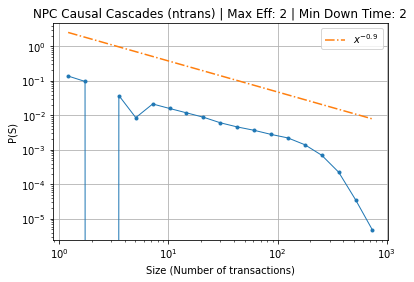

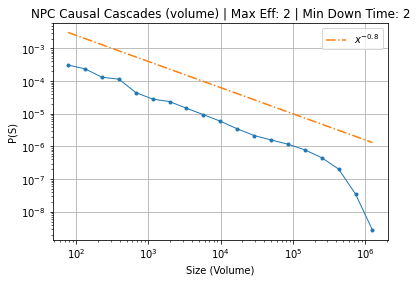

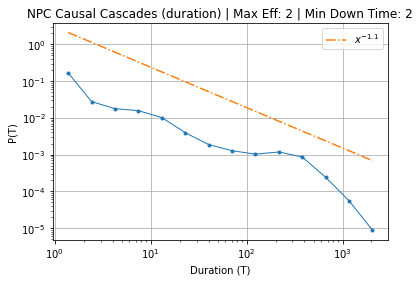

In [19]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9)*3, '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8)/10, '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*3, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

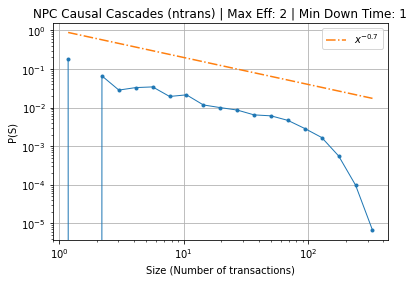

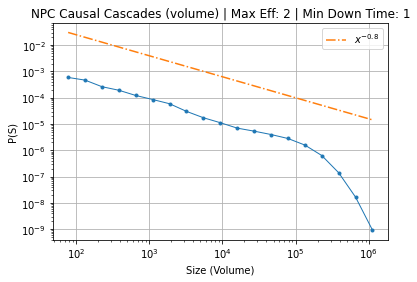

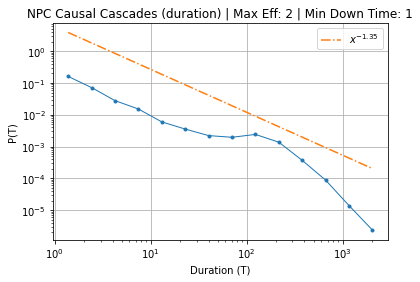

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

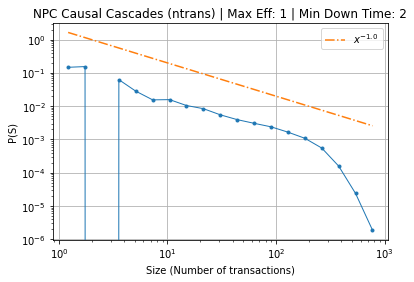

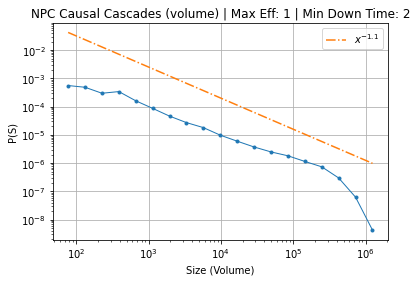

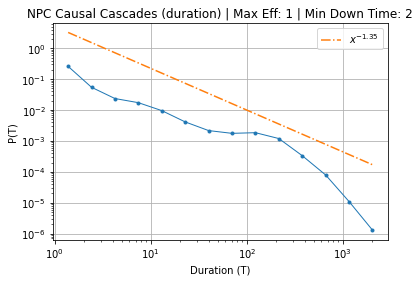

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

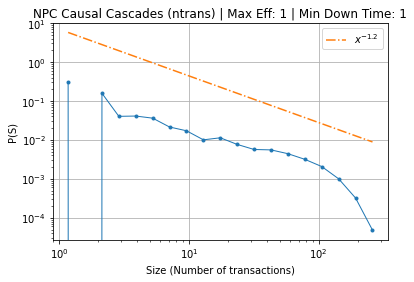

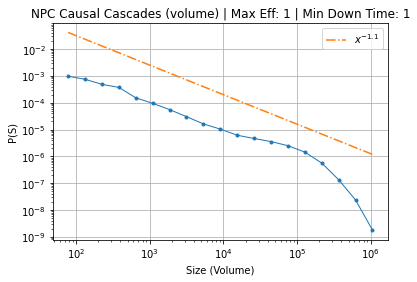

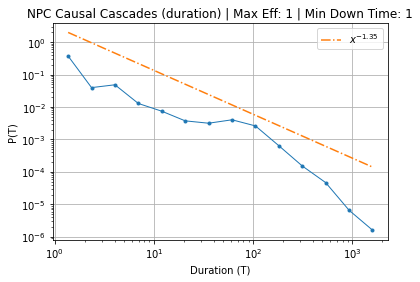

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

Unnamed: 0  time portfolio  stock  order
41                9   993     zjwdk     51   -2.0
69                2   993     ztnkc     15    1.0
70                4   993     ztnkc     60   -1.0
71                7   993     ztnkc     95   -1.0
262               3   993     zdmkf     98    9.0
...             ...   ...       ...    ...    ...
7088500           2  8192     gnqpm     56  -25.0
7088501           3  8192     gnqpm     55   10.0
7088502           5  8192     gnqpm     79    2.0
7088503           6  8192     gnqpm     85   19.0
7088504           7  8192     gnqpm     76   21.0

[7056036 rows x 5 columns]

In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

Unnamed: 0  time portfolio  stock  order
2              2   993     gozxi      6   -1.0
3              6   993     gozxi     10    2.0
4              7   993     gozxi     11    1.0
5              9   993     gozxi     13   -1.0
6             10   993     gozxi     14   -2.0
...          ...   ...       ...    ...    ...
1081           7   993     zwjtq     55   -2.0
1082           0   993     myduz     56   14.0
1083           1   993     myduz     55  -18.0
1084           4   993     myduz     85   38.0
1085           6   993     myduz     74  -14.0

[1040 rows x 5 columns]